In [24]:
import requests 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from datetime import date

Importing numpy and pandas for analysis, with requests and bs4 for web scraping

Unfortunately it looks like steam has changed the way the site works... Can't directly parse data that is displayed on graph

In [42]:
url = 'https://steamcommunity.com/market/listings/570/DPC%202022%20Spring%20Lineage%20Treasure'
response = requests.get(url)
print(response.text)

<!DOCTYPE html>
<html class=" responsive" lang="en">
<head>
	<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">
			<meta name="viewport" content="width=device-width,initial-scale=1">
		<meta name="theme-color" content="#171a21">
		<title>Steam Community Market :: Listings for DPC 2022 Spring Lineage Treasure</title>
	<link rel="shortcut icon" href="/favicon.ico" type="image/x-icon">

	
	
	<link href="https://community.cloudflare.steamstatic.com/public/shared/css/motiva_sans.css?v=GfSjbGKcNYaQ&amp;l=english&amp;_cdn=cloudflare" rel="stylesheet" type="text/css" >
<link href="https://community.cloudflare.steamstatic.com/public/shared/css/buttons.css?v=uR_4hRD_HUln&amp;l=english&amp;_cdn=cloudflare" rel="stylesheet" type="text/css" >
<link href="https://community.cloudflare.steamstatic.com/public/shared/css/shared_global.css?v=RRnIJ7AgzdY7&amp;l=english&amp;_cdn=cloudflare" rel="stylesheet" type="text/css" >
<link href="https://community.cloudflare.steamstatic.com/public/c

In [40]:
soup = BeautifulSoup(response.text, 'html.parser')
# soup.prettify()
title = soup.find(id="pricehistory", recursive=True)
title.prettify()
# # data = title.find(class_='jqplot-base-canvas')
# print(title)
# print(soup.text)

'<div id="pricehistory">\n</div>\n'

However, I can take an image of the graph and then extract the plot using: https://apps.automeris.io/wpd/

In [33]:
data_from_graph_pic = pd.read_csv("RighteousThunderbolt.csv",names=['Date','Price'] )
data_from_graph_pic['Date'] = pd.to_datetime(data_from_graph_pic['Date'])
print(type(data_from_graph_pic['Date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,Date,Price
0,2015-09-09,6.647637
1,2015-09-05,6.057201
2,2015-09-08,5.649929
3,2015-09-08,5.205845
4,2015-09-17,7.215285
...,...,...
337,2022-04-28,10.327941
338,2022-04-29,11.711457
339,2022-04-29,11.254608
340,2022-05-01,10.810730


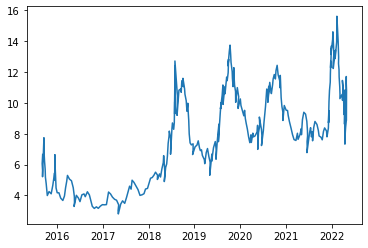

In [35]:
display(data_from_graph_pic)
plt.plot(data_from_graph_pic['Date'],data_from_graph_pic['Price']);

Alternatively I can extract the data from the javascript on the website by copying it directly. 

In [43]:
test_righteous_thunderbolt = [["Sep 01 2015 01: +0",5.692,"518"],["Sep 02 2015 01: +0",6.599,"173"],["Sep 03 2015 01: +0",6.439,"153"],["Sep 04 2015 01: +0",6.287,"169"],["Sep 05 2015 01: +0",6.444,"169"],["Sep 06 2015 01: +0",6.464,"152"],["Sep 07 2015 01: +0",6.173,"108"],["Sep 08 2015 01: +0",5.171,"141"],["Sep 09 2015 01: +0",4.925,"179"],["Sep 10 2015 01: +0",6.132,"141"],["Sep 11 2015 01: +0",6.429,"94"],["Sep 12 2015 01: +0",7.313,"91"],["Sep 13 2015 01: +0",7.259,"81"],["Sep 14 2015 01: +0",7.042,"69"],["Sep 15 2015 01: +0",6.708,"61"],["Sep 16 2015 01: +0",6.857,"66"],["Sep 17 2015 01: +0",6.836,"51"],["Sep 18 2015 01: +0",7.229,"57"],["Sep 19 2015 01: +0",7.174,"61"],["Sep 20 2015 01: +0",7.789,"64"],["Sep 21 2015 01: +0",7.624,"39"],["Sep 22 2015 01: +0",6.848,"47"],["Sep 23 2015 01: +0",6.342,"58"],["Sep 24 2015 01: +0",6.166,"52"],["Sep 25 2015 01: +0",6.207,"57"],["Sep 26 2015 01: +0",6.029,"87"],["Sep 27 2015 01: +0",5.792,"74"],["Sep 28 2015 01: +0",5.665,"62"],["Sep 29 2015 01: +0",5.79,"60"],["Sep 30 2015 01: +0",5.202,"86"],["Oct 01 2015 01: +0",4.94,"72"],["Oct 02 2015 01: +0",5.51,"75"],["Oct 03 2015 01: +0",5.615,"69"],["Oct 04 2015 01: +0",5.191,"74"],["Oct 05 2015 01: +0",4.891,"53"],["Oct 06 2015 01: +0",4.709,"59"],["Oct 07 2015 01: +0",4.545,"64"],["Oct 08 2015 01: +0",4.682,"56"],["Oct 09 2015 01: +0",4.772,"65"],["Oct 10 2015 01: +0",3.892,"121"],["Oct 11 2015 01: +0",3.86,"111"],["Oct 12 2015 01: +0",3.807,"98"],["Oct 13 2015 01: +0",4.119,"72"],["Oct 14 2015 01: +0",4.048,"65"],["Oct 15 2015 01: +0",4,"88"],["Oct 16 2015 01: +0",4.085,"90"],["Oct 17 2015 01: +0",4.174,"136"],["Oct 18 2015 01: +0",4.266,"91"],["Oct 19 2015 01: +0",4.234,"90"],["Oct 20 2015 01: +0",4.269,"96"],["Oct 21 2015 01: +0",4.32,"71"],["Oct 22 2015 01: +0",4.375,"46"],["Oct 23 2015 01: +0",4.07,"79"],["Oct 24 2015 01: +0",4.182,"112"],["Oct 25 2015 01: +0",4.16,"93"],["Oct 26 2015 01: +0",4.085,"88"],["Oct 27 2015 01: +0",4.222,"72"],["Oct 28 2015 01: +0",4.281,"59"],["Oct 29 2015 01: +0",4.224,"64"],["Oct 30 2015 01: +0",4.195,"76"],["Oct 31 2015 01: +0",4.168,"106"],["Nov 01 2015 01: +0",3.979,"88"],["Nov 02 2015 01: +0",4.021,"87"],["Nov 03 2015 01: +0",4.086,"73"],["Nov 04 2015 01: +0",4.107,"86"],["Nov 05 2015 01: +0",4.127,"66"],["Nov 06 2015 01: +0",4.234,"78"],["Nov 07 2015 01: +0",4.124,"81"],["Nov 08 2015 01: +0",4.159,"70"],["Nov 09 2015 01: +0",4.014,"88"],["Nov 10 2015 01: +0",3.98,"60"],["Nov 11 2015 01: +0",3.953,"75"],["Nov 12 2015 01: +0",3.776,"82"],["Nov 13 2015 01: +0",3.882,"74"],["Nov 14 2015 01: +0",3.865,"83"],["Nov 15 2015 01: +0",3.865,"81"],["Nov 16 2015 01: +0",3.825,"61"],["Nov 17 2015 01: +0",3.779,"72"],["Nov 18 2015 01: +0",3.835,"131"],["Nov 19 2015 01: +0",3.944,"107"],["Nov 20 2015 01: +0",4.146,"86"],["Nov 21 2015 01: +0",4.403,"73"],["Nov 22 2015 01: +0",4.476,"70"],["Nov 23 2015 01: +0",4.441,"65"],["Nov 24 2015 01: +0",4.716,"73"],["Nov 25 2015 01: +0",4.753,"59"],["Nov 26 2015 01: +0",4.694,"55"],["Nov 27 2015 01: +0",4.556,"87"],["Nov 28 2015 01: +0",4.651,"75"],["Nov 29 2015 01: +0",4.707,"61"],["Nov 30 2015 01: +0",4.444,"56"],["Dec 01 2015 01: +0",4.4,"55"],["Dec 02 2015 01: +0",4.56,"46"],["Dec 03 2015 01: +0",4.585,"53"],["Dec 04 2015 01: +0",4.55,"46"],["Dec 05 2015 01: +0",4.689,"80"],["Dec 06 2015 01: +0",4.828,"80"],["Dec 07 2015 01: +0",4.861,"62"],["Dec 08 2015 01: +0",4.841,"47"],["Dec 09 2015 01: +0",4.826,"55"],["Dec 10 2015 01: +0",5.263,"49"],["Dec 11 2015 01: +0",5.594,"52"],["Dec 12 2015 01: +0",5.735,"50"],["Dec 13 2015 01: +0",5.847,"53"],["Dec 14 2015 01: +0",5.669,"35"],["Dec 15 2015 01: +0",5.721,"87"],["Dec 16 2015 01: +0",6.799,"486"],["Dec 17 2015 01: +0",5.694,"943"],["Dec 18 2015 01: +0",4.975,"557"],["Dec 19 2015 01: +0",5.042,"364"],["Dec 20 2015 01: +0",5.062,"260"],["Dec 21 2015 01: +0",4.832,"241"],["Dec 22 2015 01: +0",4.792,"223"],["Dec 23 2015 01: +0",4.31,"227"],["Dec 24 2015 01: +0",4.313,"196"],["Dec 25 2015 01: +0",4.464,"204"],["Dec 26 2015 01: +0",4.335,"221"],["Dec 27 2015 01: +0",4.172,"208"],["Dec 28 2015 01: +0",4.167,"205"],["Dec 29 2015 01: +0",4.18,"226"],["Dec 30 2015 01: +0",4.255,"172"],["Dec 31 2015 01: +0",4.386,"167"],["Jan 01 2016 01: +0",4.285,"149"],["Jan 02 2016 01: +0",4.2,"181"],["Jan 03 2016 01: +0",4.148,"147"],["Jan 04 2016 01: +0",3.981,"149"],["Jan 05 2016 01: +0",4.003,"120"],["Jan 06 2016 01: +0",4.065,"109"],["Jan 07 2016 01: +0",4.023,"107"],["Jan 08 2016 01: +0",4.039,"137"],["Jan 09 2016 01: +0",4.03,"146"],["Jan 10 2016 01: +0",4.045,"142"],["Jan 11 2016 01: +0",4.035,"119"],["Jan 12 2016 01: +0",4.119,"109"],["Jan 13 2016 01: +0",4.059,"104"],["Jan 14 2016 01: +0",4.044,"101"],["Jan 15 2016 01: +0",4.05,"111"],["Jan 16 2016 01: +0",4.03,"148"],["Jan 17 2016 01: +0",4.097,"148"],["Jan 18 2016 01: +0",4.033,"120"],["Jan 19 2016 01: +0",4.046,"95"],["Jan 20 2016 01: +0",4.022,"74"],["Jan 21 2016 01: +0",4.054,"95"],["Jan 22 2016 01: +0",4.05,"98"],["Jan 23 2016 01: +0",4.074,"108"],["Jan 24 2016 01: +0",4.045,"96"],["Jan 25 2016 01: +0",4.052,"99"],["Jan 26 2016 01: +0",4.094,"93"],["Jan 27 2016 01: +0",3.964,"91"],["Jan 28 2016 01: +0",3.522,"116"],["Jan 29 2016 01: +0",3.809,"113"],["Jan 30 2016 01: +0",3.916,"99"],["Jan 31 2016 01: +0",3.846,"88"],["Feb 01 2016 01: +0",3.792,"70"],["Feb 02 2016 01: +0",3.811,"80"],["Feb 03 2016 01: +0",3.738,"77"],["Feb 04 2016 01: +0",3.643,"89"],["Feb 05 2016 01: +0",3.737,"86"],["Feb 06 2016 01: +0",3.633,"99"],["Feb 07 2016 01: +0",3.621,"99"],["Feb 08 2016 01: +0",3.714,"77"],["Feb 09 2016 01: +0",3.581,"64"],["Feb 10 2016 01: +0",3.644,"67"],["Feb 11 2016 01: +0",3.585,"76"],["Feb 12 2016 01: +0",3.529,"104"],["Feb 13 2016 01: +0",3.527,"123"],["Feb 14 2016 01: +0",3.49,"102"],["Feb 15 2016 01: +0",3.514,"122"],["Feb 16 2016 01: +0",3.607,"92"],["Feb 17 2016 01: +0",3.628,"82"],["Feb 18 2016 01: +0",3.502,"82"],["Feb 19 2016 01: +0",3.48,"94"],["Feb 20 2016 01: +0",3.456,"103"],["Feb 21 2016 01: +0",3.517,"117"],["Feb 22 2016 01: +0",3.545,"99"],["Feb 23 2016 01: +0",3.527,"117"],["Feb 24 2016 01: +0",3.553,"102"],["Feb 25 2016 01: +0",3.53,"90"],["Feb 26 2016 01: +0",3.583,"126"],["Feb 27 2016 01: +0",3.623,"125"],["Feb 28 2016 01: +0",3.718,"141"],["Feb 29 2016 01: +0",3.813,"95"],["Mar 01 2016 01: +0",3.772,"104"],["Mar 02 2016 01: +0",3.759,"104"],["Mar 03 2016 01: +0",3.827,"127"],["Mar 04 2016 01: +0",3.924,"131"],["Mar 05 2016 01: +0",4.156,"94"],["Mar 06 2016 01: +0",4.355,"99"],["Mar 07 2016 01: +0",4.41,"78"],["Mar 08 2016 01: +0",4.322,"75"],["Mar 09 2016 01: +0",4.428,"68"],["Mar 10 2016 01: +0",4.415,"77"],["Mar 11 2016 01: +0",4.444,"68"],["Mar 12 2016 01: +0",4.463,"78"],["Mar 13 2016 01: +0",4.438,"88"],["Mar 14 2016 01: +0",4.427,"79"],["Mar 15 2016 01: +0",4.551,"84"],["Mar 16 2016 01: +0",4.52,"67"],["Mar 17 2016 01: +0",4.486,"68"],["Mar 18 2016 01: +0",4.623,"102"],["Mar 19 2016 01: +0",5.109,"66"],["Mar 20 2016 01: +0",5.212,"61"],["Mar 21 2016 01: +0",5.223,"45"],["Mar 22 2016 01: +0",4.962,"65"],["Mar 23 2016 01: +0",5.158,"56"],["Mar 24 2016 01: +0",5.38,"55"],["Mar 25 2016 01: +0",5.326,"81"],["Mar 26 2016 01: +0",5.291,"65"],["Mar 27 2016 01: +0",5.298,"71"],["Mar 28 2016 01: +0",5.21,"68"],["Mar 29 2016 01: +0",5.29,"50"],["Mar 30 2016 01: +0",5.123,"58"],["Mar 31 2016 01: +0",5.2,"41"],["Apr 01 2016 01: +0",5.197,"59"],["Apr 02 2016 01: +0",5.136,"75"],["Apr 03 2016 01: +0",4.97,"60"],["Apr 04 2016 01: +0",5.049,"78"],["Apr 05 2016 01: +0",5.096,"58"],["Apr 06 2016 01: +0",4.988,"72"],["Apr 07 2016 01: +0",4.931,"66"],["Apr 08 2016 01: +0",4.954,"70"],["Apr 09 2016 01: +0",4.99,"72"],["Apr 10 2016 01: +0",4.984,"102"],["Apr 11 2016 01: +0",4.878,"68"],["Apr 12 2016 01: +0",4.885,"68"],["Apr 13 2016 01: +0",4.822,"58"],["Apr 14 2016 01: +0",4.842,"72"],["Apr 15 2016 01: +0",4.966,"65"],["Apr 16 2016 01: +0",4.964,"66"],["Apr 17 2016 01: +0",4.915,"76"],["Apr 18 2016 01: +0",4.973,"71"],["Apr 19 2016 01: +0",4.861,"60"],["Apr 20 2016 01: +0",4.918,"71"],["Apr 21 2016 01: +0",4.965,"66"],["Apr 22 2016 01: +0",4.872,"66"],["Apr 23 2016 01: +0",4.849,"78"],["Apr 24 2016 01: +0",5.042,"82"],["Apr 25 2016 01: +0",5.066,"53"],["Apr 26 2016 01: +0",4.884,"50"],["Apr 27 2016 01: +0",4.792,"43"],["Apr 28 2016 01: +0",4.792,"66"],["Apr 29 2016 01: +0",4.814,"61"],["Apr 30 2016 01: +0",4.848,"65"],["May 01 2016 01: +0",4.809,"57"],["May 02 2016 01: +0",4.789,"51"],["May 03 2016 01: +0",4.783,"57"],["May 04 2016 01: +0",4.628,"36"],["May 05 2016 01: +0",4.487,"55"],["May 06 2016 01: +0",4.633,"52"],["May 07 2016 01: +0",4.675,"55"],["May 08 2016 01: +0",4.583,"41"],["May 09 2016 01: +0",4.632,"56"],["May 10 2016 01: +0",4.539,"55"],["May 11 2016 01: +0",4.542,"40"],["May 12 2016 01: +0",4.4,"48"],["May 13 2016 01: +0",4.305,"46"],["May 14 2016 01: +0",4.395,"68"],["May 15 2016 01: +0",4.354,"61"],["May 16 2016 01: +0",4.147,"51"],["May 17 2016 01: +0",3.202,"121"],["May 18 2016 01: +0",3.645,"86"],["May 19 2016 01: +0",3.712,"54"],["May 20 2016 01: +0",3.723,"59"],["May 21 2016 01: +0",3.817,"67"],["May 22 2016 01: +0",3.775,"62"],["May 23 2016 01: +0",3.608,"53"],["May 24 2016 01: +0",3.472,"48"],["May 25 2016 01: +0",3.412,"62"],["May 26 2016 01: +0",3.457,"62"],["May 27 2016 01: +0",3.73,"75"],["May 28 2016 01: +0",3.894,"50"],["May 29 2016 01: +0",4.072,"38"],["May 30 2016 01: +0",3.985,"61"],["May 31 2016 01: +0",3.97,"54"],["Jun 01 2016 01: +0",3.767,"41"],["Jun 02 2016 01: +0",3.741,"60"],["Jun 03 2016 01: +0",3.69,"78"],["Jun 04 2016 01: +0",3.848,"234"],["Jun 05 2016 01: +0",4.119,"136"],["Jun 06 2016 01: +0",4.014,"91"],["Jun 07 2016 01: +0",4.11,"54"],["Jun 08 2016 01: +0",3.96,"59"],["Jun 09 2016 01: +0",3.931,"90"],["Jun 10 2016 01: +0",3.9,"89"],["Jun 11 2016 01: +0",4.007,"80"],["Jun 12 2016 01: +0",3.948,"87"],["Jun 13 2016 01: +0",3.907,"93"],["Jun 14 2016 01: +0",3.907,"56"],["Jun 15 2016 01: +0",3.855,"76"],["Jun 16 2016 01: +0",3.818,"71"],["Jun 17 2016 01: +0",3.777,"92"],["Jun 18 2016 01: +0",3.684,"80"],["Jun 19 2016 01: +0",3.713,"80"],["Jun 20 2016 01: +0",3.702,"78"],["Jun 21 2016 01: +0",3.673,"73"],["Jun 22 2016 01: +0",3.729,"89"],["Jun 23 2016 01: +0",3.718,"48"],["Jun 24 2016 01: +0",3.62,"77"],["Jun 25 2016 01: +0",3.808,"87"],["Jun 26 2016 01: +0",3.706,"67"],["Jun 27 2016 01: +0",3.707,"67"],["Jun 28 2016 01: +0",3.649,"66"],["Jun 29 2016 01: +0",3.663,"65"],["Jun 30 2016 01: +0",3.502,"77"],["Jul 01 2016 01: +0",3.39,"91"],["Jul 02 2016 01: +0",3.366,"91"],["Jul 03 2016 01: +0",3.346,"73"],["Jul 04 2016 01: +0",3.358,"86"],["Jul 05 2016 01: +0",3.469,"80"],["Jul 06 2016 01: +0",3.524,"85"],["Jul 07 2016 01: +0",3.688,"76"],["Jul 08 2016 01: +0",3.722,"68"],["Jul 09 2016 01: +0",3.742,"85"],["Jul 10 2016 01: +0",3.656,"67"],["Jul 11 2016 01: +0",3.777,"69"],["Jul 12 2016 01: +0",3.806,"58"],["Jul 13 2016 01: +0",3.809,"70"],["Jul 14 2016 01: +0",3.751,"63"],["Jul 15 2016 01: +0",3.792,"70"],["Jul 16 2016 01: +0",3.857,"79"],["Jul 17 2016 01: +0",3.96,"77"],["Jul 18 2016 01: +0",4.121,"62"],["Jul 19 2016 01: +0",4.104,"38"],["Jul 20 2016 01: +0",4.032,"73"],["Jul 21 2016 01: +0",3.967,"51"],["Jul 22 2016 01: +0",4.011,"59"],["Jul 23 2016 01: +0",3.962,"51"],["Jul 24 2016 01: +0",3.974,"56"],["Jul 25 2016 01: +0",3.881,"66"],["Jul 26 2016 01: +0",3.985,"55"],["Jul 27 2016 01: +0",4.013,"62"],["Jul 28 2016 01: +0",3.955,"57"],["Jul 29 2016 01: +0",3.985,"67"],["Jul 30 2016 01: +0",4.014,"56"],["Jul 31 2016 01: +0",4.211,"58"],["Aug 01 2016 01: +0",4.087,"55"],["Aug 02 2016 01: +0",4.141,"52"],["Aug 03 2016 01: +0",4.131,"46"],["Aug 04 2016 01: +0",4.117,"54"],["Aug 05 2016 01: +0",4.123,"70"],["Aug 06 2016 01: +0",4.014,"68"],["Aug 07 2016 01: +0",4.055,"50"],["Aug 08 2016 01: +0",3.853,"42"],["Aug 09 2016 01: +0",3.851,"52"],["Aug 10 2016 01: +0",3.786,"58"],["Aug 11 2016 01: +0",3.694,"66"],["Aug 12 2016 01: +0",3.773,"58"],["Aug 13 2016 01: +0",3.825,"71"],["Aug 14 2016 01: +0",3.621,"77"],["Aug 15 2016 01: +0",4.021,"66"],["Aug 16 2016 01: +0",3.937,"67"],["Aug 17 2016 01: +0",3.959,"82"],["Aug 18 2016 01: +0",3.912,"70"],["Aug 19 2016 01: +0",3.936,"64"],["Aug 20 2016 01: +0",3.952,"66"],["Aug 21 2016 01: +0",3.975,"76"],["Aug 22 2016 01: +0",3.961,"71"],["Aug 23 2016 01: +0",3.995,"53"],["Aug 24 2016 01: +0",3.996,"71"],["Aug 25 2016 01: +0",3.977,"71"],["Aug 26 2016 01: +0",3.939,"52"],["Aug 27 2016 01: +0",3.992,"73"],["Aug 28 2016 01: +0",4.14,"65"],["Aug 29 2016 01: +0",4.224,"62"],["Aug 30 2016 01: +0",4.138,"53"],["Aug 31 2016 01: +0",4.26,"112"],["Sep 01 2016 01: +0",4.252,"72"],["Sep 02 2016 01: +0",4.21,"74"],["Sep 03 2016 01: +0",4.174,"71"],["Sep 04 2016 01: +0",4.197,"60"],["Sep 05 2016 01: +0",4.142,"58"],["Sep 06 2016 01: +0",4.145,"52"],["Sep 07 2016 01: +0",4.039,"40"],["Sep 08 2016 01: +0",4.047,"52"],["Sep 09 2016 01: +0",4.056,"68"],["Sep 10 2016 01: +0",4.07,"61"],["Sep 11 2016 01: +0",4.007,"51"],["Sep 12 2016 01: +0",4.002,"57"],["Sep 13 2016 01: +0",4.017,"43"],["Sep 14 2016 01: +0",4.03,"46"],["Sep 15 2016 01: +0",4.02,"58"],["Sep 16 2016 01: +0",4.05,"61"],["Sep 17 2016 01: +0",3.979,"59"],["Sep 18 2016 01: +0",3.94,"61"],["Sep 19 2016 01: +0",3.79,"52"],["Sep 20 2016 01: +0",3.868,"62"],["Sep 21 2016 01: +0",3.855,"46"],["Sep 22 2016 01: +0",3.776,"44"],["Sep 23 2016 01: +0",3.815,"67"],["Sep 24 2016 01: +0",3.734,"66"],["Sep 25 2016 01: +0",3.614,"53"],["Sep 26 2016 01: +0",3.687,"57"],["Sep 27 2016 01: +0",3.609,"76"],["Sep 28 2016 01: +0",3.522,"44"],["Sep 29 2016 01: +0",3.501,"57"],["Sep 30 2016 01: +0",3.364,"53"],["Oct 01 2016 01: +0",3.427,"88"],["Oct 02 2016 01: +0",3.678,"64"],["Oct 03 2016 01: +0",3.567,"45"],["Oct 04 2016 01: +0",3.435,"55"],["Oct 05 2016 01: +0",3.297,"69"],["Oct 06 2016 01: +0",3.184,"79"],["Oct 07 2016 01: +0",3.145,"72"],["Oct 08 2016 01: +0",3.282,"65"],["Oct 09 2016 01: +0",3.358,"72"],["Oct 10 2016 01: +0",3.305,"65"],["Oct 11 2016 01: +0",3.183,"63"],["Oct 12 2016 01: +0",3.107,"60"],["Oct 13 2016 01: +0",3.12,"61"],["Oct 14 2016 01: +0",3.046,"77"],["Oct 15 2016 01: +0",3.043,"83"],["Oct 16 2016 01: +0",3.026,"91"],["Oct 17 2016 01: +0",3.128,"66"],["Oct 18 2016 01: +0",3.172,"64"],["Oct 19 2016 01: +0",3.121,"82"],["Oct 20 2016 01: +0",3.041,"80"],["Oct 21 2016 01: +0",3.005,"67"],["Oct 22 2016 01: +0",3,"100"],["Oct 23 2016 01: +0",3.056,"80"],["Oct 24 2016 01: +0",3.044,"67"],["Oct 25 2016 01: +0",3.058,"62"],["Oct 26 2016 01: +0",2.99,"73"],["Oct 27 2016 01: +0",2.921,"71"],["Oct 28 2016 01: +0",2.928,"88"],["Oct 29 2016 01: +0",2.914,"77"],["Oct 30 2016 01: +0",3.016,"65"],["Oct 31 2016 01: +0",2.954,"66"],["Nov 01 2016 01: +0",3.01,"53"],["Nov 02 2016 01: +0",3.178,"54"],["Nov 03 2016 01: +0",3.094,"53"],["Nov 04 2016 01: +0",3.118,"58"],["Nov 05 2016 01: +0",3.087,"86"],["Nov 06 2016 01: +0",3.039,"76"],["Nov 07 2016 01: +0",3.034,"82"],["Nov 08 2016 01: +0",3.051,"76"],["Nov 09 2016 01: +0",3.09,"66"],["Nov 10 2016 01: +0",3.047,"68"],["Nov 11 2016 01: +0",3.027,"79"],["Nov 12 2016 01: +0",3.169,"82"],["Nov 13 2016 01: +0",3.27,"78"],["Nov 14 2016 01: +0",3.298,"65"],["Nov 15 2016 01: +0",3.289,"41"],["Nov 16 2016 01: +0",3.202,"49"],["Nov 17 2016 01: +0",3.134,"58"],["Nov 18 2016 01: +0",3.069,"78"],["Nov 19 2016 01: +0",3.2,"66"],["Nov 20 2016 01: +0",3.263,"59"],["Nov 21 2016 01: +0",3.196,"59"],["Nov 22 2016 01: +0",3.294,"59"],["Nov 23 2016 01: +0",3.196,"48"],["Nov 24 2016 01: +0",3,"59"],["Nov 25 2016 01: +0",2.945,"73"],["Nov 26 2016 01: +0",2.935,"85"],["Nov 27 2016 01: +0",2.996,"68"],["Nov 28 2016 01: +0",2.912,"63"],["Nov 29 2016 01: +0",2.999,"53"],["Nov 30 2016 01: +0",3.048,"67"],["Dec 01 2016 01: +0",3.111,"56"],["Dec 02 2016 01: +0",2.969,"65"],["Dec 03 2016 01: +0",2.93,"79"],["Dec 04 2016 01: +0",3.036,"75"],["Dec 05 2016 01: +0",3.04,"51"],["Dec 06 2016 01: +0",3.014,"70"],["Dec 07 2016 01: +0",3.008,"47"],["Dec 08 2016 01: +0",2.963,"60"],["Dec 09 2016 01: +0",3.102,"65"],["Dec 10 2016 01: +0",3.308,"71"],["Dec 11 2016 01: +0",3.23,"70"],["Dec 12 2016 01: +0",3.151,"56"],["Dec 13 2016 01: +0",3.216,"114"],["Dec 14 2016 01: +0",3.225,"99"],["Dec 15 2016 01: +0",3.224,"92"],["Dec 16 2016 01: +0",3.268,"102"],["Dec 17 2016 01: +0",3.367,"113"],["Dec 18 2016 01: +0",3.554,"102"],["Dec 19 2016 01: +0",3.4,"80"],["Dec 20 2016 01: +0",3.32,"75"],["Dec 21 2016 01: +0",3.226,"87"],["Dec 22 2016 01: +0",3.13,"88"],["Dec 23 2016 01: +0",3.067,"78"],["Dec 24 2016 01: +0",3.193,"99"],["Dec 25 2016 01: +0",3.319,"99"],["Dec 26 2016 01: +0",3.311,"98"],["Dec 27 2016 01: +0",3.308,"88"],["Dec 28 2016 01: +0",3.213,"82"],["Dec 29 2016 01: +0",3.163,"97"],["Dec 30 2016 01: +0",3.27,"85"],["Dec 31 2016 01: +0",3.351,"80"],["Jan 01 2017 01: +0",3.532,"85"],["Jan 02 2017 01: +0",3.341,"95"],["Jan 03 2017 01: +0",3.285,"101"],["Jan 04 2017 01: +0",3.271,"97"],["Jan 05 2017 01: +0",3.294,"92"],["Jan 06 2017 01: +0",3.302,"78"],["Jan 07 2017 01: +0",3.469,"99"],["Jan 08 2017 01: +0",3.5,"73"],["Jan 09 2017 01: +0",3.237,"71"],["Jan 10 2017 01: +0",3.221,"68"],["Jan 11 2017 01: +0",3.236,"72"],["Jan 12 2017 01: +0",3.169,"78"],["Jan 13 2017 01: +0",3.283,"84"],["Jan 14 2017 01: +0",3.399,"89"],["Jan 15 2017 01: +0",3.422,"84"],["Jan 16 2017 01: +0",3.292,"73"],["Jan 17 2017 01: +0",3.261,"87"],["Jan 18 2017 01: +0",3.166,"71"],["Jan 19 2017 01: +0",3.182,"66"],["Jan 20 2017 01: +0",3.196,"73"],["Jan 21 2017 01: +0",3.31,"91"],["Jan 22 2017 01: +0",3.307,"72"],["Jan 23 2017 01: +0",3.242,"77"],["Jan 24 2017 01: +0",3.233,"52"],["Jan 25 2017 01: +0",3.224,"81"],["Jan 26 2017 01: +0",3.243,"79"],["Jan 27 2017 01: +0",3.06,"116"],["Jan 28 2017 01: +0",3.062,"89"],["Jan 29 2017 01: +0",3.168,"84"],["Jan 30 2017 01: +0",3.251,"79"],["Jan 31 2017 01: +0",3.391,"82"],["Feb 01 2017 01: +0",3.334,"71"],["Feb 02 2017 01: +0",3.43,"77"],["Feb 03 2017 01: +0",3.391,"101"],["Feb 04 2017 01: +0",3.464,"134"],["Feb 05 2017 01: +0",3.567,"108"],["Feb 06 2017 01: +0",3.505,"112"],["Feb 07 2017 01: +0",3.506,"104"],["Feb 08 2017 01: +0",3.62,"95"],["Feb 09 2017 01: +0",3.676,"82"],["Feb 10 2017 01: +0",3.735,"91"],["Feb 11 2017 01: +0",3.866,"90"],["Feb 12 2017 01: +0",4.086,"103"],["Feb 13 2017 01: +0",4.136,"85"],["Feb 14 2017 01: +0",4.055,"61"],["Feb 15 2017 01: +0",4.173,"87"],["Feb 16 2017 01: +0",4.192,"78"],["Feb 17 2017 01: +0",4.169,"97"],["Feb 18 2017 01: +0",4.224,"97"],["Feb 19 2017 01: +0",4.207,"100"],["Feb 20 2017 01: +0",4.227,"86"],["Feb 21 2017 01: +0",4.17,"85"],["Feb 22 2017 01: +0",4.125,"87"],["Feb 23 2017 01: +0",4.113,"80"],["Feb 24 2017 01: +0",4.093,"109"],["Feb 25 2017 01: +0",4.085,"110"],["Feb 26 2017 01: +0",4.044,"115"],["Feb 27 2017 01: +0",4.072,"95"],["Feb 28 2017 01: +0",4.071,"86"],["Mar 01 2017 01: +0",3.995,"78"],["Mar 02 2017 01: +0",3.96,"93"],["Mar 03 2017 01: +0",4.001,"101"],["Mar 04 2017 01: +0",3.982,"99"],["Mar 05 2017 01: +0",4.039,"122"],["Mar 06 2017 01: +0",4.063,"111"],["Mar 07 2017 01: +0",4.089,"80"],["Mar 08 2017 01: +0",4.003,"73"],["Mar 09 2017 01: +0",3.909,"90"],["Mar 10 2017 01: +0",3.835,"98"],["Mar 11 2017 01: +0",3.823,"132"],["Mar 12 2017 01: +0",3.95,"139"],["Mar 13 2017 01: +0",3.942,"69"],["Mar 14 2017 01: +0",3.952,"87"],["Mar 15 2017 01: +0",3.924,"79"],["Mar 16 2017 01: +0",3.673,"106"],["Mar 17 2017 01: +0",3.822,"110"],["Mar 18 2017 01: +0",3.851,"123"],["Mar 19 2017 01: +0",3.933,"114"],["Mar 20 2017 01: +0",3.935,"82"],["Mar 21 2017 01: +0",3.931,"85"],["Mar 22 2017 01: +0",3.882,"106"],["Mar 23 2017 01: +0",3.886,"106"],["Mar 24 2017 01: +0",3.813,"94"],["Mar 25 2017 01: +0",3.755,"130"],["Mar 26 2017 01: +0",3.677,"133"],["Mar 27 2017 01: +0",3.63,"94"],["Mar 28 2017 01: +0",3.718,"93"],["Mar 29 2017 01: +0",3.765,"78"],["Mar 30 2017 01: +0",3.74,"93"],["Mar 31 2017 01: +0",3.733,"97"],["Apr 01 2017 01: +0",3.685,"119"],["Apr 02 2017 01: +0",3.692,"129"],["Apr 03 2017 01: +0",3.654,"78"],["Apr 04 2017 01: +0",3.628,"81"],["Apr 05 2017 01: +0",3.626,"84"],["Apr 06 2017 01: +0",3.566,"75"],["Apr 07 2017 01: +0",3.584,"95"],["Apr 08 2017 01: +0",3.556,"100"],["Apr 09 2017 01: +0",3.608,"114"],["Apr 10 2017 01: +0",3.619,"101"],["Apr 11 2017 01: +0",3.61,"109"],["Apr 12 2017 01: +0",3.615,"88"],["Apr 13 2017 01: +0",3.615,"98"],["Apr 14 2017 01: +0",3.66,"88"],["Apr 15 2017 01: +0",3.589,"112"],["Apr 16 2017 01: +0",3.67,"97"],["Apr 17 2017 01: +0",3.76,"84"],["Apr 18 2017 01: +0",3.67,"80"],["Apr 19 2017 01: +0",3.582,"85"],["Apr 20 2017 01: +0",3.456,"122"],["Apr 21 2017 01: +0",3.529,"139"],["Apr 22 2017 01: +0",3.512,"117"],["Apr 23 2017 01: +0",3.549,"119"],["Apr 24 2017 01: +0",3.509,"101"],["Apr 25 2017 01: +0",3.516,"99"],["Apr 26 2017 01: +0",3.507,"78"],["Apr 27 2017 01: +0",3.524,"88"],["Apr 28 2017 01: +0",3.607,"90"],["Apr 29 2017 01: +0",3.568,"85"],["Apr 30 2017 01: +0",3.588,"110"],["May 01 2017 01: +0",3.571,"114"],["May 02 2017 01: +0",3.508,"101"],["May 03 2017 01: +0",3.462,"94"],["May 04 2017 01: +0",3.405,"92"],["May 05 2017 01: +0",2.712,"170"],["May 06 2017 01: +0",2.911,"129"],["May 07 2017 01: +0",3.19,"111"],["May 08 2017 01: +0",3.166,"98"],["May 09 2017 01: +0",3.131,"79"],["May 10 2017 01: +0",3.136,"110"],["May 11 2017 01: +0",3.256,"80"],["May 12 2017 01: +0",3.213,"119"],["May 13 2017 01: +0",3.143,"99"],["May 14 2017 01: +0",3.203,"120"],["May 15 2017 01: +0",3.193,"130"],["May 16 2017 01: +0",3.202,"117"],["May 17 2017 01: +0",3.196,"87"],["May 18 2017 01: +0",3.306,"91"],["May 19 2017 01: +0",3.445,"111"],["May 20 2017 01: +0",3.346,"122"],["May 21 2017 01: +0",3.329,"126"],["May 22 2017 01: +0",3.368,"99"],["May 23 2017 01: +0",3.354,"123"],["May 24 2017 01: +0",3.304,"107"],["May 25 2017 01: +0",3.319,"105"],["May 26 2017 01: +0",3.272,"95"],["May 27 2017 01: +0",3.179,"109"],["May 28 2017 01: +0",3.177,"100"],["May 29 2017 01: +0",3.237,"106"],["May 30 2017 01: +0",3.222,"98"],["May 31 2017 01: +0",3.249,"101"],["Jun 01 2017 01: +0",3.323,"116"],["Jun 02 2017 01: +0",3.407,"82"],["Jun 03 2017 01: +0",3.465,"77"],["Jun 04 2017 01: +0",3.572,"109"],["Jun 05 2017 01: +0",3.745,"96"],["Jun 06 2017 01: +0",3.729,"87"],["Jun 07 2017 01: +0",3.67,"89"],["Jun 08 2017 01: +0",3.606,"90"],["Jun 09 2017 01: +0",3.574,"97"],["Jun 10 2017 01: +0",3.561,"101"],["Jun 11 2017 01: +0",3.593,"114"],["Jun 12 2017 01: +0",3.611,"89"],["Jun 13 2017 01: +0",3.606,"88"],["Jun 14 2017 01: +0",3.557,"80"],["Jun 15 2017 01: +0",3.458,"79"],["Jun 16 2017 01: +0",3.432,"110"],["Jun 17 2017 01: +0",3.407,"105"],["Jun 18 2017 01: +0",3.405,"128"],["Jun 19 2017 01: +0",3.405,"103"],["Jun 20 2017 01: +0",3.376,"92"],["Jun 21 2017 01: +0",3.363,"102"],["Jun 22 2017 01: +0",3.209,"127"],["Jun 23 2017 01: +0",3.134,"116"],["Jun 24 2017 01: +0",3.242,"115"],["Jun 25 2017 01: +0",3.215,"102"],["Jun 26 2017 01: +0",3.258,"90"],["Jun 27 2017 01: +0",3.315,"85"],["Jun 28 2017 01: +0",3.405,"92"],["Jun 29 2017 01: +0",3.378,"104"],["Jun 30 2017 01: +0",3.43,"96"],["Jul 01 2017 01: +0",3.543,"96"],["Jul 02 2017 01: +0",3.53,"106"],["Jul 03 2017 01: +0",3.521,"90"],["Jul 04 2017 01: +0",3.545,"105"],["Jul 05 2017 01: +0",3.564,"99"],["Jul 06 2017 01: +0",3.59,"99"],["Jul 07 2017 01: +0",3.627,"71"],["Jul 08 2017 01: +0",3.698,"104"],["Jul 09 2017 01: +0",3.769,"109"],["Jul 10 2017 01: +0",3.948,"78"],["Jul 11 2017 01: +0",3.858,"87"],["Jul 12 2017 01: +0",3.861,"70"],["Jul 13 2017 01: +0",3.795,"78"],["Jul 14 2017 01: +0",3.715,"110"],["Jul 15 2017 01: +0",3.715,"134"],["Jul 16 2017 01: +0",3.787,"122"],["Jul 17 2017 01: +0",3.749,"104"],["Jul 18 2017 01: +0",3.776,"94"],["Jul 19 2017 01: +0",3.798,"103"],["Jul 20 2017 01: +0",3.903,"88"],["Jul 21 2017 01: +0",3.972,"77"],["Jul 22 2017 01: +0",3.981,"95"],["Jul 23 2017 01: +0",4.254,"78"],["Jul 24 2017 01: +0",4.254,"95"],["Jul 25 2017 01: +0",4.355,"78"],["Jul 26 2017 01: +0",4.402,"82"],["Jul 27 2017 01: +0",4.32,"111"],["Jul 28 2017 01: +0",4.324,"86"],["Jul 29 2017 01: +0",4.609,"107"],["Jul 30 2017 01: +0",4.644,"94"],["Jul 31 2017 01: +0",4.613,"81"],["Aug 01 2017 01: +0",4.539,"90"],["Aug 02 2017 01: +0",4.635,"79"],["Aug 03 2017 01: +0",4.656,"94"],["Aug 04 2017 01: +0",4.947,"88"],["Aug 05 2017 01: +0",4.699,"88"],["Aug 06 2017 01: +0",4.198,"105"],["Aug 07 2017 01: +0",4.174,"75"],["Aug 08 2017 01: +0",4.172,"80"],["Aug 09 2017 01: +0",4.124,"81"],["Aug 10 2017 01: +0",4.269,"76"],["Aug 11 2017 01: +0",4.161,"81"],["Aug 12 2017 01: +0",4.215,"104"],["Aug 13 2017 01: +0",4.09,"99"],["Aug 14 2017 01: +0",4.092,"103"],["Aug 15 2017 01: +0",4.113,"82"],["Aug 16 2017 01: +0",4.211,"96"],["Aug 17 2017 01: +0",4.256,"97"],["Aug 18 2017 01: +0",4.355,"99"],["Aug 19 2017 01: +0",4.539,"107"],["Aug 20 2017 01: +0",4.948,"97"],["Aug 21 2017 01: +0",5.023,"90"],["Aug 22 2017 01: +0",4.767,"89"],["Aug 23 2017 01: +0",4.978,"83"],["Aug 24 2017 01: +0",4.888,"83"],["Aug 25 2017 01: +0",4.849,"94"],["Aug 26 2017 01: +0",5.086,"93"],["Aug 27 2017 01: +0",5.02,"79"],["Aug 28 2017 01: +0",4.964,"72"],["Aug 29 2017 01: +0",4.942,"87"],["Aug 30 2017 01: +0",4.956,"78"],["Aug 31 2017 01: +0",4.908,"71"],["Sep 01 2017 01: +0",4.93,"89"],["Sep 02 2017 01: +0",4.889,"81"],["Sep 03 2017 01: +0",4.956,"94"],["Sep 04 2017 01: +0",4.83,"87"],["Sep 05 2017 01: +0",4.868,"74"],["Sep 06 2017 01: +0",4.858,"80"],["Sep 07 2017 01: +0",4.819,"76"],["Sep 08 2017 01: +0",4.798,"76"],["Sep 09 2017 01: +0",4.738,"102"],["Sep 10 2017 01: +0",4.713,"95"],["Sep 11 2017 01: +0",4.616,"70"],["Sep 12 2017 01: +0",4.632,"65"],["Sep 13 2017 01: +0",4.697,"81"],["Sep 14 2017 01: +0",4.534,"72"],["Sep 15 2017 01: +0",4.675,"82"],["Sep 16 2017 01: +0",4.641,"104"],["Sep 17 2017 01: +0",4.636,"102"],["Sep 18 2017 01: +0",4.516,"79"],["Sep 19 2017 01: +0",4.38,"91"],["Sep 20 2017 01: +0",4.4,"97"],["Sep 21 2017 01: +0",4.365,"67"],["Sep 22 2017 01: +0",4.456,"81"],["Sep 23 2017 01: +0",4.535,"108"],["Sep 24 2017 01: +0",4.56,"87"],["Sep 25 2017 01: +0",4.583,"82"],["Sep 26 2017 01: +0",4.478,"78"],["Sep 27 2017 01: +0",4.421,"60"],["Sep 28 2017 01: +0",4.407,"81"],["Sep 29 2017 01: +0",4.417,"85"],["Sep 30 2017 01: +0",4.487,"109"],["Oct 01 2017 01: +0",4.592,"86"],["Oct 02 2017 01: +0",4.526,"69"],["Oct 03 2017 01: +0",4.454,"72"],["Oct 04 2017 01: +0",4.438,"78"],["Oct 05 2017 01: +0",4.365,"75"],["Oct 06 2017 01: +0",4.282,"79"],["Oct 07 2017 01: +0",4.271,"87"],["Oct 08 2017 01: +0",4.276,"106"],["Oct 09 2017 01: +0",4.211,"76"],["Oct 10 2017 01: +0",4.187,"73"],["Oct 11 2017 01: +0",4.255,"87"],["Oct 12 2017 01: +0",4.373,"58"],["Oct 13 2017 01: +0",4.205,"74"],["Oct 14 2017 01: +0",4.189,"81"],["Oct 15 2017 01: +0",4.228,"109"],["Oct 16 2017 01: +0",4.119,"58"],["Oct 17 2017 01: +0",4.146,"61"],["Oct 18 2017 01: +0",4.049,"76"],["Oct 19 2017 01: +0",4.08,"62"],["Oct 20 2017 01: +0",4.095,"71"],["Oct 21 2017 01: +0",4.009,"92"],["Oct 22 2017 01: +0",4.023,"96"],["Oct 23 2017 01: +0",3.964,"65"],["Oct 24 2017 01: +0",3.93,"59"],["Oct 25 2017 01: +0",3.922,"73"],["Oct 26 2017 01: +0",3.891,"90"],["Oct 27 2017 01: +0",3.832,"87"],["Oct 28 2017 01: +0",3.819,"96"],["Oct 29 2017 01: +0",3.811,"88"],["Oct 30 2017 01: +0",3.806,"87"],["Oct 31 2017 01: +0",3.737,"79"],["Nov 01 2017 01: +0",3.745,"89"],["Nov 02 2017 01: +0",3.831,"66"],["Nov 03 2017 01: +0",3.815,"89"],["Nov 04 2017 01: +0",3.778,"89"],["Nov 05 2017 01: +0",3.818,"97"],["Nov 06 2017 01: +0",3.797,"68"],["Nov 07 2017 01: +0",3.845,"84"],["Nov 08 2017 01: +0",3.866,"108"],["Nov 09 2017 01: +0",4.061,"134"],["Nov 10 2017 01: +0",3.888,"114"],["Nov 11 2017 01: +0",4.009,"112"],["Nov 12 2017 01: +0",4.184,"88"],["Nov 13 2017 01: +0",4.134,"69"],["Nov 14 2017 01: +0",3.872,"65"],["Nov 15 2017 01: +0",3.898,"65"],["Nov 16 2017 01: +0",3.929,"84"],["Nov 17 2017 01: +0",3.916,"71"],["Nov 18 2017 01: +0",3.937,"103"],["Nov 19 2017 01: +0",3.997,"88"],["Nov 20 2017 01: +0",3.964,"94"],["Nov 21 2017 01: +0",3.902,"74"],["Nov 22 2017 01: +0",3.873,"66"],["Nov 23 2017 01: +0",3.83,"90"],["Nov 24 2017 01: +0",3.819,"87"],["Nov 25 2017 01: +0",3.857,"102"],["Nov 26 2017 01: +0",3.838,"103"],["Nov 27 2017 01: +0",3.864,"83"],["Nov 28 2017 01: +0",4.017,"91"],["Nov 29 2017 01: +0",4.158,"78"],["Nov 30 2017 01: +0",4.048,"74"],["Dec 01 2017 01: +0",4.028,"83"],["Dec 02 2017 01: +0",4.1,"100"],["Dec 03 2017 01: +0",4.49,"116"],["Dec 04 2017 01: +0",4.51,"73"],["Dec 05 2017 01: +0",4.372,"75"],["Dec 06 2017 01: +0",4.267,"71"],["Dec 07 2017 01: +0",4.239,"78"],["Dec 08 2017 01: +0",4.236,"59"],["Dec 09 2017 01: +0",4.311,"81"],["Dec 10 2017 01: +0",4.298,"85"],["Dec 11 2017 01: +0",4.441,"78"],["Dec 12 2017 01: +0",4.47,"80"],["Dec 13 2017 01: +0",4.366,"72"],["Dec 14 2017 01: +0",4.237,"53"],["Dec 15 2017 01: +0",4.141,"81"],["Dec 16 2017 01: +0",4.242,"82"],["Dec 17 2017 01: +0",4.434,"70"],["Dec 18 2017 01: +0",4.448,"62"],["Dec 19 2017 01: +0",4.372,"58"],["Dec 20 2017 01: +0",4.305,"62"],["Dec 21 2017 01: +0",4.232,"58"],["Dec 22 2017 01: +0",4.198,"74"],["Dec 23 2017 01: +0",4.24,"76"],["Dec 24 2017 01: +0",4.239,"75"],["Dec 25 2017 01: +0",4.172,"77"],["Dec 26 2017 01: +0",4.239,"69"],["Dec 27 2017 01: +0",4.317,"97"],["Dec 28 2017 01: +0",4.277,"97"],["Dec 29 2017 01: +0",4.381,"106"],["Dec 30 2017 01: +0",4.622,"105"],["Dec 31 2017 01: +0",4.572,"75"],["Jan 01 2018 01: +0",4.573,"74"],["Jan 02 2018 01: +0",4.592,"78"],["Jan 03 2018 01: +0",4.597,"81"],["Jan 04 2018 01: +0",4.557,"83"],["Jan 05 2018 01: +0",4.552,"89"],["Jan 06 2018 01: +0",4.567,"86"],["Jan 07 2018 01: +0",4.822,"95"],["Jan 08 2018 01: +0",4.67,"91"],["Jan 09 2018 01: +0",4.71,"99"],["Jan 10 2018 01: +0",4.956,"78"],["Jan 11 2018 01: +0",5.087,"79"],["Jan 12 2018 01: +0",4.969,"79"],["Jan 13 2018 01: +0",4.979,"88"],["Jan 14 2018 01: +0",5.057,"90"],["Jan 15 2018 01: +0",4.891,"82"],["Jan 16 2018 01: +0",4.815,"77"],["Jan 17 2018 01: +0",4.808,"84"],["Jan 18 2018 01: +0",5.172,"65"],["Jan 19 2018 01: +0",5.18,"75"],["Jan 20 2018 01: +0",5.226,"77"],["Jan 21 2018 01: +0",5.281,"73"],["Jan 22 2018 01: +0",5.025,"65"],["Jan 23 2018 01: +0",4.916,"63"],["Jan 24 2018 01: +0",4.886,"95"],["Jan 25 2018 01: +0",4.883,"98"],["Jan 26 2018 01: +0",4.889,"97"],["Jan 27 2018 01: +0",4.956,"102"],["Jan 28 2018 01: +0",4.93,"73"],["Jan 29 2018 01: +0",4.989,"76"],["Jan 30 2018 01: +0",5.183,"67"],["Jan 31 2018 01: +0",5.166,"58"],["Feb 01 2018 01: +0",4.986,"64"],["Feb 02 2018 01: +0",4.953,"87"],["Feb 03 2018 01: +0",5.164,"93"],["Feb 04 2018 01: +0",5.217,"74"],["Feb 05 2018 01: +0",5.165,"66"],["Feb 06 2018 01: +0",5.052,"64"],["Feb 07 2018 01: +0",4.996,"67"],["Feb 08 2018 01: +0",5.157,"91"],["Feb 09 2018 01: +0",5.214,"59"],["Feb 10 2018 01: +0",5.212,"65"],["Feb 11 2018 01: +0",5.084,"77"],["Feb 12 2018 01: +0",4.995,"52"],["Feb 13 2018 01: +0",4.902,"54"],["Feb 14 2018 01: +0",4.997,"52"],["Feb 15 2018 01: +0",5.178,"75"],["Feb 16 2018 01: +0",5.443,"69"],["Feb 17 2018 01: +0",5.312,"76"],["Feb 18 2018 01: +0",5.359,"61"],["Feb 19 2018 01: +0",5.402,"69"],["Feb 20 2018 01: +0",5.578,"63"],["Feb 21 2018 01: +0",5.576,"50"],["Feb 22 2018 01: +0",5.507,"46"],["Feb 23 2018 01: +0",5.409,"68"],["Feb 24 2018 01: +0",5.454,"86"],["Feb 25 2018 01: +0",5.485,"70"],["Feb 26 2018 01: +0",5.469,"62"],["Feb 27 2018 01: +0",5.399,"56"],["Feb 28 2018 01: +0",5.336,"59"],["Mar 01 2018 01: +0",5.306,"64"],["Mar 02 2018 01: +0",5.269,"81"],["Mar 03 2018 01: +0",5.304,"73"],["Mar 04 2018 01: +0",5.27,"65"],["Mar 05 2018 01: +0",5.46,"54"],["Mar 06 2018 01: +0",5.414,"57"],["Mar 07 2018 01: +0",5.424,"72"],["Mar 08 2018 01: +0",5.405,"61"],["Mar 09 2018 01: +0",5.298,"57"],["Mar 10 2018 01: +0",5.335,"65"],["Mar 11 2018 01: +0",5.326,"67"],["Mar 12 2018 01: +0",5.067,"93"],["Mar 13 2018 01: +0",4.815,"102"],["Mar 14 2018 01: +0",4.917,"69"],["Mar 15 2018 01: +0",5.061,"91"],["Mar 16 2018 01: +0",5.06,"83"],["Mar 17 2018 01: +0",5.172,"96"],["Mar 18 2018 01: +0",5.251,"82"],["Mar 19 2018 01: +0",5.185,"54"],["Mar 20 2018 01: +0",5.189,"55"],["Mar 21 2018 01: +0",5.141,"60"],["Mar 22 2018 01: +0",5.144,"64"],["Mar 23 2018 01: +0",5.226,"55"],["Mar 24 2018 01: +0",5.33,"73"],["Mar 25 2018 01: +0",5.517,"81"],["Mar 26 2018 01: +0",5.472,"53"],["Mar 27 2018 01: +0",5.43,"66"],["Mar 28 2018 01: +0",5.405,"19"],["Mar 29 2018 01: +0",5.245,"63"],["Mar 30 2018 01: +0",5.447,"85"],["Mar 31 2018 01: +0",5.435,"92"],["Apr 01 2018 01: +0",5.53,"97"],["Apr 02 2018 01: +0",5.426,"60"],["Apr 03 2018 01: +0",5.326,"66"],["Apr 04 2018 01: +0",4.901,"108"],["Apr 05 2018 01: +0",5.074,"81"],["Apr 06 2018 01: +0",4.976,"70"],["Apr 07 2018 01: +0",5.056,"101"],["Apr 08 2018 01: +0",5.073,"81"],["Apr 09 2018 01: +0",5.209,"72"],["Apr 10 2018 01: +0",5.23,"73"],["Apr 11 2018 01: +0",5.181,"81"],["Apr 12 2018 01: +0",5.086,"58"],["Apr 13 2018 01: +0",5.069,"86"],["Apr 14 2018 01: +0",5.196,"96"],["Apr 15 2018 01: +0",5.444,"85"],["Apr 16 2018 01: +0",5.49,"82"],["Apr 17 2018 01: +0",5.616,"79"],["Apr 18 2018 01: +0",5.598,"90"],["Apr 19 2018 01: +0",5.565,"67"],["Apr 20 2018 01: +0",5.654,"65"],["Apr 21 2018 01: +0",5.612,"83"],["Apr 22 2018 01: +0",5.839,"79"],["Apr 23 2018 01: +0",5.926,"60"],["Apr 24 2018 01: +0",5.727,"60"],["Apr 25 2018 01: +0",5.95,"72"],["Apr 26 2018 01: +0",5.941,"51"],["Apr 27 2018 01: +0",6.275,"50"],["Apr 28 2018 01: +0",6.191,"75"],["Apr 29 2018 01: +0",6.253,"91"],["Apr 30 2018 01: +0",6.1,"65"],["May 01 2018 01: +0",6.392,"74"],["May 02 2018 01: +0",6.713,"60"],["May 03 2018 01: +0",6.512,"71"],["May 04 2018 01: +0",6.384,"86"],["May 05 2018 01: +0",6.281,"89"],["May 06 2018 01: +0",6.563,"82"],["May 07 2018 01: +0",6.218,"84"],["May 08 2018 01: +0",5.754,"96"],["May 09 2018 01: +0",4.902,"207"],["May 10 2018 01: +0",4.657,"121"],["May 11 2018 01: +0",5.014,"89"],["May 12 2018 01: +0",5.2,"72"],["May 13 2018 01: +0",5.352,"89"],["May 14 2018 01: +0",5.337,"79"],["May 15 2018 01: +0",5.318,"46"],["May 16 2018 01: +0",5.335,"57"],["May 17 2018 01: +0",5.466,"64"],["May 18 2018 01: +0",5.629,"59"],["May 19 2018 01: +0",5.559,"80"],["May 20 2018 01: +0",5.553,"72"],["May 21 2018 01: +0",5.527,"80"],["May 22 2018 01: +0",5.686,"71"],["May 23 2018 01: +0",5.805,"61"],["May 24 2018 01: +0",5.621,"50"],["May 25 2018 01: +0",5.755,"82"],["May 26 2018 01: +0",5.887,"76"],["May 27 2018 01: +0",5.791,"79"],["May 28 2018 01: +0",6.02,"91"],["May 29 2018 01: +0",6.073,"52"],["May 30 2018 01: +0",6.314,"82"],["May 31 2018 01: +0",6.48,"69"],["Jun 01 2018 01: +0",6.351,"81"],["Jun 02 2018 01: +0",6.334,"65"],["Jun 03 2018 01: +0",6.371,"76"],["Jun 04 2018 01: +0",6.523,"56"],["Jun 05 2018 01: +0",6.788,"66"],["Jun 06 2018 01: +0",6.668,"63"],["Jun 07 2018 01: +0",7.115,"63"],["Jun 08 2018 01: +0",7.241,"60"],["Jun 09 2018 01: +0",7.223,"67"],["Jun 10 2018 01: +0",7.413,"88"],["Jun 11 2018 01: +0",7.83,"70"],["Jun 12 2018 01: +0",7.605,"53"],["Jun 13 2018 01: +0",7.766,"59"],["Jun 14 2018 01: +0",8.257,"68"],["Jun 15 2018 01: +0",8.116,"45"],["Jun 16 2018 01: +0",7.869,"82"],["Jun 17 2018 01: +0",7.886,"57"],["Jun 18 2018 01: +0",7.96,"63"],["Jun 19 2018 01: +0",7.941,"65"],["Jun 20 2018 01: +0",7.877,"53"],["Jun 21 2018 01: +0",8.289,"51"],["Jun 22 2018 01: +0",7.933,"52"],["Jun 23 2018 01: +0",7.874,"77"],["Jun 24 2018 01: +0",7.606,"69"],["Jun 25 2018 01: +0",7.49,"54"],["Jun 26 2018 01: +0",7.46,"60"],["Jun 27 2018 01: +0",7.437,"66"],["Jun 28 2018 01: +0",6.558,"114"],["Jun 29 2018 01: +0",7.03,"60"],["Jun 30 2018 01: +0",7.439,"55"],["Jul 01 2018 01: +0",7.451,"51"],["Jul 02 2018 01: +0",7.515,"50"],["Jul 03 2018 01: +0",7.85,"73"],["Jul 04 2018 01: +0",7.945,"71"],["Jul 05 2018 01: +0",8.043,"70"],["Jul 06 2018 01: +0",8.21,"52"],["Jul 07 2018 01: +0",8.562,"62"],["Jul 08 2018 01: +0",8.796,"61"],["Jul 09 2018 01: +0",8.568,"61"],["Jul 10 2018 01: +0",8.293,"59"],["Jul 11 2018 01: +0",8.202,"70"],["Jul 12 2018 01: +0",8.61,"75"],["Jul 13 2018 01: +0",8.636,"59"],["Jul 14 2018 01: +0",8.441,"71"],["Jul 15 2018 01: +0",8.887,"65"],["Jul 16 2018 01: +0",8.791,"59"],["Jul 17 2018 01: +0",8.684,"51"],["Jul 18 2018 01: +0",8.791,"63"],["Jul 19 2018 01: +0",8.822,"47"],["Jul 20 2018 01: +0",8.636,"61"],["Jul 21 2018 01: +0",8.032,"82"],["Jul 22 2018 01: +0",8.14,"56"],["Jul 23 2018 01: +0",8.1,"54"],["Jul 24 2018 01: +0",8.422,"59"],["Jul 25 2018 01: +0",8.495,"49"],["Jul 26 2018 01: +0",8.314,"56"],["Jul 27 2018 01: +0",8.461,"45"],["Jul 28 2018 01: +0",8.493,"76"],["Jul 29 2018 01: +0",8.576,"70"],["Jul 30 2018 01: +0",8.43,"55"],["Jul 31 2018 01: +0",8.735,"188"],["Aug 01 2018 01: +0",12.179,"418"],["Aug 02 2018 01: +0",12.79,"132"],["Aug 03 2018 01: +0",12.358,"139"],["Aug 04 2018 01: +0",12.463,"99"],["Aug 05 2018 01: +0",12.552,"97"],["Aug 06 2018 01: +0",12.473,"71"],["Aug 07 2018 01: +0",12.042,"74"],["Aug 08 2018 01: +0",11.473,"64"],["Aug 09 2018 01: +0",10.827,"82"],["Aug 10 2018 01: +0",10.408,"63"],["Aug 11 2018 01: +0",10.922,"61"],["Aug 12 2018 01: +0",10.617,"67"],["Aug 13 2018 01: +0",10.484,"59"],["Aug 14 2018 01: +0",10.405,"52"],["Aug 15 2018 01: +0",9.938,"66"],["Aug 16 2018 01: +0",10.135,"42"],["Aug 17 2018 01: +0",10.211,"58"],["Aug 18 2018 01: +0",10.346,"50"],["Aug 19 2018 01: +0",9.168,"125"],["Aug 20 2018 01: +0",9.03,"63"],["Aug 21 2018 01: +0",9.479,"66"],["Aug 22 2018 01: +0",9.59,"65"],["Aug 23 2018 01: +0",9.711,"63"],["Aug 24 2018 01: +0",9.824,"59"],["Aug 25 2018 01: +0",9.82,"68"],["Aug 26 2018 01: +0",10.349,"82"],["Aug 27 2018 01: +0",10.17,"64"],["Aug 28 2018 01: +0",11.016,"46"],["Aug 29 2018 01: +0",10.793,"59"],["Aug 30 2018 01: +0",10.567,"66"],["Aug 31 2018 01: +0",10.654,"74"],["Sep 01 2018 01: +0",10.598,"110"],["Sep 02 2018 01: +0",10.726,"82"],["Sep 03 2018 01: +0",10.6,"80"],["Sep 04 2018 01: +0",10.712,"45"],["Sep 05 2018 01: +0",10.578,"62"],["Sep 06 2018 01: +0",10.728,"60"],["Sep 07 2018 01: +0",10.49,"58"],["Sep 08 2018 01: +0",10.603,"63"],["Sep 09 2018 01: +0",10.685,"54"],["Sep 10 2018 01: +0",11.069,"70"],["Sep 11 2018 01: +0",10.898,"60"],["Sep 12 2018 01: +0",10.702,"50"],["Sep 13 2018 01: +0",10.769,"54"],["Sep 14 2018 01: +0",10.555,"51"],["Sep 15 2018 01: +0",10.559,"67"],["Sep 16 2018 01: +0",10.629,"59"],["Sep 17 2018 01: +0",10.799,"58"],["Sep 18 2018 01: +0",11.219,"50"],["Sep 19 2018 01: +0",11.452,"55"],["Sep 20 2018 01: +0",11.5,"46"],["Sep 21 2018 01: +0",10.906,"47"],["Sep 22 2018 01: +0",10.91,"54"],["Sep 23 2018 01: +0",10.712,"53"],["Sep 24 2018 01: +0",10.514,"50"],["Sep 25 2018 01: +0",10.597,"48"],["Sep 26 2018 01: +0",10.5,"46"],["Sep 27 2018 01: +0",11.035,"46"],["Sep 28 2018 01: +0",10.921,"60"],["Sep 29 2018 01: +0",11.541,"62"],["Sep 30 2018 01: +0",11.778,"58"],["Oct 01 2018 01: +0",11.547,"57"],["Oct 02 2018 01: +0",11.533,"45"],["Oct 03 2018 01: +0",11.487,"52"],["Oct 04 2018 01: +0",11.629,"48"],["Oct 05 2018 01: +0",11.662,"48"],["Oct 06 2018 01: +0",11.549,"51"],["Oct 07 2018 01: +0",11.268,"57"],["Oct 08 2018 01: +0",10.897,"52"],["Oct 09 2018 01: +0",11.037,"49"],["Oct 10 2018 01: +0",10.823,"36"],["Oct 11 2018 01: +0",11.064,"58"],["Oct 12 2018 01: +0",10.826,"50"],["Oct 13 2018 01: +0",10.901,"46"],["Oct 14 2018 01: +0",10.909,"50"],["Oct 15 2018 01: +0",11.173,"35"],["Oct 16 2018 01: +0",10.738,"45"],["Oct 17 2018 01: +0",10.915,"29"],["Oct 18 2018 01: +0",10.782,"46"],["Oct 19 2018 01: +0",10.647,"36"],["Oct 20 2018 01: +0",10.918,"45"],["Oct 21 2018 01: +0",10.865,"39"],["Oct 22 2018 01: +0",10.554,"19"],["Oct 23 2018 01: +0",10.346,"29"],["Oct 24 2018 01: +0",10.327,"41"],["Oct 25 2018 01: +0",10.318,"40"],["Oct 26 2018 01: +0",10.209,"46"],["Oct 27 2018 01: +0",10.031,"53"],["Oct 28 2018 01: +0",10.116,"41"],["Oct 29 2018 01: +0",9.724,"41"],["Oct 30 2018 01: +0",9.508,"36"],["Oct 31 2018 01: +0",9.818,"39"],["Nov 01 2018 01: +0",9.236,"40"],["Nov 02 2018 01: +0",9.578,"46"],["Nov 03 2018 01: +0",9.574,"56"],["Nov 04 2018 01: +0",10.186,"45"],["Nov 05 2018 01: +0",10.011,"33"],["Nov 06 2018 01: +0",10.107,"35"],["Nov 07 2018 01: +0",9.928,"35"],["Nov 08 2018 01: +0",9.96,"42"],["Nov 09 2018 01: +0",10.03,"52"],["Nov 10 2018 01: +0",10.157,"62"],["Nov 11 2018 01: +0",9.795,"51"],["Nov 12 2018 01: +0",9.785,"31"],["Nov 13 2018 01: +0",9.999,"34"],["Nov 14 2018 01: +0",9.744,"38"],["Nov 15 2018 01: +0",9.481,"35"],["Nov 16 2018 01: +0",9.537,"38"],["Nov 17 2018 01: +0",9.223,"52"],["Nov 18 2018 01: +0",9.283,"55"],["Nov 19 2018 01: +0",9.223,"43"],["Nov 20 2018 01: +0",8.639,"35"],["Nov 21 2018 01: +0",8.942,"50"],["Nov 22 2018 01: +0",8.574,"36"],["Nov 23 2018 01: +0",8.337,"43"],["Nov 24 2018 01: +0",8.069,"47"],["Nov 25 2018 01: +0",7.853,"58"],["Nov 26 2018 01: +0",7.939,"32"],["Nov 27 2018 01: +0",7.864,"51"],["Nov 28 2018 01: +0",7.531,"44"],["Nov 29 2018 01: +0",7.359,"44"],["Nov 30 2018 01: +0",7.41,"47"],["Dec 01 2018 01: +0",7.118,"70"],["Dec 02 2018 01: +0",7.113,"60"],["Dec 03 2018 01: +0",7.099,"43"],["Dec 04 2018 01: +0",7.126,"54"],["Dec 05 2018 01: +0",7.038,"49"],["Dec 06 2018 01: +0",7.042,"53"],["Dec 07 2018 01: +0",7.254,"64"],["Dec 08 2018 01: +0",7.131,"51"],["Dec 09 2018 01: +0",7.098,"59"],["Dec 10 2018 01: +0",7.027,"46"],["Dec 11 2018 01: +0",7.054,"54"],["Dec 12 2018 01: +0",7.219,"46"],["Dec 13 2018 01: +0",7.414,"39"],["Dec 14 2018 01: +0",7.498,"41"],["Dec 15 2018 01: +0",7.156,"57"],["Dec 16 2018 01: +0",7.43,"61"],["Dec 17 2018 01: +0",7.497,"41"],["Dec 18 2018 01: +0",7.367,"45"],["Dec 19 2018 01: +0",7.357,"53"],["Dec 20 2018 01: +0",6.465,"73"],["Dec 21 2018 01: +0",6.42,"51"],["Dec 22 2018 01: +0",6.405,"61"],["Dec 23 2018 01: +0",6.819,"59"],["Dec 24 2018 01: +0",6.675,"57"],["Dec 25 2018 01: +0",6.789,"50"],["Dec 26 2018 01: +0",6.727,"58"],["Dec 27 2018 01: +0",6.739,"53"],["Dec 28 2018 01: +0",7.403,"49"],["Dec 29 2018 01: +0",7.188,"49"],["Dec 30 2018 01: +0",6.826,"51"],["Dec 31 2018 01: +0",6.935,"47"],["Jan 01 2019 01: +0",6.859,"50"],["Jan 02 2019 01: +0",6.83,"52"],["Jan 03 2019 01: +0",7.026,"52"],["Jan 04 2019 01: +0",7.016,"41"],["Jan 05 2019 01: +0",7.147,"61"],["Jan 06 2019 01: +0",7.169,"39"],["Jan 07 2019 01: +0",7,"50"],["Jan 08 2019 01: +0",7.267,"31"],["Jan 09 2019 01: +0",7.094,"38"],["Jan 10 2019 01: +0",6.978,"40"],["Jan 11 2019 01: +0",6.872,"50"],["Jan 12 2019 01: +0",7.193,"54"],["Jan 13 2019 01: +0",7.379,"54"],["Jan 14 2019 01: +0",7.427,"33"],["Jan 15 2019 01: +0",7.232,"35"],["Jan 16 2019 01: +0",7.135,"44"],["Jan 17 2019 01: +0",6.937,"30"],["Jan 18 2019 01: +0",6.858,"45"],["Jan 19 2019 01: +0",6.776,"51"],["Jan 20 2019 01: +0",6.988,"46"],["Jan 21 2019 01: +0",7.087,"35"],["Jan 22 2019 01: +0",7.158,"51"],["Jan 23 2019 01: +0",7.088,"39"],["Jan 24 2019 01: +0",7.284,"27"],["Jan 25 2019 01: +0",7.243,"36"],["Jan 26 2019 01: +0",7.331,"60"],["Jan 27 2019 01: +0",7.325,"44"],["Jan 28 2019 01: +0",7.35,"38"],["Jan 29 2019 01: +0",7.507,"34"],["Jan 30 2019 01: +0",7.382,"33"],["Jan 31 2019 01: +0",7.334,"28"],["Feb 01 2019 01: +0",7.291,"39"],["Feb 02 2019 01: +0",7.381,"48"],["Feb 03 2019 01: +0",7.74,"45"],["Feb 04 2019 01: +0",7.326,"38"],["Feb 05 2019 01: +0",7.165,"43"],["Feb 06 2019 01: +0",7.547,"37"],["Feb 07 2019 01: +0",7.217,"60"],["Feb 08 2019 01: +0",7.431,"43"],["Feb 09 2019 01: +0",7.087,"52"],["Feb 10 2019 01: +0",7.134,"37"],["Feb 11 2019 01: +0",7.148,"31"],["Feb 12 2019 01: +0",6.971,"28"],["Feb 13 2019 01: +0",6.798,"38"],["Feb 14 2019 01: +0",6.816,"28"],["Feb 15 2019 01: +0",6.819,"48"],["Feb 16 2019 01: +0",7.106,"51"],["Feb 17 2019 01: +0",7.12,"32"],["Feb 18 2019 01: +0",7.098,"35"],["Feb 19 2019 01: +0",7.012,"24"],["Feb 20 2019 01: +0",6.728,"34"],["Feb 21 2019 01: +0",6.892,"42"],["Feb 22 2019 01: +0",6.855,"46"],["Feb 23 2019 01: +0",6.584,"43"],["Feb 24 2019 01: +0",6.918,"51"],["Feb 25 2019 01: +0",6.992,"31"],["Feb 26 2019 01: +0",7.187,"30"],["Feb 27 2019 01: +0",7.192,"33"],["Feb 28 2019 01: +0",6.859,"32"],["Mar 01 2019 01: +0",7.102,"35"],["Mar 02 2019 01: +0",6.751,"48"],["Mar 03 2019 01: +0",6.643,"42"],["Mar 04 2019 01: +0",6.765,"38"],["Mar 05 2019 01: +0",6.467,"34"],["Mar 06 2019 01: +0",6.566,"36"],["Mar 07 2019 01: +0",6.407,"38"],["Mar 08 2019 01: +0",6.494,"33"],["Mar 09 2019 01: +0",6.418,"71"],["Mar 10 2019 01: +0",6.651,"48"],["Mar 11 2019 01: +0",6.659,"51"],["Mar 12 2019 01: +0",6.579,"29"],["Mar 13 2019 01: +0",6.571,"34"],["Mar 14 2019 01: +0",6.663,"48"],["Mar 15 2019 01: +0",6.525,"43"],["Mar 16 2019 01: +0",6.516,"56"],["Mar 17 2019 01: +0",6.4,"47"],["Mar 18 2019 01: +0",6.32,"42"],["Mar 19 2019 01: +0",6.463,"33"],["Mar 20 2019 01: +0",6.263,"31"],["Mar 21 2019 01: +0",6.193,"42"],["Mar 22 2019 01: +0",6.254,"37"],["Mar 23 2019 01: +0",6.164,"42"],["Mar 24 2019 01: +0",6.058,"61"],["Mar 25 2019 01: +0",6.203,"47"],["Mar 26 2019 01: +0",6.147,"39"],["Mar 27 2019 01: +0",6.286,"47"],["Mar 28 2019 01: +0",6.172,"55"],["Mar 29 2019 01: +0",5.982,"47"],["Mar 30 2019 01: +0",6.302,"54"],["Mar 31 2019 01: +0",6.153,"43"],["Apr 01 2019 01: +0",6.264,"44"],["Apr 02 2019 01: +0",6.231,"55"],["Apr 03 2019 01: +0",6.268,"35"],["Apr 04 2019 01: +0",6.289,"42"],["Apr 05 2019 01: +0",6.522,"44"],["Apr 06 2019 01: +0",6.703,"65"],["Apr 07 2019 01: +0",6.781,"72"],["Apr 08 2019 01: +0",6.796,"49"],["Apr 09 2019 01: +0",6.58,"38"],["Apr 10 2019 01: +0",6.881,"52"],["Apr 11 2019 01: +0",7.014,"29"],["Apr 12 2019 01: +0",6.945,"49"],["Apr 13 2019 01: +0",6.921,"41"],["Apr 14 2019 01: +0",6.972,"41"],["Apr 15 2019 01: +0",7.155,"30"],["Apr 16 2019 01: +0",7.059,"38"],["Apr 17 2019 01: +0",7.119,"54"],["Apr 18 2019 01: +0",7.207,"32"],["Apr 19 2019 01: +0",6.783,"39"],["Apr 20 2019 01: +0",6.98,"50"],["Apr 21 2019 01: +0",6.868,"39"],["Apr 22 2019 01: +0",6.765,"33"],["Apr 23 2019 01: +0",6.881,"50"],["Apr 24 2019 01: +0",6.914,"43"],["Apr 25 2019 01: +0",6.756,"48"],["Apr 26 2019 01: +0",6.69,"31"],["Apr 27 2019 01: +0",6.57,"45"],["Apr 28 2019 01: +0",6.503,"35"],["Apr 29 2019 01: +0",6.437,"25"],["Apr 30 2019 01: +0",6.293,"39"],["May 01 2019 01: +0",6.201,"40"],["May 02 2019 01: +0",6.29,"39"],["May 03 2019 01: +0",6.3,"51"],["May 04 2019 01: +0",6.621,"49"],["May 05 2019 01: +0",6.499,"44"],["May 06 2019 01: +0",6.393,"39"],["May 07 2019 01: +0",5.477,"89"],["May 08 2019 01: +0",5.108,"135"],["May 09 2019 01: +0",5.359,"75"],["May 10 2019 01: +0",5.61,"67"],["May 11 2019 01: +0",5.516,"67"],["May 12 2019 01: +0",5.846,"50"],["May 13 2019 01: +0",5.837,"40"],["May 14 2019 01: +0",5.989,"53"],["May 15 2019 01: +0",6.066,"40"],["May 16 2019 01: +0",6.105,"45"],["May 17 2019 01: +0",6.161,"45"],["May 18 2019 01: +0",6.382,"60"],["May 19 2019 01: +0",6.61,"53"],["May 20 2019 01: +0",6.511,"45"],["May 21 2019 01: +0",6.504,"40"],["May 22 2019 01: +0",6.866,"38"],["May 23 2019 01: +0",6.671,"50"],["May 24 2019 01: +0",6.118,"47"],["May 25 2019 01: +0",6.368,"71"],["May 26 2019 01: +0",6.322,"49"],["May 27 2019 01: +0",6.414,"50"],["May 28 2019 01: +0",6.458,"29"],["May 29 2019 01: +0",6.542,"52"],["May 30 2019 01: +0",6.742,"58"],["May 31 2019 01: +0",6.924,"51"],["Jun 01 2019 01: +0",7.1,"57"],["Jun 02 2019 01: +0",7.024,"39"],["Jun 03 2019 01: +0",7.119,"51"],["Jun 04 2019 01: +0",7.092,"37"],["Jun 05 2019 01: +0",6.991,"35"],["Jun 06 2019 01: +0",7.315,"53"],["Jun 07 2019 01: +0",7.199,"37"],["Jun 08 2019 01: +0",6.696,"68"],["Jun 09 2019 01: +0",6.783,"51"],["Jun 10 2019 01: +0",6.914,"46"],["Jun 11 2019 01: +0",6.919,"41"],["Jun 12 2019 01: +0",7.224,"46"],["Jun 13 2019 01: +0",7.105,"36"],["Jun 14 2019 01: +0",7.227,"38"],["Jun 15 2019 01: +0",7.006,"50"],["Jun 16 2019 01: +0",7.387,"40"],["Jun 17 2019 01: +0",7.658,"39"],["Jun 18 2019 01: +0",7.418,"36"],["Jun 19 2019 01: +0",7.578,"35"],["Jun 20 2019 01: +0",7.598,"51"],["Jun 21 2019 01: +0",7.505,"41"],["Jun 22 2019 01: +0",7.577,"44"],["Jun 23 2019 01: +0",7.518,"42"],["Jun 24 2019 01: +0",7.498,"40"],["Jun 25 2019 01: +0",7.658,"45"],["Jun 26 2019 01: +0",7.241,"67"],["Jun 27 2019 01: +0",6.075,"103"],["Jun 28 2019 01: +0",6.545,"59"],["Jun 29 2019 01: +0",6.551,"66"],["Jun 30 2019 01: +0",6.667,"62"],["Jul 01 2019 01: +0",6.742,"44"],["Jul 02 2019 01: +0",7.149,"53"],["Jul 03 2019 01: +0",7.355,"42"],["Jul 04 2019 01: +0",7.559,"48"],["Jul 05 2019 01: +0",7.426,"54"],["Jul 06 2019 01: +0",7.419,"69"],["Jul 07 2019 01: +0",7.533,"56"],["Jul 08 2019 01: +0",7.682,"47"],["Jul 09 2019 01: +0",7.605,"37"],["Jul 10 2019 01: +0",7.905,"42"],["Jul 11 2019 01: +0",8.304,"46"],["Jul 12 2019 01: +0",8.243,"49"],["Jul 13 2019 01: +0",7.546,"85"],["Jul 14 2019 01: +0",7.389,"58"],["Jul 15 2019 01: +0",7.548,"52"],["Jul 16 2019 01: +0",7.839,"55"],["Jul 17 2019 01: +0",8.306,"45"],["Jul 18 2019 01: +0",8.37,"44"],["Jul 19 2019 01: +0",8.535,"56"],["Jul 20 2019 01: +0",8.42,"49"],["Jul 21 2019 01: +0",8.569,"49"],["Jul 22 2019 01: +0",8.812,"45"],["Jul 23 2019 01: +0",8.751,"46"],["Jul 24 2019 01: +0",8.735,"42"],["Jul 25 2019 01: +0",8.822,"35"],["Jul 26 2019 01: +0",8.999,"41"],["Jul 27 2019 01: +0",9.296,"58"],["Jul 28 2019 01: +0",9.286,"53"],["Jul 29 2019 01: +0",8.824,"46"],["Jul 30 2019 01: +0",9.209,"52"],["Jul 31 2019 01: +0",9.316,"40"],["Aug 01 2019 01: +0",9.573,"51"],["Aug 02 2019 01: +0",9.489,"47"],["Aug 03 2019 01: +0",9.106,"49"],["Aug 04 2019 01: +0",9.881,"37"],["Aug 05 2019 01: +0",10.237,"41"],["Aug 06 2019 01: +0",9.842,"53"],["Aug 07 2019 01: +0",9.924,"54"],["Aug 08 2019 01: +0",10.143,"42"],["Aug 09 2019 01: +0",10.554,"47"],["Aug 10 2019 01: +0",10.515,"39"],["Aug 11 2019 01: +0",10.522,"55"],["Aug 12 2019 01: +0",10.606,"38"],["Aug 13 2019 01: +0",10.565,"39"],["Aug 14 2019 01: +0",10.655,"45"],["Aug 15 2019 01: +0",10.942,"39"],["Aug 16 2019 01: +0",11.025,"48"],["Aug 17 2019 01: +0",11.315,"43"],["Aug 18 2019 01: +0",11.206,"43"],["Aug 19 2019 01: +0",10.743,"68"],["Aug 20 2019 01: +0",9.636,"69"],["Aug 21 2019 01: +0",10.158,"60"],["Aug 22 2019 01: +0",10.243,"47"],["Aug 23 2019 01: +0",9.969,"49"],["Aug 24 2019 01: +0",10.074,"66"],["Aug 25 2019 01: +0",9.86,"53"],["Aug 26 2019 01: +0",10.071,"51"],["Aug 27 2019 01: +0",10.049,"47"],["Aug 28 2019 01: +0",10.508,"39"],["Aug 29 2019 01: +0",10.797,"44"],["Aug 30 2019 01: +0",10.857,"45"],["Aug 31 2019 01: +0",11.067,"51"],["Sep 01 2019 01: +0",10.983,"124"],["Sep 02 2019 01: +0",10.87,"101"],["Sep 03 2019 01: +0",10.665,"75"],["Sep 04 2019 01: +0",10.673,"69"],["Sep 05 2019 01: +0",10.761,"77"],["Sep 06 2019 01: +0",10.513,"81"],["Sep 07 2019 01: +0",11.178,"87"],["Sep 08 2019 01: +0",11.276,"78"],["Sep 09 2019 01: +0",10.923,"67"],["Sep 10 2019 01: +0",10.96,"67"],["Sep 11 2019 01: +0",10.902,"67"],["Sep 12 2019 01: +0",11.231,"41"],["Sep 13 2019 01: +0",11.114,"56"],["Sep 14 2019 01: +0",11.795,"72"],["Sep 15 2019 01: +0",11.698,"60"],["Sep 16 2019 01: +0",11.472,"43"],["Sep 17 2019 01: +0",11.627,"48"],["Sep 18 2019 01: +0",11.565,"50"],["Sep 19 2019 01: +0",11.226,"40"],["Sep 20 2019 01: +0",11.364,"52"],["Sep 21 2019 01: +0",11.705,"52"],["Sep 22 2019 01: +0",11.941,"54"],["Sep 23 2019 01: +0",11.887,"44"],["Sep 24 2019 01: +0",11.882,"48"],["Sep 25 2019 01: +0",11.868,"43"],["Sep 26 2019 01: +0",11.685,"48"],["Sep 27 2019 01: +0",11.566,"51"],["Sep 28 2019 01: +0",11.55,"55"],["Sep 29 2019 01: +0",11.674,"62"],["Sep 30 2019 01: +0",11.802,"50"],["Oct 01 2019 01: +0",11.832,"51"],["Oct 02 2019 01: +0",11.927,"43"],["Oct 03 2019 01: +0",11.864,"50"],["Oct 04 2019 01: +0",12.905,"48"],["Oct 05 2019 01: +0",13.356,"55"],["Oct 06 2019 01: +0",13.158,"55"],["Oct 07 2019 01: +0",13.03,"47"],["Oct 08 2019 01: +0",12.889,"55"],["Oct 09 2019 01: +0",13.039,"44"],["Oct 10 2019 01: +0",13.247,"56"],["Oct 11 2019 01: +0",13.395,"62"],["Oct 12 2019 01: +0",13.188,"47"],["Oct 13 2019 01: +0",13.752,"63"],["Oct 14 2019 01: +0",13.359,"44"],["Oct 15 2019 01: +0",13.732,"47"],["Oct 16 2019 01: +0",13.926,"43"],["Oct 17 2019 01: +0",13.699,"40"],["Oct 18 2019 01: +0",13.98,"40"],["Oct 19 2019 01: +0",13.395,"45"],["Oct 20 2019 01: +0",13.071,"58"],["Oct 21 2019 01: +0",13.186,"51"],["Oct 22 2019 01: +0",13.249,"42"],["Oct 23 2019 01: +0",13.135,"52"],["Oct 24 2019 01: +0",12.546,"40"],["Oct 25 2019 01: +0",12.886,"52"],["Oct 26 2019 01: +0",12.786,"40"],["Oct 27 2019 01: +0",12.669,"51"],["Oct 28 2019 01: +0",12.377,"35"],["Oct 29 2019 01: +0",11.853,"58"],["Oct 30 2019 01: +0",11.92,"44"],["Oct 31 2019 01: +0",11.607,"34"],["Nov 01 2019 01: +0",11.905,"40"],["Nov 02 2019 01: +0",11.939,"50"],["Nov 03 2019 01: +0",11.864,"51"],["Nov 04 2019 01: +0",12.247,"42"],["Nov 05 2019 01: +0",12.243,"43"],["Nov 06 2019 01: +0",12.017,"32"],["Nov 07 2019 01: +0",10.78,"35"],["Nov 08 2019 01: +0",11.258,"42"],["Nov 09 2019 01: +0",12.263,"58"],["Nov 10 2019 01: +0",12.19,"54"],["Nov 11 2019 01: +0",12.25,"40"],["Nov 12 2019 01: +0",12.21,"38"],["Nov 13 2019 01: +0",11.958,"33"],["Nov 14 2019 01: +0",12.433,"41"],["Nov 15 2019 01: +0",12.46,"52"],["Nov 16 2019 01: +0",12.305,"50"],["Nov 17 2019 01: +0",12.586,"44"],["Nov 18 2019 01: +0",12.379,"37"],["Nov 19 2019 01: +0",11.432,"56"],["Nov 20 2019 01: +0",11.068,"49"],["Nov 21 2019 01: +0",11.031,"61"],["Nov 22 2019 01: +0",10.987,"48"],["Nov 23 2019 01: +0",11.227,"59"],["Nov 24 2019 01: +0",11.242,"50"],["Nov 25 2019 01: +0",10.701,"33"],["Nov 26 2019 01: +0",10.237,"37"],["Nov 27 2019 01: +0",9.939,"47"],["Nov 28 2019 01: +0",10.088,"57"],["Nov 29 2019 01: +0",10.09,"41"],["Nov 30 2019 01: +0",10.413,"54"],["Dec 01 2019 01: +0",10.662,"63"],["Dec 02 2019 01: +0",10.291,"39"],["Dec 03 2019 01: +0",9.943,"47"],["Dec 04 2019 01: +0",10.28,"31"],["Dec 05 2019 01: +0",10.097,"42"],["Dec 06 2019 01: +0",10.84,"38"],["Dec 07 2019 01: +0",10.604,"43"],["Dec 08 2019 01: +0",10.941,"53"],["Dec 09 2019 01: +0",10.766,"27"],["Dec 10 2019 01: +0",11.163,"36"],["Dec 11 2019 01: +0",11.037,"39"],["Dec 12 2019 01: +0",10.871,"34"],["Dec 13 2019 01: +0",10.886,"39"],["Dec 14 2019 01: +0",10.657,"55"],["Dec 15 2019 01: +0",10.931,"41"],["Dec 16 2019 01: +0",11.265,"41"],["Dec 17 2019 01: +0",11.114,"43"],["Dec 18 2019 01: +0",11.039,"34"],["Dec 19 2019 01: +0",9.852,"46"],["Dec 20 2019 01: +0",9.508,"46"],["Dec 21 2019 01: +0",10.205,"45"],["Dec 22 2019 01: +0",9.845,"43"],["Dec 23 2019 01: +0",10.082,"27"],["Dec 24 2019 01: +0",10.215,"28"],["Dec 25 2019 01: +0",10.149,"26"],["Dec 26 2019 01: +0",10.411,"37"],["Dec 27 2019 01: +0",10.783,"27"],["Dec 28 2019 01: +0",10.292,"39"],["Dec 29 2019 01: +0",10.187,"43"],["Dec 30 2019 01: +0",10.357,"37"],["Dec 31 2019 01: +0",10.418,"36"],["Jan 01 2020 01: +0",10.167,"25"],["Jan 02 2020 01: +0",9.969,"50"],["Jan 03 2020 01: +0",10.263,"27"],["Jan 04 2020 01: +0",10.422,"34"],["Jan 05 2020 01: +0",10.193,"35"],["Jan 06 2020 01: +0",10.615,"30"],["Jan 07 2020 01: +0",9.886,"44"],["Jan 08 2020 01: +0",10.199,"35"],["Jan 09 2020 01: +0",10.334,"31"],["Jan 10 2020 01: +0",9.989,"34"],["Jan 11 2020 01: +0",10.125,"35"],["Jan 12 2020 01: +0",9.842,"41"],["Jan 13 2020 01: +0",10.08,"25"],["Jan 14 2020 01: +0",10.107,"19"],["Jan 15 2020 01: +0",9.743,"34"],["Jan 16 2020 01: +0",9.474,"38"],["Jan 17 2020 01: +0",9.584,"34"],["Jan 18 2020 01: +0",9.627,"36"],["Jan 19 2020 01: +0",9.829,"33"],["Jan 20 2020 01: +0",9.759,"29"],["Jan 21 2020 01: +0",9.701,"24"],["Jan 22 2020 01: +0",9.776,"18"],["Jan 23 2020 01: +0",9.615,"34"],["Jan 24 2020 01: +0",9.462,"38"],["Jan 25 2020 01: +0",9.478,"43"],["Jan 26 2020 01: +0",9.459,"36"],["Jan 27 2020 01: +0",9.186,"43"],["Jan 28 2020 01: +0",9.033,"36"],["Jan 29 2020 01: +0",9.3,"20"],["Jan 30 2020 01: +0",9.133,"26"],["Jan 31 2020 01: +0",9.106,"32"],["Feb 01 2020 01: +0",9.066,"44"],["Feb 02 2020 01: +0",8.863,"30"],["Feb 03 2020 01: +0",8.953,"39"],["Feb 04 2020 01: +0",9.288,"26"],["Feb 05 2020 01: +0",9.196,"29"],["Feb 06 2020 01: +0",9.485,"30"],["Feb 07 2020 01: +0",9.417,"32"],["Feb 08 2020 01: +0",9.361,"52"],["Feb 09 2020 01: +0",9.62,"35"],["Feb 10 2020 01: +0",9.614,"40"],["Feb 11 2020 01: +0",9.245,"29"],["Feb 12 2020 01: +0",9.027,"36"],["Feb 13 2020 01: +0",8.761,"53"],["Feb 14 2020 01: +0",9.149,"33"],["Feb 15 2020 01: +0",8.942,"44"],["Feb 16 2020 01: +0",8.908,"46"],["Feb 17 2020 01: +0",8.725,"37"],["Feb 18 2020 01: +0",9.024,"43"],["Feb 19 2020 01: +0",8.858,"34"],["Feb 20 2020 01: +0",8.939,"28"],["Feb 21 2020 01: +0",8.518,"44"],["Feb 22 2020 01: +0",8.442,"50"],["Feb 23 2020 01: +0",8.552,"48"],["Feb 24 2020 01: +0",8.531,"49"],["Feb 25 2020 01: +0",8.261,"38"],["Feb 26 2020 01: +0",8.204,"38"],["Feb 27 2020 01: +0",8.44,"51"],["Feb 28 2020 01: +0",8.708,"37"],["Feb 29 2020 01: +0",8.656,"61"],["Mar 01 2020 01: +0",8.435,"57"],["Mar 02 2020 01: +0",8.453,"46"],["Mar 03 2020 01: +0",8.268,"42"],["Mar 04 2020 01: +0",8.273,"44"],["Mar 05 2020 01: +0",8.051,"39"],["Mar 06 2020 01: +0",8.07,"53"],["Mar 07 2020 01: +0",8.465,"44"],["Mar 08 2020 01: +0",8.163,"52"],["Mar 09 2020 01: +0",7.841,"43"],["Mar 10 2020 01: +0",7.584,"46"],["Mar 11 2020 01: +0",7.603,"43"],["Mar 12 2020 01: +0",7.897,"63"],["Mar 13 2020 01: +0",7.75,"52"],["Mar 14 2020 01: +0",7.785,"59"],["Mar 15 2020 01: +0",8.06,"66"],["Mar 16 2020 01: +0",7.855,"45"],["Mar 17 2020 01: +0",7.616,"40"],["Mar 18 2020 01: +0",7.311,"42"],["Mar 19 2020 01: +0",7.317,"54"],["Mar 20 2020 01: +0",7.314,"67"],["Mar 21 2020 01: +0",7.358,"65"],["Mar 22 2020 01: +0",7.352,"66"],["Mar 23 2020 01: +0",7.445,"52"],["Mar 24 2020 01: +0",7.595,"57"],["Mar 25 2020 01: +0",7.461,"59"],["Mar 26 2020 01: +0",7.167,"59"],["Mar 27 2020 01: +0",7.463,"66"],["Mar 28 2020 01: +0",7.829,"64"],["Mar 29 2020 01: +0",8.188,"56"],["Mar 30 2020 01: +0",7.668,"64"],["Mar 31 2020 01: +0",7.188,"66"],["Apr 01 2020 01: +0",7.174,"60"],["Apr 02 2020 01: +0",7.229,"64"],["Apr 03 2020 01: +0",7.219,"68"],["Apr 04 2020 01: +0",7.362,"78"],["Apr 05 2020 01: +0",7.4,"69"],["Apr 06 2020 01: +0",7.261,"77"],["Apr 07 2020 01: +0",7.293,"53"],["Apr 08 2020 01: +0",7.493,"67"],["Apr 09 2020 01: +0",7.826,"84"],["Apr 10 2020 01: +0",7.629,"72"],["Apr 11 2020 01: +0",7.878,"65"],["Apr 12 2020 01: +0",8.241,"65"],["Apr 13 2020 01: +0",7.771,"62"],["Apr 14 2020 01: +0",7.821,"60"],["Apr 15 2020 01: +0",8.018,"64"],["Apr 16 2020 01: +0",8.102,"78"],["Apr 17 2020 01: +0",8.09,"82"],["Apr 18 2020 01: +0",7.879,"70"],["Apr 19 2020 01: +0",7.818,"74"],["Apr 20 2020 01: +0",8.159,"74"],["Apr 21 2020 01: +0",7.723,"63"],["Apr 22 2020 01: +0",7.682,"58"],["Apr 23 2020 01: +0",7.669,"56"],["Apr 24 2020 01: +0",7.703,"83"],["Apr 25 2020 01: +0",7.675,"78"],["Apr 26 2020 01: +0",7.614,"86"],["Apr 27 2020 01: +0",7.687,"83"],["Apr 28 2020 01: +0",7.718,"82"],["Apr 29 2020 01: +0",7.557,"75"],["Apr 30 2020 01: +0",7.597,"96"],["May 01 2020 01: +0",7.937,"87"],["May 02 2020 01: +0",7.803,"80"],["May 03 2020 01: +0",7.715,"78"],["May 04 2020 01: +0",7.63,"70"],["May 05 2020 01: +0",7.56,"78"],["May 06 2020 01: +0",7.795,"87"],["May 07 2020 01: +0",8.03,"77"],["May 08 2020 01: +0",7.973,"71"],["May 09 2020 01: +0",7.917,"72"],["May 10 2020 01: +0",8.109,"77"],["May 11 2020 01: +0",8.152,"58"],["May 12 2020 01: +0",8.069,"80"],["May 13 2020 01: +0",8.131,"66"],["May 14 2020 01: +0",7.985,"59"],["May 15 2020 01: +0",7.894,"75"],["May 16 2020 01: +0",8.054,"65"],["May 17 2020 01: +0",8.224,"52"],["May 18 2020 01: +0",8.41,"64"],["May 19 2020 01: +0",8.499,"67"],["May 20 2020 01: +0",8.6,"59"],["May 21 2020 01: +0",8.636,"48"],["May 22 2020 01: +0",8.725,"55"],["May 23 2020 01: +0",8.528,"66"],["May 24 2020 01: +0",8.262,"82"],["May 25 2020 01: +0",7.414,"101"],["May 26 2020 01: +0",6.732,"172"],["May 27 2020 01: +0",7.487,"83"],["May 28 2020 01: +0",7.728,"57"],["May 29 2020 01: +0",7.816,"82"],["May 30 2020 01: +0",7.923,"84"],["May 31 2020 01: +0",7.998,"81"],["Jun 01 2020 01: +0",8.147,"46"],["Jun 02 2020 01: +0",8.425,"60"],["Jun 03 2020 01: +0",8.408,"57"],["Jun 04 2020 01: +0",8.473,"61"],["Jun 05 2020 01: +0",8.308,"56"],["Jun 06 2020 01: +0",8.532,"64"],["Jun 07 2020 01: +0",9.15,"59"],["Jun 08 2020 01: +0",8.97,"49"],["Jun 09 2020 01: +0",8.73,"49"],["Jun 10 2020 01: +0",8.43,"50"],["Jun 11 2020 01: +0",8.529,"58"],["Jun 12 2020 01: +0",8.491,"55"],["Jun 13 2020 01: +0",8.583,"52"],["Jun 14 2020 01: +0",8.643,"62"],["Jun 15 2020 01: +0",8.532,"59"],["Jun 16 2020 01: +0",8.241,"47"],["Jun 17 2020 01: +0",8.349,"43"],["Jun 18 2020 01: +0",8.341,"42"],["Jun 19 2020 01: +0",8.188,"50"],["Jun 20 2020 01: +0",8.224,"52"],["Jun 21 2020 01: +0",8.299,"53"],["Jun 22 2020 01: +0",8.344,"46"],["Jun 23 2020 01: +0",8.537,"50"],["Jun 24 2020 01: +0",8.134,"72"],["Jun 25 2020 01: +0",6.997,"117"],["Jun 26 2020 01: +0",7.188,"87"],["Jun 27 2020 01: +0",7.307,"70"],["Jun 28 2020 01: +0",7.422,"89"],["Jun 29 2020 01: +0",7.334,"60"],["Jun 30 2020 01: +0",7.544,"55"],["Jul 01 2020 01: +0",8.143,"67"],["Jul 02 2020 01: +0",8.207,"64"],["Jul 03 2020 01: +0",7.475,"114"],["Jul 04 2020 01: +0",7.721,"71"],["Jul 05 2020 01: +0",7.702,"66"],["Jul 06 2020 01: +0",7.835,"54"],["Jul 07 2020 01: +0",7.876,"53"],["Jul 08 2020 01: +0",8.026,"74"],["Jul 09 2020 01: +0",7.889,"53"],["Jul 10 2020 01: +0",8.183,"62"],["Jul 11 2020 01: +0",8.457,"61"],["Jul 12 2020 01: +0",8.644,"54"],["Jul 13 2020 01: +0",8.757,"56"],["Jul 14 2020 01: +0",8.666,"52"],["Jul 15 2020 01: +0",8.499,"41"],["Jul 16 2020 01: +0",8.767,"52"],["Jul 17 2020 01: +0",8.777,"51"],["Jul 18 2020 01: +0",9.063,"40"],["Jul 19 2020 01: +0",9.238,"48"],["Jul 20 2020 01: +0",9.227,"50"],["Jul 21 2020 01: +0",9.078,"34"],["Jul 22 2020 01: +0",9.278,"48"],["Jul 23 2020 01: +0",9.249,"40"],["Jul 24 2020 01: +0",9.164,"36"],["Jul 25 2020 01: +0",9.734,"66"],["Jul 26 2020 01: +0",9.826,"55"],["Jul 27 2020 01: +0",9.906,"42"],["Jul 28 2020 01: +0",9.694,"46"],["Jul 29 2020 01: +0",10.121,"50"],["Jul 30 2020 01: +0",10.133,"61"],["Jul 31 2020 01: +0",10.506,"64"],["Aug 01 2020 01: +0",11.081,"66"],["Aug 02 2020 01: +0",10.612,"53"],["Aug 03 2020 01: +0",10.283,"51"],["Aug 04 2020 01: +0",10.551,"53"],["Aug 05 2020 01: +0",10.763,"47"],["Aug 06 2020 01: +0",10.744,"59"],["Aug 07 2020 01: +0",10.792,"52"],["Aug 08 2020 01: +0",10.921,"47"],["Aug 09 2020 01: +0",11.264,"60"],["Aug 10 2020 01: +0",11.066,"39"],["Aug 11 2020 01: +0",11.227,"43"],["Aug 12 2020 01: +0",11.067,"46"],["Aug 13 2020 01: +0",11.049,"60"],["Aug 14 2020 01: +0",10.82,"68"],["Aug 15 2020 01: +0",9.903,"62"],["Aug 16 2020 01: +0",10.291,"64"],["Aug 17 2020 01: +0",10.891,"47"],["Aug 18 2020 01: +0",10.912,"39"],["Aug 19 2020 01: +0",11.164,"53"],["Aug 20 2020 01: +0",11.275,"49"],["Aug 21 2020 01: +0",11.179,"53"],["Aug 22 2020 01: +0",11.373,"45"],["Aug 23 2020 01: +0",10.71,"50"],["Aug 24 2020 01: +0",11.376,"51"],["Aug 25 2020 01: +0",11.501,"49"],["Aug 26 2020 01: +0",11.528,"44"],["Aug 27 2020 01: +0",11.423,"43"],["Aug 28 2020 01: +0",11.36,"48"],["Aug 29 2020 01: +0",11.251,"47"],["Aug 30 2020 01: +0",11.274,"48"],["Aug 31 2020 01: +0",11.23,"51"],["Sep 01 2020 01: +0",11.262,"56"],["Sep 02 2020 01: +0",10.959,"55"],["Sep 03 2020 01: +0",10.757,"51"],["Sep 04 2020 01: +0",10.946,"52"],["Sep 05 2020 01: +0",10.701,"55"],["Sep 06 2020 01: +0",10.728,"45"],["Sep 07 2020 01: +0",10.324,"53"],["Sep 08 2020 01: +0",10.766,"41"],["Sep 09 2020 01: +0",10.677,"38"],["Sep 10 2020 01: +0",10.637,"48"],["Sep 11 2020 01: +0",10.737,"67"],["Sep 12 2020 01: +0",10.651,"68"],["Sep 13 2020 01: +0",10.545,"57"],["Sep 14 2020 01: +0",10.797,"56"],["Sep 15 2020 01: +0",10.698,"44"],["Sep 16 2020 01: +0",10.784,"43"],["Sep 17 2020 01: +0",10.606,"86"],["Sep 18 2020 01: +0",11.009,"79"],["Sep 19 2020 01: +0",11.288,"64"],["Sep 20 2020 01: +0",11.331,"55"],["Sep 21 2020 01: +0",11.45,"55"],["Sep 22 2020 01: +0",11.613,"36"],["Sep 23 2020 01: +0",11.319,"54"],["Sep 24 2020 01: +0",11.503,"44"],["Sep 25 2020 01: +0",11.547,"61"],["Sep 26 2020 01: +0",11.422,"50"],["Sep 27 2020 01: +0",11.835,"60"],["Sep 28 2020 01: +0",11.256,"45"],["Sep 29 2020 01: +0",11.984,"44"],["Sep 30 2020 01: +0",12.041,"50"],["Oct 01 2020 01: +0",11.999,"49"],["Oct 02 2020 01: +0",12.081,"52"],["Oct 03 2020 01: +0",11.784,"58"],["Oct 04 2020 01: +0",11.872,"53"],["Oct 05 2020 01: +0",11.811,"45"],["Oct 06 2020 01: +0",11.767,"44"],["Oct 07 2020 01: +0",11.469,"56"],["Oct 08 2020 01: +0",11.316,"49"],["Oct 09 2020 01: +0",11.526,"52"],["Oct 10 2020 01: +0",11.803,"49"],["Oct 11 2020 01: +0",12.063,"52"],["Oct 12 2020 01: +0",12.11,"42"],["Oct 13 2020 01: +0",11.917,"37"],["Oct 14 2020 01: +0",11.945,"53"],["Oct 15 2020 01: +0",11.561,"54"],["Oct 16 2020 01: +0",11.864,"54"],["Oct 17 2020 01: +0",12.029,"45"],["Oct 18 2020 01: +0",12.383,"49"],["Oct 19 2020 01: +0",12.287,"47"],["Oct 20 2020 01: +0",11.954,"34"],["Oct 21 2020 01: +0",12.139,"32"],["Oct 22 2020 01: +0",12.143,"43"],["Oct 23 2020 01: +0",12.347,"57"],["Oct 24 2020 01: +0",12.178,"56"],["Oct 25 2020 01: +0",12.352,"52"],["Oct 26 2020 01: +0",12.415,"45"],["Oct 27 2020 01: +0",12.651,"45"],["Oct 28 2020 01: +0",12.663,"41"],["Oct 29 2020 01: +0",12.474,"39"],["Oct 30 2020 01: +0",11.498,"76"],["Oct 31 2020 01: +0",11.489,"55"],["Nov 01 2020 01: +0",11.642,"66"],["Nov 02 2020 01: +0",11.878,"52"],["Nov 03 2020 01: +0",12.007,"46"],["Nov 04 2020 01: +0",11.82,"44"],["Nov 05 2020 01: +0",12.085,"63"],["Nov 06 2020 01: +0",12.166,"37"],["Nov 07 2020 01: +0",11.847,"56"],["Nov 08 2020 01: +0",12.025,"60"],["Nov 09 2020 01: +0",11.875,"52"],["Nov 10 2020 01: +0",11.946,"64"],["Nov 11 2020 01: +0",11.34,"38"],["Nov 12 2020 01: +0",11.492,"57"],["Nov 13 2020 01: +0",11.698,"53"],["Nov 14 2020 01: +0",11.652,"52"],["Nov 15 2020 01: +0",11.553,"63"],["Nov 16 2020 01: +0",11.29,"43"],["Nov 17 2020 01: +0",11.114,"51"],["Nov 18 2020 01: +0",10.789,"63"],["Nov 19 2020 01: +0",10.957,"42"],["Nov 20 2020 01: +0",11.086,"63"],["Nov 21 2020 01: +0",11.885,"58"],["Nov 22 2020 01: +0",11.864,"53"],["Nov 23 2020 01: +0",11.602,"49"],["Nov 24 2020 01: +0",10.893,"44"],["Nov 25 2020 01: +0",11.26,"61"],["Nov 26 2020 01: +0",10.263,"67"],["Nov 27 2020 01: +0",10.67,"57"],["Nov 28 2020 01: +0",10.204,"67"],["Nov 29 2020 01: +0",10.351,"64"],["Nov 30 2020 01: +0",10.307,"57"],["Dec 01 2020 01: +0",10.076,"52"],["Dec 02 2020 01: +0",10.048,"50"],["Dec 03 2020 01: +0",10.196,"70"],["Dec 04 2020 01: +0",9.592,"80"],["Dec 05 2020 01: +0",9.975,"65"],["Dec 06 2020 01: +0",10.034,"52"],["Dec 07 2020 01: +0",9.787,"54"],["Dec 08 2020 01: +0",9.497,"61"],["Dec 09 2020 01: +0",9.03,"62"],["Dec 10 2020 01: +0",8.581,"70"],["Dec 11 2020 01: +0",8.927,"83"],["Dec 12 2020 01: +0",8.997,"77"],["Dec 13 2020 01: +0",9.067,"80"],["Dec 14 2020 01: +0",8.908,"54"],["Dec 15 2020 01: +0",9.006,"61"],["Dec 16 2020 01: +0",8.933,"69"],["Dec 17 2020 01: +0",8.661,"68"],["Dec 18 2020 01: +0",9.087,"76"],["Dec 19 2020 01: +0",9.711,"65"],["Dec 20 2020 01: +0",10.003,"83"],["Dec 21 2020 01: +0",10.028,"68"],["Dec 22 2020 01: +0",9.886,"56"],["Dec 23 2020 01: +0",9.615,"76"],["Dec 24 2020 01: +0",9.805,"54"],["Dec 25 2020 01: +0",9.861,"59"],["Dec 26 2020 01: +0",9.798,"79"],["Dec 27 2020 01: +0",9.667,"64"],["Dec 28 2020 01: +0",9.705,"59"],["Dec 29 2020 01: +0",9.67,"73"],["Dec 30 2020 01: +0",9.642,"68"],["Dec 31 2020 01: +0",9.731,"61"],["Jan 01 2021 01: +0",9.482,"76"],["Jan 02 2021 01: +0",9.391,"61"],["Jan 03 2021 01: +0",9.304,"70"],["Jan 04 2021 01: +0",9.321,"55"],["Jan 05 2021 01: +0",9.524,"70"],["Jan 06 2021 01: +0",9.357,"51"],["Jan 07 2021 01: +0",9.287,"47"],["Jan 08 2021 01: +0",9.224,"62"],["Jan 09 2021 01: +0",9.408,"66"],["Jan 10 2021 01: +0",9.678,"57"],["Jan 11 2021 01: +0",9.655,"56"],["Jan 12 2021 01: +0",9.845,"47"],["Jan 13 2021 01: +0",9.696,"60"],["Jan 14 2021 01: +0",9.641,"66"],["Jan 15 2021 01: +0",9.483,"50"],["Jan 16 2021 01: +0",9.237,"54"],["Jan 17 2021 01: +0",9.666,"60"],["Jan 18 2021 01: +0",9.424,"50"],["Jan 19 2021 01: +0",9.541,"45"],["Jan 20 2021 01: +0",9.604,"74"],["Jan 21 2021 01: +0",9.308,"44"],["Jan 22 2021 01: +0",9.338,"65"],["Jan 23 2021 01: +0",9.241,"53"],["Jan 24 2021 01: +0",9.137,"63"],["Jan 25 2021 01: +0",9.263,"57"],["Jan 26 2021 01: +0",8.971,"64"],["Jan 27 2021 01: +0",8.928,"56"],["Jan 28 2021 01: +0",8.62,"56"],["Jan 29 2021 01: +0",8.94,"52"],["Jan 30 2021 01: +0",8.826,"64"],["Jan 31 2021 01: +0",8.843,"63"],["Feb 01 2021 01: +0",8.814,"55"],["Feb 02 2021 01: +0",8.568,"60"],["Feb 03 2021 01: +0",8.607,"46"],["Feb 04 2021 01: +0",8.748,"55"],["Feb 05 2021 01: +0",8.824,"61"],["Feb 06 2021 01: +0",9.02,"57"],["Feb 07 2021 01: +0",8.635,"43"],["Feb 08 2021 01: +0",8.519,"48"],["Feb 09 2021 01: +0",8.516,"53"],["Feb 10 2021 01: +0",8.654,"56"],["Feb 11 2021 01: +0",8.484,"61"],["Feb 12 2021 01: +0",8.548,"65"],["Feb 13 2021 01: +0",8.328,"60"],["Feb 14 2021 01: +0",8.166,"63"],["Feb 15 2021 01: +0",8.102,"50"],["Feb 16 2021 01: +0",8.356,"54"],["Feb 17 2021 01: +0",8.16,"61"],["Feb 18 2021 01: +0",8.298,"52"],["Feb 19 2021 01: +0",8.333,"61"],["Feb 20 2021 01: +0",8.324,"63"],["Feb 21 2021 01: +0",8.376,"59"],["Feb 22 2021 01: +0",8.231,"69"],["Feb 23 2021 01: +0",8.129,"49"],["Feb 24 2021 01: +0",8.041,"55"],["Feb 25 2021 01: +0",7.798,"50"],["Feb 26 2021 01: +0",7.946,"77"],["Feb 27 2021 01: +0",8.058,"74"],["Feb 28 2021 01: +0",8.044,"64"],["Mar 01 2021 01: +0",8.042,"52"],["Mar 02 2021 01: +0",7.851,"49"],["Mar 03 2021 01: +0",7.813,"50"],["Mar 04 2021 01: +0",7.778,"52"],["Mar 05 2021 01: +0",7.681,"76"],["Mar 06 2021 01: +0",7.581,"61"],["Mar 07 2021 01: +0",7.713,"61"],["Mar 08 2021 01: +0",7.713,"47"],["Mar 09 2021 01: +0",7.517,"60"],["Mar 10 2021 01: +0",7.386,"67"],["Mar 11 2021 01: +0",7.366,"54"],["Mar 12 2021 01: +0",7.527,"66"],["Mar 13 2021 01: +0",7.834,"64"],["Mar 14 2021 01: +0",7.812,"68"],["Mar 15 2021 01: +0",7.644,"68"],["Mar 16 2021 01: +0",7.65,"63"],["Mar 17 2021 01: +0",7.415,"58"],["Mar 18 2021 01: +0",7.594,"57"],["Mar 19 2021 01: +0",7.544,"67"],["Mar 20 2021 01: +0",7.589,"70"],["Mar 21 2021 01: +0",7.566,"69"],["Mar 22 2021 01: +0",7.51,"59"],["Mar 23 2021 01: +0",7.149,"42"],["Mar 24 2021 01: +0",7.529,"57"],["Mar 25 2021 01: +0",7.542,"67"],["Mar 26 2021 01: +0",7.423,"62"],["Mar 27 2021 01: +0",7.472,"57"],["Mar 28 2021 01: +0",7.535,"78"],["Mar 29 2021 01: +0",7.344,"60"],["Mar 30 2021 01: +0",7.827,"50"],["Mar 31 2021 01: +0",7.68,"55"],["Apr 01 2021 01: +0",7.68,"62"],["Apr 02 2021 01: +0",7.76,"82"],["Apr 03 2021 01: +0",7.714,"62"],["Apr 04 2021 01: +0",7.678,"66"],["Apr 05 2021 01: +0",8.266,"77"],["Apr 06 2021 01: +0",8.074,"47"],["Apr 07 2021 01: +0",7.691,"53"],["Apr 08 2021 01: +0",7.522,"53"],["Apr 09 2021 01: +0",7.397,"49"],["Apr 10 2021 01: +0",7.461,"76"],["Apr 11 2021 01: +0",7.417,"66"],["Apr 12 2021 01: +0",7.488,"56"],["Apr 13 2021 01: +0",7.567,"53"],["Apr 14 2021 01: +0",7.612,"57"],["Apr 15 2021 01: +0",7.587,"50"],["Apr 16 2021 01: +0",7.537,"69"],["Apr 17 2021 01: +0",7.926,"59"],["Apr 18 2021 01: +0",7.932,"55"],["Apr 19 2021 01: +0",7.819,"46"],["Apr 20 2021 01: +0",7.508,"55"],["Apr 21 2021 01: +0",7.775,"60"],["Apr 22 2021 01: +0",7.779,"52"],["Apr 23 2021 01: +0",7.817,"54"],["Apr 24 2021 01: +0",8.007,"53"],["Apr 25 2021 01: +0",7.873,"74"],["Apr 26 2021 01: +0",7.914,"53"],["Apr 27 2021 01: +0",7.749,"54"],["Apr 28 2021 01: +0",7.706,"55"],["Apr 29 2021 01: +0",7.816,"62"],["Apr 30 2021 01: +0",7.88,"61"],["May 01 2021 01: +0",7.952,"76"],["May 02 2021 01: +0",8.48,"75"],["May 03 2021 01: +0",8.334,"55"],["May 04 2021 01: +0",8.059,"61"],["May 05 2021 01: +0",8.057,"57"],["May 06 2021 01: +0",7.973,"68"],["May 07 2021 01: +0",7.819,"71"],["May 08 2021 01: +0",8.003,"53"],["May 09 2021 01: +0",7.832,"58"],["May 10 2021 01: +0",8.059,"61"],["May 11 2021 01: +0",8.084,"52"],["May 12 2021 01: +0",8.121,"70"],["May 13 2021 01: +0",8.147,"54"],["May 14 2021 01: +0",8.297,"82"],["May 15 2021 01: +0",8.768,"74"],["May 16 2021 01: +0",8.862,"59"],["May 17 2021 01: +0",8.791,"60"],["May 18 2021 01: +0",8.83,"47"],["May 19 2021 01: +0",8.866,"55"],["May 20 2021 01: +0",8.885,"56"],["May 21 2021 01: +0",8.98,"53"],["May 22 2021 01: +0",9.025,"65"],["May 23 2021 01: +0",9.334,"59"],["May 24 2021 01: +0",9.493,"54"],["May 25 2021 01: +0",9.173,"53"],["May 26 2021 01: +0",9.399,"63"],["May 27 2021 01: +0",9.288,"48"],["May 28 2021 01: +0",9.446,"67"],["May 29 2021 01: +0",9.524,"70"],["May 30 2021 01: +0",9.558,"65"],["May 31 2021 01: +0",9.301,"56"],["Jun 01 2021 01: +0",9.567,"60"],["Jun 02 2021 01: +0",9.42,"53"],["Jun 03 2021 01: +0",9.48,"52"],["Jun 04 2021 01: +0",9.321,"63"],["Jun 05 2021 01: +0",9.143,"58"],["Jun 06 2021 01: +0",9.235,"57"],["Jun 07 2021 01: +0",9.218,"52"],["Jun 08 2021 01: +0",9.286,"43"],["Jun 09 2021 01: +0",9.128,"53"],["Jun 10 2021 01: +0",9.11,"54"],["Jun 11 2021 01: +0",9.319,"54"],["Jun 12 2021 01: +0",9.437,"55"],["Jun 13 2021 01: +0",9.284,"50"],["Jun 14 2021 01: +0",9.318,"44"],["Jun 15 2021 01: +0",9.282,"45"],["Jun 16 2021 01: +0",9.132,"52"],["Jun 17 2021 01: +0",9.279,"69"],["Jun 18 2021 01: +0",9.12,"43"],["Jun 19 2021 01: +0",9.047,"51"],["Jun 20 2021 01: +0",8.98,"57"],["Jun 21 2021 01: +0",9.087,"51"],["Jun 22 2021 01: +0",8.666,"47"],["Jun 23 2021 01: +0",8.767,"62"],["Jun 24 2021 01: +0",6.606,"233"],["Jun 25 2021 01: +0",6.827,"100"],["Jun 26 2021 01: +0",6.961,"62"],["Jun 27 2021 01: +0",6.929,"69"],["Jun 28 2021 01: +0",7.382,"53"],["Jun 29 2021 01: +0",7.562,"52"],["Jun 30 2021 01: +0",7.897,"74"],["Jul 01 2021 01: +0",7.845,"55"],["Jul 02 2021 01: +0",7.698,"56"],["Jul 03 2021 01: +0",7.837,"70"],["Jul 04 2021 01: +0",7.909,"55"],["Jul 05 2021 01: +0",8.117,"54"],["Jul 06 2021 01: +0",8.079,"46"],["Jul 07 2021 01: +0",7.988,"33"],["Jul 08 2021 01: +0",7.845,"52"],["Jul 09 2021 01: +0",8.006,"50"],["Jul 10 2021 01: +0",8.027,"52"],["Jul 11 2021 01: +0",7.99,"54"],["Jul 12 2021 01: +0",8.181,"49"],["Jul 13 2021 01: +0",7.96,"44"],["Jul 14 2021 01: +0",7.947,"47"],["Jul 15 2021 01: +0",7.978,"46"],["Jul 16 2021 01: +0",8.067,"57"],["Jul 17 2021 01: +0",8.189,"61"],["Jul 18 2021 01: +0",8.237,"56"],["Jul 19 2021 01: +0",8.545,"36"],["Jul 20 2021 01: +0",8.517,"59"],["Jul 21 2021 01: +0",8.218,"39"],["Jul 22 2021 01: +0",8.328,"49"],["Jul 23 2021 01: +0",7.505,"81"],["Jul 24 2021 01: +0",7.757,"70"],["Jul 25 2021 01: +0",7.672,"54"],["Jul 26 2021 01: +0",7.853,"50"],["Jul 27 2021 01: +0",7.849,"35"],["Jul 28 2021 01: +0",8.007,"50"],["Jul 29 2021 01: +0",8.044,"54"],["Jul 30 2021 01: +0",7.981,"46"],["Jul 31 2021 01: +0",8.103,"55"],["Aug 01 2021 01: +0",8.037,"50"],["Aug 02 2021 01: +0",8.095,"42"],["Aug 03 2021 01: +0",8.244,"50"],["Aug 04 2021 01: +0",8.121,"42"],["Aug 05 2021 01: +0",8.11,"43"],["Aug 06 2021 01: +0",7.333,"90"],["Aug 07 2021 01: +0",7.789,"80"],["Aug 08 2021 01: +0",7.977,"73"],["Aug 09 2021 01: +0",7.924,"61"],["Aug 10 2021 01: +0",8.104,"62"],["Aug 11 2021 01: +0",8.42,"64"],["Aug 12 2021 01: +0",8.139,"45"],["Aug 13 2021 01: +0",8.307,"52"],["Aug 14 2021 01: +0",8.249,"56"],["Aug 15 2021 01: +0",8.22,"43"],["Aug 16 2021 01: +0",8.229,"64"],["Aug 17 2021 01: +0",8.213,"41"],["Aug 18 2021 01: +0",8.413,"74"],["Aug 19 2021 01: +0",8.653,"53"],["Aug 20 2021 01: +0",8.785,"61"],["Aug 21 2021 01: +0",8.892,"68"],["Aug 22 2021 01: +0",8.78,"52"],["Aug 23 2021 01: +0",8.84,"49"],["Aug 24 2021 01: +0",8.796,"56"],["Aug 25 2021 01: +0",8.807,"42"],["Aug 26 2021 01: +0",8.81,"58"],["Aug 27 2021 01: +0",8.604,"56"],["Aug 28 2021 01: +0",8.689,"46"],["Aug 29 2021 01: +0",8.579,"46"],["Aug 30 2021 01: +0",8.637,"45"],["Aug 31 2021 01: +0",8.657,"34"],["Sep 01 2021 01: +0",8.738,"40"],["Sep 02 2021 01: +0",8.581,"56"],["Sep 03 2021 01: +0",8.706,"56"],["Sep 04 2021 01: +0",8.622,"59"],["Sep 05 2021 01: +0",8.615,"52"],["Sep 06 2021 01: +0",8.661,"57"],["Sep 07 2021 01: +0",8.607,"52"],["Sep 08 2021 01: +0",8.482,"48"],["Sep 09 2021 01: +0",8.613,"57"],["Sep 10 2021 01: +0",8.679,"58"],["Sep 11 2021 01: +0",8.744,"51"],["Sep 12 2021 01: +0",8.552,"62"],["Sep 13 2021 01: +0",8.655,"51"],["Sep 14 2021 01: +0",8.389,"51"],["Sep 15 2021 01: +0",8.441,"46"],["Sep 16 2021 01: +0",8.541,"53"],["Sep 17 2021 01: +0",8.323,"66"],["Sep 18 2021 01: +0",8.335,"43"],["Sep 19 2021 01: +0",8.176,"66"],["Sep 20 2021 01: +0",8.457,"60"],["Sep 21 2021 01: +0",8.381,"55"],["Sep 22 2021 01: +0",7.782,"62"],["Sep 23 2021 01: +0",8.086,"56"],["Sep 24 2021 01: +0",7.957,"60"],["Sep 25 2021 01: +0",7.992,"56"],["Sep 26 2021 01: +0",8.035,"67"],["Sep 27 2021 01: +0",8.231,"44"],["Sep 28 2021 01: +0",8.034,"48"],["Sep 29 2021 01: +0",7.842,"45"],["Sep 30 2021 01: +0",7.999,"67"],["Oct 01 2021 01: +0",7.815,"59"],["Oct 02 2021 01: +0",7.716,"73"],["Oct 03 2021 01: +0",7.78,"72"],["Oct 04 2021 01: +0",7.816,"50"],["Oct 05 2021 01: +0",7.882,"61"],["Oct 06 2021 01: +0",7.856,"65"],["Oct 07 2021 01: +0",7.512,"45"],["Oct 08 2021 01: +0",7.606,"65"],["Oct 09 2021 01: +0",7.763,"66"],["Oct 10 2021 01: +0",7.685,"70"],["Oct 11 2021 01: +0",7.818,"55"],["Oct 12 2021 01: +0",7.681,"58"],["Oct 13 2021 01: +0",7.834,"58"],["Oct 14 2021 01: +0",7.692,"55"],["Oct 15 2021 01: +0",7.777,"59"],["Oct 16 2021 01: +0",8.055,"74"],["Oct 17 2021 01: +0",7.925,"59"],["Oct 18 2021 01: +0",7.519,"94"],["Oct 19 2021 01: +0",7.363,"73"],["Oct 20 2021 01: +0",7.46,"72"],["Oct 21 2021 01: +0",7.62,"70"],["Oct 22 2021 01: +0",7.496,"64"],["Oct 23 2021 01: +0",7.576,"96"],["Oct 24 2021 01: +0",7.57,"58"],["Oct 25 2021 01: +0",7.478,"73"],["Oct 26 2021 01: +0",7.673,"56"],["Oct 27 2021 01: +0",7.671,"66"],["Oct 28 2021 01: +0",7.592,"84"],["Oct 29 2021 01: +0",7.854,"150"],["Oct 30 2021 01: +0",8.109,"110"],["Oct 31 2021 01: +0",8.096,"121"],["Nov 01 2021 01: +0",8.181,"91"],["Nov 02 2021 01: +0",8.195,"86"],["Nov 03 2021 01: +0",8.335,"67"],["Nov 04 2021 01: +0",8.383,"86"],["Nov 05 2021 01: +0",8.368,"99"],["Nov 06 2021 01: +0",8.261,"85"],["Nov 07 2021 01: +0",8.371,"85"],["Nov 08 2021 01: +0",8.122,"65"],["Nov 09 2021 01: +0",8.226,"67"],["Nov 10 2021 01: +0",8.122,"74"],["Nov 11 2021 01: +0",8.259,"96"],["Nov 12 2021 01: +0",8.359,"92"],["Nov 13 2021 01: +0",8.378,"84"],["Nov 14 2021 01: +0",8.392,"85"],["Nov 15 2021 01: +0",8.312,"62"],["Nov 16 2021 01: +0",8.295,"63"],["Nov 17 2021 01: +0",8.241,"67"],["Nov 18 2021 01: +0",8.19,"68"],["Nov 19 2021 01: +0",8.212,"80"],["Nov 20 2021 01: +0",8.165,"73"],["Nov 21 2021 01: +0",8.306,"86"],["Nov 22 2021 01: +0",8.394,"62"],["Nov 23 2021 01: +0",8.397,"59"],["Nov 24 2021 01: +0",8.064,"51"],["Nov 25 2021 01: +0",7.953,"75"],["Nov 26 2021 01: +0",8.039,"58"],["Nov 27 2021 01: +0",7.983,"75"],["Nov 28 2021 01: +0",8.01,"65"],["Nov 29 2021 01: +0",7.861,"61"],["Nov 30 2021 01: +0",7.653,"55"],["Dec 01 2021 01: +0",7.608,"61"],["Dec 02 2021 01: +0",7.84,"63"],["Dec 03 2021 01: +0",8.073,"68"],["Dec 04 2021 01: +0",8.125,"66"],["Dec 05 2021 01: +0",8.092,"62"],["Dec 06 2021 01: +0",8.248,"58"],["Dec 07 2021 01: +0",8.215,"58"],["Dec 08 2021 01: +0",8.137,"55"],["Dec 09 2021 01: +0",8.302,"65"],["Dec 10 2021 01: +0",8.215,"67"],["Dec 11 2021 01: +0",8.291,"79"],["Dec 12 2021 01: +0",8.379,"75"],["Dec 13 2021 01: +0",8.441,"60"],["Dec 14 2021 01: +0",8.228,"45"],["Dec 15 2021 01: +0",8.984,"385"],["Dec 16 2021 01: +0",9.573,"159"],["Dec 17 2021 01: +0",9.797,"135"],["Dec 18 2021 01: +0",10.557,"104"],["Dec 19 2021 01: +0",10.847,"120"],["Dec 20 2021 01: +0",10.958,"115"],["Dec 21 2021 01: +0",11.073,"85"],["Dec 22 2021 01: +0",10.845,"71"],["Dec 23 2021 01: +0",10.793,"63"],["Dec 24 2021 01: +0",11.007,"90"],["Dec 25 2021 01: +0",11.119,"95"],["Dec 26 2021 01: +0",11.163,"92"],["Dec 27 2021 01: +0",11.68,"73"],["Dec 28 2021 01: +0",11.898,"85"],["Dec 29 2021 01: +0",12.021,"95"],["Dec 30 2021 01: +0",12.569,"80"],["Dec 31 2021 01: +0",12.946,"79"],["Jan 01 2022 01: +0",13.696,"93"],["Jan 02 2022 01: +0",13.872,"75"],["Jan 03 2022 01: +0",13.924,"59"],["Jan 04 2022 01: +0",13.96,"52"],["Jan 05 2022 01: +0",13.68,"62"],["Jan 06 2022 01: +0",13.679,"55"],["Jan 07 2022 01: +0",13.546,"61"],["Jan 08 2022 01: +0",13.771,"43"],["Jan 09 2022 01: +0",13.726,"58"],["Jan 10 2022 01: +0",14.313,"46"],["Jan 11 2022 01: +0",13.64,"38"],["Jan 12 2022 01: +0",13.996,"52"],["Jan 13 2022 01: +0",14.094,"49"],["Jan 14 2022 01: +0",14.245,"67"],["Jan 15 2022 01: +0",14.51,"60"],["Jan 16 2022 01: +0",14.485,"53"],["Jan 17 2022 01: +0",14.694,"61"],["Jan 18 2022 01: +0",14.039,"51"],["Jan 19 2022 01: +0",12.169,"96"],["Jan 20 2022 01: +0",12.107,"72"],["Jan 21 2022 01: +0",13.476,"55"],["Jan 22 2022 01: +0",13.849,"68"],["Jan 23 2022 01: +0",13.979,"58"],["Jan 24 2022 01: +0",13.617,"49"],["Jan 25 2022 01: +0",13.505,"48"],["Jan 26 2022 01: +0",13.306,"46"],["Jan 27 2022 01: +0",13.446,"63"],["Jan 28 2022 01: +0",13.075,"66"],["Jan 29 2022 01: +0",13.091,"67"],["Jan 30 2022 01: +0",13.239,"64"],["Jan 31 2022 01: +0",13.042,"44"],["Feb 01 2022 01: +0",13.135,"51"],["Feb 02 2022 01: +0",13.168,"51"],["Feb 03 2022 01: +0",13.431,"58"],["Feb 04 2022 01: +0",12.71,"145"],["Feb 05 2022 01: +0",13.047,"76"],["Feb 06 2022 01: +0",13.501,"72"],["Feb 07 2022 01: +0",13.67,"60"],["Feb 08 2022 01: +0",13.517,"64"],["Feb 09 2022 01: +0",13.537,"65"],["Feb 10 2022 01: +0",13.868,"52"],["Feb 11 2022 01: +0",14.422,"77"],["Feb 12 2022 01: +0",14.171,"61"],["Feb 13 2022 01: +0",14.313,"62"],["Feb 14 2022 01: +0",14.36,"62"],["Feb 15 2022 01: +0",14.489,"53"],["Feb 16 2022 01: +0",14.212,"46"],["Feb 17 2022 01: +0",13.686,"46"],["Feb 18 2022 01: +0",13.966,"61"],["Feb 19 2022 01: +0",15.695,"55"],["Feb 20 2022 01: +0",14.292,"51"],["Feb 21 2022 01: +0",13.939,"56"],["Feb 22 2022 01: +0",14.337,"63"],["Feb 23 2022 01: +0",13.78,"46"],["Feb 24 2022 01: +0",14.169,"58"],["Feb 25 2022 01: +0",14.157,"48"],["Feb 26 2022 01: +0",14.062,"53"],["Feb 27 2022 01: +0",14.194,"40"],["Feb 28 2022 01: +0",14.696,"40"],["Mar 01 2022 01: +0",14.253,"46"],["Mar 02 2022 01: +0",13.737,"20"],["Mar 03 2022 01: +0",12.484,"43"],["Mar 04 2022 01: +0",12.154,"36"],["Mar 05 2022 01: +0",12.08,"46"],["Mar 06 2022 01: +0",12.094,"44"],["Mar 07 2022 01: +0",12.199,"50"],["Mar 08 2022 01: +0",11.935,"45"],["Mar 09 2022 01: +0",11.049,"45"],["Mar 10 2022 01: +0",10.095,"51"],["Mar 11 2022 01: +0",11.029,"47"],["Mar 12 2022 01: +0",11.147,"36"],["Mar 13 2022 01: +0",10.85,"47"],["Mar 14 2022 01: +0",10.815,"35"],["Mar 15 2022 01: +0",10.972,"36"],["Mar 16 2022 01: +0",10.346,"38"],["Mar 17 2022 01: +0",10.371,"40"],["Mar 18 2022 01: +0",10.482,"48"],["Mar 19 2022 01: +0",10.607,"44"],["Mar 20 2022 01: +0",10.764,"43"],["Mar 21 2022 01: +0",10.684,"40"],["Mar 22 2022 01: +0",10.533,"32"],["Mar 23 2022 01: +0",10.344,"27"],["Mar 24 2022 01: +0",10.209,"28"],["Mar 25 2022 01: +0",10.609,"49"],["Mar 26 2022 01: +0",10.505,"44"],["Mar 27 2022 01: +0",10.22,"31"],["Mar 28 2022 01: +0",10.028,"41"],["Mar 29 2022 01: +0",10.53,"33"],["Mar 30 2022 01: +0",10.335,"38"],["Mar 31 2022 01: +0",10.497,"45"],["Apr 01 2022 01: +0",10.982,"42"],["Apr 02 2022 01: +0",10.82,"58"],["Apr 03 2022 01: +0",11.519,"61"],["Apr 04 2022 01: +0",10.815,"46"],["Apr 05 2022 01: +0",10.957,"52"],["Apr 06 2022 01: +0",10.953,"35"],["Apr 07 2022 01: +0",10.122,"45"],["Apr 08 2022 01: +0",10.925,"36"],["Apr 08 2022 19: +0",10.778,"1"],["Apr 08 2022 20: +0",10.503,"2"],["Apr 08 2022 21: +0",10.766,"5"],["Apr 08 2022 22: +0",10.82,"3"],["Apr 08 2022 23: +0",10.773,"2"],["Apr 09 2022 01: +0",10.934,"4"],["Apr 09 2022 02: +0",11.186,"2"],["Apr 09 2022 03: +0",10.061,"1"],["Apr 09 2022 04: +0",11.11,"2"],["Apr 09 2022 06: +0",11.148,"4"],["Apr 09 2022 07: +0",10.736,"4"],["Apr 09 2022 10: +0",10.414,"1"],["Apr 09 2022 11: +0",11.077,"1"],["Apr 09 2022 12: +0",9.731,"1"],["Apr 09 2022 13: +0",11.066,"1"],["Apr 09 2022 14: +0",11.028,"2"],["Apr 09 2022 15: +0",9.85,"1"],["Apr 09 2022 16: +0",10.702,"1"],["Apr 09 2022 18: +0",10.617,"2"],["Apr 09 2022 21: +0",10.608,"2"],["Apr 09 2022 22: +0",10.675,"3"],["Apr 09 2022 23: +0",10.808,"1"],["Apr 10 2022 00: +0",11.003,"2"],["Apr 10 2022 02: +0",10.863,"2"],["Apr 10 2022 03: +0",10.665,"1"],["Apr 10 2022 04: +0",11.026,"3"],["Apr 10 2022 06: +0",11.026,"3"],["Apr 10 2022 08: +0",10.876,"4"],["Apr 10 2022 09: +0",10.474,"1"],["Apr 10 2022 10: +0",10.709,"2"],["Apr 10 2022 11: +0",10.142,"3"],["Apr 10 2022 12: +0",10.767,"1"],["Apr 10 2022 13: +0",10.477,"3"],["Apr 10 2022 14: +0",10.465,"4"],["Apr 10 2022 15: +0",10.48,"3"],["Apr 10 2022 16: +0",10.965,"1"],["Apr 10 2022 17: +0",10.616,"2"],["Apr 10 2022 18: +0",10.832,"3"],["Apr 10 2022 19: +0",10.88,"3"],["Apr 10 2022 20: +0",10.88,"5"],["Apr 10 2022 21: +0",10.886,"5"],["Apr 10 2022 22: +0",10.938,"2"],["Apr 10 2022 23: +0",10.936,"2"],["Apr 11 2022 00: +0",10.92,"1"],["Apr 11 2022 01: +0",10.948,"1"],["Apr 11 2022 02: +0",10.946,"1"],["Apr 11 2022 03: +0",10.942,"3"],["Apr 11 2022 04: +0",10.942,"1"],["Apr 11 2022 05: +0",10.94,"1"],["Apr 11 2022 06: +0",10.943,"1"],["Apr 11 2022 08: +0",10.347,"2"],["Apr 11 2022 09: +0",10.932,"1"],["Apr 11 2022 10: +0",10.2,"2"],["Apr 11 2022 11: +0",10.662,"2"],["Apr 11 2022 12: +0",10.92,"1"],["Apr 11 2022 13: +0",10.911,"5"],["Apr 11 2022 14: +0",10.082,"2"],["Apr 11 2022 15: +0",10.48,"1"],["Apr 11 2022 16: +0",9.106,"2"],["Apr 11 2022 17: +0",10.286,"4"],["Apr 11 2022 18: +0",10.244,"2"],["Apr 11 2022 19: +0",10.717,"1"],["Apr 11 2022 20: +0",10.634,"2"],["Apr 11 2022 21: +0",9.589,"1"],["Apr 11 2022 22: +0",9.51,"3"],["Apr 11 2022 23: +0",10.074,"3"],["Apr 12 2022 00: +0",9.868,"2"],["Apr 12 2022 01: +0",10.73,"5"],["Apr 12 2022 02: +0",10.39,"1"],["Apr 12 2022 04: +0",10.054,"2"],["Apr 12 2022 05: +0",10.5,"2"],["Apr 12 2022 06: +0",10.35,"1"],["Apr 12 2022 07: +0",10.275,"2"],["Apr 12 2022 08: +0",10.735,"3"],["Apr 12 2022 09: +0",10.902,"1"],["Apr 12 2022 10: +0",10.065,"2"],["Apr 12 2022 11: +0",10.71,"1"],["Apr 12 2022 12: +0",10.71,"3"],["Apr 12 2022 13: +0",10.717,"3"],["Apr 12 2022 14: +0",10.607,"1"],["Apr 12 2022 15: +0",9.859,"2"],["Apr 12 2022 16: +0",10.714,"4"],["Apr 12 2022 17: +0",10.71,"5"],["Apr 12 2022 18: +0",10.074,"2"],["Apr 12 2022 19: +0",10.73,"4"],["Apr 12 2022 20: +0",9.37,"1"],["Apr 12 2022 21: +0",10.73,"1"],["Apr 12 2022 22: +0",10.079,"2"],["Apr 13 2022 00: +0",10.724,"2"],["Apr 13 2022 01: +0",9.43,"1"],["Apr 13 2022 02: +0",10.613,"1"],["Apr 13 2022 05: +0",9.946,"1"],["Apr 13 2022 06: +0",10.553,"2"],["Apr 13 2022 08: +0",9.808,"3"],["Apr 13 2022 09: +0",10.616,"1"],["Apr 13 2022 10: +0",10.724,"1"],["Apr 13 2022 11: +0",10.06,"2"],["Apr 13 2022 13: +0",10.042,"2"],["Apr 13 2022 14: +0",10.04,"2"],["Apr 13 2022 15: +0",9.035,"2"],["Apr 13 2022 16: +0",9.568,"1"],["Apr 13 2022 17: +0",9.35,"1"],["Apr 13 2022 18: +0",9.375,"2"],["Apr 13 2022 19: +0",9.35,"3"],["Apr 13 2022 20: +0",10.115,"1"],["Apr 13 2022 21: +0",10.1,"2"],["Apr 13 2022 22: +0",9.849,"2"],["Apr 13 2022 23: +0",10.599,"2"],["Apr 14 2022 00: +0",10.406,"1"],["Apr 14 2022 02: +0",10.698,"2"],["Apr 14 2022 03: +0",9.35,"1"],["Apr 14 2022 04: +0",10.696,"2"],["Apr 14 2022 06: +0",10.343,"2"],["Apr 14 2022 07: +0",10.688,"1"],["Apr 14 2022 08: +0",10.314,"3"],["Apr 14 2022 09: +0",10.633,"2"],["Apr 14 2022 10: +0",10.65,"1"],["Apr 14 2022 13: +0",10.49,"1"],["Apr 14 2022 14: +0",10.473,"1"],["Apr 14 2022 15: +0",10.686,"3"],["Apr 14 2022 16: +0",10.667,"1"],["Apr 14 2022 17: +0",10.654,"3"],["Apr 14 2022 19: +0",9.838,"2"],["Apr 14 2022 20: +0",10.363,"3"],["Apr 14 2022 21: +0",10.51,"3"],["Apr 14 2022 22: +0",10.421,"2"],["Apr 14 2022 23: +0",10.586,"2"],["Apr 15 2022 00: +0",10.636,"1"],["Apr 15 2022 01: +0",9.996,"2"],["Apr 15 2022 04: +0",10.443,"2"],["Apr 15 2022 05: +0",10.667,"1"],["Apr 15 2022 06: +0",10.251,"1"],["Apr 15 2022 07: +0",10.673,"1"],["Apr 15 2022 08: +0",10.647,"1"],["Apr 15 2022 09: +0",10.671,"3"],["Apr 15 2022 10: +0",10.766,"1"],["Apr 15 2022 11: +0",10.72,"3"],["Apr 15 2022 13: +0",9.795,"2"],["Apr 15 2022 14: +0",10.52,"2"],["Apr 15 2022 15: +0",10.668,"3"],["Apr 15 2022 16: +0",10.706,"3"],["Apr 15 2022 17: +0",10.484,"5"],["Apr 15 2022 18: +0",10.698,"4"],["Apr 15 2022 19: +0",10.713,"3"],["Apr 15 2022 20: +0",10.716,"3"],["Apr 15 2022 21: +0",10.706,"3"],["Apr 15 2022 22: +0",10.626,"2"],["Apr 15 2022 23: +0",10.388,"2"],["Apr 16 2022 00: +0",10.76,"1"],["Apr 16 2022 02: +0",10.75,"1"],["Apr 16 2022 03: +0",9.39,"1"],["Apr 16 2022 04: +0",10.699,"1"],["Apr 16 2022 05: +0",9.985,"2"],["Apr 16 2022 07: +0",10.69,"1"],["Apr 16 2022 08: +0",10.687,"3"],["Apr 16 2022 09: +0",8.442,"1"],["Apr 16 2022 10: +0",10.104,"2"],["Apr 16 2022 11: +0",9.782,"3"],["Apr 16 2022 12: +0",10.6,"1"],["Apr 16 2022 13: +0",10.718,"1"],["Apr 16 2022 14: +0",10.716,"1"],["Apr 16 2022 15: +0",10.725,"3"],["Apr 16 2022 16: +0",9.398,"2"],["Apr 16 2022 17: +0",9.69,"3"],["Apr 16 2022 18: +0",10.67,"4"],["Apr 16 2022 19: +0",9.935,"4"],["Apr 16 2022 20: +0",10.683,"1"],["Apr 16 2022 21: +0",9.29,"1"],["Apr 16 2022 22: +0",9.839,"2"],["Apr 16 2022 23: +0",10.665,"4"],["Apr 17 2022 01: +0",10.66,"1"],["Apr 17 2022 02: +0",10.21,"1"],["Apr 17 2022 03: +0",10.603,"1"],["Apr 17 2022 04: +0",10.691,"2"],["Apr 17 2022 05: +0",10.697,"1"],["Apr 17 2022 06: +0",10.701,"1"],["Apr 17 2022 08: +0",10.459,"3"],["Apr 17 2022 09: +0",10.683,"2"],["Apr 17 2022 10: +0",10.683,"1"],["Apr 17 2022 11: +0",10.684,"2"],["Apr 17 2022 12: +0",10.026,"2"],["Apr 17 2022 13: +0",10.668,"3"],["Apr 17 2022 14: +0",9.295,"2"],["Apr 17 2022 15: +0",10.662,"4"],["Apr 17 2022 16: +0",10.704,"6"],["Apr 17 2022 17: +0",10.699,"1"],["Apr 17 2022 18: +0",10.398,"4"],["Apr 17 2022 19: +0",10.684,"1"],["Apr 17 2022 20: +0",10.535,"2"],["Apr 17 2022 21: +0",10.67,"7"],["Apr 17 2022 22: +0",10.715,"4"],["Apr 17 2022 23: +0",10.717,"2"],["Apr 18 2022 01: +0",10.71,"1"],["Apr 18 2022 02: +0",10.714,"2"],["Apr 18 2022 03: +0",10.72,"1"],["Apr 18 2022 04: +0",10.7,"2"],["Apr 18 2022 07: +0",9.782,"1"],["Apr 18 2022 08: +0",10.66,"1"],["Apr 18 2022 09: +0",9.938,"3"],["Apr 18 2022 10: +0",10.643,"4"],["Apr 18 2022 11: +0",10.277,"2"],["Apr 18 2022 12: +0",10.63,"1"],["Apr 18 2022 13: +0",10.348,"2"],["Apr 18 2022 14: +0",8.288,"1"],["Apr 18 2022 15: +0",10.56,"5"],["Apr 18 2022 16: +0",10.564,"6"],["Apr 18 2022 18: +0",9.875,"7"],["Apr 18 2022 19: +0",9.472,"3"],["Apr 18 2022 20: +0",10.59,"3"],["Apr 18 2022 21: +0",10.795,"1"],["Apr 18 2022 22: +0",10.609,"1"],["Apr 18 2022 23: +0",10.666,"3"],["Apr 19 2022 00: +0",10.703,"3"],["Apr 19 2022 02: +0",10.666,"1"],["Apr 19 2022 03: +0",10.663,"1"],["Apr 19 2022 05: +0",9.49,"1"],["Apr 19 2022 07: +0",10.626,"2"],["Apr 19 2022 09: +0",9.813,"2"],["Apr 19 2022 10: +0",10.658,"1"],["Apr 19 2022 13: +0",8.228,"2"],["Apr 19 2022 14: +0",9.691,"3"],["Apr 19 2022 15: +0",10.14,"3"],["Apr 19 2022 18: +0",10.276,"2"],["Apr 19 2022 19: +0",10.365,"2"],["Apr 19 2022 20: +0",9.963,"4"],["Apr 19 2022 21: +0",10.348,"1"],["Apr 20 2022 01: +0",10.6,"1"],["Apr 20 2022 02: +0",10.603,"2"],["Apr 20 2022 04: +0",10.61,"1"],["Apr 20 2022 06: +0",10.601,"1"],["Apr 20 2022 07: +0",10.58,"1"],["Apr 20 2022 10: +0",10.285,"1"],["Apr 20 2022 11: +0",9.826,"2"],["Apr 20 2022 13: +0",10.292,"3"],["Apr 20 2022 14: +0",9.817,"2"],["Apr 20 2022 15: +0",10.048,"4"],["Apr 20 2022 16: +0",10.377,"2"],["Apr 20 2022 17: +0",9.934,"3"],["Apr 20 2022 18: +0",10.345,"3"],["Apr 20 2022 19: +0",9.815,"4"],["Apr 20 2022 20: +0",10.487,"4"],["Apr 20 2022 21: +0",10.497,"3"],["Apr 20 2022 22: +0",10.529,"1"],["Apr 20 2022 23: +0",10.562,"1"],["Apr 21 2022 00: +0",10.792,"2"],["Apr 21 2022 01: +0",10.588,"1"],["Apr 21 2022 03: +0",10.614,"2"],["Apr 21 2022 04: +0",10.3,"1"],["Apr 21 2022 06: +0",10.01,"1"],["Apr 21 2022 07: +0",10.015,"1"],["Apr 21 2022 08: +0",10.61,"3"],["Apr 21 2022 09: +0",10.216,"2"],["Apr 21 2022 10: +0",10.475,"2"],["Apr 21 2022 11: +0",10.133,"1"],["Apr 21 2022 12: +0",10.54,"3"],["Apr 21 2022 14: +0",9.9,"1"],["Apr 21 2022 15: +0",10.451,"1"],["Apr 21 2022 16: +0",9.852,"3"],["Apr 21 2022 17: +0",9.434,"2"],["Apr 21 2022 18: +0",9.777,"2"],["Apr 21 2022 19: +0",9.96,"5"],["Apr 21 2022 20: +0",9.79,"4"],["Apr 21 2022 21: +0",7.276,"1"],["Apr 21 2022 22: +0",10.002,"4"],["Apr 21 2022 23: +0",9.775,"1"],["Apr 22 2022 01: +0",9.77,"1"],["Apr 22 2022 04: +0",10.463,"1"],["Apr 22 2022 05: +0",9.737,"1"],["Apr 22 2022 07: +0",9.802,"3"],["Apr 22 2022 08: +0",9.991,"4"],["Apr 22 2022 09: +0",10.08,"1"],["Apr 22 2022 10: +0",9.29,"1"],["Apr 22 2022 11: +0",9.744,"4"],["Apr 22 2022 12: +0",9.852,"2"],["Apr 22 2022 13: +0",9.972,"2"],["Apr 22 2022 15: +0",9.719,"3"],["Apr 22 2022 16: +0",10.015,"4"],["Apr 22 2022 17: +0",10.069,"3"],["Apr 22 2022 18: +0",10.007,"4"],["Apr 22 2022 19: +0",9.66,"4"],["Apr 22 2022 20: +0",9.865,"1"],["Apr 22 2022 21: +0",10.033,"3"],["Apr 22 2022 23: +0",10.016,"1"],["Apr 23 2022 00: +0",10.014,"1"],["Apr 23 2022 01: +0",10.578,"2"],["Apr 23 2022 02: +0",10.344,"2"],["Apr 23 2022 03: +0",9.787,"2"],["Apr 23 2022 04: +0",10.205,"1"],["Apr 23 2022 05: +0",10.124,"2"],["Apr 23 2022 06: +0",9.155,"2"],["Apr 23 2022 07: +0",10.472,"2"],["Apr 23 2022 08: +0",10.425,"3"],["Apr 23 2022 09: +0",10.375,"4"],["Apr 23 2022 10: +0",10.251,"3"],["Apr 23 2022 12: +0",9.729,"5"],["Apr 23 2022 13: +0",10.437,"1"],["Apr 23 2022 14: +0",10.014,"4"],["Apr 23 2022 15: +0",10.241,"3"],["Apr 23 2022 16: +0",10.481,"4"],["Apr 23 2022 17: +0",10.596,"2"],["Apr 23 2022 18: +0",10.305,"3"],["Apr 23 2022 19: +0",10.597,"3"],["Apr 23 2022 20: +0",9.262,"1"],["Apr 23 2022 21: +0",10.45,"5"],["Apr 23 2022 22: +0",10.605,"5"],["Apr 23 2022 23: +0",10.87,"2"],["Apr 24 2022 00: +0",10.657,"2"],["Apr 24 2022 01: +0",10.71,"1"],["Apr 24 2022 02: +0",10.695,"2"],["Apr 24 2022 04: +0",9.281,"3"],["Apr 24 2022 05: +0",10.716,"3"],["Apr 24 2022 06: +0",10.719,"2"],["Apr 24 2022 07: +0",11.019,"1"],["Apr 24 2022 08: +0",10.715,"4"],["Apr 24 2022 09: +0",10.731,"1"],["Apr 24 2022 10: +0",10.699,"3"],["Apr 24 2022 12: +0",10.689,"3"],["Apr 24 2022 13: +0",10.113,"3"],["Apr 24 2022 14: +0",10.706,"1"],["Apr 24 2022 15: +0",10.626,"5"],["Apr 24 2022 16: +0",10.707,"3"],["Apr 24 2022 17: +0",9.741,"4"],["Apr 24 2022 18: +0",10.445,"1"],["Apr 24 2022 19: +0",10.561,"1"],["Apr 24 2022 21: +0",10.059,"2"],["Apr 24 2022 22: +0",9.996,"2"],["Apr 25 2022 01: +0",9.942,"2"],["Apr 25 2022 02: +0",9.454,"2"],["Apr 25 2022 03: +0",10.295,"1"],["Apr 25 2022 04: +0",10.29,"1"],["Apr 25 2022 06: +0",9.57,"2"],["Apr 25 2022 09: +0",10.409,"5"],["Apr 25 2022 10: +0",10.684,"2"],["Apr 25 2022 12: +0",9.668,"2"],["Apr 25 2022 13: +0",9.75,"2"],["Apr 25 2022 14: +0",10.572,"2"],["Apr 25 2022 15: +0",10.647,"2"],["Apr 25 2022 16: +0",9.18,"3"],["Apr 25 2022 18: +0",10.673,"4"],["Apr 25 2022 20: +0",10.488,"4"],["Apr 25 2022 21: +0",10.628,"4"],["Apr 25 2022 22: +0",10.067,"2"],["Apr 25 2022 23: +0",10.634,"4"],["Apr 26 2022 00: +0",9.645,"2"],["Apr 26 2022 01: +0",10.72,"1"],["Apr 26 2022 02: +0",10.155,"2"],["Apr 26 2022 03: +0",10,"1"],["Apr 26 2022 05: +0",10.78,"1"],["Apr 26 2022 06: +0",10.786,"2"],["Apr 26 2022 07: +0",10.761,"1"],["Apr 26 2022 09: +0",10.66,"3"],["Apr 26 2022 11: +0",10.671,"1"],["Apr 26 2022 12: +0",10.66,"3"],["Apr 26 2022 13: +0",10.687,"2"],["Apr 26 2022 14: +0",10.575,"2"],["Apr 26 2022 15: +0",10.718,"1"],["Apr 26 2022 16: +0",10.731,"3"],["Apr 26 2022 17: +0",10.723,"2"],["Apr 26 2022 18: +0",10.634,"3"],["Apr 26 2022 19: +0",10.554,"2"],["Apr 26 2022 20: +0",10.463,"2"],["Apr 26 2022 22: +0",10.626,"1"],["Apr 27 2022 00: +0",10.667,"2"],["Apr 27 2022 02: +0",9.955,"2"],["Apr 27 2022 03: +0",10.742,"1"],["Apr 27 2022 04: +0",10.7,"1"],["Apr 27 2022 06: +0",10.08,"1"],["Apr 27 2022 08: +0",9.443,"4"],["Apr 27 2022 09: +0",10.674,"2"],["Apr 27 2022 10: +0",10.663,"1"],["Apr 27 2022 11: +0",10.688,"4"],["Apr 27 2022 12: +0",9.217,"3"],["Apr 27 2022 13: +0",10.678,"3"],["Apr 27 2022 14: +0",10.651,"4"],["Apr 27 2022 15: +0",10.428,"2"],["Apr 27 2022 16: +0",10.673,"2"],["Apr 27 2022 17: +0",10.629,"3"],["Apr 27 2022 18: +0",10.63,"1"],["Apr 27 2022 19: +0",10.042,"3"],["Apr 27 2022 20: +0",10.59,"3"],["Apr 27 2022 21: +0",10.63,"1"],["Apr 27 2022 23: +0",10.735,"1"],["Apr 28 2022 00: +0",10.653,"1"],["Apr 28 2022 02: +0",10.622,"4"],["Apr 28 2022 03: +0",10.622,"1"],["Apr 28 2022 05: +0",10.562,"3"],["Apr 28 2022 06: +0",9.29,"1"],["Apr 28 2022 07: +0",10.624,"2"],["Apr 28 2022 08: +0",9.25,"3"],["Apr 28 2022 09: +0",9.838,"4"],["Apr 28 2022 10: +0",10.594,"2"],["Apr 28 2022 11: +0",10.603,"2"],["Apr 28 2022 12: +0",9.655,"2"],["Apr 28 2022 13: +0",10.601,"1"],["Apr 28 2022 14: +0",9.668,"3"],["Apr 28 2022 15: +0",10.601,"3"],["Apr 28 2022 16: +0",10.137,"2"],["Apr 28 2022 17: +0",10.614,"2"],["Apr 28 2022 19: +0",10.049,"2"],["Apr 28 2022 20: +0",10.53,"5"],["Apr 28 2022 21: +0",10.577,"2"],["Apr 28 2022 22: +0",10.452,"3"],["Apr 28 2022 23: +0",10.444,"2"],["Apr 29 2022 02: +0",10,"1"],["Apr 29 2022 04: +0",10.515,"2"],["Apr 29 2022 05: +0",10.52,"1"],["Apr 29 2022 06: +0",9.843,"2"],["Apr 29 2022 07: +0",10.44,"1"],["Apr 29 2022 08: +0",10.42,"5"],["Apr 29 2022 09: +0",10.499,"1"],["Apr 29 2022 10: +0",10.483,"1"],["Apr 29 2022 11: +0",10.49,"1"],["Apr 29 2022 12: +0",10.49,"3"],["Apr 29 2022 13: +0",10.473,"2"],["Apr 29 2022 16: +0",10.473,"3"],["Apr 29 2022 17: +0",10.49,"5"],["Apr 29 2022 18: +0",10.523,"2"],["Apr 29 2022 19: +0",9.815,"2"],["Apr 29 2022 20: +0",10.35,"1"],["Apr 29 2022 21: +0",10.442,"1"],["Apr 29 2022 22: +0",10.478,"3"],["Apr 30 2022 00: +0",10.087,"1"],["Apr 30 2022 01: +0",10.52,"1"],["Apr 30 2022 02: +0",9.952,"2"],["Apr 30 2022 04: +0",10.29,"1"],["Apr 30 2022 05: +0",10.512,"4"],["Apr 30 2022 06: +0",9.36,"1"],["Apr 30 2022 07: +0",10.528,"2"],["Apr 30 2022 08: +0",10.521,"1"],["Apr 30 2022 09: +0",10.5,"1"],["Apr 30 2022 10: +0",10.52,"5"],["Apr 30 2022 11: +0",10.525,"5"],["Apr 30 2022 12: +0",10.335,"2"],["Apr 30 2022 14: +0",10.55,"4"],["Apr 30 2022 15: +0",10.054,"4"],["Apr 30 2022 16: +0",10.005,"3"],["Apr 30 2022 17: +0",9.37,"3"],["Apr 30 2022 18: +0",10.526,"3"],["Apr 30 2022 19: +0",9.384,"5"],["Apr 30 2022 20: +0",10.525,"3"],["Apr 30 2022 21: +0",10.572,"4"],["Apr 30 2022 22: +0",10.587,"5"],["May 01 2022 00: +0",10.338,"2"],["May 01 2022 01: +0",10.619,"1"],["May 01 2022 02: +0",9.233,"1"],["May 01 2022 03: +0",10.65,"3"],["May 01 2022 04: +0",10.662,"1"],["May 01 2022 05: +0",10.78,"1"],["May 01 2022 06: +0",9.52,"1"],["May 01 2022 08: +0",10.539,"2"],["May 01 2022 09: +0",10.613,"2"],["May 01 2022 10: +0",10.191,"4"],["May 01 2022 11: +0",10.639,"4"],["May 01 2022 12: +0",10.67,"5"],["May 01 2022 13: +0",9.86,"2"],["May 01 2022 14: +0",9.906,"2"],["May 01 2022 15: +0",10.592,"6"],["May 01 2022 16: +0",10.729,"1"],["May 01 2022 18: +0",10.598,"2"],["May 01 2022 19: +0",10.736,"1"],["May 01 2022 20: +0",10.65,"3"],["May 01 2022 21: +0",10.662,"3"],["May 01 2022 23: +0",10.65,"3"],["May 02 2022 01: +0",10.74,"3"],["May 02 2022 07: +0",10.752,"4"],["May 02 2022 08: +0",10.781,"1"],["May 02 2022 09: +0",11.546,"3"],["May 02 2022 10: +0",9.34,"1"],["May 02 2022 11: +0",10.191,"1"],["May 02 2022 12: +0",10.781,"4"],["May 02 2022 13: +0",10.856,"1"],["May 02 2022 14: +0",10.856,"1"],["May 02 2022 15: +0",10.816,"5"],["May 02 2022 16: +0",10.783,"6"],["May 02 2022 18: +0",10.094,"4"],["May 02 2022 19: +0",10.774,"3"],["May 02 2022 20: +0",10.484,"4"],["May 02 2022 21: +0",10.856,"1"],["May 02 2022 22: +0",10.93,"3"],["May 02 2022 23: +0",11.968,"2"],["May 03 2022 00: +0",10.673,"1"],["May 03 2022 03: +0",9.327,"2"],["May 03 2022 04: +0",10.886,"1"],["May 03 2022 05: +0",10.88,"2"],["May 03 2022 06: +0",11.173,"2"],["May 03 2022 07: +0",11.07,"2"],["May 03 2022 08: +0",10.882,"1"],["May 03 2022 09: +0",10.87,"1"],["May 03 2022 10: +0",10.862,"2"],["May 03 2022 11: +0",10.767,"3"],["May 03 2022 12: +0",10.814,"4"],["May 03 2022 14: +0",10.289,"1"],["May 03 2022 15: +0",9.39,"3"],["May 03 2022 16: +0",9.743,"3"],["May 03 2022 17: +0",8.94,"1"],["May 03 2022 19: +0",9.692,"2"],["May 03 2022 20: +0",10.299,"4"],["May 03 2022 21: +0",10.251,"2"],["May 03 2022 22: +0",10.758,"1"],["May 03 2022 23: +0",10.784,"1"],["May 04 2022 01: +0",11.156,"2"],["May 04 2022 02: +0",10.832,"2"],["May 04 2022 03: +0",11.57,"1"],["May 04 2022 04: +0",10.842,"1"],["May 04 2022 05: +0",9.33,"3"],["May 04 2022 06: +0",10.086,"2"],["May 04 2022 07: +0",10.828,"1"],["May 04 2022 08: +0",10.814,"1"],["May 04 2022 10: +0",9.35,"1"],["May 04 2022 11: +0",9.976,"2"],["May 04 2022 12: +0",8.691,"1"],["May 04 2022 13: +0",9.738,"3"],["May 04 2022 14: +0",10.586,"2"],["May 04 2022 15: +0",10.15,"5"],["May 04 2022 16: +0",9.741,"2"],["May 04 2022 17: +0",9.35,"3"],["May 04 2022 18: +0",8.91,"1"],["May 04 2022 19: +0",10.296,"4"],["May 04 2022 20: +0",10.488,"2"],["May 04 2022 22: +0",9.56,"3"],["May 04 2022 23: +0",10.143,"2"],["May 05 2022 00: +0",10.187,"2"],["May 05 2022 01: +0",9.239,"2"],["May 05 2022 02: +0",9.34,"1"],["May 05 2022 04: +0",10.395,"2"],["May 05 2022 06: +0",10.48,"3"],["May 05 2022 08: +0",10.436,"3"],["May 05 2022 10: +0",9.895,"2"],["May 05 2022 11: +0",10.581,"2"],["May 05 2022 12: +0",10.18,"3"],["May 05 2022 13: +0",10.43,"3"],["May 05 2022 14: +0",10.425,"3"],["May 05 2022 15: +0",10.429,"3"],["May 05 2022 16: +0",10.685,"3"],["May 05 2022 17: +0",10.178,"6"],["May 05 2022 18: +0",10.426,"4"],["May 05 2022 19: +0",10.757,"1"],["May 05 2022 20: +0",10.099,"2"],["May 05 2022 21: +0",10.852,"2"],["May 05 2022 22: +0",10.746,"2"],["May 05 2022 23: +0",10.916,"4"],["May 06 2022 00: +0",10.97,"3"],["May 06 2022 02: +0",10.98,"3"],["May 06 2022 03: +0",11.084,"1"],["May 06 2022 04: +0",11.304,"3"],["May 06 2022 08: +0",10.991,"2"],["May 06 2022 09: +0",10.94,"2"],["May 06 2022 10: +0",11,"2"],["May 06 2022 11: +0",11.09,"4"],["May 06 2022 12: +0",11.092,"2"],["May 06 2022 13: +0",11.005,"3"],["May 06 2022 14: +0",11.005,"4"],["May 06 2022 15: +0",11.012,"1"],["May 06 2022 16: +0",10.674,"4"],["May 06 2022 17: +0",10.989,"1"],["May 06 2022 18: +0",10.912,"3"],["May 06 2022 19: +0",10.933,"2"],["May 06 2022 20: +0",10.959,"5"],["May 06 2022 21: +0",10.539,"3"],["May 06 2022 22: +0",10.96,"5"],["May 06 2022 23: +0",9.47,"3"],["May 07 2022 00: +0",10.89,"1"],["May 07 2022 01: +0",10.595,"3"],["May 07 2022 03: +0",9.419,"3"],["May 07 2022 04: +0",10.464,"1"],["May 07 2022 05: +0",10.625,"1"],["May 07 2022 06: +0",10.877,"3"],["May 07 2022 07: +0",10.87,"3"],["May 07 2022 08: +0",10.855,"1"],["May 07 2022 11: +0",10.5,"2"],["May 07 2022 12: +0",10.787,"2"],["May 07 2022 13: +0",9.926,"3"],["May 07 2022 14: +0",10.836,"1"],["May 07 2022 15: +0",10.823,"2"],["May 07 2022 16: +0",9.217,"1"],["May 07 2022 17: +0",9.29,"1"],["May 07 2022 18: +0",10.276,"4"],["May 07 2022 19: +0",9.189,"2"],["May 07 2022 20: +0",10.068,"5"],["May 07 2022 21: +0",9.907,"2"],["May 07 2022 22: +0",10.768,"2"],["May 07 2022 23: +0",10.761,"2"],["May 08 2022 00: +0",10.826,"1"],["May 08 2022 01: +0",9.925,"2"],["May 08 2022 03: +0",9.511,"3"],["May 08 2022 04: +0",10.802,"1"],["May 08 2022 05: +0",10.668,"1"],["May 08 2022 06: +0",10.78,"1"],["May 08 2022 07: +0",10.662,"2"],["May 08 2022 08: +0",9.992,"2"],["May 08 2022 09: +0",8.955,"2"],["May 08 2022 10: +0",9.434,"4"],["May 08 2022 11: +0",9.706,"4"],["May 08 2022 12: +0",10.35,"2"],["May 08 2022 13: +0",10.787,"3"],["May 08 2022 14: +0",10.79,"4"],["May 08 2022 15: +0",10.43,"11"],["May 08 2022 16: +0",10.836,"6"],["May 08 2022 17: +0",10.876,"5"]];

In [64]:
inscribed_moonfall = [["Sep 01 2015 01: +0",0.52,"23006"],["Sep 02 2015 01: +0",0.579,"7863"],["Sep 03 2015 01: +0",0.55,"4932"],["Sep 04 2015 01: +0",0.538,"3837"],["Sep 05 2015 01: +0",0.527,"3497"],["Sep 06 2015 01: +0",0.525,"3165"],["Sep 07 2015 01: +0",0.543,"2183"],["Sep 08 2015 01: +0",0.508,"2602"],["Sep 09 2015 01: +0",0.497,"2130"],["Sep 10 2015 01: +0",0.443,"1870"],["Sep 11 2015 01: +0",0.409,"1954"],["Sep 12 2015 01: +0",0.414,"1870"],["Sep 13 2015 01: +0",0.439,"1978"],["Sep 14 2015 01: +0",0.425,"1590"],["Sep 15 2015 01: +0",0.411,"1366"],["Sep 16 2015 01: +0",0.415,"1289"],["Sep 17 2015 01: +0",0.406,"1305"],["Sep 18 2015 01: +0",0.35,"1812"],["Sep 19 2015 01: +0",0.41,"1693"],["Sep 20 2015 01: +0",0.42,"1582"],["Sep 21 2015 01: +0",0.396,"1307"],["Sep 22 2015 01: +0",0.394,"1260"],["Sep 23 2015 01: +0",0.406,"1221"],["Sep 24 2015 01: +0",0.396,"1134"],["Sep 25 2015 01: +0",0.402,"1150"],["Sep 26 2015 01: +0",0.411,"1327"],["Sep 27 2015 01: +0",0.414,"1300"],["Sep 28 2015 01: +0",0.411,"1099"],["Sep 29 2015 01: +0",0.414,"1047"],["Sep 30 2015 01: +0",0.413,"1032"],["Oct 01 2015 01: +0",0.415,"1183"],["Oct 02 2015 01: +0",0.43,"1193"],["Oct 03 2015 01: +0",0.359,"2397"],["Oct 04 2015 01: +0",0.392,"1682"],["Oct 05 2015 01: +0",0.426,"1536"],["Oct 06 2015 01: +0",0.423,"1034"],["Oct 07 2015 01: +0",0.426,"1016"],["Oct 08 2015 01: +0",0.413,"945"],["Oct 09 2015 01: +0",0.42,"961"],["Oct 10 2015 01: +0",0.416,"1049"],["Oct 11 2015 01: +0",0.408,"1036"],["Oct 12 2015 01: +0",0.415,"844"],["Oct 13 2015 01: +0",0.41,"827"],["Oct 14 2015 01: +0",0.397,"888"],["Oct 15 2015 01: +0",0.398,"787"],["Oct 16 2015 01: +0",0.395,"875"],["Oct 17 2015 01: +0",0.373,"1103"],["Oct 18 2015 01: +0",0.369,"1164"],["Oct 19 2015 01: +0",0.377,"753"],["Oct 20 2015 01: +0",0.377,"767"],["Oct 21 2015 01: +0",0.366,"831"],["Oct 22 2015 01: +0",0.363,"610"],["Oct 23 2015 01: +0",0.362,"826"],["Oct 24 2015 01: +0",0.357,"973"],["Oct 25 2015 01: +0",0.36,"955"],["Oct 26 2015 01: +0",0.384,"857"],["Oct 27 2015 01: +0",0.38,"654"],["Oct 28 2015 01: +0",0.377,"663"],["Oct 29 2015 01: +0",0.373,"740"],["Oct 30 2015 01: +0",0.353,"902"],["Oct 31 2015 01: +0",0.333,"1023"],["Nov 01 2015 01: +0",0.305,"1213"],["Nov 02 2015 01: +0",0.314,"938"],["Nov 03 2015 01: +0",0.334,"768"],["Nov 04 2015 01: +0",0.346,"744"],["Nov 05 2015 01: +0",0.351,"710"],["Nov 06 2015 01: +0",0.356,"806"],["Nov 07 2015 01: +0",0.355,"814"],["Nov 08 2015 01: +0",0.34,"852"],["Nov 09 2015 01: +0",0.337,"739"],["Nov 10 2015 01: +0",0.336,"654"],["Nov 11 2015 01: +0",0.328,"603"],["Nov 12 2015 01: +0",0.336,"577"],["Nov 13 2015 01: +0",0.319,"806"],["Nov 14 2015 01: +0",0.321,"871"],["Nov 15 2015 01: +0",0.324,"774"],["Nov 16 2015 01: +0",0.319,"930"],["Nov 17 2015 01: +0",0.324,"1215"],["Nov 18 2015 01: +0",0.328,"961"],["Nov 19 2015 01: +0",0.341,"717"],["Nov 20 2015 01: +0",0.347,"680"],["Nov 21 2015 01: +0",0.342,"812"],["Nov 22 2015 01: +0",0.342,"740"],["Nov 23 2015 01: +0",0.349,"651"],["Nov 24 2015 01: +0",0.355,"585"],["Nov 25 2015 01: +0",0.356,"714"],["Nov 26 2015 01: +0",0.317,"917"],["Nov 27 2015 01: +0",0.301,"1154"],["Nov 28 2015 01: +0",0.297,"995"],["Nov 29 2015 01: +0",0.296,"936"],["Nov 30 2015 01: +0",0.298,"808"],["Dec 01 2015 01: +0",0.302,"732"],["Dec 02 2015 01: +0",0.33,"659"],["Dec 03 2015 01: +0",0.334,"871"],["Dec 04 2015 01: +0",0.345,"629"],["Dec 05 2015 01: +0",0.348,"674"],["Dec 06 2015 01: +0",0.346,"635"],["Dec 07 2015 01: +0",0.357,"550"],["Dec 08 2015 01: +0",0.357,"557"],["Dec 09 2015 01: +0",0.354,"577"],["Dec 10 2015 01: +0",0.366,"550"],["Dec 11 2015 01: +0",0.367,"519"],["Dec 12 2015 01: +0",0.374,"619"],["Dec 13 2015 01: +0",0.367,"659"],["Dec 14 2015 01: +0",0.395,"577"],["Dec 15 2015 01: +0",0.405,"712"],["Dec 16 2015 01: +0",0.393,"559"],["Dec 17 2015 01: +0",0.371,"595"],["Dec 18 2015 01: +0",0.37,"569"],["Dec 19 2015 01: +0",0.388,"610"],["Dec 20 2015 01: +0",0.38,"556"],["Dec 21 2015 01: +0",0.382,"533"],["Dec 22 2015 01: +0",0.386,"579"],["Dec 23 2015 01: +0",0.324,"966"],["Dec 24 2015 01: +0",0.326,"764"],["Dec 25 2015 01: +0",0.351,"617"],["Dec 26 2015 01: +0",0.342,"678"],["Dec 27 2015 01: +0",0.327,"747"],["Dec 28 2015 01: +0",0.325,"713"],["Dec 29 2015 01: +0",0.336,"751"],["Dec 30 2015 01: +0",0.335,"731"],["Dec 31 2015 01: +0",0.353,"592"],["Jan 01 2016 01: +0",0.326,"784"],["Jan 02 2016 01: +0",0.327,"929"],["Jan 03 2016 01: +0",0.319,"980"],["Jan 04 2016 01: +0",0.321,"852"],["Jan 05 2016 01: +0",0.35,"577"],["Jan 06 2016 01: +0",0.359,"605"],["Jan 07 2016 01: +0",0.374,"609"],["Jan 08 2016 01: +0",0.391,"601"],["Jan 09 2016 01: +0",0.382,"718"],["Jan 10 2016 01: +0",0.38,"671"],["Jan 11 2016 01: +0",0.398,"501"],["Jan 12 2016 01: +0",0.401,"524"],["Jan 13 2016 01: +0",0.387,"562"],["Jan 14 2016 01: +0",0.388,"575"],["Jan 15 2016 01: +0",0.392,"563"],["Jan 16 2016 01: +0",0.383,"673"],["Jan 17 2016 01: +0",0.375,"712"],["Jan 18 2016 01: +0",0.385,"650"],["Jan 19 2016 01: +0",0.384,"549"],["Jan 20 2016 01: +0",0.384,"544"],["Jan 21 2016 01: +0",0.375,"614"],["Jan 22 2016 01: +0",0.387,"596"],["Jan 23 2016 01: +0",0.375,"713"],["Jan 24 2016 01: +0",0.386,"610"],["Jan 25 2016 01: +0",0.388,"510"],["Jan 26 2016 01: +0",0.379,"600"],["Jan 27 2016 01: +0",0.367,"827"],["Jan 28 2016 01: +0",0.297,"1000"],["Jan 29 2016 01: +0",0.307,"807"],["Jan 30 2016 01: +0",0.313,"763"],["Jan 31 2016 01: +0",0.322,"694"],["Feb 01 2016 01: +0",0.319,"627"],["Feb 02 2016 01: +0",0.333,"587"],["Feb 03 2016 01: +0",0.34,"543"],["Feb 04 2016 01: +0",0.332,"569"],["Feb 05 2016 01: +0",0.335,"647"],["Feb 06 2016 01: +0",0.29,"724"],["Feb 07 2016 01: +0",0.285,"683"],["Feb 08 2016 01: +0",0.288,"684"],["Feb 09 2016 01: +0",0.29,"574"],["Feb 10 2016 01: +0",0.298,"558"],["Feb 11 2016 01: +0",0.301,"570"],["Feb 12 2016 01: +0",0.287,"757"],["Feb 13 2016 01: +0",0.313,"552"],["Feb 14 2016 01: +0",0.333,"571"],["Feb 15 2016 01: +0",0.355,"584"],["Feb 16 2016 01: +0",0.355,"469"],["Feb 17 2016 01: +0",0.35,"526"],["Feb 18 2016 01: +0",0.319,"800"],["Feb 19 2016 01: +0",0.311,"669"],["Feb 20 2016 01: +0",0.332,"646"],["Feb 21 2016 01: +0",0.339,"617"],["Feb 22 2016 01: +0",0.347,"582"],["Feb 23 2016 01: +0",0.363,"628"],["Feb 24 2016 01: +0",0.359,"534"],["Feb 25 2016 01: +0",0.353,"517"],["Feb 26 2016 01: +0",0.359,"585"],["Feb 27 2016 01: +0",0.362,"638"],["Feb 28 2016 01: +0",0.384,"545"],["Feb 29 2016 01: +0",0.401,"698"],["Mar 01 2016 01: +0",0.41,"544"],["Mar 02 2016 01: +0",0.4,"483"],["Mar 03 2016 01: +0",0.418,"529"],["Mar 04 2016 01: +0",0.409,"562"],["Mar 05 2016 01: +0",0.408,"656"],["Mar 06 2016 01: +0",0.398,"593"],["Mar 07 2016 01: +0",0.412,"590"],["Mar 08 2016 01: +0",0.416,"508"],["Mar 09 2016 01: +0",0.427,"470"],["Mar 10 2016 01: +0",0.462,"340"],["Mar 11 2016 01: +0",0.46,"318"],["Mar 12 2016 01: +0",0.463,"410"],["Mar 13 2016 01: +0",0.477,"353"],["Mar 14 2016 01: +0",0.473,"370"],["Mar 15 2016 01: +0",0.487,"304"],["Mar 16 2016 01: +0",0.492,"338"],["Mar 17 2016 01: +0",0.5,"281"],["Mar 18 2016 01: +0",0.52,"340"],["Mar 19 2016 01: +0",0.523,"348"],["Mar 20 2016 01: +0",0.533,"457"],["Mar 21 2016 01: +0",0.539,"340"],["Mar 22 2016 01: +0",0.575,"370"],["Mar 23 2016 01: +0",0.598,"431"],["Mar 24 2016 01: +0",0.597,"310"],["Mar 25 2016 01: +0",0.577,"408"],["Mar 26 2016 01: +0",0.585,"396"],["Mar 27 2016 01: +0",0.516,"360"],["Mar 28 2016 01: +0",0.487,"397"],["Mar 29 2016 01: +0",0.474,"393"],["Mar 30 2016 01: +0",0.471,"371"],["Mar 31 2016 01: +0",0.488,"356"],["Apr 01 2016 01: +0",0.493,"375"],["Apr 02 2016 01: +0",0.494,"402"],["Apr 03 2016 01: +0",0.483,"411"],["Apr 04 2016 01: +0",0.461,"317"],["Apr 05 2016 01: +0",0.487,"302"],["Apr 06 2016 01: +0",0.481,"298"],["Apr 07 2016 01: +0",0.481,"343"],["Apr 08 2016 01: +0",0.475,"366"],["Apr 09 2016 01: +0",0.474,"363"],["Apr 10 2016 01: +0",0.489,"342"],["Apr 11 2016 01: +0",0.503,"321"],["Apr 12 2016 01: +0",0.495,"361"],["Apr 13 2016 01: +0",0.456,"329"],["Apr 14 2016 01: +0",0.455,"322"],["Apr 15 2016 01: +0",0.456,"270"],["Apr 16 2016 01: +0",0.471,"332"],["Apr 17 2016 01: +0",0.481,"346"],["Apr 18 2016 01: +0",0.484,"326"],["Apr 19 2016 01: +0",0.49,"333"],["Apr 20 2016 01: +0",0.484,"310"],["Apr 21 2016 01: +0",0.479,"277"],["Apr 22 2016 01: +0",0.476,"289"],["Apr 23 2016 01: +0",0.463,"393"],["Apr 24 2016 01: +0",0.469,"400"],["Apr 25 2016 01: +0",0.466,"334"],["Apr 26 2016 01: +0",0.462,"363"],["Apr 27 2016 01: +0",0.478,"325"],["Apr 28 2016 01: +0",0.472,"323"],["Apr 29 2016 01: +0",0.465,"331"],["Apr 30 2016 01: +0",0.456,"470"],["May 01 2016 01: +0",0.452,"390"],["May 02 2016 01: +0",0.452,"464"],["May 03 2016 01: +0",0.442,"414"],["May 04 2016 01: +0",0.44,"313"],["May 05 2016 01: +0",0.461,"314"],["May 06 2016 01: +0",0.466,"337"],["May 07 2016 01: +0",0.475,"348"],["May 08 2016 01: +0",0.483,"315"],["May 09 2016 01: +0",0.496,"348"],["May 10 2016 01: +0",0.497,"355"],["May 11 2016 01: +0",0.492,"330"],["May 12 2016 01: +0",0.477,"343"],["May 13 2016 01: +0",0.485,"319"],["May 14 2016 01: +0",0.468,"381"],["May 15 2016 01: +0",0.464,"444"],["May 16 2016 01: +0",0.436,"466"],["May 17 2016 01: +0",0.34,"1427"],["May 18 2016 01: +0",0.345,"683"],["May 19 2016 01: +0",0.348,"560"],["May 20 2016 01: +0",0.358,"439"],["May 21 2016 01: +0",0.378,"477"],["May 22 2016 01: +0",0.401,"466"],["May 23 2016 01: +0",0.393,"420"],["May 24 2016 01: +0",0.409,"377"],["May 25 2016 01: +0",0.4,"374"],["May 26 2016 01: +0",0.409,"367"],["May 27 2016 01: +0",0.393,"400"],["May 28 2016 01: +0",0.428,"322"],["May 29 2016 01: +0",0.424,"390"],["May 30 2016 01: +0",0.423,"341"],["May 31 2016 01: +0",0.424,"415"],["Jun 01 2016 01: +0",0.416,"408"],["Jun 02 2016 01: +0",0.413,"364"],["Jun 03 2016 01: +0",0.399,"440"],["Jun 04 2016 01: +0",0.326,"626"],["Jun 05 2016 01: +0",0.348,"431"],["Jun 06 2016 01: +0",0.363,"360"],["Jun 07 2016 01: +0",0.387,"338"],["Jun 08 2016 01: +0",0.394,"423"],["Jun 09 2016 01: +0",0.408,"362"],["Jun 10 2016 01: +0",0.422,"336"],["Jun 11 2016 01: +0",0.429,"357"],["Jun 12 2016 01: +0",0.421,"313"],["Jun 13 2016 01: +0",0.407,"341"],["Jun 14 2016 01: +0",0.412,"356"],["Jun 15 2016 01: +0",0.423,"299"],["Jun 16 2016 01: +0",0.412,"337"],["Jun 17 2016 01: +0",0.43,"350"],["Jun 18 2016 01: +0",0.433,"369"],["Jun 19 2016 01: +0",0.422,"356"],["Jun 20 2016 01: +0",0.423,"342"],["Jun 21 2016 01: +0",0.434,"341"],["Jun 22 2016 01: +0",0.417,"351"],["Jun 23 2016 01: +0",0.402,"448"],["Jun 24 2016 01: +0",0.4,"633"],["Jun 25 2016 01: +0",0.433,"610"],["Jun 26 2016 01: +0",0.435,"506"],["Jun 27 2016 01: +0",0.408,"415"],["Jun 28 2016 01: +0",0.406,"465"],["Jun 29 2016 01: +0",0.403,"413"],["Jun 30 2016 01: +0",0.405,"389"],["Jul 01 2016 01: +0",0.36,"559"],["Jul 02 2016 01: +0",0.386,"542"],["Jul 03 2016 01: +0",0.396,"488"],["Jul 04 2016 01: +0",0.409,"459"],["Jul 05 2016 01: +0",0.452,"355"],["Jul 06 2016 01: +0",0.464,"319"],["Jul 07 2016 01: +0",0.484,"348"],["Jul 08 2016 01: +0",0.507,"336"],["Jul 09 2016 01: +0",0.528,"372"],["Jul 10 2016 01: +0",0.515,"408"],["Jul 11 2016 01: +0",0.512,"322"],["Jul 12 2016 01: +0",0.502,"318"],["Jul 13 2016 01: +0",0.495,"337"],["Jul 14 2016 01: +0",0.507,"370"],["Jul 15 2016 01: +0",0.501,"411"],["Jul 16 2016 01: +0",0.502,"413"],["Jul 17 2016 01: +0",0.496,"359"],["Jul 18 2016 01: +0",0.487,"404"],["Jul 19 2016 01: +0",0.515,"287"],["Jul 20 2016 01: +0",0.516,"249"],["Jul 21 2016 01: +0",0.491,"468"],["Jul 22 2016 01: +0",0.487,"418"],["Jul 23 2016 01: +0",0.48,"447"],["Jul 24 2016 01: +0",0.473,"354"],["Jul 25 2016 01: +0",0.469,"384"],["Jul 26 2016 01: +0",0.461,"492"],["Jul 27 2016 01: +0",0.458,"440"],["Jul 28 2016 01: +0",0.469,"466"],["Jul 29 2016 01: +0",0.463,"482"],["Jul 30 2016 01: +0",0.478,"525"],["Jul 31 2016 01: +0",0.462,"523"],["Aug 01 2016 01: +0",0.457,"607"],["Aug 02 2016 01: +0",0.458,"584"],["Aug 03 2016 01: +0",0.46,"513"],["Aug 04 2016 01: +0",0.474,"497"],["Aug 05 2016 01: +0",0.471,"509"],["Aug 06 2016 01: +0",0.456,"678"],["Aug 07 2016 01: +0",0.439,"477"],["Aug 08 2016 01: +0",0.441,"481"],["Aug 09 2016 01: +0",0.443,"443"],["Aug 10 2016 01: +0",0.453,"373"],["Aug 11 2016 01: +0",0.447,"401"],["Aug 12 2016 01: +0",0.446,"406"],["Aug 13 2016 01: +0",0.445,"516"],["Aug 14 2016 01: +0",0.444,"1056"],["Aug 15 2016 01: +0",0.475,"851"],["Aug 16 2016 01: +0",0.465,"778"],["Aug 17 2016 01: +0",0.461,"783"],["Aug 18 2016 01: +0",0.479,"526"],["Aug 19 2016 01: +0",0.493,"566"],["Aug 20 2016 01: +0",0.504,"519"],["Aug 21 2016 01: +0",0.506,"524"],["Aug 22 2016 01: +0",0.488,"492"],["Aug 23 2016 01: +0",0.507,"483"],["Aug 24 2016 01: +0",0.506,"496"],["Aug 25 2016 01: +0",0.501,"422"],["Aug 26 2016 01: +0",0.503,"441"],["Aug 27 2016 01: +0",0.519,"478"],["Aug 28 2016 01: +0",0.538,"430"],["Aug 29 2016 01: +0",0.552,"428"],["Aug 30 2016 01: +0",0.557,"452"],["Aug 31 2016 01: +0",0.552,"865"],["Sep 01 2016 01: +0",0.555,"539"],["Sep 02 2016 01: +0",0.569,"502"],["Sep 03 2016 01: +0",0.566,"566"],["Sep 04 2016 01: +0",0.574,"476"],["Sep 05 2016 01: +0",0.587,"384"],["Sep 06 2016 01: +0",0.586,"365"],["Sep 07 2016 01: +0",0.594,"336"],["Sep 08 2016 01: +0",0.584,"346"],["Sep 09 2016 01: +0",0.59,"361"],["Sep 10 2016 01: +0",0.592,"354"],["Sep 11 2016 01: +0",0.593,"397"],["Sep 12 2016 01: +0",0.582,"363"],["Sep 13 2016 01: +0",0.592,"293"],["Sep 14 2016 01: +0",0.587,"307"],["Sep 15 2016 01: +0",0.6,"336"],["Sep 16 2016 01: +0",0.592,"363"],["Sep 17 2016 01: +0",0.585,"395"],["Sep 18 2016 01: +0",0.587,"409"],["Sep 19 2016 01: +0",0.579,"331"],["Sep 20 2016 01: +0",0.59,"317"],["Sep 21 2016 01: +0",0.577,"381"],["Sep 22 2016 01: +0",0.571,"332"],["Sep 23 2016 01: +0",0.567,"337"],["Sep 24 2016 01: +0",0.586,"328"],["Sep 25 2016 01: +0",0.567,"374"],["Sep 26 2016 01: +0",0.563,"361"],["Sep 27 2016 01: +0",0.581,"268"],["Sep 28 2016 01: +0",0.591,"251"],["Sep 29 2016 01: +0",0.579,"265"],["Sep 30 2016 01: +0",0.542,"307"],["Oct 01 2016 01: +0",0.562,"366"],["Oct 02 2016 01: +0",0.583,"346"],["Oct 03 2016 01: +0",0.568,"325"],["Oct 04 2016 01: +0",0.591,"282"],["Oct 05 2016 01: +0",0.586,"334"],["Oct 06 2016 01: +0",0.459,"563"],["Oct 07 2016 01: +0",0.497,"415"],["Oct 08 2016 01: +0",0.521,"380"],["Oct 09 2016 01: +0",0.505,"345"],["Oct 10 2016 01: +0",0.492,"305"],["Oct 11 2016 01: +0",0.502,"274"],["Oct 12 2016 01: +0",0.543,"248"],["Oct 13 2016 01: +0",0.529,"297"],["Oct 14 2016 01: +0",0.536,"287"],["Oct 15 2016 01: +0",0.535,"355"],["Oct 16 2016 01: +0",0.525,"347"],["Oct 17 2016 01: +0",0.533,"307"],["Oct 18 2016 01: +0",0.543,"252"],["Oct 19 2016 01: +0",0.544,"265"],["Oct 20 2016 01: +0",0.527,"324"],["Oct 21 2016 01: +0",0.53,"323"],["Oct 22 2016 01: +0",0.53,"379"],["Oct 23 2016 01: +0",0.498,"424"],["Oct 24 2016 01: +0",0.512,"308"],["Oct 25 2016 01: +0",0.488,"340"],["Oct 26 2016 01: +0",0.508,"280"],["Oct 27 2016 01: +0",0.524,"245"],["Oct 28 2016 01: +0",0.511,"317"],["Oct 29 2016 01: +0",0.504,"473"],["Oct 30 2016 01: +0",0.49,"405"],["Oct 31 2016 01: +0",0.511,"320"],["Nov 01 2016 01: +0",0.522,"265"],["Nov 02 2016 01: +0",0.545,"283"],["Nov 03 2016 01: +0",0.573,"262"],["Nov 04 2016 01: +0",0.547,"301"],["Nov 05 2016 01: +0",0.558,"360"],["Nov 06 2016 01: +0",0.557,"340"],["Nov 07 2016 01: +0",0.574,"282"],["Nov 08 2016 01: +0",0.57,"297"],["Nov 09 2016 01: +0",0.578,"284"],["Nov 10 2016 01: +0",0.58,"284"],["Nov 11 2016 01: +0",0.55,"387"],["Nov 12 2016 01: +0",0.555,"388"],["Nov 13 2016 01: +0",0.53,"355"],["Nov 14 2016 01: +0",0.527,"340"],["Nov 15 2016 01: +0",0.532,"298"],["Nov 16 2016 01: +0",0.556,"255"],["Nov 17 2016 01: +0",0.553,"308"],["Nov 18 2016 01: +0",0.55,"334"],["Nov 19 2016 01: +0",0.545,"401"],["Nov 20 2016 01: +0",0.558,"385"],["Nov 21 2016 01: +0",0.537,"405"],["Nov 22 2016 01: +0",0.542,"389"],["Nov 23 2016 01: +0",0.531,"359"],["Nov 24 2016 01: +0",0.494,"486"],["Nov 25 2016 01: +0",0.47,"498"],["Nov 26 2016 01: +0",0.462,"495"],["Nov 27 2016 01: +0",0.47,"469"],["Nov 28 2016 01: +0",0.482,"384"],["Nov 29 2016 01: +0",0.499,"388"],["Nov 30 2016 01: +0",0.505,"323"],["Dec 01 2016 01: +0",0.552,"356"],["Dec 02 2016 01: +0",0.597,"522"],["Dec 03 2016 01: +0",0.62,"453"],["Dec 04 2016 01: +0",0.626,"416"],["Dec 05 2016 01: +0",0.65,"376"],["Dec 06 2016 01: +0",0.701,"374"],["Dec 07 2016 01: +0",0.813,"308"],["Dec 08 2016 01: +0",0.871,"435"],["Dec 09 2016 01: +0",0.925,"431"],["Dec 10 2016 01: +0",0.992,"392"],["Dec 11 2016 01: +0",0.951,"448"],["Dec 12 2016 01: +0",0.838,"350"],["Dec 13 2016 01: +0",0.727,"408"],["Dec 14 2016 01: +0",0.779,"342"],["Dec 15 2016 01: +0",0.802,"367"],["Dec 16 2016 01: +0",0.817,"339"],["Dec 17 2016 01: +0",0.847,"382"],["Dec 18 2016 01: +0",0.878,"332"],["Dec 19 2016 01: +0",0.873,"319"],["Dec 20 2016 01: +0",0.853,"342"],["Dec 21 2016 01: +0",0.822,"334"],["Dec 22 2016 01: +0",0.81,"362"],["Dec 23 2016 01: +0",0.777,"479"],["Dec 24 2016 01: +0",0.826,"522"],["Dec 25 2016 01: +0",0.8,"474"],["Dec 26 2016 01: +0",0.789,"486"],["Dec 27 2016 01: +0",0.848,"459"],["Dec 28 2016 01: +0",0.848,"412"],["Dec 29 2016 01: +0",0.885,"458"],["Dec 30 2016 01: +0",0.905,"487"],["Dec 31 2016 01: +0",0.949,"412"],["Jan 01 2017 01: +0",0.939,"481"],["Jan 02 2017 01: +0",0.948,"538"],["Jan 03 2017 01: +0",1.042,"388"],["Jan 04 2017 01: +0",1.042,"353"],["Jan 05 2017 01: +0",1.081,"444"],["Jan 06 2017 01: +0",1.138,"372"],["Jan 07 2017 01: +0",1.167,"443"],["Jan 08 2017 01: +0",1.173,"422"],["Jan 09 2017 01: +0",1.17,"394"],["Jan 10 2017 01: +0",1.132,"325"],["Jan 11 2017 01: +0",1.142,"355"],["Jan 12 2017 01: +0",1.113,"372"],["Jan 13 2017 01: +0",1.092,"423"],["Jan 14 2017 01: +0",1.161,"368"],["Jan 15 2017 01: +0",1.137,"368"],["Jan 16 2017 01: +0",1.155,"351"],["Jan 17 2017 01: +0",1.161,"329"],["Jan 18 2017 01: +0",1.198,"296"],["Jan 19 2017 01: +0",1.177,"364"],["Jan 20 2017 01: +0",1.18,"336"],["Jan 21 2017 01: +0",1.228,"355"],["Jan 22 2017 01: +0",1.196,"325"],["Jan 23 2017 01: +0",1.212,"364"],["Jan 24 2017 01: +0",1.191,"317"],["Jan 25 2017 01: +0",1.164,"313"],["Jan 26 2017 01: +0",1.115,"330"],["Jan 27 2017 01: +0",0.918,"594"],["Jan 28 2017 01: +0",0.907,"463"],["Jan 29 2017 01: +0",0.989,"389"],["Jan 30 2017 01: +0",1.024,"331"],["Jan 31 2017 01: +0",1.068,"301"],["Feb 01 2017 01: +0",1.114,"315"],["Feb 02 2017 01: +0",1.138,"327"],["Feb 03 2017 01: +0",1.157,"325"],["Feb 04 2017 01: +0",1.137,"426"],["Feb 05 2017 01: +0",1.147,"363"],["Feb 06 2017 01: +0",1.152,"347"],["Feb 07 2017 01: +0",1.153,"308"],["Feb 08 2017 01: +0",1.16,"356"],["Feb 09 2017 01: +0",1.142,"335"],["Feb 10 2017 01: +0",1.115,"342"],["Feb 11 2017 01: +0",1.088,"419"],["Feb 12 2017 01: +0",1.13,"361"],["Feb 13 2017 01: +0",1.111,"320"],["Feb 14 2017 01: +0",1.075,"330"],["Feb 15 2017 01: +0",1.054,"336"],["Feb 16 2017 01: +0",1.067,"326"],["Feb 17 2017 01: +0",1.066,"351"],["Feb 18 2017 01: +0",1.043,"475"],["Feb 19 2017 01: +0",1.033,"324"],["Feb 20 2017 01: +0",1.057,"307"],["Feb 21 2017 01: +0",1.064,"318"],["Feb 22 2017 01: +0",1.046,"294"],["Feb 23 2017 01: +0",1.015,"278"],["Feb 24 2017 01: +0",1.027,"343"],["Feb 25 2017 01: +0",1.025,"401"],["Feb 26 2017 01: +0",0.994,"341"],["Feb 27 2017 01: +0",0.991,"302"],["Feb 28 2017 01: +0",0.993,"277"],["Mar 01 2017 01: +0",0.993,"284"],["Mar 02 2017 01: +0",0.988,"330"],["Mar 03 2017 01: +0",0.988,"300"],["Mar 04 2017 01: +0",0.977,"434"],["Mar 05 2017 01: +0",0.994,"354"],["Mar 06 2017 01: +0",0.971,"306"],["Mar 07 2017 01: +0",0.969,"308"],["Mar 08 2017 01: +0",0.934,"314"],["Mar 09 2017 01: +0",0.901,"320"],["Mar 10 2017 01: +0",0.919,"281"],["Mar 11 2017 01: +0",0.865,"425"],["Mar 12 2017 01: +0",0.93,"361"],["Mar 13 2017 01: +0",0.9,"296"],["Mar 14 2017 01: +0",0.911,"310"],["Mar 15 2017 01: +0",0.937,"269"],["Mar 16 2017 01: +0",0.812,"432"],["Mar 17 2017 01: +0",0.859,"378"],["Mar 18 2017 01: +0",0.825,"376"],["Mar 19 2017 01: +0",0.846,"359"],["Mar 20 2017 01: +0",0.856,"323"],["Mar 21 2017 01: +0",0.845,"304"],["Mar 22 2017 01: +0",0.857,"270"],["Mar 23 2017 01: +0",0.822,"294"],["Mar 24 2017 01: +0",0.801,"325"],["Mar 25 2017 01: +0",0.754,"398"],["Mar 26 2017 01: +0",0.733,"382"],["Mar 27 2017 01: +0",0.761,"337"],["Mar 28 2017 01: +0",0.784,"310"],["Mar 29 2017 01: +0",0.751,"267"],["Mar 30 2017 01: +0",0.771,"295"],["Mar 31 2017 01: +0",0.75,"325"],["Apr 01 2017 01: +0",0.747,"416"],["Apr 02 2017 01: +0",0.746,"334"],["Apr 03 2017 01: +0",0.781,"276"],["Apr 04 2017 01: +0",0.811,"266"],["Apr 05 2017 01: +0",0.773,"262"],["Apr 06 2017 01: +0",0.762,"298"],["Apr 07 2017 01: +0",0.759,"311"],["Apr 08 2017 01: +0",0.762,"361"],["Apr 09 2017 01: +0",0.756,"319"],["Apr 10 2017 01: +0",0.742,"276"],["Apr 11 2017 01: +0",0.739,"251"],["Apr 12 2017 01: +0",0.73,"228"],["Apr 13 2017 01: +0",0.698,"362"],["Apr 14 2017 01: +0",0.702,"302"],["Apr 15 2017 01: +0",0.685,"322"],["Apr 16 2017 01: +0",0.703,"295"],["Apr 17 2017 01: +0",0.688,"278"],["Apr 18 2017 01: +0",0.724,"276"],["Apr 19 2017 01: +0",0.729,"235"],["Apr 20 2017 01: +0",0.727,"252"],["Apr 21 2017 01: +0",0.729,"259"],["Apr 22 2017 01: +0",0.714,"290"],["Apr 23 2017 01: +0",0.723,"330"],["Apr 24 2017 01: +0",0.739,"254"],["Apr 25 2017 01: +0",0.711,"260"],["Apr 26 2017 01: +0",0.716,"239"],["Apr 27 2017 01: +0",0.72,"232"],["Apr 28 2017 01: +0",0.711,"255"],["Apr 29 2017 01: +0",0.731,"256"],["Apr 30 2017 01: +0",0.744,"286"],["May 01 2017 01: +0",0.716,"266"],["May 02 2017 01: +0",0.716,"264"],["May 03 2017 01: +0",0.693,"270"],["May 04 2017 01: +0",0.678,"258"],["May 05 2017 01: +0",0.527,"849"],["May 06 2017 01: +0",0.553,"504"],["May 07 2017 01: +0",0.611,"377"],["May 08 2017 01: +0",0.626,"314"],["May 09 2017 01: +0",0.658,"318"],["May 10 2017 01: +0",0.659,"291"],["May 11 2017 01: +0",0.667,"300"],["May 12 2017 01: +0",0.682,"308"],["May 13 2017 01: +0",0.698,"341"],["May 14 2017 01: +0",0.699,"325"],["May 15 2017 01: +0",0.725,"277"],["May 16 2017 01: +0",0.731,"300"],["May 17 2017 01: +0",0.759,"264"],["May 18 2017 01: +0",0.774,"317"],["May 19 2017 01: +0",0.752,"300"],["May 20 2017 01: +0",0.737,"343"],["May 21 2017 01: +0",0.743,"308"],["May 22 2017 01: +0",0.762,"272"],["May 23 2017 01: +0",0.779,"276"],["May 24 2017 01: +0",0.774,"302"],["May 25 2017 01: +0",0.767,"274"],["May 26 2017 01: +0",0.768,"309"],["May 27 2017 01: +0",0.688,"505"],["May 28 2017 01: +0",0.717,"323"],["May 29 2017 01: +0",0.747,"303"],["May 30 2017 01: +0",0.769,"284"],["May 31 2017 01: +0",0.785,"272"],["Jun 01 2017 01: +0",0.788,"270"],["Jun 02 2017 01: +0",0.798,"272"],["Jun 03 2017 01: +0",0.762,"319"],["Jun 04 2017 01: +0",0.802,"294"],["Jun 05 2017 01: +0",0.795,"300"],["Jun 06 2017 01: +0",0.818,"267"],["Jun 07 2017 01: +0",0.831,"226"],["Jun 08 2017 01: +0",0.843,"280"],["Jun 09 2017 01: +0",0.843,"289"],["Jun 10 2017 01: +0",0.849,"350"],["Jun 11 2017 01: +0",0.835,"306"],["Jun 12 2017 01: +0",0.831,"277"],["Jun 13 2017 01: +0",0.843,"273"],["Jun 14 2017 01: +0",0.85,"247"],["Jun 15 2017 01: +0",0.867,"250"],["Jun 16 2017 01: +0",0.868,"294"],["Jun 17 2017 01: +0",0.849,"349"],["Jun 18 2017 01: +0",0.85,"321"],["Jun 19 2017 01: +0",0.84,"289"],["Jun 20 2017 01: +0",0.84,"256"],["Jun 21 2017 01: +0",0.83,"276"],["Jun 22 2017 01: +0",0.745,"470"],["Jun 23 2017 01: +0",0.649,"717"],["Jun 24 2017 01: +0",0.62,"521"],["Jun 25 2017 01: +0",0.629,"482"],["Jun 26 2017 01: +0",0.685,"414"],["Jun 27 2017 01: +0",0.731,"372"],["Jun 28 2017 01: +0",0.763,"374"],["Jun 29 2017 01: +0",0.769,"321"],["Jun 30 2017 01: +0",0.766,"323"],["Jul 01 2017 01: +0",0.739,"336"],["Jul 02 2017 01: +0",0.773,"301"],["Jul 03 2017 01: +0",0.769,"292"],["Jul 04 2017 01: +0",0.759,"332"],["Jul 05 2017 01: +0",0.73,"360"],["Jul 06 2017 01: +0",0.731,"280"],["Jul 07 2017 01: +0",0.76,"291"],["Jul 08 2017 01: +0",0.781,"330"],["Jul 09 2017 01: +0",0.794,"250"],["Jul 10 2017 01: +0",0.788,"261"],["Jul 11 2017 01: +0",0.8,"240"],["Jul 12 2017 01: +0",0.812,"221"],["Jul 13 2017 01: +0",0.819,"230"],["Jul 14 2017 01: +0",0.804,"278"],["Jul 15 2017 01: +0",0.79,"371"],["Jul 16 2017 01: +0",0.788,"288"],["Jul 17 2017 01: +0",0.817,"263"],["Jul 18 2017 01: +0",0.806,"262"],["Jul 19 2017 01: +0",0.814,"252"],["Jul 20 2017 01: +0",0.811,"235"],["Jul 21 2017 01: +0",0.823,"252"],["Jul 22 2017 01: +0",0.814,"267"],["Jul 23 2017 01: +0",0.82,"269"],["Jul 24 2017 01: +0",0.814,"255"],["Jul 25 2017 01: +0",0.83,"221"],["Jul 26 2017 01: +0",0.81,"246"],["Jul 27 2017 01: +0",0.826,"225"],["Jul 28 2017 01: +0",0.823,"227"],["Jul 29 2017 01: +0",0.818,"337"],["Jul 30 2017 01: +0",0.826,"252"],["Jul 31 2017 01: +0",0.822,"225"],["Aug 01 2017 01: +0",0.82,"253"],["Aug 02 2017 01: +0",0.824,"265"],["Aug 03 2017 01: +0",0.817,"298"],["Aug 04 2017 01: +0",0.799,"293"],["Aug 05 2017 01: +0",0.81,"356"],["Aug 06 2017 01: +0",0.793,"454"],["Aug 07 2017 01: +0",0.813,"369"],["Aug 08 2017 01: +0",0.804,"349"],["Aug 09 2017 01: +0",0.815,"449"],["Aug 10 2017 01: +0",0.819,"380"],["Aug 11 2017 01: +0",0.802,"348"],["Aug 12 2017 01: +0",0.819,"375"],["Aug 13 2017 01: +0",0.793,"356"],["Aug 14 2017 01: +0",0.789,"346"],["Aug 15 2017 01: +0",0.797,"361"],["Aug 16 2017 01: +0",0.834,"328"],["Aug 17 2017 01: +0",0.837,"323"],["Aug 18 2017 01: +0",0.847,"328"],["Aug 19 2017 01: +0",0.867,"334"],["Aug 20 2017 01: +0",0.863,"352"],["Aug 21 2017 01: +0",0.869,"329"],["Aug 22 2017 01: +0",0.856,"342"],["Aug 23 2017 01: +0",0.847,"325"],["Aug 24 2017 01: +0",0.874,"324"],["Aug 25 2017 01: +0",0.856,"296"],["Aug 26 2017 01: +0",0.875,"312"],["Aug 27 2017 01: +0",0.855,"316"],["Aug 28 2017 01: +0",0.859,"292"],["Aug 29 2017 01: +0",0.847,"291"],["Aug 30 2017 01: +0",0.845,"304"],["Aug 31 2017 01: +0",0.859,"222"],["Sep 01 2017 01: +0",0.89,"272"],["Sep 02 2017 01: +0",0.885,"288"],["Sep 03 2017 01: +0",0.881,"283"],["Sep 04 2017 01: +0",0.883,"271"],["Sep 05 2017 01: +0",0.87,"280"],["Sep 06 2017 01: +0",0.848,"242"],["Sep 07 2017 01: +0",0.877,"236"],["Sep 08 2017 01: +0",0.894,"223"],["Sep 09 2017 01: +0",0.871,"273"],["Sep 10 2017 01: +0",0.857,"262"],["Sep 11 2017 01: +0",0.861,"239"],["Sep 12 2017 01: +0",0.847,"260"],["Sep 13 2017 01: +0",0.828,"244"],["Sep 14 2017 01: +0",0.814,"247"],["Sep 15 2017 01: +0",0.8,"263"],["Sep 16 2017 01: +0",0.8,"257"],["Sep 17 2017 01: +0",0.786,"247"],["Sep 18 2017 01: +0",0.783,"217"],["Sep 19 2017 01: +0",0.769,"226"],["Sep 20 2017 01: +0",0.782,"239"],["Sep 21 2017 01: +0",0.778,"232"],["Sep 22 2017 01: +0",0.794,"253"],["Sep 23 2017 01: +0",0.779,"289"],["Sep 24 2017 01: +0",0.751,"288"],["Sep 25 2017 01: +0",0.778,"230"],["Sep 26 2017 01: +0",0.778,"241"],["Sep 27 2017 01: +0",0.751,"213"],["Sep 28 2017 01: +0",0.757,"235"],["Sep 29 2017 01: +0",0.749,"235"],["Sep 30 2017 01: +0",0.74,"273"],["Oct 01 2017 01: +0",0.75,"256"],["Oct 02 2017 01: +0",0.735,"247"],["Oct 03 2017 01: +0",0.736,"209"],["Oct 04 2017 01: +0",0.743,"212"],["Oct 05 2017 01: +0",0.714,"269"],["Oct 06 2017 01: +0",0.738,"225"],["Oct 07 2017 01: +0",0.725,"242"],["Oct 08 2017 01: +0",0.729,"303"],["Oct 09 2017 01: +0",0.712,"210"],["Oct 10 2017 01: +0",0.713,"215"],["Oct 11 2017 01: +0",0.711,"214"],["Oct 12 2017 01: +0",0.724,"187"],["Oct 13 2017 01: +0",0.725,"197"],["Oct 14 2017 01: +0",0.736,"248"],["Oct 15 2017 01: +0",0.734,"217"],["Oct 16 2017 01: +0",0.711,"224"],["Oct 17 2017 01: +0",0.709,"198"],["Oct 18 2017 01: +0",0.707,"213"],["Oct 19 2017 01: +0",0.693,"199"],["Oct 20 2017 01: +0",0.684,"191"],["Oct 21 2017 01: +0",0.687,"229"],["Oct 22 2017 01: +0",0.689,"229"],["Oct 23 2017 01: +0",0.695,"200"],["Oct 24 2017 01: +0",0.68,"204"],["Oct 25 2017 01: +0",0.684,"175"],["Oct 26 2017 01: +0",0.676,"227"],["Oct 27 2017 01: +0",0.645,"247"],["Oct 28 2017 01: +0",0.627,"242"],["Oct 29 2017 01: +0",0.599,"226"],["Oct 30 2017 01: +0",0.616,"223"],["Oct 31 2017 01: +0",0.603,"240"],["Nov 01 2017 01: +0",0.614,"205"],["Nov 02 2017 01: +0",0.604,"239"],["Nov 03 2017 01: +0",0.606,"309"],["Nov 04 2017 01: +0",0.615,"285"],["Nov 05 2017 01: +0",0.621,"238"],["Nov 06 2017 01: +0",0.626,"228"],["Nov 07 2017 01: +0",0.651,"200"],["Nov 08 2017 01: +0",0.657,"191"],["Nov 09 2017 01: +0",0.657,"169"],["Nov 10 2017 01: +0",0.663,"256"],["Nov 11 2017 01: +0",0.67,"276"],["Nov 12 2017 01: +0",0.661,"227"],["Nov 13 2017 01: +0",0.664,"247"],["Nov 14 2017 01: +0",0.684,"272"],["Nov 15 2017 01: +0",0.706,"248"],["Nov 16 2017 01: +0",0.703,"231"],["Nov 17 2017 01: +0",0.699,"246"],["Nov 18 2017 01: +0",0.693,"266"],["Nov 19 2017 01: +0",0.712,"237"],["Nov 20 2017 01: +0",0.689,"234"],["Nov 21 2017 01: +0",0.684,"195"],["Nov 22 2017 01: +0",0.689,"251"],["Nov 23 2017 01: +0",0.627,"286"],["Nov 24 2017 01: +0",0.64,"324"],["Nov 25 2017 01: +0",0.675,"302"],["Nov 26 2017 01: +0",0.687,"318"],["Nov 27 2017 01: +0",0.69,"291"],["Nov 28 2017 01: +0",0.701,"252"],["Nov 29 2017 01: +0",0.716,"234"],["Nov 30 2017 01: +0",0.724,"237"],["Dec 01 2017 01: +0",0.732,"283"],["Dec 02 2017 01: +0",0.764,"296"],["Dec 03 2017 01: +0",0.78,"302"],["Dec 04 2017 01: +0",0.789,"235"],["Dec 05 2017 01: +0",0.79,"256"],["Dec 06 2017 01: +0",0.805,"214"],["Dec 07 2017 01: +0",0.797,"223"],["Dec 08 2017 01: +0",0.829,"242"],["Dec 09 2017 01: +0",0.833,"264"],["Dec 10 2017 01: +0",0.827,"271"],["Dec 11 2017 01: +0",0.787,"306"],["Dec 12 2017 01: +0",0.771,"276"],["Dec 13 2017 01: +0",0.778,"228"],["Dec 14 2017 01: +0",0.784,"230"],["Dec 15 2017 01: +0",0.773,"231"],["Dec 16 2017 01: +0",0.793,"213"],["Dec 17 2017 01: +0",0.774,"220"],["Dec 18 2017 01: +0",0.798,"227"],["Dec 19 2017 01: +0",0.774,"210"],["Dec 20 2017 01: +0",0.803,"227"],["Dec 21 2017 01: +0",0.778,"244"],["Dec 22 2017 01: +0",0.736,"325"],["Dec 23 2017 01: +0",0.73,"325"],["Dec 24 2017 01: +0",0.713,"278"],["Dec 25 2017 01: +0",0.737,"273"],["Dec 26 2017 01: +0",0.747,"346"],["Dec 27 2017 01: +0",0.777,"380"],["Dec 28 2017 01: +0",0.805,"314"],["Dec 29 2017 01: +0",0.825,"336"],["Dec 30 2017 01: +0",0.819,"291"],["Dec 31 2017 01: +0",0.818,"231"],["Jan 01 2018 01: +0",0.82,"312"],["Jan 02 2018 01: +0",0.801,"270"],["Jan 03 2018 01: +0",0.817,"371"],["Jan 04 2018 01: +0",0.796,"272"],["Jan 05 2018 01: +0",0.827,"234"],["Jan 06 2018 01: +0",0.839,"243"],["Jan 07 2018 01: +0",0.876,"252"],["Jan 08 2018 01: +0",0.882,"266"],["Jan 09 2018 01: +0",0.906,"269"],["Jan 10 2018 01: +0",0.928,"272"],["Jan 11 2018 01: +0",0.928,"282"],["Jan 12 2018 01: +0",0.935,"314"],["Jan 13 2018 01: +0",0.959,"292"],["Jan 14 2018 01: +0",0.977,"320"],["Jan 15 2018 01: +0",0.937,"290"],["Jan 16 2018 01: +0",0.919,"360"],["Jan 17 2018 01: +0",0.933,"267"],["Jan 18 2018 01: +0",0.899,"213"],["Jan 19 2018 01: +0",0.906,"273"],["Jan 20 2018 01: +0",0.927,"266"],["Jan 21 2018 01: +0",0.925,"251"],["Jan 22 2018 01: +0",0.93,"245"],["Jan 23 2018 01: +0",0.922,"249"],["Jan 24 2018 01: +0",0.903,"230"],["Jan 25 2018 01: +0",0.896,"257"],["Jan 26 2018 01: +0",0.899,"287"],["Jan 27 2018 01: +0",0.939,"262"],["Jan 28 2018 01: +0",0.934,"266"],["Jan 29 2018 01: +0",0.91,"280"],["Jan 30 2018 01: +0",0.893,"212"],["Jan 31 2018 01: +0",0.902,"276"],["Feb 01 2018 01: +0",0.913,"224"],["Feb 02 2018 01: +0",0.908,"294"],["Feb 03 2018 01: +0",0.947,"255"],["Feb 04 2018 01: +0",0.948,"266"],["Feb 05 2018 01: +0",1.002,"230"],["Feb 06 2018 01: +0",1.009,"228"],["Feb 07 2018 01: +0",0.986,"213"],["Feb 08 2018 01: +0",0.985,"221"],["Feb 09 2018 01: +0",1.007,"239"],["Feb 10 2018 01: +0",0.992,"240"],["Feb 11 2018 01: +0",1.007,"205"],["Feb 12 2018 01: +0",1.004,"251"],["Feb 13 2018 01: +0",0.983,"208"],["Feb 14 2018 01: +0",0.986,"210"],["Feb 15 2018 01: +0",1.015,"222"],["Feb 16 2018 01: +0",0.916,"316"],["Feb 17 2018 01: +0",0.942,"262"],["Feb 18 2018 01: +0",0.951,"275"],["Feb 19 2018 01: +0",0.931,"247"],["Feb 20 2018 01: +0",1.018,"207"],["Feb 21 2018 01: +0",1.023,"201"],["Feb 22 2018 01: +0",0.983,"252"],["Feb 23 2018 01: +0",0.974,"247"],["Feb 24 2018 01: +0",0.998,"248"],["Feb 25 2018 01: +0",0.975,"235"],["Feb 26 2018 01: +0",0.98,"246"],["Feb 27 2018 01: +0",0.972,"216"],["Feb 28 2018 01: +0",0.988,"238"],["Mar 01 2018 01: +0",0.996,"212"],["Mar 02 2018 01: +0",0.96,"231"],["Mar 03 2018 01: +0",0.969,"232"],["Mar 04 2018 01: +0",0.985,"247"],["Mar 05 2018 01: +0",0.975,"195"],["Mar 06 2018 01: +0",0.968,"211"],["Mar 07 2018 01: +0",0.992,"213"],["Mar 08 2018 01: +0",1.001,"197"],["Mar 09 2018 01: +0",0.969,"272"],["Mar 10 2018 01: +0",0.999,"243"],["Mar 11 2018 01: +0",0.996,"258"],["Mar 12 2018 01: +0",0.943,"412"],["Mar 13 2018 01: +0",0.874,"345"],["Mar 14 2018 01: +0",0.941,"247"],["Mar 15 2018 01: +0",0.97,"241"],["Mar 16 2018 01: +0",0.976,"250"],["Mar 17 2018 01: +0",0.97,"368"],["Mar 18 2018 01: +0",1.003,"252"],["Mar 19 2018 01: +0",1.028,"227"],["Mar 20 2018 01: +0",1.036,"180"],["Mar 21 2018 01: +0",1.038,"222"],["Mar 22 2018 01: +0",1.031,"179"],["Mar 23 2018 01: +0",1.022,"215"],["Mar 24 2018 01: +0",1.041,"271"],["Mar 25 2018 01: +0",1.017,"224"],["Mar 26 2018 01: +0",1.044,"223"],["Mar 27 2018 01: +0",1,"183"],["Mar 28 2018 01: +0",0.921,"77"],["Mar 29 2018 01: +0",1.015,"319"],["Mar 30 2018 01: +0",1.025,"230"],["Mar 31 2018 01: +0",0.989,"268"],["Apr 01 2018 01: +0",1.009,"265"],["Apr 02 2018 01: +0",1.036,"234"],["Apr 03 2018 01: +0",1.045,"270"],["Apr 04 2018 01: +0",1.019,"363"],["Apr 05 2018 01: +0",1.01,"233"],["Apr 06 2018 01: +0",1.039,"249"],["Apr 07 2018 01: +0",1.05,"289"],["Apr 08 2018 01: +0",1.058,"212"],["Apr 09 2018 01: +0",1.038,"227"],["Apr 10 2018 01: +0",1.045,"213"],["Apr 11 2018 01: +0",1.028,"212"],["Apr 12 2018 01: +0",1.023,"250"],["Apr 13 2018 01: +0",1.037,"273"],["Apr 14 2018 01: +0",1.034,"278"],["Apr 15 2018 01: +0",1.025,"222"],["Apr 16 2018 01: +0",1.037,"189"],["Apr 17 2018 01: +0",1.031,"267"],["Apr 18 2018 01: +0",1.018,"208"],["Apr 19 2018 01: +0",0.965,"248"],["Apr 20 2018 01: +0",0.978,"236"],["Apr 21 2018 01: +0",0.989,"288"],["Apr 22 2018 01: +0",0.995,"229"],["Apr 23 2018 01: +0",0.994,"230"],["Apr 24 2018 01: +0",0.996,"208"],["Apr 25 2018 01: +0",1.038,"197"],["Apr 26 2018 01: +0",1.031,"185"],["Apr 27 2018 01: +0",1.037,"172"],["Apr 28 2018 01: +0",1.031,"223"],["Apr 29 2018 01: +0",1.071,"201"],["Apr 30 2018 01: +0",1.06,"187"],["May 01 2018 01: +0",1.075,"214"],["May 02 2018 01: +0",1.062,"190"],["May 03 2018 01: +0",1.07,"183"],["May 04 2018 01: +0",1.034,"196"],["May 05 2018 01: +0",1.039,"236"],["May 06 2018 01: +0",1.043,"198"],["May 07 2018 01: +0",1.025,"183"],["May 08 2018 01: +0",0.922,"277"],["May 09 2018 01: +0",0.817,"810"],["May 10 2018 01: +0",0.846,"366"],["May 11 2018 01: +0",0.885,"302"],["May 12 2018 01: +0",0.934,"287"],["May 13 2018 01: +0",0.959,"250"],["May 14 2018 01: +0",0.946,"234"],["May 15 2018 01: +0",0.985,"202"],["May 16 2018 01: +0",0.999,"186"],["May 17 2018 01: +0",1,"245"],["May 18 2018 01: +0",0.983,"216"],["May 19 2018 01: +0",1.009,"244"],["May 20 2018 01: +0",1.031,"253"],["May 21 2018 01: +0",1.033,"195"],["May 22 2018 01: +0",1.049,"193"],["May 23 2018 01: +0",1.073,"193"],["May 24 2018 01: +0",1.066,"217"],["May 25 2018 01: +0",1.04,"215"],["May 26 2018 01: +0",1.056,"240"],["May 27 2018 01: +0",1.077,"223"],["May 28 2018 01: +0",1.09,"214"],["May 29 2018 01: +0",1.087,"195"],["May 30 2018 01: +0",1.103,"163"],["May 31 2018 01: +0",1.108,"225"],["Jun 01 2018 01: +0",1.001,"293"],["Jun 02 2018 01: +0",1.033,"249"],["Jun 03 2018 01: +0",1.054,"237"],["Jun 04 2018 01: +0",1.104,"219"],["Jun 05 2018 01: +0",1.116,"184"],["Jun 06 2018 01: +0",1.109,"201"],["Jun 07 2018 01: +0",1.13,"199"],["Jun 08 2018 01: +0",1.078,"190"],["Jun 09 2018 01: +0",1.093,"223"],["Jun 10 2018 01: +0",1.13,"187"],["Jun 11 2018 01: +0",1.092,"227"],["Jun 12 2018 01: +0",1.093,"203"],["Jun 13 2018 01: +0",1.146,"194"],["Jun 14 2018 01: +0",1.155,"191"],["Jun 15 2018 01: +0",1.16,"185"],["Jun 16 2018 01: +0",1.159,"220"],["Jun 17 2018 01: +0",1.141,"187"],["Jun 18 2018 01: +0",1.166,"202"],["Jun 19 2018 01: +0",1.2,"199"],["Jun 20 2018 01: +0",1.153,"201"],["Jun 21 2018 01: +0",1.133,"235"],["Jun 22 2018 01: +0",1.028,"369"],["Jun 23 2018 01: +0",1.021,"367"],["Jun 24 2018 01: +0",1.027,"334"],["Jun 25 2018 01: +0",1.049,"248"],["Jun 26 2018 01: +0",1.059,"249"],["Jun 27 2018 01: +0",1.053,"273"],["Jun 28 2018 01: +0",1.005,"580"],["Jun 29 2018 01: +0",1.052,"324"],["Jun 30 2018 01: +0",1.062,"339"],["Jul 01 2018 01: +0",1.082,"292"],["Jul 02 2018 01: +0",1.099,"249"],["Jul 03 2018 01: +0",1.099,"195"],["Jul 04 2018 01: +0",1.073,"229"],["Jul 05 2018 01: +0",1.082,"237"],["Jul 06 2018 01: +0",1.137,"169"],["Jul 07 2018 01: +0",1.119,"193"],["Jul 08 2018 01: +0",1.137,"200"],["Jul 09 2018 01: +0",1.144,"214"],["Jul 10 2018 01: +0",1.145,"182"],["Jul 11 2018 01: +0",1.133,"189"],["Jul 12 2018 01: +0",1.123,"168"],["Jul 13 2018 01: +0",1.121,"201"],["Jul 14 2018 01: +0",1.123,"201"],["Jul 15 2018 01: +0",1.126,"184"],["Jul 16 2018 01: +0",1.123,"166"],["Jul 17 2018 01: +0",1.127,"158"],["Jul 18 2018 01: +0",1.111,"159"],["Jul 19 2018 01: +0",1.117,"163"],["Jul 20 2018 01: +0",1.108,"194"],["Jul 21 2018 01: +0",1.039,"283"],["Jul 22 2018 01: +0",1.056,"203"],["Jul 23 2018 01: +0",1.04,"141"],["Jul 24 2018 01: +0",1.064,"148"],["Jul 25 2018 01: +0",1.045,"153"],["Jul 26 2018 01: +0",1.06,"168"],["Jul 27 2018 01: +0",1.082,"138"],["Jul 28 2018 01: +0",1.055,"179"],["Jul 29 2018 01: +0",1.084,"164"],["Jul 30 2018 01: +0",1.06,"143"],["Jul 31 2018 01: +0",1.069,"130"],["Aug 01 2018 01: +0",1.067,"185"],["Aug 02 2018 01: +0",1.068,"172"],["Aug 03 2018 01: +0",1.024,"212"],["Aug 04 2018 01: +0",1.01,"191"],["Aug 05 2018 01: +0",1.025,"154"],["Aug 06 2018 01: +0",1.048,"182"],["Aug 07 2018 01: +0",1.017,"175"],["Aug 08 2018 01: +0",1.015,"165"],["Aug 09 2018 01: +0",1.008,"229"],["Aug 10 2018 01: +0",0.981,"179"],["Aug 11 2018 01: +0",0.993,"199"],["Aug 12 2018 01: +0",0.995,"172"],["Aug 13 2018 01: +0",0.989,"144"],["Aug 14 2018 01: +0",0.993,"129"],["Aug 15 2018 01: +0",1.016,"152"],["Aug 16 2018 01: +0",0.981,"149"],["Aug 17 2018 01: +0",0.998,"144"],["Aug 18 2018 01: +0",0.989,"181"],["Aug 19 2018 01: +0",0.909,"258"],["Aug 20 2018 01: +0",0.913,"217"],["Aug 21 2018 01: +0",0.904,"208"],["Aug 22 2018 01: +0",0.917,"180"],["Aug 23 2018 01: +0",0.916,"169"],["Aug 24 2018 01: +0",0.912,"186"],["Aug 25 2018 01: +0",0.838,"262"],["Aug 26 2018 01: +0",0.898,"225"],["Aug 27 2018 01: +0",0.914,"186"],["Aug 28 2018 01: +0",0.97,"172"],["Aug 29 2018 01: +0",0.973,"194"],["Aug 30 2018 01: +0",0.949,"192"],["Aug 31 2018 01: +0",0.948,"210"],["Sep 01 2018 01: +0",0.921,"456"],["Sep 02 2018 01: +0",0.96,"333"],["Sep 03 2018 01: +0",0.969,"283"],["Sep 04 2018 01: +0",0.956,"216"],["Sep 05 2018 01: +0",0.986,"178"],["Sep 06 2018 01: +0",0.994,"174"],["Sep 07 2018 01: +0",0.994,"144"],["Sep 08 2018 01: +0",0.996,"207"],["Sep 09 2018 01: +0",1.007,"176"],["Sep 10 2018 01: +0",1.017,"162"],["Sep 11 2018 01: +0",0.997,"156"],["Sep 12 2018 01: +0",1.024,"150"],["Sep 13 2018 01: +0",1.017,"143"],["Sep 14 2018 01: +0",0.99,"186"],["Sep 15 2018 01: +0",1.008,"165"],["Sep 16 2018 01: +0",1.008,"185"],["Sep 17 2018 01: +0",0.995,"184"],["Sep 18 2018 01: +0",0.992,"155"],["Sep 19 2018 01: +0",1.023,"134"],["Sep 20 2018 01: +0",1.017,"105"],["Sep 21 2018 01: +0",1.004,"131"],["Sep 22 2018 01: +0",1.003,"168"],["Sep 23 2018 01: +0",0.981,"176"],["Sep 24 2018 01: +0",1.001,"139"],["Sep 25 2018 01: +0",1.005,"133"],["Sep 26 2018 01: +0",0.996,"129"],["Sep 27 2018 01: +0",1.022,"107"],["Sep 28 2018 01: +0",1.01,"156"],["Sep 29 2018 01: +0",0.985,"155"],["Sep 30 2018 01: +0",1.018,"145"],["Oct 01 2018 01: +0",1.03,"143"],["Oct 02 2018 01: +0",1.007,"113"],["Oct 03 2018 01: +0",1.008,"141"],["Oct 04 2018 01: +0",1.034,"126"],["Oct 05 2018 01: +0",1.004,"149"],["Oct 06 2018 01: +0",1.007,"160"],["Oct 07 2018 01: +0",1.004,"138"],["Oct 08 2018 01: +0",1.006,"121"],["Oct 09 2018 01: +0",1.01,"119"],["Oct 10 2018 01: +0",0.993,"118"],["Oct 11 2018 01: +0",0.992,"112"],["Oct 12 2018 01: +0",0.972,"124"],["Oct 13 2018 01: +0",0.986,"139"],["Oct 14 2018 01: +0",0.983,"140"],["Oct 15 2018 01: +0",0.976,"149"],["Oct 16 2018 01: +0",0.997,"120"],["Oct 17 2018 01: +0",1.004,"102"],["Oct 18 2018 01: +0",0.964,"152"],["Oct 19 2018 01: +0",0.959,"142"],["Oct 20 2018 01: +0",0.969,"171"],["Oct 21 2018 01: +0",0.953,"147"],["Oct 22 2018 01: +0",0.964,"126"],["Oct 23 2018 01: +0",0.978,"123"],["Oct 24 2018 01: +0",0.979,"119"],["Oct 25 2018 01: +0",0.949,"108"],["Oct 26 2018 01: +0",0.933,"125"],["Oct 27 2018 01: +0",0.947,"149"],["Oct 28 2018 01: +0",0.949,"129"],["Oct 29 2018 01: +0",0.924,"120"],["Oct 30 2018 01: +0",0.926,"156"],["Oct 31 2018 01: +0",0.909,"173"],["Nov 01 2018 01: +0",0.908,"127"],["Nov 02 2018 01: +0",0.911,"105"],["Nov 03 2018 01: +0",0.907,"135"],["Nov 04 2018 01: +0",0.915,"138"],["Nov 05 2018 01: +0",0.95,"128"],["Nov 06 2018 01: +0",0.941,"109"],["Nov 07 2018 01: +0",0.92,"124"],["Nov 08 2018 01: +0",0.925,"141"],["Nov 09 2018 01: +0",0.916,"142"],["Nov 10 2018 01: +0",0.943,"162"],["Nov 11 2018 01: +0",0.927,"151"],["Nov 12 2018 01: +0",0.944,"122"],["Nov 13 2018 01: +0",0.904,"125"],["Nov 14 2018 01: +0",0.95,"120"],["Nov 15 2018 01: +0",0.947,"121"],["Nov 16 2018 01: +0",0.945,"136"],["Nov 17 2018 01: +0",0.956,"130"],["Nov 18 2018 01: +0",0.941,"132"],["Nov 19 2018 01: +0",0.934,"154"],["Nov 20 2018 01: +0",1.01,"246"],["Nov 21 2018 01: +0",1.004,"217"],["Nov 22 2018 01: +0",0.956,"222"],["Nov 23 2018 01: +0",0.984,"210"],["Nov 24 2018 01: +0",1.009,"226"],["Nov 25 2018 01: +0",1.015,"234"],["Nov 26 2018 01: +0",1.008,"173"],["Nov 27 2018 01: +0",0.985,"177"],["Nov 28 2018 01: +0",0.982,"153"],["Nov 29 2018 01: +0",0.921,"224"],["Nov 30 2018 01: +0",0.912,"239"],["Dec 01 2018 01: +0",0.954,"280"],["Dec 02 2018 01: +0",0.958,"214"],["Dec 03 2018 01: +0",0.956,"171"],["Dec 04 2018 01: +0",0.963,"168"],["Dec 05 2018 01: +0",0.939,"143"],["Dec 06 2018 01: +0",0.911,"149"],["Dec 07 2018 01: +0",0.898,"141"],["Dec 08 2018 01: +0",0.909,"180"],["Dec 09 2018 01: +0",0.888,"129"],["Dec 10 2018 01: +0",0.91,"143"],["Dec 11 2018 01: +0",0.94,"128"],["Dec 12 2018 01: +0",0.896,"119"],["Dec 13 2018 01: +0",0.888,"128"],["Dec 14 2018 01: +0",0.895,"123"],["Dec 15 2018 01: +0",0.91,"170"],["Dec 16 2018 01: +0",0.927,"146"],["Dec 17 2018 01: +0",0.928,"150"],["Dec 18 2018 01: +0",0.917,"138"],["Dec 19 2018 01: +0",0.896,"179"],["Dec 20 2018 01: +0",0.843,"206"],["Dec 21 2018 01: +0",0.8,"245"],["Dec 22 2018 01: +0",0.834,"252"],["Dec 23 2018 01: +0",0.822,"210"],["Dec 24 2018 01: +0",0.842,"184"],["Dec 25 2018 01: +0",0.858,"155"],["Dec 26 2018 01: +0",0.859,"163"],["Dec 27 2018 01: +0",0.852,"136"],["Dec 28 2018 01: +0",0.874,"143"],["Dec 29 2018 01: +0",0.857,"167"],["Dec 30 2018 01: +0",0.85,"210"],["Dec 31 2018 01: +0",0.87,"140"],["Jan 01 2019 01: +0",0.865,"145"],["Jan 02 2019 01: +0",0.888,"175"],["Jan 03 2019 01: +0",0.859,"163"],["Jan 04 2019 01: +0",0.878,"129"],["Jan 05 2019 01: +0",0.902,"144"],["Jan 06 2019 01: +0",0.904,"117"],["Jan 07 2019 01: +0",0.88,"120"],["Jan 08 2019 01: +0",0.911,"128"],["Jan 09 2019 01: +0",0.898,"98"],["Jan 10 2019 01: +0",0.895,"111"],["Jan 11 2019 01: +0",0.916,"118"],["Jan 12 2019 01: +0",0.906,"148"],["Jan 13 2019 01: +0",0.903,"137"],["Jan 14 2019 01: +0",0.882,"130"],["Jan 15 2019 01: +0",0.892,"109"],["Jan 16 2019 01: +0",0.883,"125"],["Jan 17 2019 01: +0",0.907,"110"],["Jan 18 2019 01: +0",0.897,"105"],["Jan 19 2019 01: +0",0.949,"134"],["Jan 20 2019 01: +0",0.936,"121"],["Jan 21 2019 01: +0",0.929,"111"],["Jan 22 2019 01: +0",0.917,"102"],["Jan 23 2019 01: +0",0.907,"119"],["Jan 24 2019 01: +0",0.892,"126"],["Jan 25 2019 01: +0",0.91,"123"],["Jan 26 2019 01: +0",0.912,"163"],["Jan 27 2019 01: +0",0.955,"138"],["Jan 28 2019 01: +0",0.948,"112"],["Jan 29 2019 01: +0",0.967,"96"],["Jan 30 2019 01: +0",0.947,"133"],["Jan 31 2019 01: +0",0.923,"102"],["Feb 01 2019 01: +0",0.963,"119"],["Feb 02 2019 01: +0",0.993,"118"],["Feb 03 2019 01: +0",1.01,"105"],["Feb 04 2019 01: +0",0.982,"163"],["Feb 05 2019 01: +0",0.956,"154"],["Feb 06 2019 01: +0",0.994,"117"],["Feb 07 2019 01: +0",0.927,"129"],["Feb 08 2019 01: +0",0.912,"158"],["Feb 09 2019 01: +0",0.925,"147"],["Feb 10 2019 01: +0",0.909,"160"],["Feb 11 2019 01: +0",0.923,"136"],["Feb 12 2019 01: +0",0.958,"96"],["Feb 13 2019 01: +0",0.959,"111"],["Feb 14 2019 01: +0",0.966,"90"],["Feb 15 2019 01: +0",0.963,"106"],["Feb 16 2019 01: +0",0.959,"109"],["Feb 17 2019 01: +0",0.948,"101"],["Feb 18 2019 01: +0",0.94,"93"],["Feb 19 2019 01: +0",0.944,"81"],["Feb 20 2019 01: +0",0.928,"85"],["Feb 21 2019 01: +0",0.935,"87"],["Feb 22 2019 01: +0",0.955,"96"],["Feb 23 2019 01: +0",0.938,"117"],["Feb 24 2019 01: +0",0.934,"131"],["Feb 25 2019 01: +0",0.925,"88"],["Feb 26 2019 01: +0",0.936,"103"],["Feb 27 2019 01: +0",0.968,"79"],["Feb 28 2019 01: +0",0.956,"78"],["Mar 01 2019 01: +0",0.917,"92"],["Mar 02 2019 01: +0",0.913,"133"],["Mar 03 2019 01: +0",0.945,"134"],["Mar 04 2019 01: +0",0.99,"92"],["Mar 05 2019 01: +0",0.932,"81"],["Mar 06 2019 01: +0",0.932,"97"],["Mar 07 2019 01: +0",0.928,"61"],["Mar 08 2019 01: +0",0.899,"91"],["Mar 09 2019 01: +0",0.928,"108"],["Mar 10 2019 01: +0",0.923,"76"],["Mar 11 2019 01: +0",0.897,"95"],["Mar 12 2019 01: +0",0.921,"73"],["Mar 13 2019 01: +0",0.911,"75"],["Mar 14 2019 01: +0",0.914,"74"],["Mar 15 2019 01: +0",0.889,"110"],["Mar 16 2019 01: +0",0.891,"91"],["Mar 17 2019 01: +0",0.903,"83"],["Mar 18 2019 01: +0",0.879,"96"],["Mar 19 2019 01: +0",0.923,"80"],["Mar 20 2019 01: +0",0.914,"65"],["Mar 21 2019 01: +0",0.884,"78"],["Mar 22 2019 01: +0",0.868,"110"],["Mar 23 2019 01: +0",0.874,"127"],["Mar 24 2019 01: +0",0.866,"110"],["Mar 25 2019 01: +0",0.856,"94"],["Mar 26 2019 01: +0",0.856,"92"],["Mar 27 2019 01: +0",0.86,"90"],["Mar 28 2019 01: +0",0.849,"98"],["Mar 29 2019 01: +0",0.843,"87"],["Mar 30 2019 01: +0",0.832,"91"],["Mar 31 2019 01: +0",0.844,"90"],["Apr 01 2019 01: +0",0.836,"90"],["Apr 02 2019 01: +0",0.855,"82"],["Apr 03 2019 01: +0",0.831,"91"],["Apr 04 2019 01: +0",0.841,"91"],["Apr 05 2019 01: +0",0.847,"80"],["Apr 06 2019 01: +0",0.845,"99"],["Apr 07 2019 01: +0",0.852,"84"],["Apr 08 2019 01: +0",0.826,"78"],["Apr 09 2019 01: +0",0.848,"79"],["Apr 10 2019 01: +0",0.844,"72"],["Apr 11 2019 01: +0",0.856,"66"],["Apr 12 2019 01: +0",0.849,"75"],["Apr 13 2019 01: +0",0.829,"78"],["Apr 14 2019 01: +0",0.85,"77"],["Apr 15 2019 01: +0",0.852,"74"],["Apr 16 2019 01: +0",0.848,"92"],["Apr 17 2019 01: +0",0.848,"79"],["Apr 18 2019 01: +0",0.862,"74"],["Apr 19 2019 01: +0",0.853,"91"],["Apr 20 2019 01: +0",0.855,"84"],["Apr 21 2019 01: +0",0.865,"91"],["Apr 22 2019 01: +0",0.844,"85"],["Apr 23 2019 01: +0",0.846,"88"],["Apr 24 2019 01: +0",0.846,"85"],["Apr 25 2019 01: +0",0.844,"80"],["Apr 26 2019 01: +0",0.847,"65"],["Apr 27 2019 01: +0",0.833,"102"],["Apr 28 2019 01: +0",0.844,"113"],["Apr 29 2019 01: +0",0.853,"75"],["Apr 30 2019 01: +0",0.841,"89"],["May 01 2019 01: +0",0.846,"102"],["May 02 2019 01: +0",0.845,"106"],["May 03 2019 01: +0",0.856,"100"],["May 04 2019 01: +0",0.905,"130"],["May 05 2019 01: +0",0.852,"100"],["May 06 2019 01: +0",0.873,"88"],["May 07 2019 01: +0",0.812,"238"],["May 08 2019 01: +0",0.747,"454"],["May 09 2019 01: +0",0.769,"192"],["May 10 2019 01: +0",0.768,"144"],["May 11 2019 01: +0",0.749,"166"],["May 12 2019 01: +0",0.773,"134"],["May 13 2019 01: +0",0.802,"114"],["May 14 2019 01: +0",0.822,"122"],["May 15 2019 01: +0",0.842,"112"],["May 16 2019 01: +0",0.851,"122"],["May 17 2019 01: +0",0.865,"103"],["May 18 2019 01: +0",0.877,"110"],["May 19 2019 01: +0",0.881,"87"],["May 20 2019 01: +0",0.869,"90"],["May 21 2019 01: +0",0.893,"98"],["May 22 2019 01: +0",0.913,"86"],["May 23 2019 01: +0",0.901,"113"],["May 24 2019 01: +0",0.886,"117"],["May 25 2019 01: +0",0.888,"128"],["May 26 2019 01: +0",0.912,"114"],["May 27 2019 01: +0",0.894,"113"],["May 28 2019 01: +0",0.927,"78"],["May 29 2019 01: +0",0.912,"86"],["May 30 2019 01: +0",0.91,"94"],["May 31 2019 01: +0",0.939,"97"],["Jun 01 2019 01: +0",0.935,"120"],["Jun 02 2019 01: +0",0.942,"140"],["Jun 03 2019 01: +0",0.956,"188"],["Jun 04 2019 01: +0",0.974,"91"],["Jun 05 2019 01: +0",0.992,"142"],["Jun 06 2019 01: +0",1.007,"151"],["Jun 07 2019 01: +0",0.98,"94"],["Jun 08 2019 01: +0",0.992,"225"],["Jun 09 2019 01: +0",0.992,"137"],["Jun 10 2019 01: +0",0.989,"136"],["Jun 11 2019 01: +0",0.981,"129"],["Jun 12 2019 01: +0",1.033,"142"],["Jun 13 2019 01: +0",1.016,"114"],["Jun 14 2019 01: +0",1.035,"134"],["Jun 15 2019 01: +0",1.012,"144"],["Jun 16 2019 01: +0",1.029,"140"],["Jun 17 2019 01: +0",1.03,"94"],["Jun 18 2019 01: +0",1.012,"85"],["Jun 19 2019 01: +0",1.026,"107"],["Jun 20 2019 01: +0",1.041,"101"],["Jun 21 2019 01: +0",1.048,"147"],["Jun 22 2019 01: +0",1.075,"89"],["Jun 23 2019 01: +0",1.062,"119"],["Jun 24 2019 01: +0",1.073,"88"],["Jun 25 2019 01: +0",1.079,"116"],["Jun 26 2019 01: +0",1.025,"232"],["Jun 27 2019 01: +0",0.918,"342"],["Jun 28 2019 01: +0",0.946,"186"],["Jun 29 2019 01: +0",0.937,"263"],["Jun 30 2019 01: +0",0.914,"191"],["Jul 01 2019 01: +0",0.935,"141"],["Jul 02 2019 01: +0",0.959,"118"],["Jul 03 2019 01: +0",1.02,"179"],["Jul 04 2019 01: +0",1.045,"127"],["Jul 05 2019 01: +0",1.063,"122"],["Jul 06 2019 01: +0",1.635,"1591"],["Jul 07 2019 01: +0",1.678,"412"],["Jul 08 2019 01: +0",1.643,"234"],["Jul 09 2019 01: +0",1.562,"252"],["Jul 10 2019 01: +0",1.576,"182"],["Jul 11 2019 01: +0",1.577,"161"],["Jul 12 2019 01: +0",1.537,"167"],["Jul 13 2019 01: +0",1.414,"366"],["Jul 14 2019 01: +0",1.438,"186"],["Jul 15 2019 01: +0",1.513,"157"],["Jul 16 2019 01: +0",1.488,"154"],["Jul 17 2019 01: +0",1.514,"158"],["Jul 18 2019 01: +0",1.508,"149"],["Jul 19 2019 01: +0",1.515,"124"],["Jul 20 2019 01: +0",1.473,"156"],["Jul 21 2019 01: +0",1.469,"106"],["Jul 22 2019 01: +0",1.467,"96"],["Jul 23 2019 01: +0",1.467,"154"],["Jul 24 2019 01: +0",1.444,"103"],["Jul 25 2019 01: +0",1.416,"117"],["Jul 26 2019 01: +0",1.413,"136"],["Jul 27 2019 01: +0",1.416,"131"],["Jul 28 2019 01: +0",1.416,"141"],["Jul 29 2019 01: +0",1.417,"149"],["Jul 30 2019 01: +0",1.432,"114"],["Jul 31 2019 01: +0",1.451,"129"],["Aug 01 2019 01: +0",1.417,"77"],["Aug 02 2019 01: +0",1.403,"97"],["Aug 03 2019 01: +0",1.436,"107"],["Aug 04 2019 01: +0",1.42,"103"],["Aug 05 2019 01: +0",1.407,"107"],["Aug 06 2019 01: +0",1.44,"165"],["Aug 07 2019 01: +0",1.454,"162"],["Aug 08 2019 01: +0",1.444,"130"],["Aug 09 2019 01: +0",1.432,"119"],["Aug 10 2019 01: +0",1.431,"153"],["Aug 11 2019 01: +0",1.425,"120"],["Aug 12 2019 01: +0",1.43,"136"],["Aug 13 2019 01: +0",1.403,"127"],["Aug 14 2019 01: +0",1.417,"121"],["Aug 15 2019 01: +0",1.469,"106"],["Aug 16 2019 01: +0",1.482,"128"],["Aug 17 2019 01: +0",1.51,"145"],["Aug 18 2019 01: +0",1.54,"137"],["Aug 19 2019 01: +0",1.488,"166"],["Aug 20 2019 01: +0",1.356,"197"],["Aug 21 2019 01: +0",1.396,"149"],["Aug 22 2019 01: +0",1.411,"137"],["Aug 23 2019 01: +0",1.384,"126"],["Aug 24 2019 01: +0",1.382,"152"],["Aug 25 2019 01: +0",1.386,"152"],["Aug 26 2019 01: +0",1.335,"136"],["Aug 27 2019 01: +0",1.33,"138"],["Aug 28 2019 01: +0",1.416,"98"],["Aug 29 2019 01: +0",1.412,"102"],["Aug 30 2019 01: +0",1.343,"110"],["Aug 31 2019 01: +0",1.359,"120"],["Sep 01 2019 01: +0",1.349,"271"],["Sep 02 2019 01: +0",1.363,"179"],["Sep 03 2019 01: +0",1.43,"145"],["Sep 04 2019 01: +0",1.424,"131"],["Sep 05 2019 01: +0",1.419,"122"],["Sep 06 2019 01: +0",1.434,"113"],["Sep 07 2019 01: +0",1.449,"115"],["Sep 08 2019 01: +0",1.443,"133"],["Sep 09 2019 01: +0",1.426,"118"],["Sep 10 2019 01: +0",1.436,"114"],["Sep 11 2019 01: +0",1.457,"91"],["Sep 12 2019 01: +0",1.444,"103"],["Sep 13 2019 01: +0",1.43,"95"],["Sep 14 2019 01: +0",1.406,"122"],["Sep 15 2019 01: +0",1.402,"116"],["Sep 16 2019 01: +0",1.396,"80"],["Sep 17 2019 01: +0",1.382,"99"],["Sep 18 2019 01: +0",1.333,"98"],["Sep 19 2019 01: +0",1.345,"98"],["Sep 20 2019 01: +0",1.364,"71"],["Sep 21 2019 01: +0",1.34,"116"],["Sep 22 2019 01: +0",1.332,"89"],["Sep 23 2019 01: +0",1.328,"69"],["Sep 24 2019 01: +0",1.34,"81"],["Sep 25 2019 01: +0",1.337,"89"],["Sep 26 2019 01: +0",1.336,"100"],["Sep 27 2019 01: +0",1.306,"88"],["Sep 28 2019 01: +0",1.333,"105"],["Sep 29 2019 01: +0",1.315,"89"],["Sep 30 2019 01: +0",1.351,"83"],["Oct 01 2019 01: +0",1.279,"92"],["Oct 02 2019 01: +0",1.27,"94"],["Oct 03 2019 01: +0",1.25,"96"],["Oct 04 2019 01: +0",1.247,"85"],["Oct 05 2019 01: +0",1.244,"94"],["Oct 06 2019 01: +0",1.255,"87"],["Oct 07 2019 01: +0",1.221,"82"],["Oct 08 2019 01: +0",1.238,"62"],["Oct 09 2019 01: +0",1.212,"83"],["Oct 10 2019 01: +0",1.22,"72"],["Oct 11 2019 01: +0",1.208,"87"],["Oct 12 2019 01: +0",1.184,"83"],["Oct 13 2019 01: +0",1.188,"91"],["Oct 14 2019 01: +0",1.197,"82"],["Oct 15 2019 01: +0",1.173,"57"],["Oct 16 2019 01: +0",1.178,"80"],["Oct 17 2019 01: +0",1.169,"77"],["Oct 18 2019 01: +0",1.156,"90"],["Oct 19 2019 01: +0",1.133,"97"],["Oct 20 2019 01: +0",1.121,"104"],["Oct 21 2019 01: +0",1.077,"100"],["Oct 22 2019 01: +0",1.099,"75"],["Oct 23 2019 01: +0",1.074,"77"],["Oct 24 2019 01: +0",1.068,"90"],["Oct 25 2019 01: +0",1.047,"81"],["Oct 26 2019 01: +0",1.009,"98"],["Oct 27 2019 01: +0",0.994,"96"],["Oct 28 2019 01: +0",1.013,"83"],["Oct 29 2019 01: +0",0.916,"100"],["Oct 30 2019 01: +0",0.947,"100"],["Oct 31 2019 01: +0",0.956,"79"],["Nov 01 2019 01: +0",0.975,"98"],["Nov 02 2019 01: +0",0.949,"85"],["Nov 03 2019 01: +0",1.023,"83"],["Nov 04 2019 01: +0",1.037,"61"],["Nov 05 2019 01: +0",1.015,"102"],["Nov 06 2019 01: +0",1.017,"69"],["Nov 07 2019 01: +0",1.004,"113"],["Nov 08 2019 01: +0",1.022,"104"],["Nov 09 2019 01: +0",1.031,"112"],["Nov 10 2019 01: +0",1.036,"126"],["Nov 11 2019 01: +0",1.042,"85"],["Nov 12 2019 01: +0",0.975,"70"],["Nov 13 2019 01: +0",0.946,"82"],["Nov 14 2019 01: +0",0.997,"73"],["Nov 15 2019 01: +0",1.011,"80"],["Nov 16 2019 01: +0",1.029,"98"],["Nov 17 2019 01: +0",1.018,"90"],["Nov 18 2019 01: +0",0.997,"93"],["Nov 19 2019 01: +0",0.926,"107"],["Nov 20 2019 01: +0",0.885,"84"],["Nov 21 2019 01: +0",0.897,"94"],["Nov 22 2019 01: +0",0.919,"85"],["Nov 23 2019 01: +0",0.908,"98"],["Nov 24 2019 01: +0",0.888,"74"],["Nov 25 2019 01: +0",0.897,"64"],["Nov 26 2019 01: +0",0.922,"86"],["Nov 27 2019 01: +0",0.865,"209"],["Nov 28 2019 01: +0",0.851,"124"],["Nov 29 2019 01: +0",0.863,"106"],["Nov 30 2019 01: +0",0.855,"116"],["Dec 01 2019 01: +0",0.872,"100"],["Dec 02 2019 01: +0",0.86,"114"],["Dec 03 2019 01: +0",0.849,"131"],["Dec 04 2019 01: +0",0.835,"74"],["Dec 05 2019 01: +0",0.828,"73"],["Dec 06 2019 01: +0",0.854,"61"],["Dec 07 2019 01: +0",0.846,"88"],["Dec 08 2019 01: +0",0.838,"88"],["Dec 09 2019 01: +0",0.895,"72"],["Dec 10 2019 01: +0",0.861,"63"],["Dec 11 2019 01: +0",0.852,"71"],["Dec 12 2019 01: +0",0.887,"90"],["Dec 13 2019 01: +0",0.883,"72"],["Dec 14 2019 01: +0",0.865,"82"],["Dec 15 2019 01: +0",0.885,"84"],["Dec 16 2019 01: +0",0.875,"88"],["Dec 17 2019 01: +0",0.87,"60"],["Dec 18 2019 01: +0",0.842,"65"],["Dec 19 2019 01: +0",0.784,"88"],["Dec 20 2019 01: +0",0.767,"146"],["Dec 21 2019 01: +0",0.796,"134"],["Dec 22 2019 01: +0",0.781,"111"],["Dec 23 2019 01: +0",0.766,"98"],["Dec 24 2019 01: +0",0.77,"91"],["Dec 25 2019 01: +0",0.789,"93"],["Dec 26 2019 01: +0",0.791,"85"],["Dec 27 2019 01: +0",0.819,"108"],["Dec 28 2019 01: +0",0.807,"94"],["Dec 29 2019 01: +0",0.756,"101"],["Dec 30 2019 01: +0",0.78,"98"],["Dec 31 2019 01: +0",0.793,"73"],["Jan 01 2020 01: +0",0.813,"94"],["Jan 02 2020 01: +0",0.83,"109"],["Jan 03 2020 01: +0",0.866,"84"],["Jan 04 2020 01: +0",0.863,"88"],["Jan 05 2020 01: +0",0.83,"84"],["Jan 06 2020 01: +0",0.859,"106"],["Jan 07 2020 01: +0",0.831,"91"],["Jan 08 2020 01: +0",0.834,"90"],["Jan 09 2020 01: +0",0.808,"84"],["Jan 10 2020 01: +0",0.824,"91"],["Jan 11 2020 01: +0",0.834,"101"],["Jan 12 2020 01: +0",0.833,"71"],["Jan 13 2020 01: +0",0.807,"61"],["Jan 14 2020 01: +0",0.799,"75"],["Jan 15 2020 01: +0",0.788,"71"],["Jan 16 2020 01: +0",0.789,"68"],["Jan 17 2020 01: +0",0.765,"79"],["Jan 18 2020 01: +0",0.772,"84"],["Jan 19 2020 01: +0",0.776,"89"],["Jan 20 2020 01: +0",0.782,"78"],["Jan 21 2020 01: +0",0.753,"73"],["Jan 22 2020 01: +0",0.733,"67"],["Jan 23 2020 01: +0",0.755,"74"],["Jan 24 2020 01: +0",0.72,"124"],["Jan 25 2020 01: +0",0.719,"130"],["Jan 26 2020 01: +0",0.722,"112"],["Jan 27 2020 01: +0",0.713,"101"],["Jan 28 2020 01: +0",0.719,"79"],["Jan 29 2020 01: +0",0.719,"97"],["Jan 30 2020 01: +0",0.73,"62"],["Jan 31 2020 01: +0",0.741,"96"],["Feb 01 2020 01: +0",0.744,"94"],["Feb 02 2020 01: +0",0.761,"77"],["Feb 03 2020 01: +0",0.738,"74"],["Feb 04 2020 01: +0",0.776,"86"],["Feb 05 2020 01: +0",0.764,"76"],["Feb 06 2020 01: +0",0.794,"87"],["Feb 07 2020 01: +0",0.79,"98"],["Feb 08 2020 01: +0",0.783,"100"],["Feb 09 2020 01: +0",0.786,"100"],["Feb 10 2020 01: +0",0.744,"77"],["Feb 11 2020 01: +0",0.765,"71"],["Feb 12 2020 01: +0",0.76,"107"],["Feb 13 2020 01: +0",0.743,"78"],["Feb 14 2020 01: +0",0.732,"79"],["Feb 15 2020 01: +0",0.744,"114"],["Feb 16 2020 01: +0",0.745,"95"],["Feb 17 2020 01: +0",0.753,"112"],["Feb 18 2020 01: +0",0.778,"86"],["Feb 19 2020 01: +0",0.736,"88"],["Feb 20 2020 01: +0",0.753,"88"],["Feb 21 2020 01: +0",0.752,"99"],["Feb 22 2020 01: +0",0.74,"87"],["Feb 23 2020 01: +0",0.707,"86"],["Feb 24 2020 01: +0",0.727,"78"],["Feb 25 2020 01: +0",0.699,"82"],["Feb 26 2020 01: +0",0.713,"65"],["Feb 27 2020 01: +0",0.693,"81"],["Feb 28 2020 01: +0",0.672,"51"],["Feb 29 2020 01: +0",0.696,"126"],["Mar 01 2020 01: +0",0.688,"108"],["Mar 02 2020 01: +0",0.693,"96"],["Mar 03 2020 01: +0",0.703,"79"],["Mar 04 2020 01: +0",0.706,"66"],["Mar 05 2020 01: +0",0.69,"76"],["Mar 06 2020 01: +0",0.701,"90"],["Mar 07 2020 01: +0",0.716,"93"],["Mar 08 2020 01: +0",0.708,"98"],["Mar 09 2020 01: +0",0.717,"90"],["Mar 10 2020 01: +0",0.698,"86"],["Mar 11 2020 01: +0",0.682,"78"],["Mar 12 2020 01: +0",0.674,"99"],["Mar 13 2020 01: +0",0.664,"83"],["Mar 14 2020 01: +0",0.671,"82"],["Mar 15 2020 01: +0",0.674,"108"],["Mar 16 2020 01: +0",0.665,"93"],["Mar 17 2020 01: +0",0.649,"97"],["Mar 18 2020 01: +0",0.65,"105"],["Mar 19 2020 01: +0",0.66,"90"],["Mar 20 2020 01: +0",0.642,"94"],["Mar 21 2020 01: +0",0.651,"94"],["Mar 22 2020 01: +0",0.639,"103"],["Mar 23 2020 01: +0",0.636,"82"],["Mar 24 2020 01: +0",0.614,"74"],["Mar 25 2020 01: +0",0.609,"112"],["Mar 26 2020 01: +0",0.606,"107"],["Mar 27 2020 01: +0",0.616,"111"],["Mar 28 2020 01: +0",0.618,"110"],["Mar 29 2020 01: +0",0.631,"74"],["Mar 30 2020 01: +0",0.612,"121"],["Mar 31 2020 01: +0",0.598,"124"],["Apr 01 2020 01: +0",0.608,"126"],["Apr 02 2020 01: +0",0.604,"116"],["Apr 03 2020 01: +0",0.641,"149"],["Apr 04 2020 01: +0",0.648,"145"],["Apr 05 2020 01: +0",0.673,"130"],["Apr 06 2020 01: +0",0.675,"125"],["Apr 07 2020 01: +0",0.675,"126"],["Apr 08 2020 01: +0",0.67,"125"],["Apr 09 2020 01: +0",0.665,"143"],["Apr 10 2020 01: +0",0.674,"150"],["Apr 11 2020 01: +0",0.667,"120"],["Apr 12 2020 01: +0",0.682,"114"],["Apr 13 2020 01: +0",0.688,"123"],["Apr 14 2020 01: +0",0.678,"133"],["Apr 15 2020 01: +0",0.709,"117"],["Apr 16 2020 01: +0",0.694,"120"],["Apr 17 2020 01: +0",0.688,"116"],["Apr 18 2020 01: +0",0.675,"144"],["Apr 19 2020 01: +0",0.677,"115"],["Apr 20 2020 01: +0",0.669,"92"],["Apr 21 2020 01: +0",0.68,"109"],["Apr 22 2020 01: +0",0.677,"91"],["Apr 23 2020 01: +0",0.662,"100"],["Apr 24 2020 01: +0",0.653,"100"],["Apr 25 2020 01: +0",0.668,"121"],["Apr 26 2020 01: +0",0.667,"119"],["Apr 27 2020 01: +0",0.682,"97"],["Apr 28 2020 01: +0",0.689,"101"],["Apr 29 2020 01: +0",0.69,"132"],["Apr 30 2020 01: +0",0.691,"117"],["May 01 2020 01: +0",0.7,"146"],["May 02 2020 01: +0",0.708,"149"],["May 03 2020 01: +0",0.703,"127"],["May 04 2020 01: +0",0.706,"116"],["May 05 2020 01: +0",0.711,"134"],["May 06 2020 01: +0",0.703,"83"],["May 07 2020 01: +0",0.693,"96"],["May 08 2020 01: +0",0.697,"94"],["May 09 2020 01: +0",0.703,"102"],["May 10 2020 01: +0",0.712,"109"],["May 11 2020 01: +0",0.707,"124"],["May 12 2020 01: +0",0.71,"124"],["May 13 2020 01: +0",0.718,"89"],["May 14 2020 01: +0",0.726,"112"],["May 15 2020 01: +0",0.714,"107"],["May 16 2020 01: +0",0.717,"102"],["May 17 2020 01: +0",0.704,"95"],["May 18 2020 01: +0",0.74,"133"],["May 19 2020 01: +0",0.744,"83"],["May 20 2020 01: +0",0.755,"104"],["May 21 2020 01: +0",0.756,"97"],["May 22 2020 01: +0",0.76,"98"],["May 23 2020 01: +0",0.767,"122"],["May 24 2020 01: +0",0.745,"109"],["May 25 2020 01: +0",0.706,"185"],["May 26 2020 01: +0",0.64,"370"],["May 27 2020 01: +0",0.712,"162"],["May 28 2020 01: +0",0.737,"154"],["May 29 2020 01: +0",0.778,"138"],["May 30 2020 01: +0",0.805,"217"],["May 31 2020 01: +0",0.856,"246"],["Jun 01 2020 01: +0",0.89,"142"],["Jun 02 2020 01: +0",0.915,"144"],["Jun 03 2020 01: +0",0.961,"123"],["Jun 04 2020 01: +0",0.993,"141"],["Jun 05 2020 01: +0",0.98,"120"],["Jun 06 2020 01: +0",1.01,"105"],["Jun 07 2020 01: +0",1.06,"117"],["Jun 08 2020 01: +0",1.048,"87"],["Jun 09 2020 01: +0",1.057,"109"],["Jun 10 2020 01: +0",1.025,"87"],["Jun 11 2020 01: +0",1.071,"130"],["Jun 12 2020 01: +0",1.082,"168"],["Jun 13 2020 01: +0",1.106,"128"],["Jun 14 2020 01: +0",1.139,"127"],["Jun 15 2020 01: +0",1.155,"139"],["Jun 16 2020 01: +0",1.149,"100"],["Jun 17 2020 01: +0",1.143,"104"],["Jun 18 2020 01: +0",1.141,"94"],["Jun 19 2020 01: +0",1.146,"100"],["Jun 20 2020 01: +0",1.128,"134"],["Jun 21 2020 01: +0",1.143,"108"],["Jun 22 2020 01: +0",1.151,"129"],["Jun 23 2020 01: +0",1.163,"98"],["Jun 24 2020 01: +0",1.146,"154"],["Jun 25 2020 01: +0",0.935,"282"],["Jun 26 2020 01: +0",0.926,"246"],["Jun 27 2020 01: +0",0.98,"246"],["Jun 28 2020 01: +0",0.991,"162"],["Jun 29 2020 01: +0",0.987,"155"],["Jun 30 2020 01: +0",1.001,"140"],["Jul 01 2020 01: +0",0.988,"134"],["Jul 02 2020 01: +0",0.993,"113"],["Jul 03 2020 01: +0",0.905,"242"],["Jul 04 2020 01: +0",0.848,"142"],["Jul 05 2020 01: +0",0.879,"126"],["Jul 06 2020 01: +0",0.886,"129"],["Jul 07 2020 01: +0",0.88,"111"],["Jul 08 2020 01: +0",0.865,"111"],["Jul 09 2020 01: +0",0.856,"87"],["Jul 10 2020 01: +0",0.877,"93"],["Jul 11 2020 01: +0",0.896,"97"],["Jul 12 2020 01: +0",0.907,"102"],["Jul 13 2020 01: +0",0.934,"76"],["Jul 14 2020 01: +0",0.935,"104"],["Jul 15 2020 01: +0",0.936,"79"],["Jul 16 2020 01: +0",0.934,"78"],["Jul 17 2020 01: +0",0.956,"78"],["Jul 18 2020 01: +0",0.951,"96"],["Jul 19 2020 01: +0",0.951,"95"],["Jul 20 2020 01: +0",0.942,"95"],["Jul 21 2020 01: +0",0.99,"95"],["Jul 22 2020 01: +0",1.003,"82"],["Jul 23 2020 01: +0",1.037,"90"],["Jul 24 2020 01: +0",1.042,"96"],["Jul 25 2020 01: +0",1.054,"127"],["Jul 26 2020 01: +0",1.05,"88"],["Jul 27 2020 01: +0",1.004,"75"],["Jul 28 2020 01: +0",1.033,"82"],["Jul 29 2020 01: +0",1.011,"80"],["Jul 30 2020 01: +0",1.035,"70"],["Jul 31 2020 01: +0",1.028,"87"],["Aug 01 2020 01: +0",1.031,"93"],["Aug 02 2020 01: +0",1.034,"88"],["Aug 03 2020 01: +0",1.042,"106"],["Aug 04 2020 01: +0",1.039,"70"],["Aug 05 2020 01: +0",1.033,"87"],["Aug 06 2020 01: +0",1.04,"90"],["Aug 07 2020 01: +0",1.045,"78"],["Aug 08 2020 01: +0",1.048,"69"],["Aug 09 2020 01: +0",1.045,"83"],["Aug 10 2020 01: +0",1.051,"66"],["Aug 11 2020 01: +0",1.055,"118"],["Aug 12 2020 01: +0",1.057,"91"],["Aug 13 2020 01: +0",1.05,"64"],["Aug 14 2020 01: +0",1.034,"108"],["Aug 15 2020 01: +0",1,"123"],["Aug 16 2020 01: +0",0.973,"101"],["Aug 17 2020 01: +0",0.985,"88"],["Aug 18 2020 01: +0",0.983,"81"],["Aug 19 2020 01: +0",0.968,"70"],["Aug 20 2020 01: +0",0.953,"87"],["Aug 21 2020 01: +0",0.963,"79"],["Aug 22 2020 01: +0",0.942,"69"],["Aug 23 2020 01: +0",0.94,"64"],["Aug 24 2020 01: +0",0.939,"68"],["Aug 25 2020 01: +0",0.924,"93"],["Aug 26 2020 01: +0",0.906,"76"],["Aug 27 2020 01: +0",0.934,"84"],["Aug 28 2020 01: +0",0.948,"93"],["Aug 29 2020 01: +0",0.96,"108"],["Aug 30 2020 01: +0",0.924,"79"],["Aug 31 2020 01: +0",0.933,"90"],["Sep 01 2020 01: +0",0.951,"122"],["Sep 02 2020 01: +0",1.083,"391"],["Sep 03 2020 01: +0",1.147,"195"],["Sep 04 2020 01: +0",1.151,"167"],["Sep 05 2020 01: +0",1.18,"207"],["Sep 06 2020 01: +0",1.202,"140"],["Sep 07 2020 01: +0",1.213,"114"],["Sep 08 2020 01: +0",1.236,"124"],["Sep 09 2020 01: +0",1.261,"132"],["Sep 10 2020 01: +0",1.271,"97"],["Sep 11 2020 01: +0",1.235,"127"],["Sep 12 2020 01: +0",1.203,"127"],["Sep 13 2020 01: +0",1.211,"130"],["Sep 14 2020 01: +0",1.219,"110"],["Sep 15 2020 01: +0",1.217,"116"],["Sep 16 2020 01: +0",1.246,"103"],["Sep 17 2020 01: +0",1.201,"179"],["Sep 18 2020 01: +0",1.174,"139"],["Sep 19 2020 01: +0",1.193,"126"],["Sep 20 2020 01: +0",1.192,"142"],["Sep 21 2020 01: +0",1.171,"157"],["Sep 22 2020 01: +0",1.192,"120"],["Sep 23 2020 01: +0",1.145,"107"],["Sep 24 2020 01: +0",1.09,"107"],["Sep 25 2020 01: +0",1.093,"125"],["Sep 26 2020 01: +0",1.083,"133"],["Sep 27 2020 01: +0",1.126,"151"],["Sep 28 2020 01: +0",1.128,"133"],["Sep 29 2020 01: +0",1.111,"132"],["Sep 30 2020 01: +0",1.119,"112"],["Oct 01 2020 01: +0",1.091,"101"],["Oct 02 2020 01: +0",1.104,"117"],["Oct 03 2020 01: +0",1.102,"141"],["Oct 04 2020 01: +0",1.059,"130"],["Oct 05 2020 01: +0",1.129,"130"],["Oct 06 2020 01: +0",1.101,"153"],["Oct 07 2020 01: +0",1.07,"113"],["Oct 08 2020 01: +0",1.061,"132"],["Oct 09 2020 01: +0",1.083,"144"],["Oct 10 2020 01: +0",1.094,"136"],["Oct 11 2020 01: +0",1.086,"124"],["Oct 12 2020 01: +0",1.072,"138"],["Oct 13 2020 01: +0",1.062,"128"],["Oct 14 2020 01: +0",1.062,"138"],["Oct 15 2020 01: +0",1.052,"155"],["Oct 16 2020 01: +0",1.063,"174"],["Oct 17 2020 01: +0",1.039,"143"],["Oct 18 2020 01: +0",1.032,"159"],["Oct 19 2020 01: +0",1.037,"124"],["Oct 20 2020 01: +0",1.058,"136"],["Oct 21 2020 01: +0",1.048,"161"],["Oct 22 2020 01: +0",1.025,"153"],["Oct 23 2020 01: +0",1.021,"159"],["Oct 24 2020 01: +0",1.021,"101"],["Oct 25 2020 01: +0",1.039,"133"],["Oct 26 2020 01: +0",1.011,"148"],["Oct 27 2020 01: +0",1.026,"116"],["Oct 28 2020 01: +0",1.007,"140"],["Oct 29 2020 01: +0",1.028,"134"],["Oct 30 2020 01: +0",1.002,"157"],["Oct 31 2020 01: +0",1.032,"171"],["Nov 01 2020 01: +0",1.072,"189"],["Nov 02 2020 01: +0",1.082,"194"],["Nov 03 2020 01: +0",1.081,"153"],["Nov 04 2020 01: +0",1.12,"156"],["Nov 05 2020 01: +0",1.214,"121"],["Nov 06 2020 01: +0",1.19,"193"],["Nov 07 2020 01: +0",1.202,"165"],["Nov 08 2020 01: +0",1.258,"251"],["Nov 09 2020 01: +0",1.328,"178"],["Nov 10 2020 01: +0",1.33,"156"],["Nov 11 2020 01: +0",1.338,"135"],["Nov 12 2020 01: +0",1.279,"82"],["Nov 13 2020 01: +0",1.281,"154"],["Nov 14 2020 01: +0",1.276,"148"],["Nov 15 2020 01: +0",1.326,"172"],["Nov 16 2020 01: +0",1.307,"143"],["Nov 17 2020 01: +0",1.324,"121"],["Nov 18 2020 01: +0",1.327,"158"],["Nov 19 2020 01: +0",1.315,"179"],["Nov 20 2020 01: +0",1.316,"151"],["Nov 21 2020 01: +0",1.307,"157"],["Nov 22 2020 01: +0",1.292,"164"],["Nov 23 2020 01: +0",1.238,"135"],["Nov 24 2020 01: +0",1.211,"142"],["Nov 25 2020 01: +0",1.199,"145"],["Nov 26 2020 01: +0",1.101,"198"],["Nov 27 2020 01: +0",1.032,"146"],["Nov 28 2020 01: +0",1.033,"161"],["Nov 29 2020 01: +0",1.022,"133"],["Nov 30 2020 01: +0",1.018,"194"],["Dec 01 2020 01: +0",0.997,"158"],["Dec 02 2020 01: +0",1.042,"160"],["Dec 03 2020 01: +0",1.038,"135"],["Dec 04 2020 01: +0",1.037,"155"],["Dec 05 2020 01: +0",1.03,"128"],["Dec 06 2020 01: +0",1.046,"154"],["Dec 07 2020 01: +0",1.054,"142"],["Dec 08 2020 01: +0",1.013,"108"],["Dec 09 2020 01: +0",0.974,"150"],["Dec 10 2020 01: +0",0.889,"232"],["Dec 11 2020 01: +0",0.922,"208"],["Dec 12 2020 01: +0",0.915,"188"],["Dec 13 2020 01: +0",0.894,"202"],["Dec 14 2020 01: +0",0.867,"164"],["Dec 15 2020 01: +0",0.864,"172"],["Dec 16 2020 01: +0",0.865,"180"],["Dec 17 2020 01: +0",0.873,"135"],["Dec 18 2020 01: +0",0.893,"155"],["Dec 19 2020 01: +0",0.898,"136"],["Dec 20 2020 01: +0",0.872,"149"],["Dec 21 2020 01: +0",0.899,"137"],["Dec 22 2020 01: +0",0.893,"134"],["Dec 23 2020 01: +0",0.9,"166"],["Dec 24 2020 01: +0",0.929,"186"],["Dec 25 2020 01: +0",0.925,"164"],["Dec 26 2020 01: +0",0.915,"169"],["Dec 27 2020 01: +0",0.927,"139"],["Dec 28 2020 01: +0",0.896,"153"],["Dec 29 2020 01: +0",0.915,"193"],["Dec 30 2020 01: +0",0.877,"146"],["Dec 31 2020 01: +0",0.92,"146"],["Jan 01 2021 01: +0",0.902,"146"],["Jan 02 2021 01: +0",0.911,"158"],["Jan 03 2021 01: +0",0.928,"137"],["Jan 04 2021 01: +0",0.915,"171"],["Jan 05 2021 01: +0",0.921,"161"],["Jan 06 2021 01: +0",0.938,"150"],["Jan 07 2021 01: +0",0.926,"137"],["Jan 08 2021 01: +0",0.905,"142"],["Jan 09 2021 01: +0",0.933,"112"],["Jan 10 2021 01: +0",0.933,"125"],["Jan 11 2021 01: +0",0.932,"112"],["Jan 12 2021 01: +0",0.912,"120"],["Jan 13 2021 01: +0",0.907,"128"],["Jan 14 2021 01: +0",0.913,"124"],["Jan 15 2021 01: +0",0.929,"83"],["Jan 16 2021 01: +0",0.909,"113"],["Jan 17 2021 01: +0",0.912,"117"],["Jan 18 2021 01: +0",0.902,"83"],["Jan 19 2021 01: +0",0.899,"96"],["Jan 20 2021 01: +0",0.873,"85"],["Jan 21 2021 01: +0",0.867,"110"],["Jan 22 2021 01: +0",0.866,"89"],["Jan 23 2021 01: +0",0.87,"104"],["Jan 24 2021 01: +0",0.863,"88"],["Jan 25 2021 01: +0",0.847,"103"],["Jan 26 2021 01: +0",0.844,"107"],["Jan 27 2021 01: +0",0.833,"117"],["Jan 28 2021 01: +0",0.83,"116"],["Jan 29 2021 01: +0",0.84,"135"],["Jan 30 2021 01: +0",0.857,"176"],["Jan 31 2021 01: +0",0.852,"136"],["Feb 01 2021 01: +0",0.844,"131"],["Feb 02 2021 01: +0",0.843,"120"],["Feb 03 2021 01: +0",0.813,"118"],["Feb 04 2021 01: +0",0.819,"103"],["Feb 05 2021 01: +0",0.825,"134"],["Feb 06 2021 01: +0",0.836,"148"],["Feb 07 2021 01: +0",0.84,"114"],["Feb 08 2021 01: +0",0.833,"111"],["Feb 09 2021 01: +0",0.835,"119"],["Feb 10 2021 01: +0",0.834,"108"],["Feb 11 2021 01: +0",0.854,"155"],["Feb 12 2021 01: +0",0.831,"174"],["Feb 13 2021 01: +0",0.822,"148"],["Feb 14 2021 01: +0",0.812,"133"],["Feb 15 2021 01: +0",0.814,"107"],["Feb 16 2021 01: +0",0.813,"106"],["Feb 17 2021 01: +0",0.832,"90"],["Feb 18 2021 01: +0",0.853,"136"],["Feb 19 2021 01: +0",0.83,"124"],["Feb 20 2021 01: +0",0.857,"115"],["Feb 21 2021 01: +0",0.897,"170"],["Feb 22 2021 01: +0",0.895,"138"],["Feb 23 2021 01: +0",0.89,"138"],["Feb 24 2021 01: +0",0.894,"176"],["Feb 25 2021 01: +0",0.877,"122"],["Feb 26 2021 01: +0",0.874,"121"],["Feb 27 2021 01: +0",0.862,"124"],["Feb 28 2021 01: +0",0.856,"103"],["Mar 01 2021 01: +0",0.904,"155"],["Mar 02 2021 01: +0",0.893,"128"],["Mar 03 2021 01: +0",0.897,"122"],["Mar 04 2021 01: +0",0.91,"117"],["Mar 05 2021 01: +0",0.885,"103"],["Mar 06 2021 01: +0",0.914,"151"],["Mar 07 2021 01: +0",0.921,"126"],["Mar 08 2021 01: +0",0.918,"129"],["Mar 09 2021 01: +0",0.918,"146"],["Mar 10 2021 01: +0",0.918,"126"],["Mar 11 2021 01: +0",0.882,"125"],["Mar 12 2021 01: +0",0.887,"104"],["Mar 13 2021 01: +0",0.892,"114"],["Mar 14 2021 01: +0",0.88,"119"],["Mar 15 2021 01: +0",0.878,"147"],["Mar 16 2021 01: +0",0.857,"132"],["Mar 17 2021 01: +0",0.88,"109"],["Mar 18 2021 01: +0",0.873,"111"],["Mar 19 2021 01: +0",0.895,"96"],["Mar 20 2021 01: +0",0.883,"120"],["Mar 21 2021 01: +0",0.878,"105"],["Mar 22 2021 01: +0",0.865,"97"],["Mar 23 2021 01: +0",0.876,"105"],["Mar 24 2021 01: +0",0.877,"109"],["Mar 25 2021 01: +0",0.887,"113"],["Mar 26 2021 01: +0",0.916,"156"],["Mar 27 2021 01: +0",0.959,"195"],["Mar 28 2021 01: +0",1.006,"172"],["Mar 29 2021 01: +0",1.01,"170"],["Mar 30 2021 01: +0",1.078,"172"],["Mar 31 2021 01: +0",1.091,"116"],["Apr 01 2021 01: +0",1.095,"129"],["Apr 02 2021 01: +0",1.095,"194"],["Apr 03 2021 01: +0",1.143,"190"],["Apr 04 2021 01: +0",1.16,"116"],["Apr 05 2021 01: +0",1.166,"133"],["Apr 06 2021 01: +0",1.157,"135"],["Apr 07 2021 01: +0",1.119,"132"],["Apr 08 2021 01: +0",1.113,"128"],["Apr 09 2021 01: +0",1.05,"117"],["Apr 10 2021 01: +0",1.045,"144"],["Apr 11 2021 01: +0",1.095,"104"],["Apr 12 2021 01: +0",1.098,"109"],["Apr 13 2021 01: +0",1.123,"136"],["Apr 14 2021 01: +0",1.16,"112"],["Apr 15 2021 01: +0",1.161,"95"],["Apr 16 2021 01: +0",1.205,"123"],["Apr 17 2021 01: +0",1.222,"114"],["Apr 18 2021 01: +0",1.218,"124"],["Apr 19 2021 01: +0",1.212,"115"],["Apr 20 2021 01: +0",1.228,"88"],["Apr 21 2021 01: +0",1.235,"128"],["Apr 22 2021 01: +0",1.247,"103"],["Apr 23 2021 01: +0",1.254,"115"],["Apr 24 2021 01: +0",1.273,"102"],["Apr 25 2021 01: +0",1.333,"101"],["Apr 26 2021 01: +0",1.35,"129"],["Apr 27 2021 01: +0",1.334,"100"],["Apr 28 2021 01: +0",1.328,"95"],["Apr 29 2021 01: +0",1.353,"88"],["Apr 30 2021 01: +0",1.305,"114"],["May 01 2021 01: +0",1.343,"94"],["May 02 2021 01: +0",1.402,"120"],["May 03 2021 01: +0",1.443,"121"],["May 04 2021 01: +0",1.426,"110"],["May 05 2021 01: +0",1.403,"126"],["May 06 2021 01: +0",1.394,"103"],["May 07 2021 01: +0",1.43,"89"],["May 08 2021 01: +0",1.48,"122"],["May 09 2021 01: +0",1.465,"87"],["May 10 2021 01: +0",1.455,"109"],["May 11 2021 01: +0",1.403,"82"],["May 12 2021 01: +0",1.461,"95"],["May 13 2021 01: +0",1.493,"98"],["May 14 2021 01: +0",1.513,"100"],["May 15 2021 01: +0",1.533,"140"],["May 16 2021 01: +0",1.665,"132"],["May 17 2021 01: +0",1.582,"93"],["May 18 2021 01: +0",1.648,"95"],["May 19 2021 01: +0",1.626,"102"],["May 20 2021 01: +0",1.55,"96"],["May 21 2021 01: +0",1.615,"89"],["May 22 2021 01: +0",1.631,"87"],["May 23 2021 01: +0",1.647,"91"],["May 24 2021 01: +0",1.506,"112"],["May 25 2021 01: +0",1.602,"108"],["May 26 2021 01: +0",1.563,"97"],["May 27 2021 01: +0",1.584,"109"],["May 28 2021 01: +0",1.611,"120"],["May 29 2021 01: +0",1.599,"99"],["May 30 2021 01: +0",1.553,"101"],["May 31 2021 01: +0",1.555,"87"],["Jun 01 2021 01: +0",1.597,"104"],["Jun 02 2021 01: +0",1.565,"106"],["Jun 03 2021 01: +0",1.561,"105"],["Jun 04 2021 01: +0",1.55,"102"],["Jun 05 2021 01: +0",1.546,"104"],["Jun 06 2021 01: +0",1.532,"116"],["Jun 07 2021 01: +0",1.516,"117"],["Jun 08 2021 01: +0",1.541,"133"],["Jun 09 2021 01: +0",1.564,"147"],["Jun 10 2021 01: +0",1.659,"143"],["Jun 11 2021 01: +0",1.655,"116"],["Jun 12 2021 01: +0",1.605,"143"],["Jun 13 2021 01: +0",1.738,"126"],["Jun 14 2021 01: +0",1.659,"103"],["Jun 15 2021 01: +0",1.729,"115"],["Jun 16 2021 01: +0",1.748,"120"],["Jun 17 2021 01: +0",1.735,"87"],["Jun 18 2021 01: +0",1.785,"100"],["Jun 19 2021 01: +0",1.695,"107"],["Jun 20 2021 01: +0",1.677,"102"],["Jun 21 2021 01: +0",1.579,"93"],["Jun 22 2021 01: +0",1.712,"99"],["Jun 23 2021 01: +0",1.611,"139"],["Jun 24 2021 01: +0",1.276,"313"],["Jun 25 2021 01: +0",1.265,"230"],["Jun 26 2021 01: +0",1.352,"175"],["Jun 27 2021 01: +0",1.386,"112"],["Jun 28 2021 01: +0",1.408,"136"],["Jun 29 2021 01: +0",1.518,"162"],["Jun 30 2021 01: +0",1.513,"112"],["Jul 01 2021 01: +0",1.538,"114"],["Jul 02 2021 01: +0",1.574,"151"],["Jul 03 2021 01: +0",1.609,"138"],["Jul 04 2021 01: +0",1.654,"106"],["Jul 05 2021 01: +0",1.639,"104"],["Jul 06 2021 01: +0",1.671,"177"],["Jul 07 2021 01: +0",1.636,"121"],["Jul 08 2021 01: +0",1.669,"132"],["Jul 09 2021 01: +0",1.734,"137"],["Jul 10 2021 01: +0",1.882,"238"],["Jul 11 2021 01: +0",1.991,"143"],["Jul 12 2021 01: +0",2.086,"88"],["Jul 13 2021 01: +0",2.027,"133"],["Jul 14 2021 01: +0",1.986,"112"],["Jul 15 2021 01: +0",2.051,"89"],["Jul 16 2021 01: +0",2.031,"81"],["Jul 17 2021 01: +0",2.03,"108"],["Jul 18 2021 01: +0",2.037,"107"],["Jul 19 2021 01: +0",2.105,"109"],["Jul 20 2021 01: +0",2.011,"114"],["Jul 21 2021 01: +0",2.109,"99"],["Jul 22 2021 01: +0",2.119,"99"],["Jul 23 2021 01: +0",1.988,"166"],["Jul 24 2021 01: +0",1.921,"127"],["Jul 25 2021 01: +0",1.9,"111"],["Jul 26 2021 01: +0",1.957,"101"],["Jul 27 2021 01: +0",1.974,"68"],["Jul 28 2021 01: +0",1.971,"116"],["Jul 29 2021 01: +0",1.89,"95"],["Jul 30 2021 01: +0",1.982,"116"],["Jul 31 2021 01: +0",2.003,"111"],["Aug 01 2021 01: +0",2.043,"149"],["Aug 02 2021 01: +0",1.967,"156"],["Aug 03 2021 01: +0",2.033,"145"],["Aug 04 2021 01: +0",2.066,"128"],["Aug 05 2021 01: +0",2.1,"134"],["Aug 06 2021 01: +0",1.992,"209"],["Aug 07 2021 01: +0",2.012,"158"],["Aug 08 2021 01: +0",1.92,"130"],["Aug 09 2021 01: +0",1.928,"146"],["Aug 10 2021 01: +0",1.978,"141"],["Aug 11 2021 01: +0",2.051,"192"],["Aug 12 2021 01: +0",2.161,"152"],["Aug 13 2021 01: +0",2.056,"139"],["Aug 14 2021 01: +0",2.104,"119"],["Aug 15 2021 01: +0",2.128,"146"],["Aug 16 2021 01: +0",2.095,"126"],["Aug 17 2021 01: +0",2.177,"122"],["Aug 18 2021 01: +0",1.955,"121"],["Aug 19 2021 01: +0",1.979,"113"],["Aug 20 2021 01: +0",1.903,"92"],["Aug 21 2021 01: +0",1.926,"85"],["Aug 22 2021 01: +0",1.742,"113"],["Aug 23 2021 01: +0",1.815,"102"],["Aug 24 2021 01: +0",1.844,"87"],["Aug 25 2021 01: +0",1.803,"87"],["Aug 26 2021 01: +0",1.839,"83"],["Aug 27 2021 01: +0",1.842,"75"],["Aug 28 2021 01: +0",1.837,"95"],["Aug 29 2021 01: +0",1.773,"97"],["Aug 30 2021 01: +0",1.792,"94"],["Aug 31 2021 01: +0",1.499,"79"],["Sep 01 2021 01: +0",1.781,"86"],["Sep 02 2021 01: +0",1.753,"108"],["Sep 03 2021 01: +0",1.674,"92"],["Sep 04 2021 01: +0",1.735,"102"],["Sep 05 2021 01: +0",2.165,"83"],["Sep 06 2021 01: +0",1.753,"102"],["Sep 07 2021 01: +0",1.725,"81"],["Sep 08 2021 01: +0",1.737,"106"],["Sep 09 2021 01: +0",1.714,"82"],["Sep 10 2021 01: +0",1.673,"91"],["Sep 11 2021 01: +0",1.643,"93"],["Sep 12 2021 01: +0",1.715,"107"],["Sep 13 2021 01: +0",1.528,"86"],["Sep 14 2021 01: +0",1.691,"85"],["Sep 15 2021 01: +0",1.644,"69"],["Sep 16 2021 01: +0",1.541,"98"],["Sep 17 2021 01: +0",1.521,"115"],["Sep 18 2021 01: +0",1.528,"85"],["Sep 19 2021 01: +0",1.619,"77"],["Sep 20 2021 01: +0",1.459,"74"],["Sep 21 2021 01: +0",1.508,"73"],["Sep 22 2021 01: +0",1.485,"112"],["Sep 23 2021 01: +0",1.379,"120"],["Sep 24 2021 01: +0",1.361,"103"],["Sep 25 2021 01: +0",1.365,"99"],["Sep 26 2021 01: +0",1.315,"74"],["Sep 27 2021 01: +0",1.372,"86"],["Sep 28 2021 01: +0",1.361,"95"],["Sep 29 2021 01: +0",1.338,"111"],["Sep 30 2021 01: +0",1.351,"87"],["Oct 01 2021 01: +0",1.349,"81"],["Oct 02 2021 01: +0",1.304,"129"],["Oct 03 2021 01: +0",1.27,"84"],["Oct 04 2021 01: +0",1.224,"113"],["Oct 05 2021 01: +0",1.251,"83"],["Oct 06 2021 01: +0",1.221,"98"],["Oct 07 2021 01: +0",1.235,"79"],["Oct 08 2021 01: +0",1.272,"97"],["Oct 09 2021 01: +0",1.267,"101"],["Oct 10 2021 01: +0",1.329,"122"],["Oct 11 2021 01: +0",1.343,"111"],["Oct 12 2021 01: +0",1.319,"107"],["Oct 13 2021 01: +0",1.352,"132"],["Oct 14 2021 01: +0",1.398,"171"],["Oct 15 2021 01: +0",1.455,"153"],["Oct 16 2021 01: +0",1.55,"125"],["Oct 17 2021 01: +0",1.593,"146"],["Oct 18 2021 01: +0",1.649,"219"],["Oct 19 2021 01: +0",1.737,"231"],["Oct 20 2021 01: +0",1.846,"212"],["Oct 21 2021 01: +0",1.825,"144"],["Oct 22 2021 01: +0",1.9,"162"],["Oct 23 2021 01: +0",1.938,"151"],["Oct 24 2021 01: +0",1.92,"140"],["Oct 25 2021 01: +0",1.937,"152"],["Oct 26 2021 01: +0",1.916,"140"],["Oct 27 2021 01: +0",1.919,"95"],["Oct 28 2021 01: +0",1.931,"91"],["Oct 29 2021 01: +0",1.755,"139"],["Oct 30 2021 01: +0",1.828,"140"],["Oct 31 2021 01: +0",1.836,"155"],["Nov 01 2021 01: +0",1.878,"131"],["Nov 02 2021 01: +0",1.845,"133"],["Nov 03 2021 01: +0",1.847,"124"],["Nov 04 2021 01: +0",1.915,"140"],["Nov 05 2021 01: +0",1.936,"95"],["Nov 06 2021 01: +0",1.929,"125"],["Nov 07 2021 01: +0",1.904,"105"],["Nov 08 2021 01: +0",1.849,"113"],["Nov 09 2021 01: +0",1.788,"145"],["Nov 10 2021 01: +0",1.736,"135"],["Nov 11 2021 01: +0",1.721,"106"],["Nov 12 2021 01: +0",1.742,"106"],["Nov 13 2021 01: +0",1.721,"104"],["Nov 14 2021 01: +0",1.741,"107"],["Nov 15 2021 01: +0",1.811,"117"],["Nov 16 2021 01: +0",1.673,"90"],["Nov 17 2021 01: +0",1.777,"91"],["Nov 18 2021 01: +0",1.799,"106"],["Nov 19 2021 01: +0",1.765,"108"],["Nov 20 2021 01: +0",1.767,"98"],["Nov 21 2021 01: +0",1.685,"117"],["Nov 22 2021 01: +0",1.724,"97"],["Nov 23 2021 01: +0",1.676,"90"],["Nov 24 2021 01: +0",1.623,"127"],["Nov 25 2021 01: +0",1.581,"131"],["Nov 26 2021 01: +0",1.49,"106"],["Nov 27 2021 01: +0",1.477,"121"],["Nov 28 2021 01: +0",1.519,"113"],["Nov 29 2021 01: +0",1.523,"115"],["Nov 30 2021 01: +0",1.477,"73"],["Dec 01 2021 01: +0",1.446,"100"],["Dec 02 2021 01: +0",1.483,"99"],["Dec 03 2021 01: +0",1.48,"89"],["Dec 04 2021 01: +0",1.473,"102"],["Dec 05 2021 01: +0",1.489,"67"],["Dec 06 2021 01: +0",1.512,"84"],["Dec 07 2021 01: +0",1.497,"82"],["Dec 08 2021 01: +0",1.414,"114"],["Dec 09 2021 01: +0",1.462,"83"],["Dec 10 2021 01: +0",1.494,"93"],["Dec 11 2021 01: +0",1.552,"104"],["Dec 12 2021 01: +0",1.485,"89"],["Dec 13 2021 01: +0",1.427,"83"],["Dec 14 2021 01: +0",1.472,"88"],["Dec 15 2021 01: +0",1.38,"242"],["Dec 16 2021 01: +0",1.26,"129"],["Dec 17 2021 01: +0",1.339,"132"],["Dec 18 2021 01: +0",1.364,"67"],["Dec 19 2021 01: +0",1.366,"80"],["Dec 20 2021 01: +0",1.34,"91"],["Dec 21 2021 01: +0",1.375,"72"],["Dec 22 2021 01: +0",1.421,"111"],["Dec 23 2021 01: +0",1.44,"65"],["Dec 24 2021 01: +0",1.406,"87"],["Dec 25 2021 01: +0",1.449,"102"],["Dec 26 2021 01: +0",1.491,"98"],["Dec 27 2021 01: +0",1.471,"122"],["Dec 28 2021 01: +0",1.471,"104"],["Dec 29 2021 01: +0",1.549,"86"],["Dec 30 2021 01: +0",1.472,"110"],["Dec 31 2021 01: +0",1.429,"99"],["Jan 01 2022 01: +0",1.516,"100"],["Jan 02 2022 01: +0",1.517,"113"],["Jan 03 2022 01: +0",1.474,"128"],["Jan 04 2022 01: +0",1.461,"87"],["Jan 05 2022 01: +0",1.454,"89"],["Jan 06 2022 01: +0",1.495,"88"],["Jan 07 2022 01: +0",1.508,"73"],["Jan 08 2022 01: +0",1.447,"96"],["Jan 09 2022 01: +0",1.484,"72"],["Jan 10 2022 01: +0",1.54,"97"],["Jan 11 2022 01: +0",1.481,"98"],["Jan 12 2022 01: +0",1.593,"94"],["Jan 13 2022 01: +0",1.558,"83"],["Jan 14 2022 01: +0",1.495,"89"],["Jan 15 2022 01: +0",1.604,"109"],["Jan 16 2022 01: +0",1.473,"115"],["Jan 17 2022 01: +0",1.641,"75"],["Jan 18 2022 01: +0",1.587,"85"],["Jan 19 2022 01: +0",1.484,"141"],["Jan 20 2022 01: +0",1.448,"87"],["Jan 21 2022 01: +0",1.459,"101"],["Jan 22 2022 01: +0",1.488,"75"],["Jan 23 2022 01: +0",1.529,"87"],["Jan 24 2022 01: +0",1.52,"87"],["Jan 25 2022 01: +0",1.471,"75"],["Jan 26 2022 01: +0",1.488,"92"],["Jan 27 2022 01: +0",1.468,"80"],["Jan 28 2022 01: +0",1.502,"97"],["Jan 29 2022 01: +0",1.455,"95"],["Jan 30 2022 01: +0",1.482,"92"],["Jan 31 2022 01: +0",1.499,"66"],["Feb 01 2022 01: +0",1.496,"77"],["Feb 02 2022 01: +0",1.522,"77"],["Feb 03 2022 01: +0",1.485,"100"],["Feb 04 2022 01: +0",1.475,"150"],["Feb 05 2022 01: +0",1.456,"108"],["Feb 06 2022 01: +0",1.482,"92"],["Feb 07 2022 01: +0",1.434,"93"],["Feb 08 2022 01: +0",1.437,"103"],["Feb 09 2022 01: +0",1.415,"83"],["Feb 10 2022 01: +0",1.474,"94"],["Feb 11 2022 01: +0",1.435,"76"],["Feb 12 2022 01: +0",1.493,"71"],["Feb 13 2022 01: +0",1.465,"82"],["Feb 14 2022 01: +0",1.45,"82"],["Feb 15 2022 01: +0",1.463,"103"],["Feb 16 2022 01: +0",1.452,"83"],["Feb 17 2022 01: +0",1.478,"86"],["Feb 18 2022 01: +0",1.432,"63"],["Feb 19 2022 01: +0",1.487,"76"],["Feb 20 2022 01: +0",1.503,"62"],["Feb 21 2022 01: +0",1.478,"62"],["Feb 22 2022 01: +0",1.472,"96"],["Feb 23 2022 01: +0",1.495,"94"],["Feb 24 2022 01: +0",1.457,"111"],["Feb 25 2022 01: +0",1.48,"96"],["Feb 26 2022 01: +0",1.465,"77"],["Feb 27 2022 01: +0",1.441,"99"],["Feb 28 2022 01: +0",1.448,"115"],["Mar 01 2022 01: +0",1.429,"68"],["Mar 02 2022 01: +0",1.409,"70"],["Mar 03 2022 01: +0",1.374,"83"],["Mar 04 2022 01: +0",1.346,"97"],["Mar 05 2022 01: +0",1.358,"95"],["Mar 06 2022 01: +0",1.347,"74"],["Mar 07 2022 01: +0",1.326,"95"],["Mar 08 2022 01: +0",1.318,"71"],["Mar 09 2022 01: +0",1.243,"71"],["Mar 10 2022 01: +0",1.235,"70"],["Mar 11 2022 01: +0",1.261,"62"],["Mar 12 2022 01: +0",1.253,"87"],["Mar 13 2022 01: +0",1.272,"82"],["Mar 14 2022 01: +0",1.28,"87"],["Mar 15 2022 01: +0",1.235,"69"],["Mar 16 2022 01: +0",1.268,"81"],["Mar 17 2022 01: +0",1.265,"95"],["Mar 18 2022 01: +0",1.262,"91"],["Mar 19 2022 01: +0",1.282,"81"],["Mar 20 2022 01: +0",1.268,"74"],["Mar 21 2022 01: +0",1.202,"80"],["Mar 22 2022 01: +0",1.273,"71"],["Mar 23 2022 01: +0",1.236,"83"],["Mar 24 2022 01: +0",1.255,"77"],["Mar 25 2022 01: +0",1.205,"80"],["Mar 26 2022 01: +0",1.252,"79"],["Mar 27 2022 01: +0",1.232,"90"],["Mar 28 2022 01: +0",1.272,"88"],["Mar 29 2022 01: +0",1.274,"83"],["Mar 30 2022 01: +0",1.259,"75"],["Mar 31 2022 01: +0",1.298,"88"],["Apr 01 2022 01: +0",1.259,"67"],["Apr 02 2022 01: +0",1.29,"67"],["Apr 03 2022 01: +0",1.296,"81"],["Apr 04 2022 01: +0",1.284,"59"],["Apr 05 2022 01: +0",1.323,"58"],["Apr 06 2022 01: +0",1.341,"75"],["Apr 07 2022 01: +0",1.328,"76"],["Apr 08 2022 01: +0",1.336,"57"],["Apr 08 2022 20: +0",1.405,"4"],["Apr 08 2022 22: +0",1.422,"2"],["Apr 08 2022 23: +0",1.131,"1"],["Apr 09 2022 01: +0",1.412,"2"],["Apr 09 2022 02: +0",1.385,"4"],["Apr 09 2022 03: +0",1.466,"2"],["Apr 09 2022 04: +0",1.14,"5"],["Apr 09 2022 05: +0",1.279,"2"],["Apr 09 2022 06: +0",1.131,"3"],["Apr 09 2022 07: +0",1.672,"2"],["Apr 09 2022 08: +0",1.34,"3"],["Apr 09 2022 09: +0",1.145,"4"],["Apr 09 2022 10: +0",1.357,"4"],["Apr 09 2022 11: +0",1.443,"3"],["Apr 09 2022 12: +0",1.35,"3"],["Apr 09 2022 13: +0",1.373,"5"],["Apr 09 2022 14: +0",1.391,"3"],["Apr 09 2022 15: +0",1.399,"8"],["Apr 09 2022 16: +0",1.382,"6"],["Apr 09 2022 17: +0",1.42,"4"],["Apr 09 2022 18: +0",1.426,"1"],["Apr 09 2022 19: +0",1.34,"7"],["Apr 09 2022 20: +0",1.35,"5"],["Apr 09 2022 21: +0",1.36,"2"],["Apr 09 2022 22: +0",1.136,"1"],["Apr 10 2022 00: +0",1.131,"1"],["Apr 10 2022 01: +0",1.354,"4"],["Apr 10 2022 02: +0",1.34,"5"],["Apr 10 2022 03: +0",1.287,"2"],["Apr 10 2022 04: +0",1.442,"3"],["Apr 10 2022 05: +0",1.414,"1"],["Apr 10 2022 06: +0",1.278,"2"],["Apr 10 2022 07: +0",1.28,"2"],["Apr 10 2022 08: +0",1.38,"3"],["Apr 10 2022 09: +0",1.443,"3"],["Apr 10 2022 10: +0",1.35,"2"],["Apr 10 2022 11: +0",1.401,"4"],["Apr 10 2022 12: +0",1.445,"2"],["Apr 10 2022 13: +0",1.398,"7"],["Apr 10 2022 14: +0",1.35,"5"],["Apr 10 2022 15: +0",1.126,"2"],["Apr 10 2022 16: +0",1.283,"6"],["Apr 10 2022 17: +0",1.12,"6"],["Apr 10 2022 18: +0",1.118,"4"],["Apr 10 2022 19: +0",1.393,"9"],["Apr 10 2022 20: +0",1.432,"2"],["Apr 10 2022 21: +0",1.447,"1"],["Apr 10 2022 22: +0",1.428,"2"],["Apr 10 2022 23: +0",1.421,"1"],["Apr 11 2022 00: +0",1.38,"1"],["Apr 11 2022 01: +0",1.35,"3"],["Apr 11 2022 02: +0",1.403,"2"],["Apr 11 2022 03: +0",1.338,"4"],["Apr 11 2022 04: +0",1.366,"2"],["Apr 11 2022 05: +0",1.43,"1"],["Apr 11 2022 06: +0",1.126,"2"],["Apr 11 2022 07: +0",1.138,"3"],["Apr 11 2022 08: +0",1.241,"7"],["Apr 11 2022 09: +0",1.393,"7"],["Apr 11 2022 10: +0",1.224,"8"],["Apr 11 2022 11: +0",1.131,"7"],["Apr 11 2022 12: +0",1.131,"10"],["Apr 11 2022 13: +0",1.291,"8"],["Apr 11 2022 14: +0",1.439,"5"],["Apr 11 2022 15: +0",1.131,"5"],["Apr 11 2022 16: +0",1.383,"6"],["Apr 11 2022 17: +0",1.34,"5"],["Apr 11 2022 18: +0",1.445,"5"],["Apr 11 2022 19: +0",1.366,"2"],["Apr 11 2022 20: +0",1.348,"2"],["Apr 11 2022 21: +0",1.241,"2"],["Apr 11 2022 22: +0",1.35,"3"],["Apr 11 2022 23: +0",1.35,"4"],["Apr 12 2022 00: +0",1.381,"2"],["Apr 12 2022 01: +0",1.39,"2"],["Apr 12 2022 02: +0",1.439,"3"],["Apr 12 2022 03: +0",1.386,"2"],["Apr 12 2022 04: +0",1.43,"4"],["Apr 12 2022 05: +0",1.491,"2"],["Apr 12 2022 06: +0",1.186,"2"],["Apr 12 2022 07: +0",1.218,"1"],["Apr 12 2022 08: +0",1.125,"1"],["Apr 12 2022 09: +0",1.21,"5"],["Apr 12 2022 11: +0",1.131,"1"],["Apr 12 2022 12: +0",1.353,"4"],["Apr 12 2022 13: +0",1.254,"2"],["Apr 12 2022 14: +0",1.131,"4"],["Apr 12 2022 15: +0",1.242,"2"],["Apr 12 2022 16: +0",1.425,"6"],["Apr 12 2022 17: +0",1.344,"2"],["Apr 12 2022 18: +0",1.136,"3"],["Apr 12 2022 19: +0",1.131,"3"],["Apr 12 2022 21: +0",1.33,"4"],["Apr 12 2022 22: +0",1.399,"3"],["Apr 12 2022 23: +0",1.086,"4"],["Apr 13 2022 01: +0",1.454,"3"],["Apr 13 2022 02: +0",1.337,"2"],["Apr 13 2022 03: +0",1.245,"2"],["Apr 13 2022 04: +0",1.332,"2"],["Apr 13 2022 05: +0",1.369,"2"],["Apr 13 2022 06: +0",1.362,"4"],["Apr 13 2022 07: +0",1.394,"3"],["Apr 13 2022 08: +0",1.327,"3"],["Apr 13 2022 10: +0",1.294,"2"],["Apr 13 2022 11: +0",1.327,"1"],["Apr 13 2022 13: +0",1.348,"4"],["Apr 13 2022 14: +0",1.33,"7"],["Apr 13 2022 15: +0",1.313,"6"],["Apr 13 2022 16: +0",1.412,"1"],["Apr 13 2022 17: +0",1.4,"6"],["Apr 13 2022 18: +0",1.32,"5"],["Apr 13 2022 19: +0",1.379,"5"],["Apr 13 2022 20: +0",1.351,"2"],["Apr 13 2022 21: +0",1.377,"3"],["Apr 13 2022 23: +0",1.379,"1"],["Apr 14 2022 00: +0",1.254,"4"],["Apr 14 2022 01: +0",1.129,"3"],["Apr 14 2022 02: +0",1.376,"2"],["Apr 14 2022 03: +0",1.388,"2"],["Apr 14 2022 04: +0",1.403,"1"],["Apr 14 2022 05: +0",1.403,"3"],["Apr 14 2022 06: +0",1.401,"5"],["Apr 14 2022 07: +0",1.15,"1"],["Apr 14 2022 08: +0",1.137,"3"],["Apr 14 2022 09: +0",1.381,"4"],["Apr 14 2022 10: +0",1.438,"3"],["Apr 14 2022 11: +0",1.28,"2"],["Apr 14 2022 12: +0",1.437,"4"],["Apr 14 2022 13: +0",1.4,"2"],["Apr 14 2022 14: +0",1.369,"2"],["Apr 14 2022 15: +0",1.353,"6"],["Apr 14 2022 16: +0",1.077,"7"],["Apr 14 2022 17: +0",1.417,"2"],["Apr 14 2022 18: +0",1.132,"7"],["Apr 14 2022 19: +0",1.362,"8"],["Apr 14 2022 20: +0",1.425,"1"],["Apr 14 2022 21: +0",1.419,"5"],["Apr 14 2022 22: +0",1.317,"2"],["Apr 14 2022 23: +0",1.46,"1"],["Apr 15 2022 00: +0",1.116,"1"],["Apr 15 2022 01: +0",1.293,"2"],["Apr 15 2022 03: +0",1.323,"2"],["Apr 15 2022 04: +0",1.281,"2"],["Apr 15 2022 05: +0",1.252,"2"],["Apr 15 2022 06: +0",1.349,"2"],["Apr 15 2022 07: +0",1.464,"3"],["Apr 15 2022 08: +0",1.468,"1"],["Apr 15 2022 11: +0",1.371,"6"],["Apr 15 2022 12: +0",1.349,"4"],["Apr 15 2022 13: +0",1.473,"1"],["Apr 15 2022 14: +0",1.406,"1"],["Apr 15 2022 15: +0",1.379,"3"],["Apr 15 2022 16: +0",1.44,"3"],["Apr 15 2022 17: +0",1.43,"5"],["Apr 15 2022 18: +0",1.388,"2"],["Apr 15 2022 19: +0",1.379,"3"],["Apr 15 2022 20: +0",1.294,"2"],["Apr 15 2022 21: +0",1.362,"3"],["Apr 15 2022 22: +0",1.372,"3"],["Apr 15 2022 23: +0",1.219,"2"],["Apr 16 2022 00: +0",1.295,"4"],["Apr 16 2022 01: +0",1.371,"1"],["Apr 16 2022 02: +0",1.38,"3"],["Apr 16 2022 03: +0",1.371,"1"],["Apr 16 2022 04: +0",1.353,"1"],["Apr 16 2022 06: +0",1.362,"1"],["Apr 16 2022 07: +0",1.336,"4"],["Apr 16 2022 08: +0",1.135,"3"],["Apr 16 2022 09: +0",1.362,"3"],["Apr 16 2022 10: +0",1.393,"4"],["Apr 16 2022 11: +0",1.192,"2"],["Apr 16 2022 12: +0",1.401,"6"],["Apr 16 2022 13: +0",1.426,"5"],["Apr 16 2022 14: +0",1.356,"8"],["Apr 16 2022 15: +0",1.361,"9"],["Apr 16 2022 16: +0",1.229,"4"],["Apr 16 2022 17: +0",1.336,"6"],["Apr 16 2022 18: +0",1.426,"5"],["Apr 16 2022 19: +0",1.449,"3"],["Apr 16 2022 21: +0",1.282,"2"],["Apr 16 2022 23: +0",1.25,"2"],["Apr 17 2022 01: +0",1.02,"1"],["Apr 17 2022 02: +0",1.35,"2"],["Apr 17 2022 03: +0",1.303,"3"],["Apr 17 2022 04: +0",1.369,"1"],["Apr 17 2022 05: +0",1.35,"7"],["Apr 17 2022 06: +0",1.403,"1"],["Apr 17 2022 07: +0",1.385,"1"],["Apr 17 2022 08: +0",1.411,"4"],["Apr 17 2022 09: +0",1.385,"2"],["Apr 17 2022 10: +0",1.389,"2"],["Apr 17 2022 11: +0",1.452,"4"],["Apr 17 2022 12: +0",1.216,"2"],["Apr 17 2022 13: +0",1.371,"9"],["Apr 17 2022 14: +0",1.35,"3"],["Apr 17 2022 15: +0",1.392,"3"],["Apr 17 2022 16: +0",1.165,"2"],["Apr 17 2022 17: +0",1.398,"4"],["Apr 17 2022 18: +0",1.385,"2"],["Apr 17 2022 19: +0",1.369,"5"],["Apr 17 2022 20: +0",1.35,"4"],["Apr 17 2022 21: +0",1.368,"6"],["Apr 17 2022 22: +0",1.082,"1"],["Apr 17 2022 23: +0",1.355,"3"],["Apr 18 2022 00: +0",1.34,"1"],["Apr 18 2022 01: +0",1.398,"2"],["Apr 18 2022 02: +0",1.129,"1"],["Apr 18 2022 03: +0",1.129,"1"],["Apr 18 2022 05: +0",1.38,"5"],["Apr 18 2022 07: +0",1.34,"3"],["Apr 18 2022 08: +0",1.398,"7"],["Apr 18 2022 09: +0",1.369,"4"],["Apr 18 2022 10: +0",1.412,"7"],["Apr 18 2022 11: +0",1.129,"5"],["Apr 18 2022 12: +0",1.356,"4"],["Apr 18 2022 13: +0",1.361,"8"],["Apr 18 2022 14: +0",1.35,"5"],["Apr 18 2022 15: +0",1.139,"4"],["Apr 18 2022 16: +0",1.386,"5"],["Apr 18 2022 17: +0",1.439,"4"],["Apr 18 2022 18: +0",1.304,"2"],["Apr 18 2022 19: +0",1.42,"1"],["Apr 18 2022 20: +0",1.359,"5"],["Apr 18 2022 21: +0",1.417,"4"],["Apr 18 2022 22: +0",1.129,"1"],["Apr 18 2022 23: +0",1.325,"2"],["Apr 19 2022 00: +0",1.129,"5"],["Apr 19 2022 01: +0",1.118,"1"],["Apr 19 2022 03: +0",1.253,"2"],["Apr 19 2022 04: +0",1.358,"2"],["Apr 19 2022 05: +0",1.129,"1"],["Apr 19 2022 07: +0",1.244,"2"],["Apr 19 2022 08: +0",1.381,"1"],["Apr 19 2022 11: +0",1.475,"1"],["Apr 19 2022 12: +0",1.326,"2"],["Apr 19 2022 13: +0",1.066,"1"],["Apr 19 2022 15: +0",1.319,"2"],["Apr 19 2022 16: +0",1.444,"1"],["Apr 19 2022 19: +0",1.407,"2"],["Apr 19 2022 21: +0",1.431,"2"],["Apr 19 2022 22: +0",1.396,"2"],["Apr 20 2022 00: +0",1.42,"1"],["Apr 20 2022 01: +0",1.425,"1"],["Apr 20 2022 02: +0",1.277,"2"],["Apr 20 2022 03: +0",1.27,"5"],["Apr 20 2022 04: +0",1.129,"1"],["Apr 20 2022 06: +0",1.356,"3"],["Apr 20 2022 07: +0",1.426,"2"],["Apr 20 2022 08: +0",1.286,"2"],["Apr 20 2022 09: +0",1.339,"6"],["Apr 20 2022 10: +0",1.356,"5"],["Apr 20 2022 11: +0",1.369,"4"],["Apr 20 2022 12: +0",1.396,"4"],["Apr 20 2022 13: +0",1.442,"6"],["Apr 20 2022 14: +0",1.364,"2"],["Apr 20 2022 15: +0",1.356,"4"],["Apr 20 2022 16: +0",1.413,"4"],["Apr 20 2022 17: +0",1.452,"1"],["Apr 20 2022 18: +0",1.392,"4"],["Apr 20 2022 19: +0",1.365,"4"],["Apr 20 2022 20: +0",1.396,"4"],["Apr 20 2022 21: +0",1.109,"1"],["Apr 20 2022 22: +0",1.41,"3"],["Apr 21 2022 00: +0",1.254,"2"],["Apr 21 2022 01: +0",1.114,"1"],["Apr 21 2022 03: +0",1.094,"1"],["Apr 21 2022 04: +0",1.291,"2"],["Apr 21 2022 07: +0",1.231,"2"],["Apr 21 2022 08: +0",1.246,"2"],["Apr 21 2022 09: +0",1.12,"4"],["Apr 21 2022 10: +0",1.266,"2"],["Apr 21 2022 11: +0",1.457,"1"],["Apr 21 2022 12: +0",1.394,"1"],["Apr 21 2022 13: +0",1.346,"8"],["Apr 21 2022 14: +0",1.44,"3"],["Apr 21 2022 15: +0",1.443,"1"],["Apr 21 2022 16: +0",1.33,"7"],["Apr 21 2022 17: +0",1.4,"7"],["Apr 21 2022 18: +0",1.416,"3"],["Apr 21 2022 19: +0",1.22,"1"],["Apr 21 2022 20: +0",1.334,"2"],["Apr 21 2022 21: +0",1.229,"2"],["Apr 21 2022 22: +0",1.369,"1"],["Apr 21 2022 23: +0",1.362,"2"],["Apr 22 2022 00: +0",1.396,"1"],["Apr 22 2022 01: +0",1.118,"1"],["Apr 22 2022 02: +0",1.086,"3"],["Apr 22 2022 03: +0",1.353,"4"],["Apr 22 2022 04: +0",1.381,"3"],["Apr 22 2022 05: +0",1.27,"2"],["Apr 22 2022 06: +0",1.379,"2"],["Apr 22 2022 07: +0",1.396,"5"],["Apr 22 2022 08: +0",1.223,"6"],["Apr 22 2022 09: +0",1.148,"2"],["Apr 22 2022 10: +0",1.38,"4"],["Apr 22 2022 11: +0",1.389,"4"],["Apr 22 2022 12: +0",1.395,"5"],["Apr 22 2022 13: +0",1.412,"2"],["Apr 22 2022 14: +0",1.371,"1"],["Apr 22 2022 15: +0",1.359,"4"],["Apr 22 2022 16: +0",1.37,"4"],["Apr 22 2022 17: +0",1.308,"2"],["Apr 22 2022 19: +0",1.118,"3"],["Apr 22 2022 20: +0",1.402,"2"],["Apr 22 2022 21: +0",1.185,"6"],["Apr 22 2022 22: +0",1.23,"2"],["Apr 23 2022 01: +0",1.152,"1"],["Apr 23 2022 02: +0",1.45,"2"],["Apr 23 2022 03: +0",1.068,"2"],["Apr 23 2022 04: +0",1.353,"1"],["Apr 23 2022 05: +0",1.173,"2"],["Apr 23 2022 08: +0",1.3,"5"],["Apr 23 2022 09: +0",1.206,"4"],["Apr 23 2022 10: +0",1.113,"3"],["Apr 23 2022 11: +0",1.455,"2"],["Apr 23 2022 12: +0",0.651,"2"],["Apr 23 2022 13: +0",1.365,"8"],["Apr 23 2022 14: +0",1.29,"4"],["Apr 23 2022 15: +0",2.159,"2"],["Apr 23 2022 16: +0",1.488,"3"],["Apr 23 2022 17: +0",1.403,"3"],["Apr 23 2022 18: +0",1.39,"1"],["Apr 23 2022 19: +0",1.265,"2"],["Apr 23 2022 20: +0",1.432,"4"],["Apr 23 2022 21: +0",1.132,"2"],["Apr 23 2022 23: +0",1.102,"2"],["Apr 24 2022 00: +0",1.458,"1"],["Apr 24 2022 01: +0",1.338,"3"],["Apr 24 2022 02: +0",1.333,"1"],["Apr 24 2022 03: +0",1.474,"2"],["Apr 24 2022 04: +0",1.239,"2"],["Apr 24 2022 05: +0",1.24,"3"],["Apr 24 2022 06: +0",1.158,"2"],["Apr 24 2022 07: +0",1.375,"4"],["Apr 24 2022 08: +0",1.375,"2"],["Apr 24 2022 09: +0",1.384,"5"],["Apr 24 2022 12: +0",1.429,"4"],["Apr 24 2022 13: +0",1.306,"4"],["Apr 24 2022 14: +0",1.252,"2"],["Apr 24 2022 15: +0",1.383,"5"],["Apr 24 2022 16: +0",1.38,"3"],["Apr 24 2022 17: +0",1.37,"3"],["Apr 24 2022 18: +0",1.369,"4"],["Apr 24 2022 19: +0",1.43,"5"],["Apr 24 2022 20: +0",1.424,"2"],["Apr 24 2022 21: +0",1.435,"3"],["Apr 24 2022 22: +0",1.076,"2"],["Apr 24 2022 23: +0",1.492,"1"],["Apr 25 2022 02: +0",1.117,"1"],["Apr 25 2022 03: +0",1.364,"1"],["Apr 25 2022 06: +0",1.444,"2"],["Apr 25 2022 07: +0",1.229,"6"],["Apr 25 2022 08: +0",1.022,"2"],["Apr 25 2022 09: +0",1.458,"1"],["Apr 25 2022 10: +0",1.383,"4"],["Apr 25 2022 11: +0",1.414,"6"],["Apr 25 2022 12: +0",1.38,"1"],["Apr 25 2022 13: +0",1.399,"3"],["Apr 25 2022 14: +0",1.386,"4"],["Apr 25 2022 15: +0",1.108,"5"],["Apr 25 2022 16: +0",1.398,"6"],["Apr 25 2022 17: +0",1.405,"2"],["Apr 25 2022 18: +0",1.35,"5"],["Apr 25 2022 19: +0",1.406,"2"],["Apr 25 2022 20: +0",1.409,"3"],["Apr 25 2022 21: +0",1.381,"3"],["Apr 25 2022 22: +0",1.426,"4"],["Apr 26 2022 00: +0",1.106,"9"],["Apr 26 2022 01: +0",1.369,"8"],["Apr 26 2022 02: +0",1.333,"1"],["Apr 26 2022 03: +0",1.15,"3"],["Apr 26 2022 04: +0",1.341,"2"],["Apr 26 2022 05: +0",1.412,"1"],["Apr 26 2022 08: +0",1.359,"3"],["Apr 26 2022 09: +0",1.101,"3"],["Apr 26 2022 10: +0",1.129,"5"],["Apr 26 2022 11: +0",1.3,"4"],["Apr 26 2022 12: +0",1.413,"5"],["Apr 26 2022 13: +0",1.443,"6"],["Apr 26 2022 14: +0",1.426,"4"],["Apr 26 2022 15: +0",1.334,"3"],["Apr 26 2022 16: +0",1.3,"7"],["Apr 26 2022 17: +0",1.36,"2"],["Apr 26 2022 18: +0",1.458,"3"],["Apr 26 2022 19: +0",1.266,"4"],["Apr 26 2022 20: +0",1.227,"3"],["Apr 26 2022 21: +0",1.336,"1"],["Apr 26 2022 23: +0",1.407,"2"],["Apr 27 2022 00: +0",1.35,"1"],["Apr 27 2022 01: +0",1.394,"6"],["Apr 27 2022 02: +0",1.432,"5"],["Apr 27 2022 03: +0",1.409,"2"],["Apr 27 2022 04: +0",1.361,"1"],["Apr 27 2022 05: +0",1.459,"1"],["Apr 27 2022 06: +0",1.1,"6"],["Apr 27 2022 08: +0",1.341,"4"],["Apr 27 2022 09: +0",1.178,"6"],["Apr 27 2022 10: +0",1.336,"3"],["Apr 27 2022 11: +0",1.442,"2"],["Apr 27 2022 12: +0",1.294,"2"],["Apr 27 2022 13: +0",1.406,"4"],["Apr 27 2022 14: +0",1.103,"5"],["Apr 27 2022 15: +0",1.236,"4"],["Apr 27 2022 16: +0",1.38,"3"],["Apr 27 2022 17: +0",1.116,"3"],["Apr 27 2022 18: +0",1.322,"5"],["Apr 27 2022 19: +0",1.35,"3"],["Apr 27 2022 20: +0",1.421,"3"],["Apr 27 2022 21: +0",1.41,"3"],["Apr 27 2022 22: +0",1.39,"2"],["Apr 27 2022 23: +0",1.205,"6"],["Apr 28 2022 00: +0",1.41,"1"],["Apr 28 2022 01: +0",1.41,"1"],["Apr 28 2022 02: +0",1.387,"2"],["Apr 28 2022 03: +0",1.401,"4"],["Apr 28 2022 04: +0",1.208,"1"],["Apr 28 2022 05: +0",1.343,"1"],["Apr 28 2022 06: +0",1.43,"3"],["Apr 28 2022 07: +0",1.241,"8"],["Apr 28 2022 08: +0",1.258,"8"],["Apr 28 2022 09: +0",1.401,"2"],["Apr 28 2022 10: +0",1.208,"1"],["Apr 28 2022 11: +0",1.397,"2"],["Apr 28 2022 12: +0",1.26,"2"],["Apr 28 2022 13: +0",1.417,"3"],["Apr 28 2022 14: +0",1.379,"3"],["Apr 28 2022 15: +0",1.371,"7"],["Apr 28 2022 16: +0",1.235,"6"],["Apr 28 2022 17: +0",1.39,"3"],["Apr 28 2022 18: +0",1.403,"1"],["Apr 28 2022 19: +0",1.392,"2"],["Apr 28 2022 20: +0",1.242,"3"],["Apr 28 2022 22: +0",1.38,"1"],["Apr 28 2022 23: +0",1.357,"2"],["Apr 29 2022 00: +0",1.395,"4"],["Apr 29 2022 01: +0",1.29,"4"],["Apr 29 2022 02: +0",1.102,"1"],["Apr 29 2022 03: +0",1.22,"2"],["Apr 29 2022 04: +0",1.021,"1"],["Apr 29 2022 05: +0",1.249,"4"],["Apr 29 2022 06: +0",1.39,"3"],["Apr 29 2022 07: +0",1.27,"1"],["Apr 29 2022 08: +0",1.059,"2"],["Apr 29 2022 09: +0",1.039,"2"],["Apr 29 2022 10: +0",1.388,"5"],["Apr 29 2022 11: +0",1.405,"3"],["Apr 29 2022 12: +0",1.413,"7"],["Apr 29 2022 13: +0",1.376,"4"],["Apr 29 2022 14: +0",1.406,"5"],["Apr 29 2022 15: +0",1.368,"6"],["Apr 29 2022 16: +0",1.291,"6"],["Apr 29 2022 17: +0",1.29,"4"],["Apr 29 2022 18: +0",1.386,"3"],["Apr 29 2022 19: +0",1.362,"3"],["Apr 29 2022 20: +0",1.391,"7"],["Apr 29 2022 21: +0",1.42,"3"],["Apr 29 2022 22: +0",1.136,"3"],["Apr 30 2022 00: +0",1.085,"4"],["Apr 30 2022 01: +0",1.22,"2"],["Apr 30 2022 02: +0",1.4,"1"],["Apr 30 2022 03: +0",1.415,"1"],["Apr 30 2022 04: +0",1.356,"1"],["Apr 30 2022 05: +0",1.26,"2"],["Apr 30 2022 06: +0",1.343,"1"],["Apr 30 2022 07: +0",1.359,"5"],["Apr 30 2022 08: +0",1.136,"3"],["Apr 30 2022 09: +0",1.356,"1"],["Apr 30 2022 10: +0",1.098,"5"],["Apr 30 2022 11: +0",1.413,"5"],["Apr 30 2022 12: +0",1.248,"6"],["Apr 30 2022 13: +0",1.211,"5"],["Apr 30 2022 14: +0",1.388,"4"],["Apr 30 2022 15: +0",1.335,"2"],["Apr 30 2022 16: +0",1.225,"2"],["Apr 30 2022 17: +0",1.354,"3"],["Apr 30 2022 18: +0",1.405,"4"],["Apr 30 2022 19: +0",1.358,"2"],["Apr 30 2022 21: +0",1.417,"3"],["Apr 30 2022 22: +0",1.307,"2"],["Apr 30 2022 23: +0",1.35,"2"],["May 01 2022 00: +0",1.356,"4"],["May 01 2022 02: +0",1.328,"4"],["May 01 2022 03: +0",1.372,"5"],["May 01 2022 04: +0",1.35,"1"],["May 01 2022 05: +0",1.406,"2"],["May 01 2022 06: +0",1.381,"4"],["May 01 2022 07: +0",1.368,"2"],["May 01 2022 08: +0",1.41,"5"],["May 01 2022 09: +0",1.445,"4"],["May 01 2022 10: +0",1.448,"6"],["May 01 2022 11: +0",1.431,"3"],["May 01 2022 12: +0",1.314,"4"],["May 01 2022 13: +0",1.395,"4"],["May 01 2022 14: +0",1.38,"3"],["May 01 2022 15: +0",1.316,"2"],["May 01 2022 16: +0",1.393,"4"],["May 01 2022 17: +0",1.356,"5"],["May 01 2022 18: +0",0.828,"2"],["May 01 2022 19: +0",1.33,"2"],["May 01 2022 20: +0",1.382,"4"],["May 01 2022 22: +0",1.091,"1"],["May 01 2022 23: +0",1.246,"4"],["May 02 2022 00: +0",1.25,"1"],["May 02 2022 01: +0",1.354,"2"],["May 02 2022 02: +0",1.35,"7"],["May 02 2022 03: +0",1.368,"4"],["May 02 2022 04: +0",1.404,"3"],["May 02 2022 05: +0",1.35,"3"],["May 02 2022 06: +0",1.094,"3"],["May 02 2022 07: +0",1.402,"4"],["May 02 2022 08: +0",1.406,"1"],["May 02 2022 09: +0",1.38,"7"],["May 02 2022 11: +0",1.25,"4"],["May 02 2022 12: +0",1.447,"4"],["May 02 2022 13: +0",1.35,"3"],["May 02 2022 14: +0",1.467,"7"],["May 02 2022 15: +0",1.359,"3"],["May 02 2022 16: +0",1.468,"2"],["May 02 2022 17: +0",1.484,"2"],["May 02 2022 18: +0",1.394,"4"],["May 02 2022 19: +0",1.249,"2"],["May 02 2022 21: +0",1.34,"5"],["May 02 2022 22: +0",1.28,"4"],["May 02 2022 23: +0",1.446,"1"],["May 03 2022 00: +0",1.449,"1"],["May 03 2022 01: +0",1.09,"1"],["May 03 2022 02: +0",1.468,"1"],["May 03 2022 03: +0",1.323,"4"],["May 03 2022 04: +0",1.474,"3"],["May 03 2022 05: +0",1.233,"2"],["May 03 2022 06: +0",1.377,"2"],["May 03 2022 07: +0",1.09,"5"],["May 03 2022 08: +0",1.392,"1"],["May 03 2022 09: +0",1.41,"5"],["May 03 2022 10: +0",1.429,"6"],["May 03 2022 11: +0",1.361,"3"],["May 03 2022 12: +0",1.387,"2"],["May 03 2022 13: +0",1.357,"8"],["May 03 2022 14: +0",1.332,"7"],["May 03 2022 15: +0",1.412,"3"],["May 03 2022 16: +0",1.341,"2"],["May 03 2022 17: +0",1.35,"3"],["May 03 2022 18: +0",1.377,"9"],["May 03 2022 19: +0",1.399,"6"],["May 03 2022 20: +0",1.442,"1"],["May 03 2022 21: +0",1.38,"3"],["May 03 2022 22: +0",1.44,"3"],["May 03 2022 23: +0",1.169,"4"],["May 04 2022 01: +0",1.39,"3"],["May 04 2022 03: +0",1.26,"2"],["May 04 2022 04: +0",1.382,"3"],["May 04 2022 05: +0",1.408,"3"],["May 04 2022 06: +0",1.39,"3"],["May 04 2022 07: +0",1.199,"2"],["May 04 2022 08: +0",1.337,"7"],["May 04 2022 09: +0",1.38,"3"],["May 04 2022 10: +0",1.264,"2"],["May 04 2022 11: +0",1.364,"3"],["May 04 2022 12: +0",1.377,"4"],["May 04 2022 13: +0",1.38,"7"],["May 04 2022 14: +0",1.11,"5"],["May 04 2022 15: +0",1.337,"7"],["May 04 2022 16: +0",1.34,"9"],["May 04 2022 17: +0",1.105,"2"],["May 04 2022 18: +0",1.336,"4"],["May 04 2022 19: +0",1.113,"3"],["May 04 2022 20: +0",1.33,"7"],["May 04 2022 21: +0",1.239,"5"],["May 04 2022 22: +0",1.33,"3"],["May 04 2022 23: +0",1.264,"2"],["May 05 2022 00: +0",1.407,"2"],["May 05 2022 02: +0",1.3,"3"],["May 05 2022 04: +0",1.34,"2"],["May 05 2022 05: +0",1.067,"1"],["May 05 2022 07: +0",1.391,"1"],["May 05 2022 08: +0",1.09,"3"],["May 05 2022 09: +0",1.352,"4"],["May 05 2022 10: +0",1.093,"3"],["May 05 2022 11: +0",1.3,"3"],["May 05 2022 12: +0",1.391,"1"],["May 05 2022 13: +0",1.27,"6"],["May 05 2022 14: +0",1.396,"6"],["May 05 2022 15: +0",1.34,"3"],["May 05 2022 16: +0",1.35,"5"],["May 05 2022 17: +0",1.09,"3"],["May 05 2022 18: +0",1.205,"2"],["May 05 2022 19: +0",1.38,"4"],["May 05 2022 20: +0",1.327,"2"],["May 05 2022 21: +0",1.38,"1"],["May 05 2022 22: +0",1.335,"4"],["May 05 2022 23: +0",1.11,"1"],["May 06 2022 00: +0",1.33,"1"],["May 06 2022 01: +0",1.219,"1"],["May 06 2022 02: +0",1.364,"2"],["May 06 2022 03: +0",1.112,"2"],["May 06 2022 06: +0",1.325,"2"],["May 06 2022 07: +0",1.289,"2"],["May 06 2022 08: +0",1.305,"6"],["May 06 2022 09: +0",1.11,"3"],["May 06 2022 10: +0",1.014,"2"],["May 06 2022 11: +0",1.316,"8"],["May 06 2022 12: +0",1.323,"3"],["May 06 2022 13: +0",1.244,"2"],["May 06 2022 14: +0",1.335,"4"],["May 06 2022 15: +0",1.328,"1"],["May 06 2022 16: +0",1.328,"5"],["May 06 2022 17: +0",1.356,"3"],["May 06 2022 18: +0",1.17,"4"],["May 06 2022 19: +0",1.371,"1"],["May 06 2022 20: +0",1.33,"3"],["May 06 2022 22: +0",1.3,"6"],["May 06 2022 23: +0",1.34,"1"],["May 07 2022 00: +0",1.341,"1"],["May 07 2022 01: +0",1.253,"5"],["May 07 2022 02: +0",1.195,"2"],["May 07 2022 03: +0",1.345,"3"],["May 07 2022 04: +0",1.048,"1"],["May 07 2022 05: +0",1.346,"3"],["May 07 2022 06: +0",1.095,"1"],["May 07 2022 07: +0",1.3,"5"],["May 07 2022 08: +0",1.276,"6"],["May 07 2022 09: +0",1.205,"7"],["May 07 2022 10: +0",1.325,"5"],["May 07 2022 11: +0",1.102,"5"],["May 07 2022 12: +0",1.102,"3"],["May 07 2022 13: +0",1.274,"4"],["May 07 2022 14: +0",1.239,"2"],["May 07 2022 15: +0",1.098,"3"],["May 07 2022 16: +0",1.086,"7"],["May 07 2022 17: +0",1.361,"3"],["May 07 2022 18: +0",1.336,"3"],["May 07 2022 19: +0",1.361,"5"],["May 07 2022 20: +0",1.322,"6"],["May 07 2022 21: +0",1.346,"3"],["May 07 2022 22: +0",1.305,"1"],["May 07 2022 23: +0",1.22,"1"],["May 08 2022 00: +0",1.2,"2"],["May 08 2022 01: +0",1.276,"1"],["May 08 2022 02: +0",1.385,"3"],["May 08 2022 04: +0",1.326,"2"],["May 08 2022 05: +0",1.2,"7"],["May 08 2022 06: +0",1.34,"3"],["May 08 2022 07: +0",1.365,"1"],["May 08 2022 08: +0",1.381,"8"],["May 08 2022 09: +0",1.36,"2"],["May 08 2022 10: +0",1.22,"7"],["May 08 2022 11: +0",1.324,"3"],["May 08 2022 12: +0",1.205,"3"],["May 08 2022 13: +0",1.346,"3"],["May 08 2022 14: +0",1.34,"8"],["May 08 2022 15: +0",1.141,"2"],["May 08 2022 16: +0",1.234,"1"],["May 08 2022 17: +0",1.216,"6"]];

In [50]:
evergreen_stalker = [["Jan 30 2014 01: +0",0.906,"280"],["Jan 31 2014 01: +0",0.901,"244"],["Feb 01 2014 01: +0",1.002,"254"],["Feb 02 2014 01: +0",1.058,"215"],["Feb 03 2014 01: +0",1.108,"188"],["Feb 04 2014 01: +0",1.076,"188"],["Feb 05 2014 01: +0",1.027,"177"],["Feb 06 2014 01: +0",0.781,"282"],["Feb 07 2014 01: +0",0.887,"230"],["Feb 08 2014 01: +0",0.916,"236"],["Feb 09 2014 01: +0",0.865,"222"],["Feb 10 2014 01: +0",0.919,"175"],["Feb 11 2014 01: +0",0.936,"157"],["Feb 12 2014 01: +0",0.86,"200"],["Feb 13 2014 01: +0",0.807,"182"],["Feb 14 2014 01: +0",0.83,"151"],["Feb 15 2014 01: +0",0.831,"183"],["Feb 16 2014 01: +0",0.796,"189"],["Feb 17 2014 01: +0",0.799,"159"],["Feb 18 2014 01: +0",0.848,"119"],["Feb 19 2014 01: +0",0.831,"109"],["Feb 20 2014 01: +0",0.79,"146"],["Feb 21 2014 01: +0",0.755,"139"],["Feb 22 2014 01: +0",0.801,"156"],["Feb 23 2014 01: +0",0.833,"157"],["Feb 24 2014 01: +0",0.834,"112"],["Feb 25 2014 01: +0",0.874,"94"],["Feb 26 2014 01: +0",0.853,"115"],["Feb 27 2014 01: +0",0.784,"116"],["Feb 28 2014 01: +0",0.735,"124"],["Mar 01 2014 01: +0",0.764,"126"],["Mar 02 2014 01: +0",0.767,"113"],["Mar 03 2014 01: +0",0.763,"112"],["Mar 04 2014 01: +0",0.745,"88"],["Mar 05 2014 01: +0",0.703,"95"],["Mar 06 2014 01: +0",0.738,"105"],["Mar 07 2014 01: +0",0.732,"112"],["Mar 08 2014 01: +0",0.754,"139"],["Mar 09 2014 01: +0",0.763,"111"],["Mar 10 2014 01: +0",0.761,"89"],["Mar 11 2014 01: +0",0.784,"101"],["Mar 12 2014 01: +0",0.747,"70"],["Mar 13 2014 01: +0",0.724,"65"],["Mar 14 2014 01: +0",0.665,"97"],["Mar 15 2014 01: +0",0.587,"122"],["Mar 16 2014 01: +0",0.512,"126"],["Mar 17 2014 01: +0",0.575,"100"],["Mar 18 2014 01: +0",0.615,"88"],["Mar 19 2014 01: +0",0.459,"187"],["Mar 20 2014 01: +0",0.399,"146"],["Mar 21 2014 01: +0",0.398,"157"],["Mar 22 2014 01: +0",0.408,"150"],["Mar 23 2014 01: +0",0.402,"142"],["Mar 24 2014 01: +0",0.413,"125"],["Mar 25 2014 01: +0",0.455,"111"],["Mar 26 2014 01: +0",0.484,"113"],["Mar 27 2014 01: +0",0.479,"110"],["Mar 28 2014 01: +0",0.455,"106"],["Mar 29 2014 01: +0",0.479,"120"],["Mar 30 2014 01: +0",0.492,"109"],["Mar 31 2014 01: +0",0.503,"99"],["Apr 01 2014 01: +0",0.495,"101"],["Apr 02 2014 01: +0",0.504,"98"],["Apr 03 2014 01: +0",0.517,"97"],["Apr 04 2014 01: +0",0.523,"98"],["Apr 05 2014 01: +0",0.515,"91"],["Apr 06 2014 01: +0",0.486,"104"],["Apr 07 2014 01: +0",0.507,"87"],["Apr 08 2014 01: +0",0.567,"75"],["Apr 09 2014 01: +0",0.567,"85"],["Apr 10 2014 01: +0",0.583,"81"],["Apr 11 2014 01: +0",0.537,"96"],["Apr 12 2014 01: +0",0.574,"99"],["Apr 13 2014 01: +0",0.573,"68"],["Apr 14 2014 01: +0",0.536,"83"],["Apr 15 2014 01: +0",0.554,"74"],["Apr 16 2014 01: +0",0.542,"70"],["Apr 17 2014 01: +0",0.527,"66"],["Apr 18 2014 01: +0",0.676,"117"],["Apr 19 2014 01: +0",0.796,"96"],["Apr 20 2014 01: +0",0.705,"78"],["Apr 21 2014 01: +0",0.714,"86"],["Apr 22 2014 01: +0",0.734,"71"],["Apr 23 2014 01: +0",0.758,"57"],["Apr 24 2014 01: +0",0.707,"60"],["Apr 25 2014 01: +0",0.653,"78"],["Apr 26 2014 01: +0",0.651,"84"],["Apr 27 2014 01: +0",0.646,"74"],["Apr 28 2014 01: +0",0.624,"69"],["Apr 29 2014 01: +0",0.594,"70"],["Apr 30 2014 01: +0",0.453,"110"],["May 01 2014 01: +0",0.438,"89"],["May 02 2014 01: +0",0.405,"65"],["May 03 2014 01: +0",0.432,"93"],["May 04 2014 01: +0",0.469,"87"],["May 05 2014 01: +0",0.49,"86"],["May 06 2014 01: +0",0.538,"91"],["May 07 2014 01: +0",0.532,"80"],["May 08 2014 01: +0",0.519,"78"],["May 09 2014 01: +0",0.446,"66"],["May 10 2014 01: +0",0.261,"185"],["May 11 2014 01: +0",0.233,"173"],["May 12 2014 01: +0",0.278,"118"],["May 13 2014 01: +0",0.299,"102"],["May 14 2014 01: +0",0.315,"110"],["May 15 2014 01: +0",0.342,"106"],["May 16 2014 01: +0",0.366,"79"],["May 17 2014 01: +0",0.34,"167"],["May 18 2014 01: +0",0.384,"126"],["May 19 2014 01: +0",0.384,"107"],["May 20 2014 01: +0",0.392,"104"],["May 21 2014 01: +0",0.411,"84"],["May 22 2014 01: +0",0.413,"87"],["May 23 2014 01: +0",0.418,"86"],["May 24 2014 01: +0",0.435,"128"],["May 25 2014 01: +0",0.448,"114"],["May 26 2014 01: +0",0.455,"110"],["May 27 2014 01: +0",0.425,"106"],["May 28 2014 01: +0",0.472,"102"],["May 29 2014 01: +0",0.54,"100"],["May 30 2014 01: +0",0.546,"82"],["May 31 2014 01: +0",0.377,"146"],["Jun 01 2014 01: +0",0.367,"115"],["Jun 02 2014 01: +0",0.386,"127"],["Jun 03 2014 01: +0",0.424,"123"],["Jun 04 2014 01: +0",0.43,"121"],["Jun 05 2014 01: +0",0.435,"113"],["Jun 06 2014 01: +0",0.429,"113"],["Jun 07 2014 01: +0",0.421,"164"],["Jun 08 2014 01: +0",0.454,"159"],["Jun 09 2014 01: +0",0.493,"159"],["Jun 10 2014 01: +0",0.509,"111"],["Jun 11 2014 01: +0",0.537,"130"],["Jun 12 2014 01: +0",0.549,"111"],["Jun 13 2014 01: +0",0.588,"115"],["Jun 14 2014 01: +0",0.577,"138"],["Jun 15 2014 01: +0",0.593,"142"],["Jun 16 2014 01: +0",0.593,"115"],["Jun 17 2014 01: +0",0.589,"112"],["Jun 18 2014 01: +0",0.557,"121"],["Jun 19 2014 01: +0",0.483,"133"],["Jun 20 2014 01: +0",0.453,"199"],["Jun 21 2014 01: +0",0.405,"135"],["Jun 22 2014 01: +0",0.309,"139"],["Jun 23 2014 01: +0",0.31,"135"],["Jun 24 2014 01: +0",0.313,"138"],["Jun 25 2014 01: +0",0.349,"139"],["Jun 26 2014 01: +0",0.353,"126"],["Jun 27 2014 01: +0",0.303,"146"],["Jun 28 2014 01: +0",0.344,"124"],["Jun 29 2014 01: +0",0.399,"140"],["Jun 30 2014 01: +0",0.394,"126"],["Jul 01 2014 01: +0",0.438,"104"],["Jul 02 2014 01: +0",0.512,"111"],["Jul 03 2014 01: +0",0.565,"100"],["Jul 04 2014 01: +0",0.344,"157"],["Jul 05 2014 01: +0",0.359,"162"],["Jul 06 2014 01: +0",0.42,"122"],["Jul 07 2014 01: +0",0.397,"94"],["Jul 08 2014 01: +0",0.347,"107"],["Jul 09 2014 01: +0",0.365,"103"],["Jul 10 2014 01: +0",0.401,"120"],["Jul 11 2014 01: +0",0.438,"127"],["Jul 12 2014 01: +0",0.478,"117"],["Jul 13 2014 01: +0",0.466,"113"],["Jul 14 2014 01: +0",0.468,"104"],["Jul 15 2014 01: +0",0.468,"112"],["Jul 16 2014 01: +0",0.466,"78"],["Jul 17 2014 01: +0",0.344,"112"],["Jul 18 2014 01: +0",0.377,"123"],["Jul 19 2014 01: +0",0.415,"119"],["Jul 20 2014 01: +0",0.376,"124"],["Jul 21 2014 01: +0",0.335,"163"],["Jul 22 2014 01: +0",0.376,"131"],["Jul 23 2014 01: +0",0.413,"107"],["Jul 24 2014 01: +0",0.402,"107"],["Jul 25 2014 01: +0",0.403,"116"],["Jul 26 2014 01: +0",0.449,"111"],["Jul 27 2014 01: +0",0.466,"89"],["Jul 28 2014 01: +0",0.434,"121"],["Jul 29 2014 01: +0",0.473,"78"],["Jul 30 2014 01: +0",0.409,"97"],["Jul 31 2014 01: +0",0.471,"89"],["Aug 01 2014 01: +0",0.485,"73"],["Aug 02 2014 01: +0",0.443,"85"],["Aug 03 2014 01: +0",0.425,"84"],["Aug 04 2014 01: +0",0.439,"105"],["Aug 05 2014 01: +0",0.437,"73"],["Aug 06 2014 01: +0",0.39,"89"],["Aug 07 2014 01: +0",0.406,"106"],["Aug 08 2014 01: +0",0.434,"82"],["Aug 09 2014 01: +0",0.391,"109"],["Aug 10 2014 01: +0",0.388,"81"],["Aug 11 2014 01: +0",0.398,"45"],["Aug 12 2014 01: +0",0.41,"99"],["Aug 13 2014 01: +0",0.409,"80"],["Aug 14 2014 01: +0",0.376,"93"],["Aug 15 2014 01: +0",0.344,"132"],["Aug 16 2014 01: +0",0.331,"104"],["Aug 17 2014 01: +0",0.29,"107"],["Aug 18 2014 01: +0",0.3,"124"],["Aug 19 2014 01: +0",0.316,"86"],["Aug 20 2014 01: +0",0.307,"104"],["Aug 21 2014 01: +0",0.286,"95"],["Aug 22 2014 01: +0",0.281,"85"],["Aug 23 2014 01: +0",0.276,"112"],["Aug 24 2014 01: +0",0.258,"97"],["Aug 25 2014 01: +0",0.287,"102"],["Aug 26 2014 01: +0",0.325,"89"],["Aug 27 2014 01: +0",0.367,"86"],["Aug 28 2014 01: +0",0.337,"90"],["Aug 29 2014 01: +0",0.35,"95"],["Aug 30 2014 01: +0",0.314,"103"],["Aug 31 2014 01: +0",0.319,"105"],["Sep 01 2014 01: +0",0.339,"91"],["Sep 02 2014 01: +0",0.353,"89"],["Sep 03 2014 01: +0",0.328,"63"],["Sep 04 2014 01: +0",0.343,"65"],["Sep 05 2014 01: +0",0.371,"79"],["Sep 06 2014 01: +0",0.397,"139"],["Sep 07 2014 01: +0",0.42,"126"],["Sep 08 2014 01: +0",0.51,"121"],["Sep 09 2014 01: +0",0.589,"87"],["Sep 10 2014 01: +0",0.614,"101"],["Sep 11 2014 01: +0",0.58,"104"],["Sep 12 2014 01: +0",0.537,"131"],["Sep 13 2014 01: +0",0.607,"150"],["Sep 14 2014 01: +0",0.608,"119"],["Sep 15 2014 01: +0",0.551,"104"],["Sep 16 2014 01: +0",0.598,"104"],["Sep 17 2014 01: +0",0.477,"75"],["Sep 18 2014 01: +0",0.443,"78"],["Sep 19 2014 01: +0",0.466,"97"],["Sep 20 2014 01: +0",0.481,"134"],["Sep 21 2014 01: +0",0.51,"120"],["Sep 22 2014 01: +0",0.537,"97"],["Sep 23 2014 01: +0",0.477,"100"],["Sep 24 2014 01: +0",0.501,"87"],["Sep 25 2014 01: +0",0.491,"95"],["Sep 26 2014 01: +0",0.415,"119"],["Sep 27 2014 01: +0",0.464,"133"],["Sep 28 2014 01: +0",0.492,"109"],["Sep 29 2014 01: +0",0.55,"105"],["Sep 30 2014 01: +0",0.572,"93"],["Oct 01 2014 01: +0",0.559,"97"],["Oct 02 2014 01: +0",0.583,"97"],["Oct 03 2014 01: +0",0.586,"134"],["Oct 04 2014 01: +0",0.593,"128"],["Oct 05 2014 01: +0",0.609,"126"],["Oct 06 2014 01: +0",0.622,"78"],["Oct 07 2014 01: +0",0.617,"98"],["Oct 08 2014 01: +0",0.652,"83"],["Oct 09 2014 01: +0",0.573,"102"],["Oct 10 2014 01: +0",0.602,"106"],["Oct 11 2014 01: +0",0.538,"113"],["Oct 12 2014 01: +0",0.514,"139"],["Oct 13 2014 01: +0",0.523,"87"],["Oct 14 2014 01: +0",0.546,"93"],["Oct 15 2014 01: +0",0.517,"94"],["Oct 16 2014 01: +0",0.507,"108"],["Oct 17 2014 01: +0",0.483,"96"],["Oct 18 2014 01: +0",0.416,"124"],["Oct 19 2014 01: +0",0.442,"111"],["Oct 20 2014 01: +0",0.437,"91"],["Oct 21 2014 01: +0",0.482,"76"],["Oct 22 2014 01: +0",0.532,"65"],["Oct 23 2014 01: +0",0.479,"100"],["Oct 24 2014 01: +0",0.477,"112"],["Oct 25 2014 01: +0",0.52,"103"],["Oct 26 2014 01: +0",0.448,"138"],["Oct 27 2014 01: +0",0.425,"97"],["Oct 28 2014 01: +0",0.48,"102"],["Oct 29 2014 01: +0",0.434,"82"],["Oct 30 2014 01: +0",0.492,"80"],["Oct 31 2014 01: +0",0.373,"132"],["Nov 01 2014 01: +0",0.332,"133"],["Nov 02 2014 01: +0",0.363,"125"],["Nov 03 2014 01: +0",0.328,"125"],["Nov 04 2014 01: +0",0.317,"135"],["Nov 05 2014 01: +0",0.375,"106"],["Nov 06 2014 01: +0",0.355,"104"],["Nov 07 2014 01: +0",0.351,"106"],["Nov 08 2014 01: +0",0.367,"117"],["Nov 09 2014 01: +0",0.375,"117"],["Nov 10 2014 01: +0",0.349,"132"],["Nov 11 2014 01: +0",0.287,"119"],["Nov 12 2014 01: +0",0.335,"109"],["Nov 13 2014 01: +0",0.304,"105"],["Nov 14 2014 01: +0",0.316,"118"],["Nov 15 2014 01: +0",0.345,"133"],["Nov 16 2014 01: +0",0.341,"102"],["Nov 17 2014 01: +0",0.291,"94"],["Nov 18 2014 01: +0",0.326,"93"],["Nov 19 2014 01: +0",0.281,"113"],["Nov 20 2014 01: +0",0.3,"112"],["Nov 21 2014 01: +0",0.186,"140"],["Nov 22 2014 01: +0",0.202,"149"],["Nov 23 2014 01: +0",0.212,"141"],["Nov 24 2014 01: +0",0.215,"107"],["Nov 25 2014 01: +0",0.231,"103"],["Nov 26 2014 01: +0",0.251,"117"],["Nov 27 2014 01: +0",0.23,"120"],["Nov 28 2014 01: +0",0.254,"121"],["Nov 29 2014 01: +0",0.436,"48"],["Nov 30 2014 01: +0",0.244,"155"],["Dec 01 2014 01: +0",0.228,"147"],["Dec 02 2014 01: +0",0.269,"119"],["Dec 03 2014 01: +0",0.303,"93"],["Dec 04 2014 01: +0",0.355,"92"],["Dec 05 2014 01: +0",0.367,"104"],["Dec 06 2014 01: +0",0.361,"99"],["Dec 07 2014 01: +0",0.35,"106"],["Dec 08 2014 01: +0",0.322,"97"],["Dec 09 2014 01: +0",0.338,"109"],["Dec 10 2014 01: +0",0.342,"101"],["Dec 11 2014 01: +0",0.365,"114"],["Dec 12 2014 01: +0",0.324,"109"],["Dec 13 2014 01: +0",0.331,"124"],["Dec 14 2014 01: +0",0.339,"139"],["Dec 15 2014 01: +0",0.335,"102"],["Dec 16 2014 01: +0",0.265,"104"],["Dec 17 2014 01: +0",0.293,"99"],["Dec 18 2014 01: +0",0.248,"85"],["Dec 19 2014 01: +0",0.273,"89"],["Dec 20 2014 01: +0",0.263,"100"],["Dec 21 2014 01: +0",0.25,"94"],["Dec 22 2014 01: +0",0.266,"84"],["Dec 23 2014 01: +0",0.259,"78"],["Dec 24 2014 01: +0",0.283,"106"],["Dec 25 2014 01: +0",0.31,"95"],["Dec 26 2014 01: +0",0.341,"98"],["Dec 27 2014 01: +0",0.299,"122"],["Dec 28 2014 01: +0",0.327,"100"],["Dec 29 2014 01: +0",0.334,"88"],["Dec 30 2014 01: +0",0.324,"84"],["Dec 31 2014 01: +0",0.319,"111"],["Jan 01 2015 01: +0",0.333,"90"],["Jan 02 2015 01: +0",0.311,"152"],["Jan 03 2015 01: +0",0.341,"117"],["Jan 04 2015 01: +0",0.352,"78"],["Jan 05 2015 01: +0",0.343,"66"],["Jan 06 2015 01: +0",0.34,"105"],["Jan 07 2015 01: +0",0.374,"86"],["Jan 08 2015 01: +0",0.388,"101"],["Jan 09 2015 01: +0",0.458,"76"],["Jan 10 2015 01: +0",0.446,"96"],["Jan 11 2015 01: +0",0.395,"56"],["Jan 12 2015 01: +0",0.37,"95"],["Jan 13 2015 01: +0",0.365,"60"],["Jan 14 2015 01: +0",0.351,"105"],["Jan 15 2015 01: +0",0.355,"90"],["Jan 16 2015 01: +0",0.321,"101"],["Jan 17 2015 01: +0",0.348,"86"],["Jan 18 2015 01: +0",0.283,"116"],["Jan 19 2015 01: +0",0.292,"70"],["Jan 20 2015 01: +0",0.284,"72"],["Jan 21 2015 01: +0",0.309,"73"],["Jan 22 2015 01: +0",0.28,"63"],["Jan 23 2015 01: +0",0.277,"95"],["Jan 24 2015 01: +0",0.288,"87"],["Jan 25 2015 01: +0",0.248,"104"],["Jan 26 2015 01: +0",0.242,"83"],["Jan 27 2015 01: +0",0.266,"86"],["Jan 28 2015 01: +0",0.248,"86"],["Jan 29 2015 01: +0",0.256,"94"],["Jan 30 2015 01: +0",0.245,"96"],["Jan 31 2015 01: +0",0.248,"94"],["Feb 01 2015 01: +0",0.252,"104"],["Feb 02 2015 01: +0",0.281,"83"],["Feb 03 2015 01: +0",0.269,"80"],["Feb 04 2015 01: +0",0.26,"68"],["Feb 05 2015 01: +0",0.252,"62"],["Feb 06 2015 01: +0",0.261,"80"],["Feb 07 2015 01: +0",0.272,"90"],["Feb 08 2015 01: +0",0.269,"97"],["Feb 09 2015 01: +0",0.235,"82"],["Feb 10 2015 01: +0",0.265,"79"],["Feb 11 2015 01: +0",0.263,"72"],["Feb 12 2015 01: +0",0.216,"76"],["Feb 13 2015 01: +0",0.208,"71"],["Feb 14 2015 01: +0",0.224,"80"],["Feb 15 2015 01: +0",0.269,"90"],["Feb 16 2015 01: +0",0.286,"66"],["Feb 17 2015 01: +0",0.314,"76"],["Feb 18 2015 01: +0",0.272,"72"],["Feb 19 2015 01: +0",0.268,"74"],["Feb 20 2015 01: +0",0.251,"77"],["Feb 21 2015 01: +0",0.243,"91"],["Feb 22 2015 01: +0",0.265,"84"],["Feb 23 2015 01: +0",0.269,"68"],["Feb 24 2015 01: +0",0.252,"67"],["Feb 25 2015 01: +0",0.243,"59"],["Feb 26 2015 01: +0",0.283,"61"],["Feb 27 2015 01: +0",0.291,"71"],["Feb 28 2015 01: +0",0.283,"81"],["Mar 01 2015 01: +0",0.248,"116"],["Mar 02 2015 01: +0",0.292,"87"],["Mar 03 2015 01: +0",0.293,"65"],["Mar 04 2015 01: +0",0.269,"69"],["Mar 05 2015 01: +0",0.225,"73"],["Mar 06 2015 01: +0",0.251,"68"],["Mar 07 2015 01: +0",0.267,"91"],["Mar 08 2015 01: +0",0.269,"99"],["Mar 09 2015 01: +0",0.252,"74"],["Mar 10 2015 01: +0",0.265,"72"],["Mar 11 2015 01: +0",0.254,"63"],["Mar 12 2015 01: +0",0.249,"55"],["Mar 13 2015 01: +0",0.243,"76"],["Mar 14 2015 01: +0",0.235,"91"],["Mar 15 2015 01: +0",0.195,"90"],["Mar 16 2015 01: +0",0.195,"72"],["Mar 17 2015 01: +0",0.204,"64"],["Mar 18 2015 01: +0",0.201,"65"],["Mar 19 2015 01: +0",0.216,"62"],["Mar 20 2015 01: +0",0.218,"63"],["Mar 21 2015 01: +0",0.22,"62"],["Mar 22 2015 01: +0",0.22,"68"],["Mar 23 2015 01: +0",0.22,"60"],["Mar 24 2015 01: +0",0.242,"65"],["Mar 25 2015 01: +0",0.251,"69"],["Mar 26 2015 01: +0",0.202,"57"],["Mar 27 2015 01: +0",0.23,"73"],["Mar 28 2015 01: +0",0.202,"61"],["Mar 29 2015 01: +0",0.195,"66"],["Mar 30 2015 01: +0",0.198,"57"],["Mar 31 2015 01: +0",0.226,"55"],["Apr 01 2015 01: +0",0.205,"49"],["Apr 02 2015 01: +0",0.22,"51"],["Apr 03 2015 01: +0",0.227,"63"],["Apr 04 2015 01: +0",0.192,"77"],["Apr 05 2015 01: +0",0.201,"78"],["Apr 06 2015 01: +0",0.212,"42"],["Apr 07 2015 01: +0",0.181,"69"],["Apr 08 2015 01: +0",0.207,"64"],["Apr 09 2015 01: +0",0.207,"53"],["Apr 10 2015 01: +0",0.242,"48"],["Apr 11 2015 01: +0",0.221,"67"],["Apr 12 2015 01: +0",0.201,"85"],["Apr 13 2015 01: +0",0.187,"65"],["Apr 14 2015 01: +0",0.184,"71"],["Apr 15 2015 01: +0",0.194,"49"],["Apr 16 2015 01: +0",0.179,"64"],["Apr 17 2015 01: +0",0.174,"68"],["Apr 18 2015 01: +0",0.157,"78"],["Apr 19 2015 01: +0",0.189,"66"],["Apr 20 2015 01: +0",0.17,"53"],["Apr 21 2015 01: +0",0.152,"56"],["Apr 22 2015 01: +0",0.16,"61"],["Apr 23 2015 01: +0",0.155,"61"],["Apr 24 2015 01: +0",0.177,"56"],["Apr 25 2015 01: +0",0.16,"66"],["Apr 26 2015 01: +0",0.166,"61"],["Apr 27 2015 01: +0",0.161,"61"],["Apr 28 2015 01: +0",0.202,"57"],["Apr 29 2015 01: +0",0.214,"51"],["Apr 30 2015 01: +0",0.221,"72"],["May 01 2015 01: +0",0.241,"82"],["May 02 2015 01: +0",0.23,"99"],["May 03 2015 01: +0",0.261,"86"],["May 04 2015 01: +0",0.217,"88"],["May 05 2015 01: +0",0.218,"80"],["May 06 2015 01: +0",0.218,"58"],["May 07 2015 01: +0",0.239,"87"],["May 08 2015 01: +0",0.264,"69"],["May 09 2015 01: +0",0.244,"75"],["May 10 2015 01: +0",0.271,"87"],["May 11 2015 01: +0",0.284,"57"],["May 12 2015 01: +0",0.289,"59"],["May 13 2015 01: +0",0.301,"73"],["May 14 2015 01: +0",0.326,"60"],["May 15 2015 01: +0",0.254,"46"],["May 16 2015 01: +0",0.253,"76"],["May 17 2015 01: +0",0.305,"59"],["May 18 2015 01: +0",0.285,"52"],["May 19 2015 01: +0",1.142,"47"],["May 20 2015 01: +0",0.242,"57"],["May 21 2015 01: +0",0.309,"47"],["May 22 2015 01: +0",0.282,"49"],["May 23 2015 01: +0",0.281,"54"],["May 24 2015 01: +0",0.28,"63"],["May 25 2015 01: +0",0.263,"54"],["May 26 2015 01: +0",0.252,"46"],["May 27 2015 01: +0",0.228,"64"],["May 28 2015 01: +0",0.19,"51"],["May 29 2015 01: +0",0.223,"62"],["May 30 2015 01: +0",0.203,"63"],["May 31 2015 01: +0",0.266,"65"],["Jun 01 2015 01: +0",0.243,"55"],["Jun 02 2015 01: +0",0.223,"42"],["Jun 03 2015 01: +0",0.24,"50"],["Jun 04 2015 01: +0",0.216,"63"],["Jun 05 2015 01: +0",0.14,"68"],["Jun 06 2015 01: +0",0.146,"64"],["Jun 07 2015 01: +0",0.184,"63"],["Jun 08 2015 01: +0",0.228,"48"],["Jun 09 2015 01: +0",0.262,"43"],["Jun 10 2015 01: +0",0.22,"54"],["Jun 11 2015 01: +0",0.209,"51"],["Jun 12 2015 01: +0",0.141,"61"],["Jun 13 2015 01: +0",0.128,"72"],["Jun 14 2015 01: +0",0.616,"63"],["Jun 15 2015 01: +0",0.125,"66"],["Jun 16 2015 01: +0",0.178,"60"],["Jun 17 2015 01: +0",0.174,"58"],["Jun 18 2015 01: +0",0.176,"47"],["Jun 19 2015 01: +0",0.217,"51"],["Jun 20 2015 01: +0",0.196,"55"],["Jun 21 2015 01: +0",0.195,"56"],["Jun 22 2015 01: +0",0.203,"54"],["Jun 23 2015 01: +0",0.228,"54"],["Jun 24 2015 01: +0",0.228,"42"],["Jun 25 2015 01: +0",0.245,"50"],["Jun 26 2015 01: +0",0.246,"49"],["Jun 27 2015 01: +0",0.237,"47"],["Jun 28 2015 01: +0",0.238,"56"],["Jun 29 2015 01: +0",0.227,"46"],["Jun 30 2015 01: +0",0.239,"49"],["Jul 01 2015 01: +0",0.242,"43"],["Jul 02 2015 01: +0",0.242,"32"],["Jul 03 2015 01: +0",0.218,"43"],["Jul 04 2015 01: +0",0.23,"49"],["Jul 05 2015 01: +0",0.237,"45"],["Jul 06 2015 01: +0",0.227,"33"],["Jul 07 2015 01: +0",0.228,"45"],["Jul 08 2015 01: +0",0.227,"35"],["Jul 09 2015 01: +0",0.219,"44"],["Jul 10 2015 01: +0",0.818,"44"],["Jul 11 2015 01: +0",0.307,"140"],["Jul 12 2015 01: +0",0.354,"99"],["Jul 13 2015 01: +0",0.348,"56"],["Jul 14 2015 01: +0",0.328,"52"],["Jul 15 2015 01: +0",0.287,"45"],["Jul 16 2015 01: +0",0.321,"53"],["Jul 17 2015 01: +0",0.328,"50"],["Jul 18 2015 01: +0",0.308,"52"],["Jul 19 2015 01: +0",0.324,"59"],["Jul 20 2015 01: +0",0.271,"48"],["Jul 21 2015 01: +0",0.275,"53"],["Jul 22 2015 01: +0",0.277,"49"],["Jul 23 2015 01: +0",0.254,"53"],["Jul 24 2015 01: +0",0.295,"40"],["Jul 25 2015 01: +0",0.293,"40"],["Jul 26 2015 01: +0",0.283,"44"],["Jul 27 2015 01: +0",0.288,"40"],["Jul 28 2015 01: +0",0.26,"38"],["Jul 29 2015 01: +0",0.285,"29"],["Jul 30 2015 01: +0",0.358,"39"],["Jul 31 2015 01: +0",0.286,"32"],["Aug 01 2015 01: +0",0.181,"72"],["Aug 02 2015 01: +0",0.223,"57"],["Aug 03 2015 01: +0",0.238,"53"],["Aug 04 2015 01: +0",0.21,"53"],["Aug 05 2015 01: +0",0.231,"52"],["Aug 06 2015 01: +0",0.196,"57"],["Aug 07 2015 01: +0",0.227,"45"],["Aug 08 2015 01: +0",0.208,"54"],["Aug 09 2015 01: +0",0.204,"62"],["Aug 10 2015 01: +0",0.227,"52"],["Aug 11 2015 01: +0",0.216,"42"],["Aug 12 2015 01: +0",0.23,"43"],["Aug 13 2015 01: +0",0.23,"44"],["Aug 14 2015 01: +0",0.225,"42"],["Aug 15 2015 01: +0",0.231,"59"],["Aug 16 2015 01: +0",0.226,"49"],["Aug 17 2015 01: +0",0.895,"42"],["Aug 18 2015 01: +0",0.247,"39"],["Aug 19 2015 01: +0",0.221,"54"],["Aug 20 2015 01: +0",0.218,"44"],["Aug 21 2015 01: +0",0.212,"37"],["Aug 22 2015 01: +0",0.203,"45"],["Aug 23 2015 01: +0",0.209,"63"],["Aug 24 2015 01: +0",0.2,"39"],["Aug 25 2015 01: +0",0.193,"55"],["Aug 26 2015 01: +0",0.204,"53"],["Aug 27 2015 01: +0",0.224,"34"],["Aug 28 2015 01: +0",0.201,"46"],["Aug 29 2015 01: +0",0.226,"35"],["Aug 30 2015 01: +0",0.21,"36"],["Aug 31 2015 01: +0",0.209,"45"],["Sep 01 2015 01: +0",0.199,"87"],["Sep 02 2015 01: +0",0.236,"60"],["Sep 03 2015 01: +0",0.224,"41"],["Sep 04 2015 01: +0",0.231,"61"],["Sep 05 2015 01: +0",0.219,"47"],["Sep 06 2015 01: +0",0.239,"51"],["Sep 07 2015 01: +0",0.214,"32"],["Sep 08 2015 01: +0",0.224,"41"],["Sep 09 2015 01: +0",0.228,"59"],["Sep 10 2015 01: +0",0.202,"36"],["Sep 11 2015 01: +0",0.175,"49"],["Sep 12 2015 01: +0",0.16,"55"],["Sep 13 2015 01: +0",0.18,"40"],["Sep 14 2015 01: +0",0.156,"40"],["Sep 15 2015 01: +0",0.168,"36"],["Sep 16 2015 01: +0",0.18,"28"],["Sep 17 2015 01: +0",0.188,"31"],["Sep 18 2015 01: +0",0.161,"42"],["Sep 19 2015 01: +0",0.177,"45"],["Sep 20 2015 01: +0",0.197,"46"],["Sep 21 2015 01: +0",0.152,"45"],["Sep 22 2015 01: +0",0.137,"39"],["Sep 23 2015 01: +0",0.155,"47"],["Sep 24 2015 01: +0",0.109,"50"],["Sep 25 2015 01: +0",0.113,"72"],["Sep 26 2015 01: +0",0.157,"58"],["Sep 27 2015 01: +0",0.167,"71"],["Sep 28 2015 01: +0",0.176,"52"],["Sep 29 2015 01: +0",0.164,"44"],["Sep 30 2015 01: +0",0.17,"31"],["Oct 01 2015 01: +0",0.15,"55"],["Oct 02 2015 01: +0",0.082,"92"],["Oct 03 2015 01: +0",0.126,"64"],["Oct 04 2015 01: +0",0.126,"47"],["Oct 05 2015 01: +0",0.137,"33"],["Oct 06 2015 01: +0",0.142,"59"],["Oct 07 2015 01: +0",0.156,"34"],["Oct 08 2015 01: +0",0.149,"34"],["Oct 09 2015 01: +0",0.153,"46"],["Oct 10 2015 01: +0",0.14,"33"],["Oct 11 2015 01: +0",0.164,"54"],["Oct 12 2015 01: +0",0.187,"45"],["Oct 13 2015 01: +0",0.219,"36"],["Oct 14 2015 01: +0",0.195,"44"],["Oct 15 2015 01: +0",0.174,"26"],["Oct 16 2015 01: +0",0.198,"38"],["Oct 17 2015 01: +0",0.178,"50"],["Oct 18 2015 01: +0",0.188,"50"],["Oct 19 2015 01: +0",0.217,"31"],["Oct 20 2015 01: +0",0.215,"36"],["Oct 21 2015 01: +0",1.363,"31"],["Oct 22 2015 01: +0",0.19,"39"],["Oct 23 2015 01: +0",0.192,"54"],["Oct 24 2015 01: +0",0.216,"44"],["Oct 25 2015 01: +0",0.218,"53"],["Oct 26 2015 01: +0",0.249,"51"],["Oct 27 2015 01: +0",0.221,"49"],["Oct 28 2015 01: +0",0.209,"33"],["Oct 29 2015 01: +0",0.168,"35"],["Oct 30 2015 01: +0",0.201,"51"],["Oct 31 2015 01: +0",0.226,"39"],["Nov 01 2015 01: +0",0.15,"50"],["Nov 02 2015 01: +0",0.149,"39"],["Nov 03 2015 01: +0",0.199,"28"],["Nov 04 2015 01: +0",0.181,"34"],["Nov 05 2015 01: +0",0.162,"40"],["Nov 06 2015 01: +0",0.195,"42"],["Nov 07 2015 01: +0",0.224,"51"],["Nov 08 2015 01: +0",0.227,"53"],["Nov 09 2015 01: +0",0.222,"23"],["Nov 10 2015 01: +0",0.222,"29"],["Nov 11 2015 01: +0",0.208,"30"],["Nov 12 2015 01: +0",0.241,"25"],["Nov 13 2015 01: +0",0.205,"31"],["Nov 14 2015 01: +0",0.175,"45"],["Nov 15 2015 01: +0",0.19,"29"],["Nov 16 2015 01: +0",0.183,"22"],["Nov 17 2015 01: +0",0.171,"26"],["Nov 18 2015 01: +0",0.162,"37"],["Nov 19 2015 01: +0",0.164,"27"],["Nov 20 2015 01: +0",0.159,"40"],["Nov 21 2015 01: +0",0.161,"39"],["Nov 22 2015 01: +0",0.178,"38"],["Nov 23 2015 01: +0",0.177,"30"],["Nov 24 2015 01: +0",0.192,"28"],["Nov 25 2015 01: +0",0.207,"29"],["Nov 26 2015 01: +0",0.161,"20"],["Nov 27 2015 01: +0",0.133,"43"],["Nov 28 2015 01: +0",0.15,"46"],["Nov 29 2015 01: +0",0.153,"47"],["Nov 30 2015 01: +0",0.147,"29"],["Dec 01 2015 01: +0",0.152,"38"],["Dec 02 2015 01: +0",0.178,"21"],["Dec 03 2015 01: +0",0.167,"36"],["Dec 04 2015 01: +0",0.18,"36"],["Dec 05 2015 01: +0",0.193,"45"],["Dec 06 2015 01: +0",0.206,"47"],["Dec 07 2015 01: +0",0.19,"38"],["Dec 08 2015 01: +0",0.214,"29"],["Dec 09 2015 01: +0",0.207,"37"],["Dec 10 2015 01: +0",0.209,"33"],["Dec 11 2015 01: +0",0.199,"39"],["Dec 12 2015 01: +0",0.237,"43"],["Dec 13 2015 01: +0",0.244,"31"],["Dec 14 2015 01: +0",0.223,"36"],["Dec 15 2015 01: +0",0.236,"25"],["Dec 16 2015 01: +0",0.211,"30"],["Dec 17 2015 01: +0",0.274,"31"],["Dec 18 2015 01: +0",0.219,"34"],["Dec 19 2015 01: +0",0.233,"36"],["Dec 20 2015 01: +0",0.23,"55"],["Dec 21 2015 01: +0",0.238,"46"],["Dec 22 2015 01: +0",0.229,"41"],["Dec 23 2015 01: +0",0.172,"38"],["Dec 24 2015 01: +0",0.19,"48"],["Dec 25 2015 01: +0",0.234,"43"],["Dec 26 2015 01: +0",0.228,"39"],["Dec 27 2015 01: +0",0.231,"52"],["Dec 28 2015 01: +0",0.24,"50"],["Dec 29 2015 01: +0",0.239,"49"],["Dec 30 2015 01: +0",0.234,"49"],["Dec 31 2015 01: +0",0.25,"48"],["Jan 01 2016 01: +0",0.259,"43"],["Jan 02 2016 01: +0",0.233,"54"],["Jan 03 2016 01: +0",0.228,"51"],["Jan 04 2016 01: +0",0.226,"59"],["Jan 05 2016 01: +0",0.263,"47"],["Jan 06 2016 01: +0",0.282,"54"],["Jan 07 2016 01: +0",0.298,"42"],["Jan 08 2016 01: +0",0.356,"45"],["Jan 09 2016 01: +0",0.358,"44"],["Jan 10 2016 01: +0",0.397,"51"],["Jan 11 2016 01: +0",0.311,"42"],["Jan 12 2016 01: +0",0.35,"33"],["Jan 13 2016 01: +0",0.388,"35"],["Jan 14 2016 01: +0",0.431,"44"],["Jan 15 2016 01: +0",0.462,"47"],["Jan 16 2016 01: +0",0.467,"52"],["Jan 17 2016 01: +0",0.464,"38"],["Jan 18 2016 01: +0",0.445,"49"],["Jan 19 2016 01: +0",0.466,"33"],["Jan 20 2016 01: +0",0.405,"39"],["Jan 21 2016 01: +0",0.348,"32"],["Jan 22 2016 01: +0",0.346,"41"],["Jan 23 2016 01: +0",0.361,"43"],["Jan 24 2016 01: +0",0.356,"40"],["Jan 25 2016 01: +0",0.361,"42"],["Jan 26 2016 01: +0",0.404,"37"],["Jan 27 2016 01: +0",0.436,"35"],["Jan 28 2016 01: +0",0.259,"51"],["Jan 29 2016 01: +0",0.275,"52"],["Jan 30 2016 01: +0",0.333,"58"],["Jan 31 2016 01: +0",0.331,"57"],["Feb 01 2016 01: +0",0.399,"40"],["Feb 02 2016 01: +0",0.44,"47"],["Feb 03 2016 01: +0",0.349,"37"],["Feb 04 2016 01: +0",0.338,"38"],["Feb 05 2016 01: +0",0.281,"46"],["Feb 06 2016 01: +0",0.286,"61"],["Feb 07 2016 01: +0",0.287,"51"],["Feb 08 2016 01: +0",0.261,"46"],["Feb 09 2016 01: +0",0.277,"43"],["Feb 10 2016 01: +0",0.279,"36"],["Feb 11 2016 01: +0",0.303,"46"],["Feb 12 2016 01: +0",0.272,"44"],["Feb 13 2016 01: +0",0.333,"41"],["Feb 14 2016 01: +0",0.344,"41"],["Feb 15 2016 01: +0",0.346,"41"],["Feb 16 2016 01: +0",0.379,"31"],["Feb 17 2016 01: +0",0.397,"28"],["Feb 18 2016 01: +0",0.374,"33"],["Feb 19 2016 01: +0",0.369,"40"],["Feb 20 2016 01: +0",0.339,"53"],["Feb 21 2016 01: +0",0.358,"49"],["Feb 22 2016 01: +0",0.377,"28"],["Feb 23 2016 01: +0",0.4,"48"],["Feb 24 2016 01: +0",0.347,"28"],["Feb 25 2016 01: +0",0.313,"32"],["Feb 26 2016 01: +0",0.344,"62"],["Feb 27 2016 01: +0",0.418,"54"],["Feb 28 2016 01: +0",0.413,"59"],["Feb 29 2016 01: +0",0.442,"36"],["Mar 01 2016 01: +0",0.427,"44"],["Mar 02 2016 01: +0",0.519,"41"],["Mar 03 2016 01: +0",0.524,"35"],["Mar 04 2016 01: +0",0.475,"44"],["Mar 05 2016 01: +0",0.48,"54"],["Mar 06 2016 01: +0",0.529,"50"],["Mar 07 2016 01: +0",0.543,"41"],["Mar 08 2016 01: +0",0.568,"36"],["Mar 09 2016 01: +0",0.511,"29"],["Mar 10 2016 01: +0",0.518,"23"],["Mar 11 2016 01: +0",0.56,"31"],["Mar 12 2016 01: +0",0.591,"40"],["Mar 13 2016 01: +0",0.645,"28"],["Mar 14 2016 01: +0",0.646,"34"],["Mar 15 2016 01: +0",0.698,"29"],["Mar 16 2016 01: +0",0.686,"22"],["Mar 17 2016 01: +0",0.685,"24"],["Mar 18 2016 01: +0",0.703,"27"],["Mar 19 2016 01: +0",0.646,"29"],["Mar 20 2016 01: +0",0.634,"35"],["Mar 21 2016 01: +0",0.609,"20"],["Mar 22 2016 01: +0",0.626,"20"],["Mar 23 2016 01: +0",0.601,"22"],["Mar 24 2016 01: +0",0.665,"22"],["Mar 25 2016 01: +0",0.651,"32"],["Mar 26 2016 01: +0",0.629,"26"],["Mar 27 2016 01: +0",1.585,"25"],["Mar 28 2016 01: +0",0.528,"32"],["Mar 29 2016 01: +0",0.597,"26"],["Mar 30 2016 01: +0",0.604,"22"],["Mar 31 2016 01: +0",0.581,"21"],["Apr 01 2016 01: +0",0.562,"16"],["Apr 02 2016 01: +0",0.544,"34"],["Apr 03 2016 01: +0",0.474,"38"],["Apr 04 2016 01: +0",0.589,"31"],["Apr 05 2016 01: +0",0.537,"25"],["Apr 06 2016 01: +0",0.557,"28"],["Apr 07 2016 01: +0",0.592,"18"],["Apr 08 2016 01: +0",0.521,"23"],["Apr 09 2016 01: +0",0.539,"36"],["Apr 10 2016 01: +0",0.527,"27"],["Apr 11 2016 01: +0",0.563,"17"],["Apr 12 2016 01: +0",0.498,"31"],["Apr 13 2016 01: +0",0.554,"8"],["Apr 14 2016 01: +0",0.5,"39"],["Apr 15 2016 01: +0",0.518,"32"],["Apr 16 2016 01: +0",0.62,"31"],["Apr 17 2016 01: +0",0.589,"19"],["Apr 18 2016 01: +0",0.572,"20"],["Apr 19 2016 01: +0",0.585,"14"],["Apr 20 2016 01: +0",0.576,"23"],["Apr 21 2016 01: +0",0.582,"19"],["Apr 22 2016 01: +0",0.542,"21"],["Apr 23 2016 01: +0",0.563,"33"],["Apr 24 2016 01: +0",0.628,"30"],["Apr 25 2016 01: +0",0.543,"21"],["Apr 26 2016 01: +0",0.557,"22"],["Apr 27 2016 01: +0",0.519,"18"],["Apr 28 2016 01: +0",0.547,"24"],["Apr 29 2016 01: +0",0.549,"20"],["Apr 30 2016 01: +0",0.601,"21"],["May 01 2016 01: +0",0.608,"28"],["May 02 2016 01: +0",0.56,"10"],["May 03 2016 01: +0",0.52,"25"],["May 04 2016 01: +0",0.495,"24"],["May 05 2016 01: +0",0.628,"23"],["May 06 2016 01: +0",0.548,"9"],["May 07 2016 01: +0",0.525,"18"],["May 08 2016 01: +0",0.451,"24"],["May 09 2016 01: +0",0.456,"18"],["May 10 2016 01: +0",0.466,"19"],["May 11 2016 01: +0",0.455,"18"],["May 12 2016 01: +0",0.43,"22"],["May 13 2016 01: +0",0.42,"25"],["May 14 2016 01: +0",0.378,"30"],["May 15 2016 01: +0",0.403,"32"],["May 16 2016 01: +0",0.387,"27"],["May 17 2016 01: +0",0.226,"42"],["May 18 2016 01: +0",0.198,"35"],["May 19 2016 01: +0",0.25,"37"],["May 20 2016 01: +0",0.223,"23"],["May 21 2016 01: +0",0.234,"40"],["May 22 2016 01: +0",0.322,"40"],["May 23 2016 01: +0",0.317,"30"],["May 24 2016 01: +0",0.386,"26"],["May 25 2016 01: +0",0.419,"20"],["May 26 2016 01: +0",0.327,"27"],["May 27 2016 01: +0",0.374,"35"],["May 28 2016 01: +0",0.379,"20"],["May 29 2016 01: +0",0.376,"35"],["May 30 2016 01: +0",0.39,"33"],["May 31 2016 01: +0",0.381,"21"],["Jun 01 2016 01: +0",0.387,"28"],["Jun 02 2016 01: +0",0.419,"18"],["Jun 03 2016 01: +0",0.42,"20"],["Jun 04 2016 01: +0",0.305,"29"],["Jun 05 2016 01: +0",0.312,"21"],["Jun 06 2016 01: +0",0.307,"25"],["Jun 07 2016 01: +0",0.225,"25"],["Jun 08 2016 01: +0",0.315,"28"],["Jun 09 2016 01: +0",0.361,"28"],["Jun 10 2016 01: +0",0.34,"28"],["Jun 11 2016 01: +0",0.392,"16"],["Jun 12 2016 01: +0",0.376,"27"],["Jun 13 2016 01: +0",0.388,"32"],["Jun 14 2016 01: +0",0.349,"15"],["Jun 15 2016 01: +0",0.365,"19"],["Jun 16 2016 01: +0",0.363,"14"],["Jun 17 2016 01: +0",0.337,"28"],["Jun 18 2016 01: +0",0.361,"22"],["Jun 19 2016 01: +0",0.33,"25"],["Jun 20 2016 01: +0",0.379,"31"],["Jun 21 2016 01: +0",0.396,"24"],["Jun 22 2016 01: +0",0.404,"24"],["Jun 23 2016 01: +0",0.346,"22"],["Jun 24 2016 01: +0",0.275,"34"],["Jun 25 2016 01: +0",0.269,"38"],["Jun 26 2016 01: +0",0.305,"30"],["Jun 27 2016 01: +0",0.306,"20"],["Jun 28 2016 01: +0",0.293,"29"],["Jun 29 2016 01: +0",0.333,"26"],["Jun 30 2016 01: +0",0.305,"26"],["Jul 01 2016 01: +0",0.275,"29"],["Jul 02 2016 01: +0",0.259,"35"],["Jul 03 2016 01: +0",0.314,"36"],["Jul 04 2016 01: +0",0.276,"22"],["Jul 05 2016 01: +0",0.297,"25"],["Jul 06 2016 01: +0",0.323,"26"],["Jul 07 2016 01: +0",0.33,"14"],["Jul 08 2016 01: +0",0.337,"29"],["Jul 09 2016 01: +0",0.318,"24"],["Jul 10 2016 01: +0",0.326,"25"],["Jul 11 2016 01: +0",0.311,"17"],["Jul 12 2016 01: +0",0.327,"15"],["Jul 13 2016 01: +0",0.311,"18"],["Jul 14 2016 01: +0",0.31,"19"],["Jul 15 2016 01: +0",0.304,"17"],["Jul 16 2016 01: +0",0.35,"20"],["Jul 17 2016 01: +0",0.329,"16"],["Jul 18 2016 01: +0",0.31,"13"],["Jul 19 2016 01: +0",0.294,"26"],["Jul 20 2016 01: +0",0.331,"25"],["Jul 21 2016 01: +0",0.335,"11"],["Jul 22 2016 01: +0",0.347,"20"],["Jul 23 2016 01: +0",0.32,"16"],["Jul 24 2016 01: +0",0.283,"14"],["Jul 25 2016 01: +0",0.328,"19"],["Jul 26 2016 01: +0",0.341,"18"],["Jul 27 2016 01: +0",0.313,"19"],["Jul 28 2016 01: +0",0.316,"20"],["Jul 29 2016 01: +0",0.321,"21"],["Jul 30 2016 01: +0",0.332,"17"],["Jul 31 2016 01: +0",0.35,"26"],["Aug 01 2016 01: +0",0.362,"22"],["Aug 02 2016 01: +0",0.364,"15"],["Aug 03 2016 01: +0",0.323,"15"],["Aug 04 2016 01: +0",0.359,"18"],["Aug 05 2016 01: +0",0.371,"16"],["Aug 06 2016 01: +0",0.312,"24"],["Aug 07 2016 01: +0",0.364,"18"],["Aug 08 2016 01: +0",0.377,"17"],["Aug 09 2016 01: +0",0.332,"12"],["Aug 10 2016 01: +0",0.335,"21"],["Aug 11 2016 01: +0",0.329,"24"],["Aug 12 2016 01: +0",0.39,"14"],["Aug 13 2016 01: +0",0.379,"23"],["Aug 14 2016 01: +0",0.343,"26"],["Aug 15 2016 01: +0",0.374,"30"],["Aug 16 2016 01: +0",0.393,"22"],["Aug 17 2016 01: +0",0.412,"22"],["Aug 18 2016 01: +0",0.393,"23"],["Aug 19 2016 01: +0",0.389,"20"],["Aug 20 2016 01: +0",0.398,"21"],["Aug 21 2016 01: +0",0.376,"26"],["Aug 22 2016 01: +0",0.378,"22"],["Aug 23 2016 01: +0",0.43,"17"],["Aug 24 2016 01: +0",0.374,"19"],["Aug 25 2016 01: +0",0.349,"22"],["Aug 26 2016 01: +0",0.356,"19"],["Aug 27 2016 01: +0",0.368,"30"],["Aug 28 2016 01: +0",0.329,"25"],["Aug 29 2016 01: +0",0.37,"27"],["Aug 30 2016 01: +0",0.398,"21"],["Aug 31 2016 01: +0",0.432,"28"],["Sep 01 2016 01: +0",0.389,"19"],["Sep 02 2016 01: +0",0.425,"14"],["Sep 03 2016 01: +0",0.407,"14"],["Sep 04 2016 01: +0",0.382,"13"],["Sep 05 2016 01: +0",0.356,"14"],["Sep 06 2016 01: +0",0.342,"21"],["Sep 07 2016 01: +0",0.374,"15"],["Sep 08 2016 01: +0",0.417,"16"],["Sep 09 2016 01: +0",0.416,"16"],["Sep 10 2016 01: +0",0.384,"27"],["Sep 11 2016 01: +0",0.422,"18"],["Sep 12 2016 01: +0",0.383,"14"],["Sep 13 2016 01: +0",0.356,"14"],["Sep 14 2016 01: +0",0.361,"17"],["Sep 15 2016 01: +0",0.363,"14"],["Sep 16 2016 01: +0",0.368,"16"],["Sep 17 2016 01: +0",0.364,"22"],["Sep 18 2016 01: +0",0.346,"17"],["Sep 19 2016 01: +0",0.323,"20"],["Sep 20 2016 01: +0",0.294,"21"],["Sep 21 2016 01: +0",0.29,"17"],["Sep 22 2016 01: +0",0.258,"25"],["Sep 23 2016 01: +0",0.278,"11"],["Sep 24 2016 01: +0",0.287,"22"],["Sep 25 2016 01: +0",0.317,"15"],["Sep 26 2016 01: +0",0.313,"13"],["Sep 27 2016 01: +0",0.29,"21"],["Sep 28 2016 01: +0",0.301,"20"],["Sep 29 2016 01: +0",0.303,"22"],["Sep 30 2016 01: +0",0.303,"17"],["Oct 01 2016 01: +0",0.295,"26"],["Oct 02 2016 01: +0",0.266,"26"],["Oct 03 2016 01: +0",0.294,"16"],["Oct 04 2016 01: +0",0.295,"19"],["Oct 05 2016 01: +0",0.32,"17"],["Oct 06 2016 01: +0",0.236,"20"],["Oct 07 2016 01: +0",0.251,"23"],["Oct 08 2016 01: +0",0.26,"20"],["Oct 09 2016 01: +0",0.27,"18"],["Oct 10 2016 01: +0",0.272,"12"],["Oct 11 2016 01: +0",0.243,"17"],["Oct 12 2016 01: +0",0.259,"16"],["Oct 13 2016 01: +0",0.271,"15"],["Oct 14 2016 01: +0",0.256,"19"],["Oct 15 2016 01: +0",0.255,"17"],["Oct 16 2016 01: +0",0.253,"20"],["Oct 17 2016 01: +0",0.249,"13"],["Oct 18 2016 01: +0",0.274,"16"],["Oct 19 2016 01: +0",0.246,"17"],["Oct 20 2016 01: +0",0.247,"13"],["Oct 21 2016 01: +0",0.252,"20"],["Oct 22 2016 01: +0",0.265,"17"],["Oct 23 2016 01: +0",0.269,"14"],["Oct 24 2016 01: +0",0.232,"23"],["Oct 25 2016 01: +0",0.259,"22"],["Oct 26 2016 01: +0",0.258,"12"],["Oct 27 2016 01: +0",0.21,"8"],["Oct 28 2016 01: +0",0.243,"16"],["Oct 29 2016 01: +0",0.215,"16"],["Oct 30 2016 01: +0",0.226,"17"],["Oct 31 2016 01: +0",0.232,"17"],["Nov 01 2016 01: +0",0.225,"24"],["Nov 02 2016 01: +0",0.245,"13"],["Nov 03 2016 01: +0",0.26,"10"],["Nov 04 2016 01: +0",0.258,"9"],["Nov 05 2016 01: +0",0.233,"16"],["Nov 06 2016 01: +0",0.223,"29"],["Nov 07 2016 01: +0",0.233,"26"],["Nov 08 2016 01: +0",0.236,"25"],["Nov 09 2016 01: +0",0.23,"25"],["Nov 10 2016 01: +0",0.216,"15"],["Nov 11 2016 01: +0",0.212,"16"],["Nov 12 2016 01: +0",0.265,"33"],["Nov 13 2016 01: +0",0.237,"10"],["Nov 14 2016 01: +0",0.25,"14"],["Nov 15 2016 01: +0",0.244,"19"],["Nov 16 2016 01: +0",0.22,"13"],["Nov 17 2016 01: +0",0.227,"12"],["Nov 18 2016 01: +0",0.241,"22"],["Nov 19 2016 01: +0",0.277,"19"],["Nov 20 2016 01: +0",0.265,"16"],["Nov 21 2016 01: +0",0.243,"16"],["Nov 22 2016 01: +0",0.294,"15"],["Nov 23 2016 01: +0",0.278,"12"],["Nov 24 2016 01: +0",0.236,"14"],["Nov 25 2016 01: +0",0.205,"22"],["Nov 26 2016 01: +0",0.219,"16"],["Nov 27 2016 01: +0",0.214,"31"],["Nov 28 2016 01: +0",0.249,"21"],["Nov 29 2016 01: +0",0.193,"15"],["Nov 30 2016 01: +0",0.217,"20"],["Dec 01 2016 01: +0",0.265,"19"],["Dec 02 2016 01: +0",0.189,"25"],["Dec 03 2016 01: +0",0.213,"17"],["Dec 04 2016 01: +0",0.196,"21"],["Dec 05 2016 01: +0",0.203,"22"],["Dec 06 2016 01: +0",0.196,"19"],["Dec 07 2016 01: +0",0.208,"21"],["Dec 08 2016 01: +0",0.212,"19"],["Dec 09 2016 01: +0",0.212,"15"],["Dec 10 2016 01: +0",0.211,"16"],["Dec 11 2016 01: +0",0.217,"16"],["Dec 12 2016 01: +0",0.223,"13"],["Dec 13 2016 01: +0",0.207,"18"],["Dec 14 2016 01: +0",0.215,"21"],["Dec 15 2016 01: +0",0.223,"15"],["Dec 16 2016 01: +0",0.236,"20"],["Dec 17 2016 01: +0",0.222,"22"],["Dec 18 2016 01: +0",0.239,"24"],["Dec 19 2016 01: +0",0.219,"21"],["Dec 20 2016 01: +0",0.252,"21"],["Dec 21 2016 01: +0",0.24,"22"],["Dec 22 2016 01: +0",0.252,"15"],["Dec 23 2016 01: +0",0.254,"25"],["Dec 24 2016 01: +0",0.247,"17"],["Dec 25 2016 01: +0",0.238,"18"],["Dec 26 2016 01: +0",0.227,"24"],["Dec 27 2016 01: +0",0.235,"22"],["Dec 28 2016 01: +0",0.239,"17"],["Dec 29 2016 01: +0",0.214,"16"],["Dec 30 2016 01: +0",0.212,"19"],["Dec 31 2016 01: +0",0.209,"17"],["Jan 01 2017 01: +0",0.214,"24"],["Jan 02 2017 01: +0",0.241,"24"],["Jan 03 2017 01: +0",0.259,"19"],["Jan 04 2017 01: +0",0.228,"16"],["Jan 05 2017 01: +0",0.223,"15"],["Jan 06 2017 01: +0",0.292,"21"],["Jan 07 2017 01: +0",0.26,"17"],["Jan 08 2017 01: +0",0.235,"19"],["Jan 09 2017 01: +0",0.242,"21"],["Jan 10 2017 01: +0",0.269,"14"],["Jan 11 2017 01: +0",0.249,"16"],["Jan 12 2017 01: +0",0.256,"12"],["Jan 13 2017 01: +0",0.283,"21"],["Jan 14 2017 01: +0",0.237,"22"],["Jan 15 2017 01: +0",0.239,"24"],["Jan 16 2017 01: +0",0.26,"14"],["Jan 17 2017 01: +0",0.231,"20"],["Jan 18 2017 01: +0",0.262,"14"],["Jan 19 2017 01: +0",0.207,"12"],["Jan 20 2017 01: +0",0.202,"17"],["Jan 21 2017 01: +0",0.21,"21"],["Jan 22 2017 01: +0",0.212,"24"],["Jan 23 2017 01: +0",0.22,"17"],["Jan 24 2017 01: +0",0.219,"13"],["Jan 25 2017 01: +0",0.207,"10"],["Jan 26 2017 01: +0",0.212,"17"],["Jan 27 2017 01: +0",0.157,"14"],["Jan 28 2017 01: +0",0.166,"14"],["Jan 29 2017 01: +0",0.161,"11"],["Jan 30 2017 01: +0",0.159,"7"],["Jan 31 2017 01: +0",0.167,"17"],["Feb 01 2017 01: +0",0.177,"20"],["Feb 02 2017 01: +0",0.197,"16"],["Feb 03 2017 01: +0",0.217,"11"],["Feb 04 2017 01: +0",0.185,"17"],["Feb 05 2017 01: +0",0.176,"17"],["Feb 06 2017 01: +0",0.204,"16"],["Feb 07 2017 01: +0",0.192,"12"],["Feb 08 2017 01: +0",0.172,"14"],["Feb 09 2017 01: +0",0.189,"19"],["Feb 10 2017 01: +0",0.176,"17"],["Feb 11 2017 01: +0",0.192,"21"],["Feb 12 2017 01: +0",0.185,"15"],["Feb 13 2017 01: +0",0.171,"12"],["Feb 14 2017 01: +0",0.159,"14"],["Feb 15 2017 01: +0",0.185,"15"],["Feb 16 2017 01: +0",0.168,"17"],["Feb 17 2017 01: +0",0.195,"22"],["Feb 18 2017 01: +0",0.214,"27"],["Feb 19 2017 01: +0",0.241,"19"],["Feb 20 2017 01: +0",0.202,"13"],["Feb 21 2017 01: +0",0.186,"22"],["Feb 22 2017 01: +0",0.167,"21"],["Feb 23 2017 01: +0",0.188,"19"],["Feb 24 2017 01: +0",0.228,"18"],["Feb 25 2017 01: +0",0.224,"13"],["Feb 26 2017 01: +0",0.202,"20"],["Feb 27 2017 01: +0",0.201,"14"],["Feb 28 2017 01: +0",0.214,"17"],["Mar 01 2017 01: +0",0.191,"15"],["Mar 02 2017 01: +0",0.206,"15"],["Mar 03 2017 01: +0",0.18,"14"],["Mar 04 2017 01: +0",0.188,"29"],["Mar 05 2017 01: +0",0.193,"21"],["Mar 06 2017 01: +0",0.215,"12"],["Mar 07 2017 01: +0",0.197,"15"],["Mar 08 2017 01: +0",0.192,"16"],["Mar 09 2017 01: +0",0.222,"14"],["Mar 10 2017 01: +0",0.204,"13"],["Mar 11 2017 01: +0",0.207,"20"],["Mar 12 2017 01: +0",0.227,"20"],["Mar 13 2017 01: +0",0.222,"13"],["Mar 14 2017 01: +0",0.213,"15"],["Mar 15 2017 01: +0",0.216,"15"],["Mar 16 2017 01: +0",0.196,"22"],["Mar 17 2017 01: +0",0.223,"26"],["Mar 18 2017 01: +0",0.222,"28"],["Mar 19 2017 01: +0",0.227,"29"],["Mar 20 2017 01: +0",0.224,"22"],["Mar 21 2017 01: +0",0.239,"22"],["Mar 22 2017 01: +0",0.243,"18"],["Mar 23 2017 01: +0",0.21,"22"],["Mar 24 2017 01: +0",0.238,"31"],["Mar 25 2017 01: +0",0.208,"20"],["Mar 26 2017 01: +0",0.22,"12"],["Mar 27 2017 01: +0",0.239,"26"],["Mar 28 2017 01: +0",0.246,"24"],["Mar 29 2017 01: +0",0.233,"31"],["Mar 30 2017 01: +0",0.243,"22"],["Mar 31 2017 01: +0",0.248,"22"],["Apr 01 2017 01: +0",0.276,"32"],["Apr 02 2017 01: +0",0.26,"24"],["Apr 03 2017 01: +0",0.232,"21"],["Apr 04 2017 01: +0",0.25,"14"],["Apr 05 2017 01: +0",0.254,"20"],["Apr 06 2017 01: +0",0.239,"22"],["Apr 07 2017 01: +0",0.226,"17"],["Apr 08 2017 01: +0",0.217,"17"],["Apr 09 2017 01: +0",0.248,"23"],["Apr 10 2017 01: +0",0.229,"19"],["Apr 11 2017 01: +0",0.275,"27"],["Apr 12 2017 01: +0",0.267,"20"],["Apr 13 2017 01: +0",0.276,"34"],["Apr 14 2017 01: +0",0.295,"24"],["Apr 15 2017 01: +0",0.287,"24"],["Apr 16 2017 01: +0",0.275,"26"],["Apr 17 2017 01: +0",0.286,"28"],["Apr 18 2017 01: +0",0.287,"25"],["Apr 19 2017 01: +0",0.293,"20"],["Apr 20 2017 01: +0",0.285,"17"],["Apr 21 2017 01: +0",0.278,"21"],["Apr 22 2017 01: +0",0.279,"31"],["Apr 23 2017 01: +0",0.292,"24"],["Apr 24 2017 01: +0",0.288,"45"],["Apr 25 2017 01: +0",0.328,"30"],["Apr 26 2017 01: +0",0.357,"26"],["Apr 27 2017 01: +0",0.377,"20"],["Apr 28 2017 01: +0",0.356,"28"],["Apr 29 2017 01: +0",0.433,"22"],["Apr 30 2017 01: +0",0.321,"25"],["May 01 2017 01: +0",0.346,"28"],["May 02 2017 01: +0",0.334,"19"],["May 03 2017 01: +0",0.32,"25"],["May 04 2017 01: +0",0.336,"23"],["May 05 2017 01: +0",0.21,"29"],["May 06 2017 01: +0",0.189,"34"],["May 07 2017 01: +0",0.233,"34"],["May 08 2017 01: +0",0.279,"17"],["May 09 2017 01: +0",0.285,"24"],["May 10 2017 01: +0",0.239,"17"],["May 11 2017 01: +0",0.268,"20"],["May 12 2017 01: +0",0.383,"19"],["May 13 2017 01: +0",0.287,"18"],["May 14 2017 01: +0",0.282,"19"],["May 15 2017 01: +0",0.27,"25"],["May 16 2017 01: +0",0.302,"25"],["May 17 2017 01: +0",0.34,"11"],["May 18 2017 01: +0",0.303,"16"],["May 19 2017 01: +0",0.304,"25"],["May 20 2017 01: +0",0.299,"27"],["May 21 2017 01: +0",0.307,"25"],["May 22 2017 01: +0",0.324,"23"],["May 23 2017 01: +0",0.3,"21"],["May 24 2017 01: +0",0.325,"27"],["May 25 2017 01: +0",0.593,"18"],["May 26 2017 01: +0",1,"24"],["May 27 2017 01: +0",0.218,"39"],["May 28 2017 01: +0",0.204,"26"],["May 29 2017 01: +0",0.213,"20"],["May 30 2017 01: +0",0.228,"29"],["May 31 2017 01: +0",0.24,"25"],["Jun 01 2017 01: +0",0.257,"16"],["Jun 02 2017 01: +0",0.27,"25"],["Jun 03 2017 01: +0",0.252,"25"],["Jun 04 2017 01: +0",0.235,"38"],["Jun 05 2017 01: +0",0.258,"16"],["Jun 06 2017 01: +0",0.26,"20"],["Jun 07 2017 01: +0",0.247,"22"],["Jun 08 2017 01: +0",0.28,"18"],["Jun 09 2017 01: +0",0.281,"11"],["Jun 10 2017 01: +0",0.275,"19"],["Jun 11 2017 01: +0",0.277,"15"],["Jun 12 2017 01: +0",0.232,"20"],["Jun 13 2017 01: +0",0.227,"22"],["Jun 14 2017 01: +0",0.213,"24"],["Jun 15 2017 01: +0",0.214,"17"],["Jun 16 2017 01: +0",0.219,"23"],["Jun 17 2017 01: +0",0.226,"24"],["Jun 18 2017 01: +0",0.217,"15"],["Jun 19 2017 01: +0",0.222,"31"],["Jun 20 2017 01: +0",0.239,"24"],["Jun 21 2017 01: +0",0.257,"18"],["Jun 22 2017 01: +0",0.247,"14"],["Jun 23 2017 01: +0",0.163,"29"],["Jun 24 2017 01: +0",0.135,"20"],["Jun 25 2017 01: +0",0.145,"18"],["Jun 26 2017 01: +0",0.147,"20"],["Jun 27 2017 01: +0",0.158,"28"],["Jun 28 2017 01: +0",0.197,"20"],["Jun 29 2017 01: +0",0.198,"21"],["Jun 30 2017 01: +0",0.198,"21"],["Jul 01 2017 01: +0",0.194,"27"],["Jul 02 2017 01: +0",0.221,"18"],["Jul 03 2017 01: +0",0.21,"23"],["Jul 04 2017 01: +0",0.196,"22"],["Jul 05 2017 01: +0",0.216,"20"],["Jul 06 2017 01: +0",0.201,"16"],["Jul 07 2017 01: +0",0.219,"15"],["Jul 08 2017 01: +0",0.21,"29"],["Jul 09 2017 01: +0",0.222,"28"],["Jul 10 2017 01: +0",0.204,"21"],["Jul 11 2017 01: +0",0.219,"15"],["Jul 12 2017 01: +0",0.227,"19"],["Jul 13 2017 01: +0",0.241,"22"],["Jul 14 2017 01: +0",0.223,"20"],["Jul 15 2017 01: +0",0.186,"17"],["Jul 16 2017 01: +0",0.181,"27"],["Jul 17 2017 01: +0",0.186,"18"],["Jul 18 2017 01: +0",0.193,"23"],["Jul 19 2017 01: +0",0.186,"25"],["Jul 20 2017 01: +0",0.18,"17"],["Jul 21 2017 01: +0",0.195,"19"],["Jul 22 2017 01: +0",0.179,"17"],["Jul 23 2017 01: +0",0.2,"21"],["Jul 24 2017 01: +0",0.201,"20"],["Jul 25 2017 01: +0",0.201,"28"],["Jul 26 2017 01: +0",0.218,"19"],["Jul 27 2017 01: +0",0.221,"18"],["Jul 28 2017 01: +0",0.199,"15"],["Jul 29 2017 01: +0",0.209,"20"],["Jul 30 2017 01: +0",0.229,"28"],["Jul 31 2017 01: +0",0.237,"13"],["Aug 01 2017 01: +0",0.234,"19"],["Aug 02 2017 01: +0",0.223,"12"],["Aug 03 2017 01: +0",0.24,"21"],["Aug 04 2017 01: +0",0.248,"24"],["Aug 05 2017 01: +0",0.243,"33"],["Aug 06 2017 01: +0",0.221,"32"],["Aug 07 2017 01: +0",0.205,"11"],["Aug 08 2017 01: +0",0.241,"29"],["Aug 09 2017 01: +0",0.264,"21"],["Aug 10 2017 01: +0",0.252,"24"],["Aug 11 2017 01: +0",0.268,"25"],["Aug 12 2017 01: +0",0.292,"32"],["Aug 13 2017 01: +0",0.315,"61"],["Aug 14 2017 01: +0",0.347,"43"],["Aug 15 2017 01: +0",0.317,"38"],["Aug 16 2017 01: +0",0.325,"34"],["Aug 17 2017 01: +0",0.33,"28"],["Aug 18 2017 01: +0",0.314,"31"],["Aug 19 2017 01: +0",0.328,"32"],["Aug 20 2017 01: +0",0.34,"45"],["Aug 21 2017 01: +0",0.364,"34"],["Aug 22 2017 01: +0",0.344,"32"],["Aug 23 2017 01: +0",0.351,"33"],["Aug 24 2017 01: +0",0.357,"25"],["Aug 25 2017 01: +0",0.353,"22"],["Aug 26 2017 01: +0",0.362,"25"],["Aug 27 2017 01: +0",0.385,"25"],["Aug 28 2017 01: +0",0.378,"28"],["Aug 29 2017 01: +0",0.357,"26"],["Aug 30 2017 01: +0",0.346,"19"],["Aug 31 2017 01: +0",0.334,"19"],["Sep 01 2017 01: +0",0.346,"30"],["Sep 02 2017 01: +0",0.326,"21"],["Sep 03 2017 01: +0",0.351,"24"],["Sep 04 2017 01: +0",0.327,"14"],["Sep 05 2017 01: +0",0.305,"28"],["Sep 06 2017 01: +0",0.323,"17"],["Sep 07 2017 01: +0",0.317,"21"],["Sep 08 2017 01: +0",0.311,"27"],["Sep 09 2017 01: +0",0.306,"25"],["Sep 10 2017 01: +0",0.306,"25"],["Sep 11 2017 01: +0",0.294,"22"],["Sep 12 2017 01: +0",0.294,"28"],["Sep 13 2017 01: +0",0.286,"18"],["Sep 14 2017 01: +0",0.272,"22"],["Sep 15 2017 01: +0",0.266,"21"],["Sep 16 2017 01: +0",0.271,"30"],["Sep 17 2017 01: +0",0.286,"33"],["Sep 18 2017 01: +0",0.284,"28"],["Sep 19 2017 01: +0",0.298,"24"],["Sep 20 2017 01: +0",0.301,"17"],["Sep 21 2017 01: +0",0.325,"26"],["Sep 22 2017 01: +0",0.311,"28"],["Sep 23 2017 01: +0",0.31,"27"],["Sep 24 2017 01: +0",0.326,"26"],["Sep 25 2017 01: +0",0.331,"26"],["Sep 26 2017 01: +0",0.33,"30"],["Sep 27 2017 01: +0",0.314,"25"],["Sep 28 2017 01: +0",0.309,"22"],["Sep 29 2017 01: +0",0.294,"41"],["Sep 30 2017 01: +0",0.3,"29"],["Oct 01 2017 01: +0",0.309,"32"],["Oct 02 2017 01: +0",0.302,"19"],["Oct 03 2017 01: +0",0.33,"21"],["Oct 04 2017 01: +0",0.335,"24"],["Oct 05 2017 01: +0",0.307,"23"],["Oct 06 2017 01: +0",0.321,"22"],["Oct 07 2017 01: +0",0.33,"26"],["Oct 08 2017 01: +0",0.316,"26"],["Oct 09 2017 01: +0",0.309,"21"],["Oct 10 2017 01: +0",0.309,"19"],["Oct 11 2017 01: +0",0.308,"24"],["Oct 12 2017 01: +0",0.292,"13"],["Oct 13 2017 01: +0",0.298,"12"],["Oct 14 2017 01: +0",0.309,"29"],["Oct 15 2017 01: +0",0.337,"19"],["Oct 16 2017 01: +0",0.334,"20"],["Oct 17 2017 01: +0",0.357,"19"],["Oct 18 2017 01: +0",0.339,"11"],["Oct 19 2017 01: +0",0.339,"9"],["Oct 20 2017 01: +0",0.322,"25"],["Oct 21 2017 01: +0",0.296,"26"],["Oct 22 2017 01: +0",0.309,"19"],["Oct 23 2017 01: +0",0.282,"19"],["Oct 24 2017 01: +0",0.29,"22"],["Oct 25 2017 01: +0",0.291,"16"],["Oct 26 2017 01: +0",0.261,"21"],["Oct 27 2017 01: +0",0.271,"21"],["Oct 28 2017 01: +0",0.265,"33"],["Oct 29 2017 01: +0",0.265,"39"],["Oct 30 2017 01: +0",0.293,"16"],["Oct 31 2017 01: +0",0.292,"16"],["Nov 01 2017 01: +0",0.264,"12"],["Nov 02 2017 01: +0",0.257,"14"],["Nov 03 2017 01: +0",0.265,"20"],["Nov 04 2017 01: +0",0.251,"16"],["Nov 05 2017 01: +0",0.239,"37"],["Nov 06 2017 01: +0",0.307,"26"],["Nov 07 2017 01: +0",0.288,"18"],["Nov 08 2017 01: +0",0.258,"16"],["Nov 09 2017 01: +0",0.275,"14"],["Nov 10 2017 01: +0",0.29,"16"],["Nov 11 2017 01: +0",0.321,"28"],["Nov 12 2017 01: +0",0.32,"10"],["Nov 13 2017 01: +0",0.311,"7"],["Nov 14 2017 01: +0",0.279,"14"],["Nov 15 2017 01: +0",0.283,"13"],["Nov 16 2017 01: +0",0.288,"13"],["Nov 17 2017 01: +0",0.27,"17"],["Nov 18 2017 01: +0",0.25,"16"],["Nov 19 2017 01: +0",0.246,"15"],["Nov 20 2017 01: +0",0.266,"16"],["Nov 21 2017 01: +0",0.252,"16"],["Nov 22 2017 01: +0",0.254,"12"],["Nov 23 2017 01: +0",0.229,"13"],["Nov 24 2017 01: +0",0.229,"11"],["Nov 25 2017 01: +0",0.235,"22"],["Nov 26 2017 01: +0",0.245,"17"],["Nov 27 2017 01: +0",0.227,"13"],["Nov 28 2017 01: +0",0.231,"8"],["Nov 29 2017 01: +0",0.239,"16"],["Nov 30 2017 01: +0",0.247,"10"],["Dec 01 2017 01: +0",0.241,"14"],["Dec 02 2017 01: +0",0.238,"22"],["Dec 03 2017 01: +0",0.237,"11"],["Dec 04 2017 01: +0",0.232,"18"],["Dec 05 2017 01: +0",0.248,"11"],["Dec 06 2017 01: +0",0.219,"10"],["Dec 07 2017 01: +0",0.22,"17"],["Dec 08 2017 01: +0",0.232,"9"],["Dec 09 2017 01: +0",0.223,"10"],["Dec 10 2017 01: +0",0.215,"15"],["Dec 11 2017 01: +0",0.209,"15"],["Dec 12 2017 01: +0",0.214,"19"],["Dec 13 2017 01: +0",0.216,"9"],["Dec 14 2017 01: +0",0.214,"13"],["Dec 15 2017 01: +0",0.183,"13"],["Dec 16 2017 01: +0",0.189,"16"],["Dec 17 2017 01: +0",0.17,"16"],["Dec 18 2017 01: +0",0.197,"11"],["Dec 19 2017 01: +0",0.212,"21"],["Dec 20 2017 01: +0",0.189,"7"],["Dec 21 2017 01: +0",0.214,"31"],["Dec 22 2017 01: +0",0.209,"13"],["Dec 23 2017 01: +0",0.196,"19"],["Dec 24 2017 01: +0",0.182,"29"],["Dec 25 2017 01: +0",0.185,"18"],["Dec 26 2017 01: +0",0.189,"21"],["Dec 27 2017 01: +0",0.186,"12"],["Dec 28 2017 01: +0",0.183,"17"],["Dec 29 2017 01: +0",0.203,"17"],["Dec 30 2017 01: +0",0.19,"25"],["Dec 31 2017 01: +0",0.19,"20"],["Jan 01 2018 01: +0",0.198,"21"],["Jan 02 2018 01: +0",0.215,"21"],["Jan 03 2018 01: +0",0.218,"17"],["Jan 04 2018 01: +0",0.226,"23"],["Jan 05 2018 01: +0",0.227,"26"],["Jan 06 2018 01: +0",0.233,"12"],["Jan 07 2018 01: +0",0.207,"26"],["Jan 08 2018 01: +0",0.247,"19"],["Jan 09 2018 01: +0",0.229,"21"],["Jan 10 2018 01: +0",0.229,"19"],["Jan 11 2018 01: +0",0.227,"17"],["Jan 12 2018 01: +0",0.234,"20"],["Jan 13 2018 01: +0",0.251,"17"],["Jan 14 2018 01: +0",0.247,"19"],["Jan 15 2018 01: +0",0.218,"17"],["Jan 16 2018 01: +0",0.243,"25"],["Jan 17 2018 01: +0",0.282,"42"],["Jan 18 2018 01: +0",0.31,"13"],["Jan 19 2018 01: +0",0.319,"13"],["Jan 20 2018 01: +0",0.315,"18"],["Jan 21 2018 01: +0",0.297,"16"],["Jan 22 2018 01: +0",0.287,"12"],["Jan 23 2018 01: +0",0.292,"13"],["Jan 24 2018 01: +0",0.271,"15"],["Jan 25 2018 01: +0",0.277,"20"],["Jan 26 2018 01: +0",0.235,"25"],["Jan 27 2018 01: +0",0.229,"20"],["Jan 28 2018 01: +0",0.232,"35"],["Jan 29 2018 01: +0",0.237,"17"],["Jan 30 2018 01: +0",0.233,"22"],["Jan 31 2018 01: +0",0.242,"15"],["Feb 01 2018 01: +0",0.241,"16"],["Feb 02 2018 01: +0",0.229,"17"],["Feb 03 2018 01: +0",0.235,"28"],["Feb 04 2018 01: +0",0.25,"27"],["Feb 05 2018 01: +0",0.285,"20"],["Feb 06 2018 01: +0",0.256,"17"],["Feb 07 2018 01: +0",0.246,"17"],["Feb 08 2018 01: +0",0.236,"19"],["Feb 09 2018 01: +0",0.226,"16"],["Feb 10 2018 01: +0",0.228,"25"],["Feb 11 2018 01: +0",0.242,"25"],["Feb 12 2018 01: +0",0.246,"43"],["Feb 13 2018 01: +0",0.294,"28"],["Feb 14 2018 01: +0",0.292,"20"],["Feb 15 2018 01: +0",0.276,"15"],["Feb 16 2018 01: +0",0.252,"16"],["Feb 17 2018 01: +0",0.232,"24"],["Feb 18 2018 01: +0",0.229,"15"],["Feb 19 2018 01: +0",0.226,"25"],["Feb 20 2018 01: +0",0.241,"23"],["Feb 21 2018 01: +0",0.263,"17"],["Feb 22 2018 01: +0",0.249,"20"],["Feb 23 2018 01: +0",0.245,"19"],["Feb 24 2018 01: +0",0.22,"18"],["Feb 25 2018 01: +0",0.255,"22"],["Feb 26 2018 01: +0",0.276,"18"],["Feb 27 2018 01: +0",0.285,"21"],["Feb 28 2018 01: +0",0.313,"20"],["Mar 01 2018 01: +0",0.285,"17"],["Mar 02 2018 01: +0",0.306,"23"],["Mar 03 2018 01: +0",0.33,"20"],["Mar 04 2018 01: +0",0.304,"29"],["Mar 05 2018 01: +0",0.279,"18"],["Mar 06 2018 01: +0",0.264,"12"],["Mar 07 2018 01: +0",0.312,"43"],["Mar 08 2018 01: +0",0.31,"19"],["Mar 09 2018 01: +0",0.303,"17"],["Mar 10 2018 01: +0",0.31,"23"],["Mar 11 2018 01: +0",0.292,"21"],["Mar 12 2018 01: +0",0.287,"23"],["Mar 13 2018 01: +0",0.258,"21"],["Mar 14 2018 01: +0",0.286,"22"],["Mar 15 2018 01: +0",0.296,"11"],["Mar 16 2018 01: +0",0.281,"22"],["Mar 17 2018 01: +0",0.278,"17"],["Mar 18 2018 01: +0",0.284,"26"],["Mar 19 2018 01: +0",0.258,"12"],["Mar 20 2018 01: +0",0.273,"14"],["Mar 21 2018 01: +0",0.287,"26"],["Mar 22 2018 01: +0",0.289,"15"],["Mar 23 2018 01: +0",0.268,"18"],["Mar 24 2018 01: +0",0.291,"27"],["Mar 25 2018 01: +0",0.329,"21"],["Mar 26 2018 01: +0",0.312,"18"],["Mar 27 2018 01: +0",0.281,"17"],["Mar 28 2018 01: +0",0.293,"3"],["Mar 29 2018 01: +0",0.307,"25"],["Mar 30 2018 01: +0",0.34,"23"],["Mar 31 2018 01: +0",0.32,"20"],["Apr 01 2018 01: +0",0.298,"36"],["Apr 02 2018 01: +0",0.322,"13"],["Apr 03 2018 01: +0",0.321,"15"],["Apr 04 2018 01: +0",0.283,"27"],["Apr 05 2018 01: +0",0.286,"19"],["Apr 06 2018 01: +0",0.309,"27"],["Apr 07 2018 01: +0",0.305,"14"],["Apr 08 2018 01: +0",0.329,"21"],["Apr 09 2018 01: +0",0.29,"18"],["Apr 10 2018 01: +0",0.305,"21"],["Apr 11 2018 01: +0",0.292,"22"],["Apr 12 2018 01: +0",0.292,"15"],["Apr 13 2018 01: +0",0.305,"20"],["Apr 14 2018 01: +0",0.327,"13"],["Apr 15 2018 01: +0",0.324,"15"],["Apr 16 2018 01: +0",0.3,"23"],["Apr 17 2018 01: +0",0.294,"17"],["Apr 18 2018 01: +0",0.3,"12"],["Apr 19 2018 01: +0",0.298,"23"],["Apr 20 2018 01: +0",0.311,"14"],["Apr 21 2018 01: +0",0.305,"18"],["Apr 22 2018 01: +0",0.307,"14"],["Apr 23 2018 01: +0",0.298,"17"],["Apr 24 2018 01: +0",0.302,"13"],["Apr 25 2018 01: +0",0.276,"10"],["Apr 26 2018 01: +0",0.291,"15"],["Apr 27 2018 01: +0",0.281,"12"],["Apr 28 2018 01: +0",0.287,"14"],["Apr 29 2018 01: +0",0.3,"15"],["Apr 30 2018 01: +0",0.297,"23"],["May 01 2018 01: +0",0.308,"20"],["May 02 2018 01: +0",0.292,"15"],["May 03 2018 01: +0",0.266,"21"],["May 04 2018 01: +0",0.27,"13"],["May 05 2018 01: +0",0.267,"24"],["May 06 2018 01: +0",0.248,"17"],["May 07 2018 01: +0",0.287,"8"],["May 08 2018 01: +0",0.248,"14"],["May 09 2018 01: +0",0.239,"26"],["May 10 2018 01: +0",0.23,"19"],["May 11 2018 01: +0",0.245,"14"],["May 12 2018 01: +0",0.229,"18"],["May 13 2018 01: +0",0.249,"27"],["May 14 2018 01: +0",0.261,"9"],["May 15 2018 01: +0",0.274,"17"],["May 16 2018 01: +0",0.245,"11"],["May 17 2018 01: +0",0.257,"21"],["May 18 2018 01: +0",0.265,"16"],["May 19 2018 01: +0",0.236,"19"],["May 20 2018 01: +0",0.237,"21"],["May 21 2018 01: +0",0.24,"16"],["May 22 2018 01: +0",0.243,"9"],["May 23 2018 01: +0",0.248,"18"],["May 24 2018 01: +0",0.241,"14"],["May 25 2018 01: +0",0.231,"22"],["May 26 2018 01: +0",0.258,"22"],["May 27 2018 01: +0",0.245,"20"],["May 28 2018 01: +0",0.224,"23"],["May 29 2018 01: +0",0.242,"24"],["May 30 2018 01: +0",0.233,"19"],["May 31 2018 01: +0",0.238,"25"],["Jun 01 2018 01: +0",0.221,"19"],["Jun 02 2018 01: +0",0.235,"17"],["Jun 03 2018 01: +0",0.234,"17"],["Jun 04 2018 01: +0",0.216,"13"],["Jun 05 2018 01: +0",0.229,"15"],["Jun 06 2018 01: +0",0.221,"13"],["Jun 07 2018 01: +0",0.234,"12"],["Jun 08 2018 01: +0",0.232,"9"],["Jun 09 2018 01: +0",0.248,"28"],["Jun 10 2018 01: +0",0.235,"18"],["Jun 11 2018 01: +0",0.243,"11"],["Jun 12 2018 01: +0",0.243,"17"],["Jun 13 2018 01: +0",0.203,"14"],["Jun 14 2018 01: +0",0.218,"14"],["Jun 15 2018 01: +0",0.213,"12"],["Jun 16 2018 01: +0",0.234,"12"],["Jun 17 2018 01: +0",0.216,"11"],["Jun 18 2018 01: +0",0.224,"22"],["Jun 19 2018 01: +0",0.242,"14"],["Jun 20 2018 01: +0",0.237,"17"],["Jun 21 2018 01: +0",0.236,"15"],["Jun 22 2018 01: +0",0.236,"17"],["Jun 23 2018 01: +0",0.218,"12"],["Jun 24 2018 01: +0",0.202,"20"],["Jun 25 2018 01: +0",0.221,"13"],["Jun 26 2018 01: +0",0.218,"20"],["Jun 27 2018 01: +0",0.2,"12"],["Jun 28 2018 01: +0",0.187,"15"],["Jun 29 2018 01: +0",0.177,"12"],["Jun 30 2018 01: +0",0.18,"18"],["Jul 01 2018 01: +0",0.179,"10"],["Jul 02 2018 01: +0",0.185,"10"],["Jul 03 2018 01: +0",0.184,"12"],["Jul 04 2018 01: +0",0.183,"8"],["Jul 05 2018 01: +0",0.183,"19"],["Jul 06 2018 01: +0",0.191,"10"],["Jul 07 2018 01: +0",0.193,"17"],["Jul 08 2018 01: +0",0.221,"31"],["Jul 09 2018 01: +0",0.259,"16"],["Jul 10 2018 01: +0",0.252,"15"],["Jul 11 2018 01: +0",0.218,"16"],["Jul 12 2018 01: +0",0.216,"12"],["Jul 13 2018 01: +0",0.225,"25"],["Jul 14 2018 01: +0",0.231,"13"],["Jul 15 2018 01: +0",0.254,"23"],["Jul 16 2018 01: +0",0.26,"9"],["Jul 17 2018 01: +0",0.245,"11"],["Jul 18 2018 01: +0",0.246,"16"],["Jul 19 2018 01: +0",0.251,"21"],["Jul 20 2018 01: +0",0.246,"15"],["Jul 21 2018 01: +0",0.196,"13"],["Jul 22 2018 01: +0",0.191,"19"],["Jul 23 2018 01: +0",0.237,"14"],["Jul 24 2018 01: +0",0.25,"5"],["Jul 25 2018 01: +0",0.223,"14"],["Jul 26 2018 01: +0",0.219,"10"],["Jul 27 2018 01: +0",0.204,"21"],["Jul 28 2018 01: +0",0.194,"24"],["Jul 29 2018 01: +0",0.208,"16"],["Jul 30 2018 01: +0",0.202,"9"],["Jul 31 2018 01: +0",0.202,"12"],["Aug 01 2018 01: +0",0.197,"12"],["Aug 02 2018 01: +0",0.209,"12"],["Aug 03 2018 01: +0",0.225,"9"],["Aug 04 2018 01: +0",0.203,"19"],["Aug 05 2018 01: +0",0.18,"24"],["Aug 06 2018 01: +0",0.184,"12"],["Aug 07 2018 01: +0",0.187,"18"],["Aug 08 2018 01: +0",0.187,"29"],["Aug 09 2018 01: +0",0.184,"16"],["Aug 10 2018 01: +0",0.186,"27"],["Aug 11 2018 01: +0",0.209,"20"],["Aug 12 2018 01: +0",0.188,"15"],["Aug 13 2018 01: +0",0.19,"18"],["Aug 14 2018 01: +0",0.179,"11"],["Aug 15 2018 01: +0",0.208,"13"],["Aug 16 2018 01: +0",0.2,"19"],["Aug 17 2018 01: +0",0.191,"17"],["Aug 18 2018 01: +0",0.199,"19"],["Aug 19 2018 01: +0",0.204,"34"],["Aug 20 2018 01: +0",0.212,"22"],["Aug 21 2018 01: +0",0.218,"24"],["Aug 22 2018 01: +0",0.231,"15"],["Aug 23 2018 01: +0",0.212,"13"],["Aug 24 2018 01: +0",0.239,"19"],["Aug 25 2018 01: +0",0.222,"12"],["Aug 26 2018 01: +0",0.224,"30"],["Aug 27 2018 01: +0",0.247,"16"],["Aug 28 2018 01: +0",0.275,"19"],["Aug 29 2018 01: +0",0.269,"17"],["Aug 30 2018 01: +0",0.242,"14"],["Aug 31 2018 01: +0",0.232,"25"],["Sep 01 2018 01: +0",0.239,"26"],["Sep 02 2018 01: +0",0.248,"22"],["Sep 03 2018 01: +0",0.252,"11"],["Sep 04 2018 01: +0",0.258,"11"],["Sep 05 2018 01: +0",0.257,"15"],["Sep 06 2018 01: +0",0.254,"15"],["Sep 07 2018 01: +0",0.247,"13"],["Sep 08 2018 01: +0",0.249,"18"],["Sep 09 2018 01: +0",0.255,"23"],["Sep 10 2018 01: +0",0.267,"18"],["Sep 11 2018 01: +0",0.264,"12"],["Sep 12 2018 01: +0",0.247,"16"],["Sep 13 2018 01: +0",0.256,"14"],["Sep 14 2018 01: +0",0.24,"16"],["Sep 15 2018 01: +0",0.237,"16"],["Sep 16 2018 01: +0",0.241,"21"],["Sep 17 2018 01: +0",0.245,"23"],["Sep 18 2018 01: +0",0.235,"21"],["Sep 19 2018 01: +0",0.251,"21"],["Sep 20 2018 01: +0",0.265,"25"],["Sep 21 2018 01: +0",0.274,"13"],["Sep 22 2018 01: +0",0.262,"23"],["Sep 23 2018 01: +0",0.234,"24"],["Sep 24 2018 01: +0",0.244,"15"],["Sep 25 2018 01: +0",0.273,"18"],["Sep 26 2018 01: +0",0.278,"15"],["Sep 27 2018 01: +0",0.282,"13"],["Sep 28 2018 01: +0",0.279,"7"],["Sep 29 2018 01: +0",0.282,"18"],["Sep 30 2018 01: +0",0.282,"15"],["Oct 01 2018 01: +0",0.281,"17"],["Oct 02 2018 01: +0",0.286,"14"],["Oct 03 2018 01: +0",0.265,"18"],["Oct 04 2018 01: +0",0.277,"17"],["Oct 05 2018 01: +0",0.288,"14"],["Oct 06 2018 01: +0",0.28,"21"],["Oct 07 2018 01: +0",0.293,"16"],["Oct 08 2018 01: +0",0.264,"8"],["Oct 09 2018 01: +0",0.26,"14"],["Oct 10 2018 01: +0",0.252,"17"],["Oct 11 2018 01: +0",0.263,"15"],["Oct 12 2018 01: +0",0.273,"12"],["Oct 13 2018 01: +0",0.274,"20"],["Oct 14 2018 01: +0",0.267,"18"],["Oct 15 2018 01: +0",0.283,"19"],["Oct 16 2018 01: +0",0.293,"9"],["Oct 17 2018 01: +0",0.282,"17"],["Oct 18 2018 01: +0",0.275,"18"],["Oct 19 2018 01: +0",0.292,"19"],["Oct 20 2018 01: +0",0.273,"15"],["Oct 21 2018 01: +0",0.292,"19"],["Oct 22 2018 01: +0",0.266,"13"],["Oct 23 2018 01: +0",0.244,"12"],["Oct 24 2018 01: +0",0.37,"21"],["Oct 25 2018 01: +0",0.277,"16"],["Oct 26 2018 01: +0",0.286,"15"],["Oct 27 2018 01: +0",0.297,"7"],["Oct 28 2018 01: +0",0.277,"12"],["Oct 29 2018 01: +0",0.28,"18"],["Oct 30 2018 01: +0",0.27,"18"],["Oct 31 2018 01: +0",0.262,"12"],["Nov 01 2018 01: +0",0.229,"13"],["Nov 02 2018 01: +0",0.268,"21"],["Nov 03 2018 01: +0",0.265,"15"],["Nov 04 2018 01: +0",0.263,"13"],["Nov 05 2018 01: +0",0.27,"17"],["Nov 06 2018 01: +0",0.299,"17"],["Nov 07 2018 01: +0",0.293,"14"],["Nov 08 2018 01: +0",0.283,"11"],["Nov 09 2018 01: +0",0.271,"11"],["Nov 10 2018 01: +0",0.274,"14"],["Nov 11 2018 01: +0",0.278,"13"],["Nov 12 2018 01: +0",0.269,"14"],["Nov 13 2018 01: +0",0.295,"10"],["Nov 14 2018 01: +0",0.265,"17"],["Nov 15 2018 01: +0",0.282,"14"],["Nov 16 2018 01: +0",0.289,"14"],["Nov 17 2018 01: +0",0.275,"17"],["Nov 18 2018 01: +0",0.291,"13"],["Nov 19 2018 01: +0",0.299,"6"],["Nov 20 2018 01: +0",0.25,"7"],["Nov 21 2018 01: +0",0.237,"10"],["Nov 22 2018 01: +0",0.212,"13"],["Nov 23 2018 01: +0",0.223,"15"],["Nov 24 2018 01: +0",0.218,"17"],["Nov 25 2018 01: +0",0.208,"17"],["Nov 26 2018 01: +0",0.218,"10"],["Nov 27 2018 01: +0",0.209,"15"],["Nov 28 2018 01: +0",0.206,"16"],["Nov 29 2018 01: +0",0.185,"8"],["Nov 30 2018 01: +0",0.174,"12"],["Dec 01 2018 01: +0",0.162,"17"],["Dec 02 2018 01: +0",1.89,"19"],["Dec 03 2018 01: +0",0.173,"14"],["Dec 04 2018 01: +0",0.197,"15"],["Dec 05 2018 01: +0",0.195,"14"],["Dec 06 2018 01: +0",0.193,"14"],["Dec 07 2018 01: +0",0.194,"18"],["Dec 08 2018 01: +0",0.188,"17"],["Dec 09 2018 01: +0",0.183,"24"],["Dec 10 2018 01: +0",0.182,"18"],["Dec 11 2018 01: +0",0.184,"13"],["Dec 12 2018 01: +0",0.19,"18"],["Dec 13 2018 01: +0",0.196,"10"],["Dec 14 2018 01: +0",0.205,"22"],["Dec 15 2018 01: +0",0.223,"26"],["Dec 16 2018 01: +0",0.215,"21"],["Dec 17 2018 01: +0",0.233,"18"],["Dec 18 2018 01: +0",0.241,"12"],["Dec 19 2018 01: +0",0.239,"20"],["Dec 20 2018 01: +0",0.233,"13"],["Dec 21 2018 01: +0",0.238,"22"],["Dec 22 2018 01: +0",0.221,"22"],["Dec 23 2018 01: +0",0.248,"13"],["Dec 24 2018 01: +0",0.209,"19"],["Dec 25 2018 01: +0",0.212,"13"],["Dec 26 2018 01: +0",0.239,"13"],["Dec 27 2018 01: +0",0.228,"20"],["Dec 28 2018 01: +0",0.232,"17"],["Dec 29 2018 01: +0",0.242,"15"],["Dec 30 2018 01: +0",0.241,"17"],["Dec 31 2018 01: +0",0.228,"21"],["Jan 01 2019 01: +0",0.259,"18"],["Jan 02 2019 01: +0",0.255,"12"],["Jan 03 2019 01: +0",0.272,"14"],["Jan 04 2019 01: +0",0.275,"17"],["Jan 05 2019 01: +0",0.294,"22"],["Jan 06 2019 01: +0",0.311,"22"],["Jan 07 2019 01: +0",0.276,"16"],["Jan 08 2019 01: +0",0.302,"16"],["Jan 09 2019 01: +0",0.327,"14"],["Jan 10 2019 01: +0",0.303,"6"],["Jan 11 2019 01: +0",0.282,"16"],["Jan 12 2019 01: +0",0.29,"18"],["Jan 13 2019 01: +0",0.294,"14"],["Jan 14 2019 01: +0",0.299,"20"],["Jan 15 2019 01: +0",0.309,"17"],["Jan 16 2019 01: +0",0.322,"7"],["Jan 17 2019 01: +0",0.316,"14"],["Jan 18 2019 01: +0",0.314,"13"],["Jan 19 2019 01: +0",0.31,"13"],["Jan 20 2019 01: +0",0.339,"17"],["Jan 21 2019 01: +0",0.332,"14"],["Jan 22 2019 01: +0",0.361,"12"],["Jan 23 2019 01: +0",0.321,"18"],["Jan 24 2019 01: +0",0.32,"25"],["Jan 25 2019 01: +0",0.343,"10"],["Jan 26 2019 01: +0",0.298,"18"],["Jan 27 2019 01: +0",0.317,"13"],["Jan 28 2019 01: +0",0.327,"15"],["Jan 29 2019 01: +0",0.299,"9"],["Jan 30 2019 01: +0",0.309,"17"],["Jan 31 2019 01: +0",0.31,"14"],["Feb 01 2019 01: +0",0.344,"16"],["Feb 02 2019 01: +0",0.361,"23"],["Feb 03 2019 01: +0",0.403,"21"],["Feb 04 2019 01: +0",0.383,"14"],["Feb 05 2019 01: +0",0.34,"23"],["Feb 06 2019 01: +0",0.348,"10"],["Feb 07 2019 01: +0",0.336,"27"],["Feb 08 2019 01: +0",0.324,"21"],["Feb 09 2019 01: +0",0.316,"28"],["Feb 10 2019 01: +0",0.34,"18"],["Feb 11 2019 01: +0",0.362,"21"],["Feb 12 2019 01: +0",0.298,"23"],["Feb 13 2019 01: +0",0.303,"23"],["Feb 14 2019 01: +0",0.364,"12"],["Feb 15 2019 01: +0",0.34,"18"],["Feb 16 2019 01: +0",0.341,"26"],["Feb 17 2019 01: +0",0.349,"18"],["Feb 18 2019 01: +0",0.336,"17"],["Feb 19 2019 01: +0",0.316,"13"],["Feb 20 2019 01: +0",0.316,"22"],["Feb 21 2019 01: +0",0.332,"19"],["Feb 22 2019 01: +0",0.372,"21"],["Feb 23 2019 01: +0",0.397,"30"],["Feb 24 2019 01: +0",0.37,"23"],["Feb 25 2019 01: +0",0.426,"14"],["Feb 26 2019 01: +0",0.433,"14"],["Feb 27 2019 01: +0",0.457,"10"],["Feb 28 2019 01: +0",0.451,"12"],["Mar 01 2019 01: +0",0.459,"19"],["Mar 02 2019 01: +0",0.464,"18"],["Mar 03 2019 01: +0",0.471,"16"],["Mar 04 2019 01: +0",0.495,"13"],["Mar 05 2019 01: +0",0.486,"10"],["Mar 06 2019 01: +0",0.477,"13"],["Mar 07 2019 01: +0",0.397,"11"],["Mar 08 2019 01: +0",0.446,"13"],["Mar 09 2019 01: +0",0.468,"14"],["Mar 10 2019 01: +0",0.459,"16"],["Mar 11 2019 01: +0",0.461,"24"],["Mar 12 2019 01: +0",0.488,"14"],["Mar 13 2019 01: +0",0.488,"12"],["Mar 14 2019 01: +0",0.466,"17"],["Mar 15 2019 01: +0",0.433,"11"],["Mar 16 2019 01: +0",0.427,"21"],["Mar 17 2019 01: +0",0.387,"19"],["Mar 18 2019 01: +0",0.396,"17"],["Mar 19 2019 01: +0",0.406,"17"],["Mar 20 2019 01: +0",0.413,"11"],["Mar 21 2019 01: +0",0.371,"10"],["Mar 22 2019 01: +0",0.37,"18"],["Mar 23 2019 01: +0",0.379,"15"],["Mar 24 2019 01: +0",0.438,"38"],["Mar 25 2019 01: +0",0.477,"26"],["Mar 26 2019 01: +0",0.447,"14"],["Mar 27 2019 01: +0",0.398,"15"],["Mar 28 2019 01: +0",0.353,"23"],["Mar 29 2019 01: +0",0.371,"24"],["Mar 30 2019 01: +0",0.371,"12"],["Mar 31 2019 01: +0",0.376,"20"],["Apr 01 2019 01: +0",0.397,"14"],["Apr 02 2019 01: +0",0.415,"12"],["Apr 03 2019 01: +0",0.374,"16"],["Apr 04 2019 01: +0",0.336,"21"],["Apr 05 2019 01: +0",0.31,"22"],["Apr 06 2019 01: +0",0.362,"21"],["Apr 07 2019 01: +0",0.355,"15"],["Apr 08 2019 01: +0",0.361,"12"],["Apr 09 2019 01: +0",0.381,"16"],["Apr 10 2019 01: +0",0.361,"11"],["Apr 11 2019 01: +0",0.332,"17"],["Apr 12 2019 01: +0",0.336,"16"],["Apr 13 2019 01: +0",0.329,"22"],["Apr 14 2019 01: +0",0.362,"22"],["Apr 15 2019 01: +0",0.402,"15"],["Apr 16 2019 01: +0",0.368,"11"],["Apr 17 2019 01: +0",0.309,"20"],["Apr 18 2019 01: +0",0.317,"18"],["Apr 19 2019 01: +0",0.362,"13"],["Apr 20 2019 01: +0",0.343,"20"],["Apr 21 2019 01: +0",0.383,"12"],["Apr 22 2019 01: +0",0.392,"15"],["Apr 23 2019 01: +0",0.408,"5"],["Apr 24 2019 01: +0",0.385,"9"],["Apr 25 2019 01: +0",0.34,"16"],["Apr 26 2019 01: +0",0.382,"11"],["Apr 27 2019 01: +0",0.363,"15"],["Apr 28 2019 01: +0",0.343,"18"],["Apr 29 2019 01: +0",0.325,"20"],["Apr 30 2019 01: +0",0.337,"13"],["May 01 2019 01: +0",0.348,"13"],["May 02 2019 01: +0",0.344,"13"],["May 03 2019 01: +0",0.307,"21"],["May 04 2019 01: +0",0.321,"18"],["May 05 2019 01: +0",0.328,"22"],["May 06 2019 01: +0",0.343,"15"],["May 07 2019 01: +0",0.336,"14"],["May 08 2019 01: +0",0.278,"29"],["May 09 2019 01: +0",0.275,"22"],["May 10 2019 01: +0",0.287,"19"],["May 11 2019 01: +0",0.3,"22"],["May 12 2019 01: +0",0.262,"13"],["May 13 2019 01: +0",0.303,"18"],["May 14 2019 01: +0",0.286,"19"],["May 15 2019 01: +0",0.325,"9"],["May 16 2019 01: +0",0.312,"15"],["May 17 2019 01: +0",0.28,"24"],["May 18 2019 01: +0",0.31,"19"],["May 19 2019 01: +0",0.315,"18"],["May 20 2019 01: +0",0.29,"14"],["May 21 2019 01: +0",0.318,"18"],["May 22 2019 01: +0",0.315,"13"],["May 23 2019 01: +0",0.297,"15"],["May 24 2019 01: +0",0.287,"15"],["May 25 2019 01: +0",0.315,"13"],["May 26 2019 01: +0",0.301,"18"],["May 27 2019 01: +0",0.286,"13"],["May 28 2019 01: +0",0.283,"7"],["May 29 2019 01: +0",0.285,"7"],["May 30 2019 01: +0",0.27,"23"],["May 31 2019 01: +0",0.291,"19"],["Jun 01 2019 01: +0",0.289,"16"],["Jun 02 2019 01: +0",0.3,"11"],["Jun 03 2019 01: +0",0.308,"15"],["Jun 04 2019 01: +0",0.3,"10"],["Jun 05 2019 01: +0",0.275,"10"],["Jun 06 2019 01: +0",0.282,"16"],["Jun 07 2019 01: +0",0.309,"19"],["Jun 08 2019 01: +0",0.288,"20"],["Jun 09 2019 01: +0",0.29,"11"],["Jun 10 2019 01: +0",0.302,"14"],["Jun 11 2019 01: +0",0.331,"9"],["Jun 12 2019 01: +0",0.265,"25"],["Jun 13 2019 01: +0",0.244,"15"],["Jun 14 2019 01: +0",0.267,"24"],["Jun 15 2019 01: +0",0.307,"9"],["Jun 16 2019 01: +0",0.312,"16"],["Jun 17 2019 01: +0",0.239,"9"],["Jun 18 2019 01: +0",0.25,"12"],["Jun 19 2019 01: +0",0.249,"18"],["Jun 20 2019 01: +0",0.323,"15"],["Jun 21 2019 01: +0",0.319,"16"],["Jun 22 2019 01: +0",0.293,"15"],["Jun 23 2019 01: +0",0.321,"16"],["Jun 24 2019 01: +0",0.304,"17"],["Jun 25 2019 01: +0",0.329,"10"],["Jun 26 2019 01: +0",0.267,"23"],["Jun 27 2019 01: +0",0.231,"18"],["Jun 28 2019 01: +0",0.209,"17"],["Jun 29 2019 01: +0",0.216,"17"],["Jun 30 2019 01: +0",0.212,"8"],["Jul 01 2019 01: +0",0.222,"15"],["Jul 02 2019 01: +0",0.222,"13"],["Jul 03 2019 01: +0",0.257,"11"],["Jul 04 2019 01: +0",0.222,"12"],["Jul 05 2019 01: +0",0.239,"12"],["Jul 06 2019 01: +0",0.247,"9"],["Jul 07 2019 01: +0",0.25,"20"],["Jul 08 2019 01: +0",0.252,"15"],["Jul 09 2019 01: +0",0.204,"14"],["Jul 10 2019 01: +0",0.219,"15"],["Jul 11 2019 01: +0",0.236,"13"],["Jul 12 2019 01: +0",0.226,"12"],["Jul 13 2019 01: +0",0.232,"16"],["Jul 14 2019 01: +0",0.224,"16"],["Jul 15 2019 01: +0",0.226,"15"],["Jul 16 2019 01: +0",0.261,"8"],["Jul 17 2019 01: +0",0.247,"16"],["Jul 18 2019 01: +0",0.234,"12"],["Jul 19 2019 01: +0",0.239,"16"],["Jul 20 2019 01: +0",0.266,"17"],["Jul 21 2019 01: +0",0.265,"9"],["Jul 22 2019 01: +0",0.261,"20"],["Jul 23 2019 01: +0",0.267,"16"],["Jul 24 2019 01: +0",0.249,"12"],["Jul 25 2019 01: +0",0.271,"13"],["Jul 26 2019 01: +0",0.247,"8"],["Jul 27 2019 01: +0",0.272,"14"],["Jul 28 2019 01: +0",0.264,"17"],["Jul 29 2019 01: +0",0.259,"11"],["Jul 30 2019 01: +0",0.251,"10"],["Jul 31 2019 01: +0",0.274,"17"],["Aug 01 2019 01: +0",0.253,"14"],["Aug 02 2019 01: +0",0.268,"9"],["Aug 03 2019 01: +0",0.277,"13"],["Aug 04 2019 01: +0",0.272,"15"],["Aug 05 2019 01: +0",0.272,"15"],["Aug 06 2019 01: +0",0.289,"12"],["Aug 07 2019 01: +0",0.24,"11"],["Aug 08 2019 01: +0",0.206,"12"],["Aug 09 2019 01: +0",0.231,"14"],["Aug 10 2019 01: +0",0.243,"14"],["Aug 11 2019 01: +0",0.247,"15"],["Aug 12 2019 01: +0",0.235,"21"],["Aug 13 2019 01: +0",0.245,"13"],["Aug 14 2019 01: +0",0.255,"14"],["Aug 15 2019 01: +0",0.241,"13"],["Aug 16 2019 01: +0",0.258,"22"],["Aug 17 2019 01: +0",0.248,"13"],["Aug 18 2019 01: +0",0.262,"18"],["Aug 19 2019 01: +0",0.3,"26"],["Aug 20 2019 01: +0",0.337,"27"],["Aug 21 2019 01: +0",0.336,"22"],["Aug 22 2019 01: +0",0.325,"18"],["Aug 23 2019 01: +0",0.327,"18"],["Aug 24 2019 01: +0",0.316,"20"],["Aug 25 2019 01: +0",0.311,"15"],["Aug 26 2019 01: +0",0.337,"13"],["Aug 27 2019 01: +0",0.39,"16"],["Aug 28 2019 01: +0",0.456,"15"],["Aug 29 2019 01: +0",0.362,"9"],["Aug 30 2019 01: +0",0.378,"11"],["Aug 31 2019 01: +0",0.387,"13"],["Sep 01 2019 01: +0",0.381,"22"],["Sep 02 2019 01: +0",0.389,"19"],["Sep 03 2019 01: +0",0.413,"20"],["Sep 04 2019 01: +0",0.429,"19"],["Sep 05 2019 01: +0",0.491,"11"],["Sep 06 2019 01: +0",0.451,"15"],["Sep 07 2019 01: +0",0.394,"15"],["Sep 08 2019 01: +0",0.375,"20"],["Sep 09 2019 01: +0",0.374,"13"],["Sep 10 2019 01: +0",0.416,"17"],["Sep 11 2019 01: +0",0.427,"11"],["Sep 12 2019 01: +0",0.412,"10"],["Sep 13 2019 01: +0",0.429,"9"],["Sep 14 2019 01: +0",0.404,"16"],["Sep 15 2019 01: +0",0.403,"17"],["Sep 16 2019 01: +0",0.386,"8"],["Sep 17 2019 01: +0",0.377,"12"],["Sep 18 2019 01: +0",0.322,"12"],["Sep 19 2019 01: +0",0.319,"10"],["Sep 20 2019 01: +0",0.307,"19"],["Sep 21 2019 01: +0",0.317,"19"],["Sep 22 2019 01: +0",0.333,"23"],["Sep 23 2019 01: +0",0.336,"12"],["Sep 24 2019 01: +0",0.335,"14"],["Sep 25 2019 01: +0",0.35,"17"],["Sep 26 2019 01: +0",0.37,"17"],["Sep 27 2019 01: +0",0.361,"14"],["Sep 28 2019 01: +0",0.37,"13"],["Sep 29 2019 01: +0",0.341,"18"],["Sep 30 2019 01: +0",0.365,"13"],["Oct 01 2019 01: +0",0.318,"10"],["Oct 02 2019 01: +0",0.337,"14"],["Oct 03 2019 01: +0",0.373,"20"],["Oct 04 2019 01: +0",0.331,"16"],["Oct 05 2019 01: +0",0.338,"22"],["Oct 06 2019 01: +0",0.365,"12"],["Oct 07 2019 01: +0",0.347,"8"],["Oct 08 2019 01: +0",0.346,"13"],["Oct 09 2019 01: +0",0.381,"7"],["Oct 10 2019 01: +0",0.342,"10"],["Oct 11 2019 01: +0",0.371,"8"],["Oct 12 2019 01: +0",0.333,"15"],["Oct 13 2019 01: +0",0.319,"13"],["Oct 14 2019 01: +0",0.322,"11"],["Oct 15 2019 01: +0",0.33,"7"],["Oct 16 2019 01: +0",0.326,"11"],["Oct 17 2019 01: +0",0.318,"6"],["Oct 18 2019 01: +0",0.298,"14"],["Oct 19 2019 01: +0",0.313,"17"],["Oct 20 2019 01: +0",0.319,"22"],["Oct 21 2019 01: +0",0.315,"13"],["Oct 22 2019 01: +0",0.328,"12"],["Oct 23 2019 01: +0",0.306,"14"],["Oct 24 2019 01: +0",0.317,"10"],["Oct 25 2019 01: +0",0.323,"16"],["Oct 26 2019 01: +0",0.305,"14"],["Oct 27 2019 01: +0",0.299,"13"],["Oct 28 2019 01: +0",0.313,"15"],["Oct 29 2019 01: +0",0.281,"15"],["Oct 30 2019 01: +0",0.28,"11"],["Oct 31 2019 01: +0",0.306,"9"],["Nov 01 2019 01: +0",0.301,"20"],["Nov 02 2019 01: +0",0.32,"12"],["Nov 03 2019 01: +0",0.3,"16"],["Nov 04 2019 01: +0",0.316,"12"],["Nov 05 2019 01: +0",0.325,"14"],["Nov 06 2019 01: +0",0.331,"15"],["Nov 07 2019 01: +0",0.33,"12"],["Nov 08 2019 01: +0",0.337,"10"],["Nov 09 2019 01: +0",0.29,"11"],["Nov 10 2019 01: +0",0.265,"15"],["Nov 11 2019 01: +0",0.246,"14"],["Nov 12 2019 01: +0",0.264,"16"],["Nov 13 2019 01: +0",0.272,"8"],["Nov 14 2019 01: +0",0.276,"5"],["Nov 15 2019 01: +0",0.261,"7"],["Nov 16 2019 01: +0",0.275,"18"],["Nov 17 2019 01: +0",0.249,"12"],["Nov 18 2019 01: +0",0.266,"6"],["Nov 19 2019 01: +0",0.278,"11"],["Nov 20 2019 01: +0",0.281,"7"],["Nov 21 2019 01: +0",0.266,"10"],["Nov 22 2019 01: +0",0.26,"7"],["Nov 23 2019 01: +0",0.257,"16"],["Nov 24 2019 01: +0",0.258,"15"],["Nov 25 2019 01: +0",0.28,"8"],["Nov 26 2019 01: +0",0.283,"11"],["Nov 27 2019 01: +0",0.266,"24"],["Nov 28 2019 01: +0",0.257,"14"],["Nov 29 2019 01: +0",0.236,"23"],["Nov 30 2019 01: +0",0.239,"24"],["Dec 01 2019 01: +0",0.259,"19"],["Dec 02 2019 01: +0",0.287,"18"],["Dec 03 2019 01: +0",0.301,"19"],["Dec 04 2019 01: +0",0.29,"10"],["Dec 05 2019 01: +0",0.287,"18"],["Dec 06 2019 01: +0",0.278,"13"],["Dec 07 2019 01: +0",0.279,"20"],["Dec 08 2019 01: +0",0.291,"28"],["Dec 09 2019 01: +0",0.316,"13"],["Dec 10 2019 01: +0",0.317,"14"],["Dec 11 2019 01: +0",0.305,"9"],["Dec 12 2019 01: +0",0.359,"14"],["Dec 13 2019 01: +0",0.365,"12"],["Dec 14 2019 01: +0",0.303,"18"],["Dec 15 2019 01: +0",0.34,"21"],["Dec 16 2019 01: +0",0.362,"12"],["Dec 17 2019 01: +0",0.35,"16"],["Dec 18 2019 01: +0",0.319,"7"],["Dec 19 2019 01: +0",0.322,"8"],["Dec 20 2019 01: +0",0.27,"16"],["Dec 21 2019 01: +0",0.282,"23"],["Dec 22 2019 01: +0",0.264,"10"],["Dec 23 2019 01: +0",0.23,"10"],["Dec 24 2019 01: +0",0.251,"14"],["Dec 25 2019 01: +0",0.268,"9"],["Dec 26 2019 01: +0",0.263,"9"],["Dec 27 2019 01: +0",0.26,"11"],["Dec 28 2019 01: +0",0.249,"14"],["Dec 29 2019 01: +0",0.248,"16"],["Dec 30 2019 01: +0",0.257,"16"],["Dec 31 2019 01: +0",0.252,"16"],["Jan 01 2020 01: +0",0.264,"7"],["Jan 02 2020 01: +0",0.269,"18"],["Jan 03 2020 01: +0",0.258,"11"],["Jan 04 2020 01: +0",0.292,"12"],["Jan 05 2020 01: +0",0.256,"12"],["Jan 06 2020 01: +0",0.269,"9"],["Jan 07 2020 01: +0",0.257,"18"],["Jan 08 2020 01: +0",0.277,"13"],["Jan 09 2020 01: +0",0.248,"12"],["Jan 10 2020 01: +0",0.242,"13"],["Jan 11 2020 01: +0",0.258,"6"],["Jan 12 2020 01: +0",0.273,"11"],["Jan 13 2020 01: +0",0.282,"8"],["Jan 14 2020 01: +0",0.268,"12"],["Jan 15 2020 01: +0",0.259,"8"],["Jan 16 2020 01: +0",0.246,"14"],["Jan 17 2020 01: +0",0.251,"10"],["Jan 18 2020 01: +0",0.237,"8"],["Jan 19 2020 01: +0",0.267,"16"],["Jan 20 2020 01: +0",0.251,"11"],["Jan 21 2020 01: +0",0.22,"12"],["Jan 22 2020 01: +0",0.224,"7"],["Jan 23 2020 01: +0",0.242,"13"],["Jan 24 2020 01: +0",0.222,"11"],["Jan 25 2020 01: +0",0.218,"17"],["Jan 26 2020 01: +0",0.221,"19"],["Jan 27 2020 01: +0",0.217,"14"],["Jan 28 2020 01: +0",0.227,"8"],["Jan 29 2020 01: +0",0.232,"10"],["Jan 30 2020 01: +0",0.23,"9"],["Jan 31 2020 01: +0",0.233,"9"],["Feb 01 2020 01: +0",0.216,"16"],["Feb 02 2020 01: +0",0.207,"17"],["Feb 03 2020 01: +0",0.206,"13"],["Feb 04 2020 01: +0",0.214,"8"],["Feb 05 2020 01: +0",0.226,"11"],["Feb 06 2020 01: +0",0.221,"16"],["Feb 07 2020 01: +0",0.224,"22"],["Feb 08 2020 01: +0",0.22,"12"],["Feb 09 2020 01: +0",0.224,"14"],["Feb 10 2020 01: +0",0.213,"15"],["Feb 11 2020 01: +0",0.22,"12"],["Feb 12 2020 01: +0",0.209,"5"],["Feb 13 2020 01: +0",0.215,"15"],["Feb 14 2020 01: +0",0.219,"12"],["Feb 15 2020 01: +0",0.217,"14"],["Feb 16 2020 01: +0",0.223,"11"],["Feb 17 2020 01: +0",0.224,"11"],["Feb 18 2020 01: +0",0.205,"8"],["Feb 19 2020 01: +0",0.21,"14"],["Feb 20 2020 01: +0",0.228,"11"],["Feb 21 2020 01: +0",0.192,"17"],["Feb 22 2020 01: +0",0.194,"11"],["Feb 23 2020 01: +0",0.213,"13"],["Feb 24 2020 01: +0",0.19,"16"],["Feb 25 2020 01: +0",0.214,"9"],["Feb 26 2020 01: +0",0.219,"17"],["Feb 27 2020 01: +0",0.208,"18"],["Feb 28 2020 01: +0",0.201,"7"],["Feb 29 2020 01: +0",0.21,"17"],["Mar 01 2020 01: +0",0.221,"12"],["Mar 02 2020 01: +0",0.225,"14"],["Mar 03 2020 01: +0",0.231,"20"],["Mar 04 2020 01: +0",0.211,"15"],["Mar 05 2020 01: +0",0.213,"13"],["Mar 06 2020 01: +0",0.203,"16"],["Mar 07 2020 01: +0",0.217,"18"],["Mar 08 2020 01: +0",0.221,"17"],["Mar 09 2020 01: +0",0.209,"16"],["Mar 10 2020 01: +0",0.226,"14"],["Mar 11 2020 01: +0",0.215,"16"],["Mar 12 2020 01: +0",0.196,"14"],["Mar 13 2020 01: +0",0.194,"17"],["Mar 14 2020 01: +0",0.208,"15"],["Mar 15 2020 01: +0",0.203,"10"],["Mar 16 2020 01: +0",0.211,"20"],["Mar 17 2020 01: +0",0.196,"14"],["Mar 18 2020 01: +0",0.207,"22"],["Mar 19 2020 01: +0",0.205,"17"],["Mar 20 2020 01: +0",0.209,"8"],["Mar 21 2020 01: +0",0.192,"11"],["Mar 22 2020 01: +0",0.187,"14"],["Mar 23 2020 01: +0",0.206,"11"],["Mar 24 2020 01: +0",0.195,"15"],["Mar 25 2020 01: +0",0.194,"9"],["Mar 26 2020 01: +0",0.2,"19"],["Mar 27 2020 01: +0",0.196,"16"],["Mar 28 2020 01: +0",0.197,"15"],["Mar 29 2020 01: +0",0.208,"14"],["Mar 30 2020 01: +0",0.186,"20"],["Mar 31 2020 01: +0",0.192,"28"],["Apr 01 2020 01: +0",0.186,"26"],["Apr 02 2020 01: +0",0.195,"19"],["Apr 03 2020 01: +0",0.198,"12"],["Apr 04 2020 01: +0",0.207,"18"],["Apr 05 2020 01: +0",0.194,"20"],["Apr 06 2020 01: +0",0.212,"23"],["Apr 07 2020 01: +0",0.223,"14"],["Apr 08 2020 01: +0",0.223,"19"],["Apr 09 2020 01: +0",0.214,"23"],["Apr 10 2020 01: +0",0.218,"25"],["Apr 11 2020 01: +0",0.222,"13"],["Apr 12 2020 01: +0",0.213,"20"],["Apr 13 2020 01: +0",0.217,"14"],["Apr 14 2020 01: +0",0.221,"24"],["Apr 15 2020 01: +0",0.211,"23"],["Apr 16 2020 01: +0",0.211,"21"],["Apr 17 2020 01: +0",0.224,"17"],["Apr 18 2020 01: +0",0.226,"25"],["Apr 19 2020 01: +0",0.23,"21"],["Apr 20 2020 01: +0",0.215,"15"],["Apr 21 2020 01: +0",0.239,"22"],["Apr 22 2020 01: +0",0.235,"22"],["Apr 23 2020 01: +0",0.219,"25"],["Apr 24 2020 01: +0",0.216,"26"],["Apr 25 2020 01: +0",0.234,"20"],["Apr 26 2020 01: +0",0.236,"22"],["Apr 27 2020 01: +0",0.238,"23"],["Apr 28 2020 01: +0",0.231,"16"],["Apr 29 2020 01: +0",0.229,"25"],["Apr 30 2020 01: +0",0.251,"26"],["May 01 2020 01: +0",0.24,"19"],["May 02 2020 01: +0",0.241,"18"],["May 03 2020 01: +0",0.26,"24"],["May 04 2020 01: +0",0.245,"12"],["May 05 2020 01: +0",0.271,"19"],["May 06 2020 01: +0",0.26,"16"],["May 07 2020 01: +0",0.269,"17"],["May 08 2020 01: +0",0.269,"19"],["May 09 2020 01: +0",0.264,"19"],["May 10 2020 01: +0",0.268,"19"],["May 11 2020 01: +0",0.277,"13"],["May 12 2020 01: +0",0.273,"12"],["May 13 2020 01: +0",0.273,"13"],["May 14 2020 01: +0",0.248,"16"],["May 15 2020 01: +0",0.241,"15"],["May 16 2020 01: +0",0.257,"15"],["May 17 2020 01: +0",0.27,"22"],["May 18 2020 01: +0",0.251,"13"],["May 19 2020 01: +0",0.263,"10"],["May 20 2020 01: +0",0.275,"16"],["May 21 2020 01: +0",0.258,"13"],["May 22 2020 01: +0",0.254,"18"],["May 23 2020 01: +0",0.268,"12"],["May 24 2020 01: +0",0.276,"15"],["May 25 2020 01: +0",0.289,"15"],["May 26 2020 01: +0",0.223,"24"],["May 27 2020 01: +0",0.206,"19"],["May 28 2020 01: +0",0.214,"16"],["May 29 2020 01: +0",0.214,"13"],["May 30 2020 01: +0",0.224,"18"],["May 31 2020 01: +0",0.245,"22"],["Jun 01 2020 01: +0",0.296,"14"],["Jun 02 2020 01: +0",0.305,"17"],["Jun 03 2020 01: +0",0.33,"18"],["Jun 04 2020 01: +0",0.318,"18"],["Jun 05 2020 01: +0",0.328,"7"],["Jun 06 2020 01: +0",0.312,"15"],["Jun 07 2020 01: +0",0.323,"17"],["Jun 08 2020 01: +0",0.331,"15"],["Jun 09 2020 01: +0",0.308,"12"],["Jun 10 2020 01: +0",0.332,"19"],["Jun 11 2020 01: +0",0.353,"19"],["Jun 12 2020 01: +0",0.341,"16"],["Jun 13 2020 01: +0",0.339,"12"],["Jun 14 2020 01: +0",0.327,"19"],["Jun 15 2020 01: +0",0.346,"19"],["Jun 16 2020 01: +0",0.334,"8"],["Jun 17 2020 01: +0",0.32,"19"],["Jun 18 2020 01: +0",0.327,"17"],["Jun 19 2020 01: +0",0.32,"13"],["Jun 20 2020 01: +0",0.312,"18"],["Jun 21 2020 01: +0",0.336,"15"],["Jun 22 2020 01: +0",0.342,"12"],["Jun 23 2020 01: +0",0.332,"10"],["Jun 24 2020 01: +0",0.355,"15"],["Jun 25 2020 01: +0",0.313,"17"],["Jun 26 2020 01: +0",0.296,"12"],["Jun 27 2020 01: +0",0.23,"15"],["Jun 28 2020 01: +0",0.219,"11"],["Jun 29 2020 01: +0",0.219,"15"],["Jun 30 2020 01: +0",0.246,"13"],["Jul 01 2020 01: +0",0.226,"13"],["Jul 02 2020 01: +0",0.259,"17"],["Jul 03 2020 01: +0",0.196,"16"],["Jul 04 2020 01: +0",0.17,"18"],["Jul 05 2020 01: +0",0.161,"18"],["Jul 06 2020 01: +0",0.152,"15"],["Jul 07 2020 01: +0",0.152,"13"],["Jul 08 2020 01: +0",0.148,"10"],["Jul 09 2020 01: +0",0.152,"15"],["Jul 10 2020 01: +0",0.193,"13"],["Jul 11 2020 01: +0",0.172,"9"],["Jul 12 2020 01: +0",0.176,"8"],["Jul 13 2020 01: +0",0.158,"12"],["Jul 14 2020 01: +0",0.18,"17"],["Jul 15 2020 01: +0",0.175,"14"],["Jul 16 2020 01: +0",0.186,"10"],["Jul 17 2020 01: +0",0.158,"7"],["Jul 18 2020 01: +0",0.187,"14"],["Jul 19 2020 01: +0",0.186,"3"],["Jul 20 2020 01: +0",0.161,"2"],["Jul 21 2020 01: +0",0.181,"10"],["Jul 22 2020 01: +0",0.191,"10"],["Jul 23 2020 01: +0",0.183,"11"],["Jul 24 2020 01: +0",0.176,"9"],["Jul 25 2020 01: +0",0.16,"16"],["Jul 26 2020 01: +0",0.179,"13"],["Jul 27 2020 01: +0",0.184,"12"],["Jul 28 2020 01: +0",0.191,"18"],["Jul 29 2020 01: +0",0.181,"10"],["Jul 30 2020 01: +0",0.166,"10"],["Jul 31 2020 01: +0",0.165,"8"],["Aug 01 2020 01: +0",0.179,"7"],["Aug 02 2020 01: +0",0.16,"7"],["Aug 03 2020 01: +0",0.594,"12"],["Aug 04 2020 01: +0",0.177,"14"],["Aug 05 2020 01: +0",0.184,"8"],["Aug 06 2020 01: +0",0.181,"13"],["Aug 07 2020 01: +0",0.179,"11"],["Aug 08 2020 01: +0",0.163,"8"],["Aug 09 2020 01: +0",0.158,"16"],["Aug 10 2020 01: +0",0.166,"15"],["Aug 11 2020 01: +0",0.168,"16"],["Aug 12 2020 01: +0",0.175,"12"],["Aug 13 2020 01: +0",0.183,"8"],["Aug 14 2020 01: +0",0.158,"7"],["Aug 15 2020 01: +0",0.163,"15"],["Aug 16 2020 01: +0",0.176,"10"],["Aug 17 2020 01: +0",0.17,"9"],["Aug 18 2020 01: +0",0.174,"13"],["Aug 19 2020 01: +0",0.182,"12"],["Aug 20 2020 01: +0",0.173,"13"],["Aug 21 2020 01: +0",0.163,"11"],["Aug 22 2020 01: +0",0.168,"14"],["Aug 23 2020 01: +0",0.173,"14"],["Aug 24 2020 01: +0",0.177,"9"],["Aug 25 2020 01: +0",0.176,"6"],["Aug 26 2020 01: +0",0.177,"10"],["Aug 27 2020 01: +0",0.174,"13"],["Aug 28 2020 01: +0",0.188,"5"],["Aug 29 2020 01: +0",0.166,"10"],["Aug 30 2020 01: +0",0.164,"9"],["Aug 31 2020 01: +0",0.18,"6"],["Sep 01 2020 01: +0",0.188,"10"],["Sep 02 2020 01: +0",0.179,"6"],["Sep 03 2020 01: +0",0.18,"14"],["Sep 04 2020 01: +0",0.174,"10"],["Sep 05 2020 01: +0",0.176,"14"],["Sep 06 2020 01: +0",0.184,"18"],["Sep 07 2020 01: +0",0.195,"7"],["Sep 08 2020 01: +0",0.182,"17"],["Sep 09 2020 01: +0",0.181,"8"],["Sep 10 2020 01: +0",0.18,"14"],["Sep 11 2020 01: +0",0.182,"10"],["Sep 12 2020 01: +0",0.185,"11"],["Sep 13 2020 01: +0",0.185,"17"],["Sep 14 2020 01: +0",0.194,"10"],["Sep 15 2020 01: +0",0.199,"13"],["Sep 16 2020 01: +0",0.183,"10"],["Sep 17 2020 01: +0",0.17,"7"],["Sep 18 2020 01: +0",0.177,"9"],["Sep 19 2020 01: +0",0.181,"6"],["Sep 20 2020 01: +0",0.166,"11"],["Sep 21 2020 01: +0",0.17,"10"],["Sep 22 2020 01: +0",0.168,"10"],["Sep 23 2020 01: +0",0.163,"11"],["Sep 24 2020 01: +0",0.169,"7"],["Sep 25 2020 01: +0",0.177,"16"],["Sep 26 2020 01: +0",0.178,"17"],["Sep 27 2020 01: +0",0.183,"11"],["Sep 28 2020 01: +0",0.163,"8"],["Sep 29 2020 01: +0",0.168,"8"],["Sep 30 2020 01: +0",0.181,"9"],["Oct 01 2020 01: +0",0.188,"10"],["Oct 02 2020 01: +0",0.189,"6"],["Oct 03 2020 01: +0",0.19,"7"],["Oct 04 2020 01: +0",0.178,"6"],["Oct 05 2020 01: +0",0.171,"8"],["Oct 06 2020 01: +0",0.178,"4"],["Oct 07 2020 01: +0",0.184,"13"],["Oct 08 2020 01: +0",0.172,"14"],["Oct 09 2020 01: +0",0.205,"16"],["Oct 10 2020 01: +0",0.205,"9"],["Oct 11 2020 01: +0",0.21,"13"],["Oct 12 2020 01: +0",0.212,"9"],["Oct 13 2020 01: +0",0.177,"7"],["Oct 14 2020 01: +0",0.19,"9"],["Oct 15 2020 01: +0",0.19,"8"],["Oct 16 2020 01: +0",0.18,"25"],["Oct 17 2020 01: +0",0.182,"10"],["Oct 18 2020 01: +0",0.192,"13"],["Oct 19 2020 01: +0",0.193,"11"],["Oct 20 2020 01: +0",0.182,"19"],["Oct 21 2020 01: +0",0.184,"14"],["Oct 22 2020 01: +0",0.172,"8"],["Oct 23 2020 01: +0",0.177,"13"],["Oct 24 2020 01: +0",0.205,"14"],["Oct 25 2020 01: +0",0.205,"13"],["Oct 26 2020 01: +0",0.211,"9"],["Oct 27 2020 01: +0",0.206,"9"],["Oct 28 2020 01: +0",0.212,"9"],["Oct 29 2020 01: +0",0.179,"8"],["Oct 30 2020 01: +0",0.174,"16"],["Oct 31 2020 01: +0",0.18,"11"],["Nov 01 2020 01: +0",0.176,"16"],["Nov 02 2020 01: +0",0.199,"15"],["Nov 03 2020 01: +0",0.207,"6"],["Nov 04 2020 01: +0",0.217,"13"],["Nov 05 2020 01: +0",0.215,"9"],["Nov 06 2020 01: +0",0.219,"10"],["Nov 07 2020 01: +0",0.214,"12"],["Nov 08 2020 01: +0",0.209,"14"],["Nov 09 2020 01: +0",0.226,"12"],["Nov 10 2020 01: +0",0.222,"12"],["Nov 11 2020 01: +0",0.201,"9"],["Nov 12 2020 01: +0",0.198,"11"],["Nov 13 2020 01: +0",0.215,"17"],["Nov 14 2020 01: +0",0.211,"19"],["Nov 15 2020 01: +0",0.213,"14"],["Nov 16 2020 01: +0",0.204,"14"],["Nov 17 2020 01: +0",0.216,"11"],["Nov 18 2020 01: +0",0.204,"7"],["Nov 19 2020 01: +0",0.212,"18"],["Nov 20 2020 01: +0",0.236,"8"],["Nov 21 2020 01: +0",0.21,"12"],["Nov 22 2020 01: +0",0.212,"12"],["Nov 23 2020 01: +0",0.193,"7"],["Nov 24 2020 01: +0",0.208,"12"],["Nov 25 2020 01: +0",0.201,"6"],["Nov 26 2020 01: +0",0.187,"14"],["Nov 27 2020 01: +0",0.166,"17"],["Nov 28 2020 01: +0",0.183,"10"],["Nov 29 2020 01: +0",0.186,"8"],["Nov 30 2020 01: +0",0.161,"14"],["Dec 01 2020 01: +0",0.158,"11"],["Dec 02 2020 01: +0",0.165,"6"],["Dec 03 2020 01: +0",0.162,"8"],["Dec 04 2020 01: +0",0.154,"16"],["Dec 05 2020 01: +0",0.178,"9"],["Dec 06 2020 01: +0",0.182,"10"],["Dec 07 2020 01: +0",0.174,"13"],["Dec 08 2020 01: +0",0.169,"9"],["Dec 09 2020 01: +0",0.156,"9"],["Dec 10 2020 01: +0",0.156,"20"],["Dec 11 2020 01: +0",0.172,"7"],["Dec 12 2020 01: +0",0.16,"12"],["Dec 13 2020 01: +0",0.151,"17"],["Dec 14 2020 01: +0",0.159,"12"],["Dec 15 2020 01: +0",0.172,"15"],["Dec 16 2020 01: +0",0.146,"13"],["Dec 17 2020 01: +0",0.17,"13"],["Dec 18 2020 01: +0",0.169,"12"],["Dec 19 2020 01: +0",0.174,"20"],["Dec 20 2020 01: +0",0.175,"12"],["Dec 21 2020 01: +0",0.171,"16"],["Dec 22 2020 01: +0",0.167,"10"],["Dec 23 2020 01: +0",0.158,"17"],["Dec 24 2020 01: +0",0.16,"20"],["Dec 25 2020 01: +0",0.152,"9"],["Dec 26 2020 01: +0",0.161,"14"],["Dec 27 2020 01: +0",0.169,"15"],["Dec 28 2020 01: +0",0.157,"10"],["Dec 29 2020 01: +0",0.165,"15"],["Dec 30 2020 01: +0",0.151,"10"],["Dec 31 2020 01: +0",0.171,"10"],["Jan 01 2021 01: +0",0.157,"11"],["Jan 02 2021 01: +0",0.181,"13"],["Jan 03 2021 01: +0",0.163,"18"],["Jan 04 2021 01: +0",0.168,"18"],["Jan 05 2021 01: +0",0.155,"8"],["Jan 06 2021 01: +0",0.156,"17"],["Jan 07 2021 01: +0",0.179,"17"],["Jan 08 2021 01: +0",0.166,"8"],["Jan 09 2021 01: +0",0.172,"22"],["Jan 10 2021 01: +0",0.169,"6"],["Jan 11 2021 01: +0",0.19,"13"],["Jan 12 2021 01: +0",0.178,"11"],["Jan 13 2021 01: +0",0.183,"21"],["Jan 14 2021 01: +0",0.189,"14"],["Jan 15 2021 01: +0",0.185,"13"],["Jan 16 2021 01: +0",0.194,"15"],["Jan 17 2021 01: +0",0.195,"9"],["Jan 18 2021 01: +0",0.169,"7"],["Jan 19 2021 01: +0",0.189,"14"],["Jan 20 2021 01: +0",0.2,"14"],["Jan 21 2021 01: +0",0.207,"14"],["Jan 22 2021 01: +0",0.206,"15"],["Jan 23 2021 01: +0",0.21,"17"],["Jan 24 2021 01: +0",0.202,"18"],["Jan 25 2021 01: +0",0.241,"9"],["Jan 26 2021 01: +0",0.236,"13"],["Jan 27 2021 01: +0",0.242,"10"],["Jan 28 2021 01: +0",0.214,"11"],["Jan 29 2021 01: +0",0.214,"18"],["Jan 30 2021 01: +0",0.238,"12"],["Jan 31 2021 01: +0",0.251,"16"],["Feb 01 2021 01: +0",0.231,"14"],["Feb 02 2021 01: +0",0.244,"13"],["Feb 03 2021 01: +0",0.261,"10"],["Feb 04 2021 01: +0",0.245,"6"],["Feb 05 2021 01: +0",0.204,"11"],["Feb 06 2021 01: +0",0.23,"16"],["Feb 07 2021 01: +0",0.233,"14"],["Feb 08 2021 01: +0",0.229,"8"],["Feb 09 2021 01: +0",0.234,"12"],["Feb 10 2021 01: +0",0.232,"12"],["Feb 11 2021 01: +0",0.24,"18"],["Feb 12 2021 01: +0",0.21,"16"],["Feb 13 2021 01: +0",0.228,"15"],["Feb 14 2021 01: +0",0.23,"16"],["Feb 15 2021 01: +0",0.225,"23"],["Feb 16 2021 01: +0",0.238,"17"],["Feb 17 2021 01: +0",0.241,"10"],["Feb 18 2021 01: +0",0.235,"5"],["Feb 19 2021 01: +0",0.241,"11"],["Feb 20 2021 01: +0",0.235,"15"],["Feb 21 2021 01: +0",0.235,"17"],["Feb 22 2021 01: +0",0.238,"9"],["Feb 23 2021 01: +0",0.229,"11"],["Feb 24 2021 01: +0",0.206,"13"],["Feb 25 2021 01: +0",0.232,"17"],["Feb 26 2021 01: +0",0.215,"9"],["Feb 27 2021 01: +0",0.222,"17"],["Feb 28 2021 01: +0",0.232,"15"],["Mar 01 2021 01: +0",0.239,"12"],["Mar 02 2021 01: +0",0.25,"14"],["Mar 03 2021 01: +0",0.249,"14"],["Mar 04 2021 01: +0",0.227,"12"],["Mar 05 2021 01: +0",0.223,"13"],["Mar 06 2021 01: +0",0.217,"14"],["Mar 07 2021 01: +0",0.239,"11"],["Mar 08 2021 01: +0",0.208,"6"],["Mar 09 2021 01: +0",0.481,"13"],["Mar 10 2021 01: +0",0.206,"18"],["Mar 11 2021 01: +0",0.216,"16"],["Mar 12 2021 01: +0",0.223,"14"],["Mar 13 2021 01: +0",0.214,"20"],["Mar 14 2021 01: +0",0.225,"19"],["Mar 15 2021 01: +0",0.229,"5"],["Mar 16 2021 01: +0",0.206,"11"],["Mar 17 2021 01: +0",0.209,"7"],["Mar 18 2021 01: +0",0.197,"8"],["Mar 19 2021 01: +0",0.204,"11"],["Mar 20 2021 01: +0",0.202,"13"],["Mar 21 2021 01: +0",0.201,"11"],["Mar 22 2021 01: +0",0.184,"7"],["Mar 23 2021 01: +0",0.2,"14"],["Mar 24 2021 01: +0",0.189,"9"],["Mar 25 2021 01: +0",0.195,"10"],["Mar 26 2021 01: +0",0.19,"11"],["Mar 27 2021 01: +0",0.186,"18"],["Mar 28 2021 01: +0",0.208,"11"],["Mar 29 2021 01: +0",0.205,"11"],["Mar 30 2021 01: +0",0.212,"15"],["Mar 31 2021 01: +0",0.207,"10"],["Apr 01 2021 01: +0",0.211,"13"],["Apr 02 2021 01: +0",0.209,"8"],["Apr 03 2021 01: +0",0.206,"17"],["Apr 04 2021 01: +0",0.223,"13"],["Apr 05 2021 01: +0",0.219,"13"],["Apr 06 2021 01: +0",0.202,"16"],["Apr 07 2021 01: +0",0.204,"11"],["Apr 08 2021 01: +0",0.204,"9"],["Apr 09 2021 01: +0",0.205,"11"],["Apr 10 2021 01: +0",0.193,"16"],["Apr 11 2021 01: +0",0.208,"10"],["Apr 12 2021 01: +0",0.198,"8"],["Apr 13 2021 01: +0",0.179,"9"],["Apr 14 2021 01: +0",0.207,"14"],["Apr 15 2021 01: +0",0.223,"9"],["Apr 16 2021 01: +0",0.202,"13"],["Apr 17 2021 01: +0",0.208,"12"],["Apr 18 2021 01: +0",0.218,"8"],["Apr 19 2021 01: +0",0.22,"11"],["Apr 20 2021 01: +0",0.192,"11"],["Apr 21 2021 01: +0",0.209,"10"],["Apr 22 2021 01: +0",0.222,"10"],["Apr 23 2021 01: +0",0.233,"6"],["Apr 24 2021 01: +0",0.213,"12"],["Apr 25 2021 01: +0",0.233,"11"],["Apr 26 2021 01: +0",0.216,"12"],["Apr 27 2021 01: +0",0.235,"8"],["Apr 28 2021 01: +0",0.237,"9"],["Apr 29 2021 01: +0",0.217,"5"],["Apr 30 2021 01: +0",0.231,"7"],["May 01 2021 01: +0",0.232,"7"],["May 02 2021 01: +0",0.233,"9"],["May 03 2021 01: +0",0.233,"11"],["May 04 2021 01: +0",0.241,"12"],["May 05 2021 01: +0",0.23,"11"],["May 06 2021 01: +0",0.218,"11"],["May 07 2021 01: +0",0.246,"19"],["May 08 2021 01: +0",0.241,"12"],["May 09 2021 01: +0",0.246,"13"],["May 10 2021 01: +0",0.231,"14"],["May 11 2021 01: +0",0.234,"11"],["May 12 2021 01: +0",0.232,"15"],["May 13 2021 01: +0",0.231,"9"],["May 14 2021 01: +0",0.228,"12"],["May 15 2021 01: +0",0.236,"20"],["May 16 2021 01: +0",0.248,"11"],["May 17 2021 01: +0",0.226,"11"],["May 18 2021 01: +0",0.215,"8"],["May 19 2021 01: +0",0.235,"8"],["May 20 2021 01: +0",0.241,"11"],["May 21 2021 01: +0",0.223,"10"],["May 22 2021 01: +0",0.206,"10"],["May 23 2021 01: +0",0.243,"16"],["May 24 2021 01: +0",0.241,"13"],["May 25 2021 01: +0",0.241,"17"],["May 26 2021 01: +0",0.235,"8"],["May 27 2021 01: +0",0.232,"15"],["May 28 2021 01: +0",0.243,"14"],["May 29 2021 01: +0",0.238,"7"],["May 30 2021 01: +0",0.231,"14"],["May 31 2021 01: +0",0.218,"7"],["Jun 01 2021 01: +0",0.232,"10"],["Jun 02 2021 01: +0",0.235,"11"],["Jun 03 2021 01: +0",0.251,"15"],["Jun 04 2021 01: +0",0.235,"8"],["Jun 05 2021 01: +0",0.243,"13"],["Jun 06 2021 01: +0",0.261,"12"],["Jun 07 2021 01: +0",0.24,"11"],["Jun 08 2021 01: +0",0.228,"7"],["Jun 09 2021 01: +0",0.254,"11"],["Jun 10 2021 01: +0",0.265,"7"],["Jun 11 2021 01: +0",0.24,"10"],["Jun 12 2021 01: +0",0.251,"13"],["Jun 13 2021 01: +0",0.274,"17"],["Jun 14 2021 01: +0",0.263,"9"],["Jun 15 2021 01: +0",0.245,"15"],["Jun 16 2021 01: +0",0.285,"12"],["Jun 17 2021 01: +0",0.292,"15"],["Jun 18 2021 01: +0",0.249,"10"],["Jun 19 2021 01: +0",0.239,"18"],["Jun 20 2021 01: +0",0.26,"13"],["Jun 21 2021 01: +0",0.272,"10"],["Jun 22 2021 01: +0",0.25,"19"],["Jun 23 2021 01: +0",0.265,"10"],["Jun 24 2021 01: +0",0.217,"23"],["Jun 25 2021 01: +0",0.217,"14"],["Jun 26 2021 01: +0",0.216,"14"],["Jun 27 2021 01: +0",0.22,"7"],["Jun 28 2021 01: +0",0.235,"9"],["Jun 29 2021 01: +0",0.218,"15"],["Jun 30 2021 01: +0",0.211,"9"],["Jul 01 2021 01: +0",0.223,"9"],["Jul 02 2021 01: +0",0.216,"13"],["Jul 03 2021 01: +0",0.242,"15"],["Jul 04 2021 01: +0",0.236,"11"],["Jul 05 2021 01: +0",0.205,"13"],["Jul 06 2021 01: +0",0.224,"13"],["Jul 07 2021 01: +0",0.222,"13"],["Jul 08 2021 01: +0",0.228,"5"],["Jul 09 2021 01: +0",0.211,"13"],["Jul 10 2021 01: +0",0.22,"8"],["Jul 11 2021 01: +0",0.219,"13"],["Jul 12 2021 01: +0",0.218,"19"],["Jul 13 2021 01: +0",0.241,"8"],["Jul 14 2021 01: +0",0.214,"6"],["Jul 15 2021 01: +0",0.232,"7"],["Jul 16 2021 01: +0",0.212,"10"],["Jul 17 2021 01: +0",0.22,"20"],["Jul 18 2021 01: +0",0.217,"12"],["Jul 19 2021 01: +0",0.234,"5"],["Jul 20 2021 01: +0",0.234,"11"],["Jul 21 2021 01: +0",0.237,"11"],["Jul 22 2021 01: +0",0.233,"18"],["Jul 23 2021 01: +0",0.214,"11"],["Jul 24 2021 01: +0",0.201,"14"],["Jul 25 2021 01: +0",0.221,"7"],["Jul 26 2021 01: +0",0.223,"20"],["Jul 27 2021 01: +0",0.215,"10"],["Jul 28 2021 01: +0",0.198,"21"],["Jul 29 2021 01: +0",0.201,"12"],["Jul 30 2021 01: +0",0.188,"5"],["Jul 31 2021 01: +0",0.197,"19"],["Aug 01 2021 01: +0",0.175,"19"],["Aug 02 2021 01: +0",0.193,"13"],["Aug 03 2021 01: +0",0.187,"9"],["Aug 04 2021 01: +0",0.178,"9"],["Aug 05 2021 01: +0",0.188,"12"],["Aug 06 2021 01: +0",0.177,"11"],["Aug 07 2021 01: +0",0.167,"14"],["Aug 08 2021 01: +0",0.178,"15"],["Aug 09 2021 01: +0",0.168,"11"],["Aug 10 2021 01: +0",0.176,"12"],["Aug 11 2021 01: +0",0.173,"13"],["Aug 12 2021 01: +0",0.179,"11"],["Aug 13 2021 01: +0",0.184,"11"],["Aug 14 2021 01: +0",0.161,"11"],["Aug 15 2021 01: +0",0.172,"17"],["Aug 16 2021 01: +0",0.161,"9"],["Aug 17 2021 01: +0",0.178,"6"],["Aug 18 2021 01: +0",0.181,"15"],["Aug 19 2021 01: +0",0.178,"8"],["Aug 20 2021 01: +0",0.167,"6"],["Aug 21 2021 01: +0",0.17,"10"],["Aug 22 2021 01: +0",0.182,"8"],["Aug 23 2021 01: +0",0.18,"10"],["Aug 24 2021 01: +0",0.17,"12"],["Aug 25 2021 01: +0",0.183,"13"],["Aug 26 2021 01: +0",0.187,"7"],["Aug 27 2021 01: +0",0.169,"8"],["Aug 28 2021 01: +0",0.183,"10"],["Aug 29 2021 01: +0",0.173,"8"],["Aug 30 2021 01: +0",0.174,"14"],["Aug 31 2021 01: +0",0.181,"10"],["Sep 01 2021 01: +0",0.18,"12"],["Sep 02 2021 01: +0",0.15,"5"],["Sep 03 2021 01: +0",0.18,"12"],["Sep 04 2021 01: +0",0.187,"18"],["Sep 05 2021 01: +0",0.204,"13"],["Sep 06 2021 01: +0",0.196,"12"],["Sep 07 2021 01: +0",0.2,"11"],["Sep 08 2021 01: +0",0.215,"7"],["Sep 09 2021 01: +0",0.224,"6"],["Sep 10 2021 01: +0",0.212,"11"],["Sep 11 2021 01: +0",0.231,"9"],["Sep 12 2021 01: +0",0.232,"13"],["Sep 13 2021 01: +0",0.218,"14"],["Sep 14 2021 01: +0",0.211,"19"],["Sep 15 2021 01: +0",0.228,"12"],["Sep 16 2021 01: +0",0.231,"9"],["Sep 17 2021 01: +0",0.215,"6"],["Sep 18 2021 01: +0",0.179,"9"],["Sep 19 2021 01: +0",0.188,"10"],["Sep 20 2021 01: +0",0.209,"5"],["Sep 21 2021 01: +0",0.187,"9"],["Sep 22 2021 01: +0",0.186,"17"],["Sep 23 2021 01: +0",0.193,"14"],["Sep 24 2021 01: +0",0.206,"9"],["Sep 25 2021 01: +0",0.209,"15"],["Sep 26 2021 01: +0",0.22,"10"],["Sep 27 2021 01: +0",0.189,"13"],["Sep 28 2021 01: +0",0.184,"16"],["Sep 29 2021 01: +0",0.2,"13"],["Sep 30 2021 01: +0",0.196,"11"],["Oct 01 2021 01: +0",0.189,"8"],["Oct 02 2021 01: +0",0.179,"13"],["Oct 03 2021 01: +0",0.182,"15"],["Oct 04 2021 01: +0",0.186,"13"],["Oct 05 2021 01: +0",0.189,"10"],["Oct 06 2021 01: +0",0.217,"15"],["Oct 07 2021 01: +0",0.214,"10"],["Oct 08 2021 01: +0",0.222,"18"],["Oct 09 2021 01: +0",0.227,"12"],["Oct 10 2021 01: +0",0.231,"9"],["Oct 11 2021 01: +0",0.211,"18"],["Oct 12 2021 01: +0",0.225,"12"],["Oct 13 2021 01: +0",0.223,"15"],["Oct 14 2021 01: +0",0.247,"16"],["Oct 15 2021 01: +0",0.208,"17"],["Oct 16 2021 01: +0",0.216,"23"],["Oct 17 2021 01: +0",0.239,"20"],["Oct 18 2021 01: +0",0.242,"22"],["Oct 19 2021 01: +0",0.245,"21"],["Oct 20 2021 01: +0",0.244,"13"],["Oct 21 2021 01: +0",0.243,"12"],["Oct 22 2021 01: +0",0.249,"17"],["Oct 23 2021 01: +0",0.23,"17"],["Oct 24 2021 01: +0",0.239,"15"],["Oct 25 2021 01: +0",0.24,"16"],["Oct 26 2021 01: +0",0.251,"22"],["Oct 27 2021 01: +0",0.263,"17"],["Oct 28 2021 01: +0",0.245,"15"],["Oct 29 2021 01: +0",0.243,"20"],["Oct 30 2021 01: +0",0.249,"20"],["Oct 31 2021 01: +0",0.241,"24"],["Nov 01 2021 01: +0",0.244,"19"],["Nov 02 2021 01: +0",0.252,"13"],["Nov 03 2021 01: +0",0.25,"22"],["Nov 04 2021 01: +0",0.264,"11"],["Nov 05 2021 01: +0",0.246,"16"],["Nov 06 2021 01: +0",0.287,"16"],["Nov 07 2021 01: +0",0.299,"13"],["Nov 08 2021 01: +0",0.303,"17"],["Nov 09 2021 01: +0",0.289,"17"],["Nov 10 2021 01: +0",0.262,"19"],["Nov 11 2021 01: +0",0.274,"10"],["Nov 12 2021 01: +0",0.242,"21"],["Nov 13 2021 01: +0",0.239,"14"],["Nov 14 2021 01: +0",0.275,"24"],["Nov 15 2021 01: +0",0.304,"8"],["Nov 16 2021 01: +0",0.3,"19"],["Nov 17 2021 01: +0",0.315,"14"],["Nov 18 2021 01: +0",0.319,"16"],["Nov 19 2021 01: +0",0.307,"10"],["Nov 20 2021 01: +0",0.302,"9"],["Nov 21 2021 01: +0",0.3,"22"],["Nov 22 2021 01: +0",0.32,"12"],["Nov 23 2021 01: +0",0.336,"11"],["Nov 24 2021 01: +0",0.315,"13"],["Nov 25 2021 01: +0",0.313,"14"],["Nov 26 2021 01: +0",0.317,"16"],["Nov 27 2021 01: +0",0.32,"13"],["Nov 28 2021 01: +0",0.294,"17"],["Nov 29 2021 01: +0",0.307,"18"],["Nov 30 2021 01: +0",0.292,"13"],["Dec 01 2021 01: +0",0.301,"12"],["Dec 02 2021 01: +0",0.288,"11"],["Dec 03 2021 01: +0",0.297,"12"],["Dec 04 2021 01: +0",0.317,"11"],["Dec 05 2021 01: +0",0.324,"11"],["Dec 06 2021 01: +0",0.295,"10"],["Dec 07 2021 01: +0",0.299,"14"],["Dec 08 2021 01: +0",0.283,"12"],["Dec 09 2021 01: +0",0.29,"15"],["Dec 10 2021 01: +0",0.274,"9"],["Dec 11 2021 01: +0",0.292,"13"],["Dec 12 2021 01: +0",0.303,"18"],["Dec 13 2021 01: +0",0.286,"14"],["Dec 14 2021 01: +0",0.285,"8"],["Dec 15 2021 01: +0",0.257,"17"],["Dec 16 2021 01: +0",0.253,"13"],["Dec 17 2021 01: +0",0.24,"13"],["Dec 18 2021 01: +0",0.25,"9"],["Dec 19 2021 01: +0",0.241,"7"],["Dec 20 2021 01: +0",0.268,"13"],["Dec 21 2021 01: +0",0.251,"13"],["Dec 22 2021 01: +0",0.257,"10"],["Dec 23 2021 01: +0",0.249,"11"],["Dec 24 2021 01: +0",0.234,"12"],["Dec 25 2021 01: +0",0.234,"8"],["Dec 26 2021 01: +0",0.226,"16"],["Dec 27 2021 01: +0",0.232,"14"],["Dec 28 2021 01: +0",0.234,"9"],["Dec 29 2021 01: +0",0.229,"14"],["Dec 30 2021 01: +0",0.244,"25"],["Dec 31 2021 01: +0",0.234,"14"],["Jan 01 2022 01: +0",0.261,"17"],["Jan 02 2022 01: +0",0.243,"13"],["Jan 03 2022 01: +0",0.245,"15"],["Jan 04 2022 01: +0",0.251,"9"],["Jan 05 2022 01: +0",0.245,"19"],["Jan 06 2022 01: +0",0.273,"19"],["Jan 07 2022 01: +0",0.298,"19"],["Jan 08 2022 01: +0",0.343,"16"],["Jan 09 2022 01: +0",0.326,"15"],["Jan 10 2022 01: +0",0.338,"13"],["Jan 11 2022 01: +0",0.34,"12"],["Jan 12 2022 01: +0",0.35,"26"],["Jan 13 2022 01: +0",0.356,"13"],["Jan 14 2022 01: +0",0.356,"9"],["Jan 15 2022 01: +0",0.33,"8"],["Jan 16 2022 01: +0",0.352,"17"],["Jan 17 2022 01: +0",0.366,"13"],["Jan 18 2022 01: +0",0.337,"14"],["Jan 19 2022 01: +0",0.299,"17"],["Jan 20 2022 01: +0",0.338,"13"],["Jan 21 2022 01: +0",0.305,"8"],["Jan 22 2022 01: +0",0.298,"9"],["Jan 23 2022 01: +0",0.295,"14"],["Jan 24 2022 01: +0",0.297,"8"],["Jan 25 2022 01: +0",0.24,"13"],["Jan 26 2022 01: +0",0.265,"14"],["Jan 27 2022 01: +0",0.273,"9"],["Jan 28 2022 01: +0",0.249,"11"],["Jan 29 2022 01: +0",0.232,"18"],["Jan 30 2022 01: +0",0.232,"22"],["Jan 31 2022 01: +0",0.219,"15"],["Feb 01 2022 01: +0",0.24,"18"],["Feb 02 2022 01: +0",0.256,"13"],["Feb 03 2022 01: +0",0.245,"16"],["Feb 04 2022 01: +0",0.255,"16"],["Feb 05 2022 01: +0",0.253,"19"],["Feb 06 2022 01: +0",0.269,"15"],["Feb 07 2022 01: +0",0.262,"10"],["Feb 08 2022 01: +0",0.28,"15"],["Feb 09 2022 01: +0",0.265,"9"],["Feb 10 2022 01: +0",0.262,"20"],["Feb 11 2022 01: +0",0.284,"11"],["Feb 12 2022 01: +0",0.26,"19"],["Feb 13 2022 01: +0",0.295,"12"],["Feb 14 2022 01: +0",0.28,"7"],["Feb 15 2022 01: +0",0.267,"12"],["Feb 16 2022 01: +0",0.263,"13"],["Feb 17 2022 01: +0",0.234,"15"],["Feb 18 2022 01: +0",0.236,"18"],["Feb 19 2022 01: +0",0.238,"6"],["Feb 20 2022 01: +0",0.26,"18"],["Feb 21 2022 01: +0",0.264,"15"],["Feb 22 2022 01: +0",0.252,"16"],["Feb 23 2022 01: +0",0.27,"12"],["Feb 24 2022 01: +0",0.262,"12"],["Feb 25 2022 01: +0",0.264,"16"],["Feb 26 2022 01: +0",0.264,"16"],["Feb 27 2022 01: +0",0.278,"9"],["Feb 28 2022 01: +0",0.278,"18"],["Mar 01 2022 01: +0",0.262,"15"],["Mar 02 2022 01: +0",0.235,"14"],["Mar 03 2022 01: +0",0.224,"21"],["Mar 04 2022 01: +0",0.209,"12"],["Mar 05 2022 01: +0",0.222,"22"],["Mar 06 2022 01: +0",0.24,"18"],["Mar 07 2022 01: +0",0.221,"23"],["Mar 08 2022 01: +0",0.211,"17"],["Mar 09 2022 01: +0",0.208,"12"],["Mar 10 2022 01: +0",0.202,"17"],["Mar 11 2022 01: +0",0.237,"22"],["Mar 12 2022 01: +0",0.237,"12"],["Mar 13 2022 01: +0",0.203,"13"],["Mar 14 2022 01: +0",0.197,"14"],["Mar 15 2022 01: +0",0.2,"16"],["Mar 16 2022 01: +0",0.186,"13"],["Mar 17 2022 01: +0",0.2,"14"],["Mar 18 2022 01: +0",0.199,"18"],["Mar 19 2022 01: +0",0.206,"17"],["Mar 20 2022 01: +0",0.225,"9"],["Mar 21 2022 01: +0",0.229,"18"],["Mar 22 2022 01: +0",0.24,"11"],["Mar 23 2022 01: +0",0.234,"8"],["Mar 24 2022 01: +0",0.265,"12"],["Mar 25 2022 01: +0",0.265,"11"],["Mar 26 2022 01: +0",0.241,"15"],["Mar 27 2022 01: +0",0.276,"10"],["Mar 28 2022 01: +0",0.269,"16"],["Mar 29 2022 01: +0",0.281,"7"],["Mar 30 2022 01: +0",0.3,"10"],["Mar 31 2022 01: +0",0.287,"15"],["Apr 01 2022 01: +0",0.34,"12"],["Apr 02 2022 01: +0",0.384,"19"],["Apr 03 2022 01: +0",0.362,"14"],["Apr 04 2022 01: +0",0.348,"14"],["Apr 05 2022 01: +0",0.348,"16"],["Apr 06 2022 01: +0",0.346,"10"],["Apr 07 2022 01: +0",0.39,"15"],["Apr 08 2022 01: +0",0.336,"5"],["Apr 08 2022 20: +0",0.333,"2"],["Apr 08 2022 21: +0",0.366,"1"],["Apr 08 2022 23: +0",0.391,"1"],["Apr 09 2022 05: +0",0.3,"1"],["Apr 09 2022 10: +0",0.359,"1"],["Apr 09 2022 12: +0",0.368,"1"],["Apr 09 2022 14: +0",0.373,"2"],["Apr 09 2022 15: +0",0.374,"1"],["Apr 09 2022 18: +0",0.393,"2"],["Apr 09 2022 19: +0",0.391,"1"],["Apr 10 2022 01: +0",0.364,"2"],["Apr 10 2022 05: +0",0.391,"1"],["Apr 10 2022 08: +0",0.39,"1"],["Apr 10 2022 10: +0",0.32,"1"],["Apr 10 2022 13: +0",0.364,"1"],["Apr 10 2022 14: +0",0.32,"1"],["Apr 10 2022 16: +0",0.28,"1"],["Apr 10 2022 17: +0",0.303,"1"],["Apr 10 2022 18: +0",0.359,"1"],["Apr 10 2022 20: +0",0.365,"1"],["Apr 10 2022 21: +0",0.368,"1"],["Apr 10 2022 22: +0",0.374,"1"],["Apr 11 2022 00: +0",0.379,"1"],["Apr 11 2022 01: +0",0.379,"1"],["Apr 11 2022 09: +0",0.385,"2"],["Apr 11 2022 11: +0",0.403,"1"],["Apr 11 2022 14: +0",0.402,"1"],["Apr 11 2022 16: +0",0.351,"2"],["Apr 11 2022 17: +0",0.3,"1"],["Apr 11 2022 18: +0",0.374,"1"],["Apr 11 2022 19: +0",0.38,"1"],["Apr 11 2022 20: +0",0.391,"1"],["Apr 11 2022 21: +0",0.32,"1"],["Apr 11 2022 22: +0",0.315,"1"],["Apr 11 2022 23: +0",0.375,"1"],["Apr 12 2022 00: +0",0.392,"1"],["Apr 12 2022 02: +0",0.378,"1"],["Apr 12 2022 09: +0",0.3,"2"],["Apr 12 2022 10: +0",0.29,"1"],["Apr 12 2022 15: +0",0.364,"2"],["Apr 12 2022 16: +0",0.3,"1"],["Apr 12 2022 17: +0",0.37,"1"],["Apr 12 2022 18: +0",0.378,"2"],["Apr 12 2022 19: +0",0.313,"1"],["Apr 12 2022 21: +0",0.312,"1"],["Apr 12 2022 22: +0",0.315,"1"],["Apr 13 2022 01: +0",0.39,"1"],["Apr 13 2022 03: +0",0.29,"1"],["Apr 13 2022 04: +0",0.344,"2"],["Apr 13 2022 05: +0",0.304,"1"],["Apr 13 2022 10: +0",0.375,"1"],["Apr 13 2022 15: +0",0.337,"1"],["Apr 13 2022 16: +0",0.29,"1"],["Apr 13 2022 17: +0",0.289,"2"],["Apr 13 2022 18: +0",0.332,"1"],["Apr 13 2022 20: +0",0.362,"1"],["Apr 13 2022 23: +0",0.35,"1"],["Apr 14 2022 00: +0",0.36,"1"],["Apr 14 2022 06: +0",0.336,"1"],["Apr 14 2022 09: +0",0.363,"1"],["Apr 14 2022 12: +0",0.368,"3"],["Apr 14 2022 13: +0",0.369,"1"],["Apr 14 2022 14: +0",0.31,"1"],["Apr 14 2022 16: +0",0.368,"1"],["Apr 14 2022 17: +0",0.35,"1"],["Apr 14 2022 18: +0",0.356,"1"],["Apr 14 2022 20: +0",0.374,"1"],["Apr 14 2022 21: +0",0.365,"1"],["Apr 14 2022 22: +0",0.27,"1"],["Apr 15 2022 07: +0",0.3,"1"],["Apr 15 2022 10: +0",0.36,"3"],["Apr 15 2022 11: +0",0.336,"1"],["Apr 15 2022 12: +0",0.336,"1"],["Apr 15 2022 14: +0",0.359,"1"],["Apr 15 2022 15: +0",0.36,"1"],["Apr 15 2022 19: +0",0.372,"1"],["Apr 16 2022 03: +0",0.31,"1"],["Apr 16 2022 08: +0",0.28,"1"],["Apr 16 2022 12: +0",0.32,"3"],["Apr 16 2022 13: +0",0.35,"1"],["Apr 16 2022 15: +0",0.31,"2"],["Apr 16 2022 16: +0",0.29,"1"],["Apr 16 2022 17: +0",0.35,"5"],["Apr 16 2022 18: +0",0.31,"1"],["Apr 16 2022 19: +0",0.333,"2"],["Apr 16 2022 20: +0",0.354,"1"],["Apr 16 2022 22: +0",0.367,"1"],["Apr 17 2022 05: +0",0.3,"1"],["Apr 17 2022 08: +0",0.343,"1"],["Apr 17 2022 10: +0",0.343,"4"],["Apr 17 2022 15: +0",0.36,"3"],["Apr 17 2022 16: +0",0.379,"1"],["Apr 17 2022 18: +0",0.375,"2"],["Apr 17 2022 19: +0",0.351,"2"],["Apr 17 2022 23: +0",0.38,"1"],["Apr 18 2022 05: +0",0.389,"1"],["Apr 18 2022 08: +0",0.391,"1"],["Apr 18 2022 09: +0",0.37,"1"],["Apr 18 2022 12: +0",0.391,"1"],["Apr 18 2022 13: +0",0.391,"1"],["Apr 18 2022 14: +0",0.391,"2"],["Apr 18 2022 16: +0",0.389,"1"],["Apr 18 2022 18: +0",0.302,"2"],["Apr 18 2022 19: +0",0.34,"2"],["Apr 18 2022 20: +0",0.32,"1"],["Apr 18 2022 21: +0",0.339,"1"],["Apr 19 2022 00: +0",0.367,"1"],["Apr 19 2022 04: +0",0.382,"1"],["Apr 19 2022 09: +0",0.385,"1"],["Apr 19 2022 10: +0",0.373,"1"],["Apr 19 2022 13: +0",0.391,"1"],["Apr 19 2022 16: +0",0.365,"2"],["Apr 19 2022 17: +0",0.385,"1"],["Apr 19 2022 20: +0",0.359,"1"],["Apr 19 2022 23: +0",0.31,"1"],["Apr 20 2022 01: +0",0.322,"2"],["Apr 20 2022 02: +0",0.346,"1"],["Apr 20 2022 05: +0",0.369,"2"],["Apr 20 2022 06: +0",0.313,"1"],["Apr 20 2022 08: +0",0.28,"1"],["Apr 20 2022 10: +0",0.313,"1"],["Apr 20 2022 11: +0",0.367,"2"],["Apr 20 2022 13: +0",0.368,"2"],["Apr 20 2022 15: +0",0.324,"2"],["Apr 20 2022 16: +0",0.368,"2"],["Apr 20 2022 19: +0",0.28,"2"],["Apr 20 2022 20: +0",0.28,"1"],["Apr 21 2022 01: +0",0.38,"1"],["Apr 21 2022 03: +0",0.368,"2"],["Apr 21 2022 05: +0",0.31,"2"],["Apr 21 2022 12: +0",0.368,"1"],["Apr 21 2022 15: +0",0.34,"2"],["Apr 21 2022 16: +0",0.363,"2"],["Apr 21 2022 18: +0",0.31,"3"],["Apr 21 2022 19: +0",0.368,"1"],["Apr 21 2022 20: +0",0.369,"1"],["Apr 21 2022 22: +0",0.37,"1"],["Apr 22 2022 15: +0",0.31,"1"],["Apr 22 2022 17: +0",0.36,"2"],["Apr 22 2022 20: +0",0.31,"1"],["Apr 22 2022 21: +0",0.31,"1"],["Apr 23 2022 07: +0",0.329,"1"],["Apr 23 2022 09: +0",0.374,"2"],["Apr 23 2022 12: +0",0.346,"1"],["Apr 23 2022 13: +0",0.311,"1"],["Apr 23 2022 16: +0",0.361,"3"],["Apr 23 2022 17: +0",0.3,"1"],["Apr 23 2022 18: +0",0.356,"1"],["Apr 23 2022 19: +0",0.368,"1"],["Apr 23 2022 20: +0",0.331,"2"],["Apr 23 2022 21: +0",0.366,"1"],["Apr 23 2022 22: +0",0.364,"2"],["Apr 24 2022 00: +0",0.361,"1"],["Apr 24 2022 06: +0",0.368,"1"],["Apr 24 2022 07: +0",0.368,"1"],["Apr 24 2022 09: +0",0.368,"1"],["Apr 24 2022 10: +0",0.382,"2"],["Apr 24 2022 12: +0",0.336,"1"],["Apr 24 2022 14: +0",0.37,"2"],["Apr 24 2022 18: +0",0.224,"1"],["Apr 24 2022 20: +0",0.371,"1"],["Apr 24 2022 21: +0",0.371,"1"],["Apr 24 2022 22: +0",0.294,"1"],["Apr 25 2022 00: +0",0.35,"1"],["Apr 25 2022 04: +0",0.35,"1"],["Apr 25 2022 09: +0",0.356,"2"],["Apr 25 2022 13: +0",0.296,"1"],["Apr 25 2022 14: +0",0.294,"1"],["Apr 25 2022 15: +0",0.36,"1"],["Apr 25 2022 19: +0",0.361,"1"],["Apr 25 2022 20: +0",0.32,"1"],["Apr 25 2022 21: +0",0.375,"2"],["Apr 25 2022 22: +0",0.375,"2"],["Apr 25 2022 23: +0",0.338,"1"],["Apr 26 2022 04: +0",0.356,"1"],["Apr 26 2022 09: +0",0.327,"2"],["Apr 26 2022 11: +0",0.334,"3"],["Apr 26 2022 12: +0",0.322,"1"],["Apr 26 2022 13: +0",0.346,"1"],["Apr 26 2022 15: +0",0.347,"1"],["Apr 26 2022 17: +0",0.36,"1"],["Apr 26 2022 19: +0",0.36,"2"],["Apr 26 2022 23: +0",0.387,"1"],["Apr 27 2022 03: +0",0.325,"2"],["Apr 27 2022 04: +0",0.39,"1"],["Apr 27 2022 07: +0",0.401,"1"],["Apr 27 2022 14: +0",0.359,"2"],["Apr 27 2022 16: +0",0.286,"1"],["Apr 27 2022 17: +0",0.374,"2"],["Apr 27 2022 19: +0",0.176,"1"],["Apr 27 2022 20: +0",0.361,"1"],["Apr 27 2022 21: +0",0.363,"2"],["Apr 27 2022 23: +0",0.372,"2"],["Apr 28 2022 03: +0",0.38,"1"],["Apr 28 2022 08: +0",0.334,"2"],["Apr 28 2022 09: +0",0.376,"1"],["Apr 28 2022 10: +0",0.379,"1"],["Apr 28 2022 11: +0",0.378,"1"],["Apr 28 2022 12: +0",0.336,"1"],["Apr 28 2022 13: +0",0.38,"3"],["Apr 28 2022 14: +0",0.327,"2"],["Apr 28 2022 15: +0",0.356,"3"],["Apr 28 2022 16: +0",0.376,"1"],["Apr 28 2022 17: +0",0.389,"1"],["Apr 28 2022 19: +0",0.371,"1"],["Apr 28 2022 20: +0",0.348,"2"],["Apr 28 2022 21: +0",0.397,"1"],["Apr 29 2022 01: +0",0.391,"1"],["Apr 29 2022 05: +0",0.328,"1"],["Apr 29 2022 09: +0",0.385,"2"],["Apr 29 2022 12: +0",0.356,"1"],["Apr 29 2022 13: +0",0.38,"1"],["Apr 29 2022 15: +0",0.377,"1"],["Apr 29 2022 16: +0",0.387,"1"],["Apr 29 2022 17: +0",0.392,"4"],["Apr 29 2022 18: +0",0.466,"1"],["Apr 29 2022 19: +0",0.383,"3"],["Apr 29 2022 20: +0",0.328,"2"],["Apr 29 2022 21: +0",0.315,"2"],["Apr 30 2022 05: +0",0.385,"1"],["Apr 30 2022 11: +0",0.305,"1"],["Apr 30 2022 12: +0",0.355,"4"],["Apr 30 2022 13: +0",0.38,"1"],["Apr 30 2022 14: +0",0.374,"1"],["Apr 30 2022 17: +0",0.375,"1"],["Apr 30 2022 18: +0",0.38,"2"],["Apr 30 2022 21: +0",0.38,"1"],["Apr 30 2022 23: +0",0.381,"1"],["May 01 2022 01: +0",0.384,"1"],["May 01 2022 04: +0",0.383,"1"],["May 01 2022 08: +0",0.4,"1"],["May 01 2022 09: +0",0.326,"1"],["May 01 2022 10: +0",0.394,"2"],["May 01 2022 12: +0",0.398,"2"],["May 01 2022 13: +0",0.401,"2"],["May 01 2022 14: +0",0.431,"4"],["May 01 2022 17: +0",0.453,"2"],["May 01 2022 18: +0",0.389,"1"],["May 01 2022 20: +0",0.418,"1"],["May 01 2022 21: +0",0.516,"1"],["May 01 2022 23: +0",0.429,"1"],["May 02 2022 00: +0",0.4,"1"],["May 02 2022 05: +0",0.422,"1"],["May 02 2022 06: +0",0.28,"1"],["May 02 2022 07: +0",0.426,"1"],["May 02 2022 08: +0",0.433,"1"],["May 02 2022 09: +0",0.467,"3"],["May 02 2022 10: +0",0.326,"1"],["May 02 2022 11: +0",0.43,"1"],["May 02 2022 12: +0",0.428,"2"],["May 02 2022 13: +0",0.448,"1"],["May 02 2022 14: +0",0.448,"1"],["May 02 2022 15: +0",0.453,"3"],["May 02 2022 17: +0",0.48,"2"],["May 02 2022 18: +0",0.322,"1"],["May 02 2022 22: +0",0.487,"1"],["May 03 2022 00: +0",0.439,"1"],["May 03 2022 07: +0",0.48,"1"],["May 03 2022 09: +0",0.487,"1"],["May 03 2022 11: +0",0.425,"2"],["May 03 2022 18: +0",0.39,"3"],["May 03 2022 19: +0",0.336,"1"],["May 03 2022 20: +0",0.459,"1"],["May 03 2022 22: +0",0.517,"1"],["May 03 2022 23: +0",0.49,"1"],["May 04 2022 01: +0",0.501,"1"],["May 04 2022 09: +0",0.537,"2"],["May 04 2022 13: +0",0.28,"1"],["May 04 2022 14: +0",0.397,"2"],["May 04 2022 15: +0",0.427,"1"],["May 04 2022 17: +0",0.392,"2"],["May 04 2022 19: +0",0.374,"1"],["May 04 2022 20: +0",0.445,"1"],["May 04 2022 21: +0",0.494,"1"],["May 05 2022 00: +0",0.485,"1"],["May 05 2022 05: +0",0.488,"2"],["May 05 2022 06: +0",0.495,"1"],["May 05 2022 09: +0",0.43,"1"],["May 05 2022 10: +0",0.572,"1"],["May 05 2022 12: +0",0.602,"1"],["May 05 2022 13: +0",0.537,"2"],["May 05 2022 14: +0",0.575,"1"],["May 05 2022 15: +0",0.601,"1"],["May 05 2022 17: +0",0.6,"3"],["May 05 2022 18: +0",0.415,"2"],["May 05 2022 19: +0",0.474,"2"],["May 05 2022 21: +0",0.478,"1"],["May 05 2022 22: +0",0.458,"1"],["May 06 2022 02: +0",0.31,"1"],["May 06 2022 08: +0",0.371,"1"],["May 06 2022 11: +0",0.395,"2"],["May 06 2022 13: +0",0.412,"1"],["May 06 2022 14: +0",0.305,"1"],["May 06 2022 16: +0",0.407,"1"],["May 06 2022 17: +0",0.413,"3"],["May 06 2022 21: +0",0.455,"3"],["May 06 2022 22: +0",0.34,"1"],["May 06 2022 23: +0",0.284,"1"],["May 07 2022 02: +0",0.39,"1"],["May 07 2022 03: +0",0.39,"2"],["May 07 2022 04: +0",0.46,"1"],["May 07 2022 05: +0",0.46,"1"],["May 07 2022 09: +0",0.34,"1"],["May 07 2022 11: +0",0.414,"1"],["May 07 2022 12: +0",0.424,"1"],["May 07 2022 13: +0",0.413,"1"],["May 07 2022 14: +0",0.402,"2"],["May 07 2022 15: +0",0.424,"1"],["May 07 2022 16: +0",0.409,"1"],["May 07 2022 17: +0",0.358,"2"],["May 07 2022 19: +0",0.424,"1"],["May 07 2022 20: +0",0.452,"2"],["May 08 2022 00: +0",0.46,"1"],["May 08 2022 06: +0",0.406,"1"],["May 08 2022 07: +0",0.4,"1"],["May 08 2022 09: +0",0.468,"2"],["May 08 2022 14: +0",0.399,"2"],["May 08 2022 15: +0",0.38,"1"],["May 08 2022 17: +0",0.419,"2"]];


In [68]:
righteous_df = pd.DataFrame(test_righteous_thunderbolt, columns=["Date", "Price", "Number Sold"])
moonfall_df = pd.DataFrame(inscribed_moonfall, columns=["Date", "Price", "Number Sold"])
evergreen_df = pd.DataFrame(evergreen_stalker, columns=["Date", "Price", "Number Sold"])

righteous_df["Date"] = pd.to_datetime(righteous_df["Date"])
moonfall_df["Date"] = pd.to_datetime(moonfall_df["Date"])
evergreen_df["Date"] = pd.to_datetime(evergreen_df["Date"])

righteous_df["Item"] = "Righteous Thunderbolt"
moonfall_df["Item"] = "Inscribed Moonfall"
evergreen_df["Item"] = "Evergreen Stalker"

skin_data = pd.DataFrame(columns=["Date", "Price", "Number Sold","Item"])


ParserError: Unknown string format: Sep 01 2015 01: +0

In [66]:
display(evergreen_df)

,Date,Price,Number Sold,Item
0,Jan 30 2014 01: +0,0.906,280,Evergreen Stalker
1,Jan 31 2014 01: +0,0.901,244,Evergreen Stalker
2,Feb 01 2014 01: +0,1.002,254,Evergreen Stalker
3,Feb 02 2014 01: +0,1.058,215,Evergreen Stalker
4,Feb 03 2014 01: +0,1.108,188,Evergreen Stalker
...,...,...,...,...
3305,May 08 2022 07: +0,0.400,1,Evergreen Stalker
3306,May 08 2022 09: +0,0.468,2,Evergreen Stalker
3307,May 08 2022 14: +0,0.399,2,Evergreen Stalker
3308,May 08 2022 15: +0,0.380,1,Evergreen Stalker


In [62]:
test_df = pd.DataFrame(test_righteous_thunderbolt)

In [63]:
display(test_df)

,0,1,2
0,Sep 01 2015 01: +0,5.692,518
1,Sep 02 2015 01: +0,6.599,173
2,Sep 03 2015 01: +0,6.439,153
3,Sep 04 2015 01: +0,6.287,169
4,Sep 05 2015 01: +0,6.444,169
...,...,...,...
3006,May 08 2022 13: +0,10.787,3
3007,May 08 2022 14: +0,10.790,4
3008,May 08 2022 15: +0,10.430,11
3009,May 08 2022 16: +0,10.836,6
